In [1]:
import base64
import numpy as np
import cv2
from PIL import Image
import os

In [4]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)


In [3]:
def img2base64(img, imgType):
    retval, buffer = cv2.imencode(f".{imgType}", img)
    img2Text = base64.b64encode(buffer).decode('utf-8')
    return img2Text

In [4]:
ls[6]["aadharDetails"]["Name"]["data"]

ls: cannot access '[6][aadharDetails][Name][data]': No such file or directory


In [31]:
#test encode and decode
jpg_as_text = ls[6]["aadharDetails"]["Name"]["image"].encode('utf-8')
jpg_original = base64.b64decode(jpg_as_text)
jpg_as_np = np.frombuffer(jpg_original, dtype=np.uint8)
img = Image.fromarray(cv2.imdecode(jpg_as_np, flags=1))

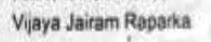

In [29]:
img

In [1]:
!pwd

/media/tssadmin/e60e6319-b20c-4b74-a6d4-c4f138ac4ebf/api-aadhaarPanDataScraping


In [5]:
reqts = []
for i in os.listdir("/media/tssadmin/e60e6319-b20c-4b74-a6d4-c4f138ac4ebf/aadhaarPanDataScraping/inputImagestest"):
    img = cv2.imread("/media/tssadmin/e60e6319-b20c-4b74-a6d4-c4f138ac4ebf/aadhaarPanDataScraping/inputImagestest/"+i)
    temp = i.split(".")
    text = img2base64(img, temp[1])
    req = {
        "requestId": temp[0],
        "imageType": temp[1].upper(),
        "imageData": text,
        "attachmentType": "Card"
    }
    reqts.append(req)

In [6]:
reqts[5]

{'requestId': '693_PANFront',
 'imageType': 'JPEG',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCADRAT4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD95PP9qPP9qjrP17XtK0Gwkvr6fyo6ALE2pWIi/wBfHLJ/zyqvDr195WILG2/6bRed/qq8n1/9sD9nrwrLbz634y8r7VDdXMP/ABLZZ

In [ ]:
{'requestId': '1205480000038195_23',
 'imageType': 'JPG',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAJnAuoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD99ICqn5zj601kiErDzVzsyBntTzBHcAlyDx0rG0vw1dxeJ7zXdTvzKjlFsolBAiQDBB9cnmgDaRSLYAjmhAQ4JGBmpJQWiZQcZU4PpWTcy6oxMEbEjoCBQBr71yRuGQOaabm3DiMzoGYfKpcZNcjNceKfD9hd3us5uMf6lLc5dwSBgDv1z+FQ3ngm51O+0zxdaT4v7RyJPMZtrRlSCMZwDz6GgDttyjqw/OhXVvusDVFJYpJdiNksMY9D3qyixWq4BBz1oAmyB1NGQSQD061U1K9ht7CS5nR/LRctsGWPpgDqc4qv4U8Q6Z4s0S28R6PcedbXsCzQSlcb0YZU/QigDSdA/Wo5LYNjFS0UAMhh8rPvT6KKAIpgSwwO1MwR1FWKimBLDA7UAMoowR1FFADH+8aSpO2aKAI/X2601rdZG81iAR0FUdT8RaHp97FZXtwVe4nW3GFOPMIyqn3Iq67CSRZFOQRkEUARxKwdiVI5PUe9T0rA5PB60+gCG3IHUgfWnqCTwKT7KnqaltyBuye1ACUUUNH5gKHIB4JoAByMjpRTkgWBNqOfpikwfQ0AJTkIU5JA4pMH0NARSf3inH0oAjZhnIPHrmkJCnDED2NN1SKdrMrpyDzCRncO1Pu7aKfaJSd4wSFPtQBXu7e8kubeWG88uKNyZojHu80Y4HtzzU20Jk+ZkMcgE8j2pfITbs+bj1NH2VPU0ANkZ9h8thg8EZ65FZnh0G3tpLQ25iEbsxCL9/J9a1DCF+Vc89T6U6OyRHB3deTzQBn23iHTb/WJtGgumFxaOBOjRsFORnAPQ8GtIYByD945xnNPlt0dMdSvIpHt9+x8c7smgBOoyBSKysNysCM9qkCvFuGMqTwKjSFYgVjXAzmgBaASP9afk7ClwfQ0Nbh9pOetAEE+mQyzpdq0mR0AbpT2Rsn5TjPU1bAwMCoZ/MOQsg46igCHB7RCipFVsDgnjrRkeooAjPIxTbW228+nap/sqDncKQkAEnoBzQAqffH1qZyNp5HSqEmq6dFM1vJeIrxgF1LcqD0pJNZ0q2ZPPv4k3MAu5utAFrB9DSHgZPFVY/Fnhq7lktbbWrd5Ixl0V+VFRQeKfDdykkkerwOkJ/ekN93nHP40AXnwUyeQOcA9arJq9jJqr6Skn7+OIPIpU4x2welRXPijw3pmoDTrrXII5zF5nkM+G2Ho1Vbnxz8PoSXuPEFqpUckv0oA2f69KDx14rnr74leDrMQ3U3iCIW7odjhSd30NTXXjvwzDZw6pHcu0cpJi8uJmY8HJwO2M/jigDbBB6HpTGdWGVYEDqQay9I8U6Lq8EGo2txIqSqTEkkZVsd9ynoaoWfjnwyomjt7e+RElIdzZvgn646UAdEY45eG6jpUNwhRArSn5vugVjaj490LSIYS1tqDi7JVGhspHAA65wOOtUbn4qeFbfyoG07WGJkESsuly/KT3PHT3oA6V3/ciMMWycfj6USReWgUcnv7Vz1r8UvDjW73P9m6uPmwwOmSDDdcgYqk/wAbfBy3BtZdJ1sy/wB5dFmwfxxQB14B2g47UhyvDRDn1Ncm3xg8PfvlTSNZYxw7iv8AZUg3ZPQcdajj+MPh68mdT4a10+XynmaXIOvocUAdf5icHIGT0BqdXVVAYgZHGa5mw8c6XcC1so/DmpqtyGbe1ow8shiOc9PWrs/jCJZVX/hHdQkAGA32fgYoA2lkjZtquCR1ANNDJCDMrgjPODWD/wAJPcoxu4vB+oN8pyEjAZvzNU9M8Z6hqFrLep8PdYhEc7RmGVVBYg43Yz0oA6iCWOWcOrg884PQ1DPqcUAaSUxqoPLM1chp3xC11mulT4N66nl3RUNiMeZxjcPm6U1/F+r3cYe4+EOtiN4SzxMIzyPxoA7pJ4ZE3xyqR6g0PLEFLNIoA6nPSsizuZvJEB8M3CjHBYgY/I1Jq02pXNv5ljoRklcYWN5AqnPrQBonUY4QqCQYbgHPWgajCW2CRc56ZrmoP+FgAxQN4KsPLSRVLC/5Vc8kcVJNL42Oo/Z18FQBA3yzrdDH1PegDoE1S0e4NqLhPMA5XdyKsPtdNhcDPfNYNumsPeGS58OpC/RJi4O4/gOn1qRm8VC2+zyWELS7iVkLcZHIBx74FAG2s0ODAs+5h2NNaZFAIYHpiuS8In4q3dpFceLtF020uN8m6K3mMmBu+U598VZjXx6usLap4ctPsaxg/aTdncWJ5G32oA6czrLHkEcGk3YJXzNpI4NZNhH4tc+Vc2dvDGkhKsr7iw9MVDNYeOGM32aayjDAmEyIzEH39qANSx1K3vg/kqybHKsHGMn1qfcuduRn0rJ8PWfiiGAf8JDLZyy9ntoWUfrU11a695vmWUsSjvuTmgDTjZQpycZ6VIrrgZYc9OayksdelXddXyrJxuWJeAPxrN1bRtdm1eFIPFF3AswZUWO2VlU7epJ6UAdRuB6EUblxnIxXL/8ACMeLAGEPja4U78mRrZTwOMAVZtLDUblSIvE8kpUbd3kLjP4dKAN6MgDBPelLqM5YDHXmuV/4R7xol87y+L2EW0bRHbDd+vapbex8b2WoRyy30F9aJG3mbk2ylj0x2oA6YEEZBzRVTSNStNRt2Nu43xttmjPBRuuCPxB/GreQehoAKKKKAK9owb5gePWrFU7mK6aIfZ5lUAjOBVygBGG5SvqKj+zDsSPcGpaKAM/ULK3kmhuWs97xNkMyniqmpXoYiMBk916CtmUKYyGOBjmsi+sfPJEZ79aAK9iqXD+bb3QLKe56VZmtMrkCQPkfMrZFLBYJEQ0C4P8AEPWraqwTBBoALaMoi/OxweVb0rM8DeGdK+H/AIWsfBegq4s9Ntlt7RXYswjQYGT/ACrQkZcY80L/AFp6MrrhVye5oAsQu753KR6VJTISNuM96fQAUUUUAFFFFAEU33/wplPm+/8AhTQjMMhc0AK5BiAB9eKYn3RT/Lf+6aPLf+6aAKF5HZNeJFLBEWLiRTInSQDCsPcCrKrtUBEYADgEcintArNmS3LN2b0oLqDhmGR1oAVeg+lFFFAB14rOXTdaHiI6i+rbrEwhVsfLAw/97NaORnbnmlXqPrQAqo4YEqetTUUjuka7nYAepoAWikV1cZVgQelLQAUEgDJNFNlBKYA70ANmkwF2HPzDOPSmSKpcSAgkjml8t/7ppsmYkLyDAAySaACimQ3EU6LJC4IddykdxTwM0AFFDEIMsaQMpGQetAC+YycKKkimBX5zg571HSEHeDigCwXUdWo8xP7wqKQgtwe1NoAsAgjINFMjdQgBanB1Y4DUALVTUbuCxhlup3McccZklYDJIFW6y9ZuWezK22HzciNgwzu5+YfzoAXT7htcsIdQNtLFHIoeMF8EqeQcfSrwtlx/9epI40iQRxqFVQAoHQCk8xNu7dwOpoAhpHAKEMMgjnApstzbwAtNKqqACSx4A57/AIGqr+I9BiulspNWgWV03ojSDLL6j1FAE72cTgF4UYtgSNs+ZgOn5U+TToJVCS2aOB93eBxUM+s6XaZae+iUr2Zue2P5j86WTXtPiQyS3sSqASzGTAABAP6kfnQBINJ01XM0WmRBmGGIjAJH1p8Wn2EAb7PYxKGPzYjA/wD11lw/ELwhM0axeJbJjK7LGBcr8xXqBz2pX8Z+HIomaXWrUL5wRiZhgHeq44PqwH40AXjYWjz+bLZxmTbgSeXubb2BOKSWw0x1PmadAwHBzCCf5VxHib9o/wCF3hlbTf4otZWurxYYY47hQVDcKTk8g8fmK0x8aPhvKvmN4tsCgU5kFwOBnBzQB0o0+weMKtnCVH3VEY49gMU8RW8Umz7OMoNqMqDAB7fpXB3/AMfvgo+tQafH8TNNiuy+y3gN0uZSV3jAz3AOPpWk3xu+GElxbwnxrYLJcWi3EatMBuQ9GoA6qWCNZEkXauD867BkinrGAhUxJzk7R0I965m3+Lvw9mZQfF9gS+7g3K9FOCevY1X1n44fC/So5UuPFluXigMpQSfeABIAPvg0AdgFVYyBhfl/h6CobOOVYBG8vmMOrCuG0T9o74T64tkuneJoWe7LBQzf6tgcEHPbIPPtWnZfGn4ZajAt/pXjHT7pSZFBhuVwxT74HPUd6AOs8t/7ppCrA4IrnG+KfgdLH+1R4qshAy72cXKkAcD196ZB8Y/hu9x5EvjKxDliqD7QPmIPb1oA6WgAk4HNY8HxB8E3UbTw+J7JkVwHP2hflJ6A+lZHiv46fCzwZo02va540sYLaKMvJNJKNigAknI9hQB2ACgeYpBPpSbi3zEYJrzT/hrX4CWWn2t7f/EKxRLtiIHiyyP823g455IH14rQv/2mvgppSxfbvH9jEZ5ESJHJ3MWOFGMUAd599128460FW3Yxya4GT9pT4MxyShfHlkDErNKd+AAuM/zH50miftQ/BPxBdfYrLx/YtMskiBVfksiqzD64dTj0NAHfbSDtxz6UF1Em8sMY65ripf2kPg5C8azeN7JElVCsry4+9061kX37VHwXW1kutN8YWtzOJHto44SPMnlH8CdieaAPS2dFxlh83QetCsrKWU8A8mvPf+GhPhU8aXp8RWyTRMyXayyhHhKruOR6YqJf2k/h5caYmoWl99rieIuz2WJAA3zKT9RQB6QCcFkGcc4pY2dyHkh245zuryh/2svhdY3IsL1dQSaWJnhie2IMoAyQDn/OatS/tUfDYWbXMNzeTP8AZEuUjjtSWljfaUZRnkfMKAPUGuIHQhZVOQeh98fzqGOWOUExuGwSCc9x1ryqH9qv4bmFbq0tL6VOY7h47X5YXyeG54+YYqxo37T3wt1DRpdZhvpEt4XUTt9nPyuxIP6igD1GMhWDNwB1NS+Yn94cDJrgYv2iPhXLdQ2KeKoDJLnYrOFx14/Q1Qi/aV+H9zblpNdt1dTISguAcoAMH8dy/nQB6bvTcU3cjqKHkRF3O4A9Sa86uf2jvhfZSImo+LLVfPi82Jd4JCqFVs/8CJH4VU8X/tX/AAb8DaeNQ8TeI4LeMrEY95A3+Zjb+h/SgD1DcucbhmkEsRUsHGAcGvNrX9qD4MXl8mkp4yt2Z0jeKUkYcOWCkevKMPwqO8/ab+FUHi9PCA8UQNdSq6rC0qqFZRnqfWgD07cp6MPzoLKOrDpXkWqftDfD83X74xz3Fm6xps1BVBkdgNoAI3HO386oxftkfDx9ROk3720UgzgnUY+SCRjg+xoA9oZtzYU9V4z0NR6fY2VhG8djAsaPIXYL3JAya8wsP2mvBGqP5cd/bw7wPLC6ghJfdgjqfrXd6NrekahZf2hZasjxyuuGEgYAlRwCPof1oA2JUZnyBREhTLHPPaktmBhDeZkHkGpC6jq3fFAGGNPe08azXNvMqJe2ClogOTJG/Ln/AICyL+ArbiG2MDHvis2+uIU8UWsZGJP7OuGV8cBRJBkfnitNSCOP1oAWiiigCFf9UPpU1QAjbs7ikvdW0zTbc3l/fRQxBSxkkcAYFAFikLqM5PQcmuMt/wBob4LXV/8A2XB8QbFp8Z8vLdyB6Y6kU4/Gv4U2Egsrjx9ZiSWZlQOxGSACRyPRh+dAHWXF1bxgJK+N/Q4pRBEV37uK53+0PBvi6ax1e319JhbSGW3a3nwrDBHzDuOa111rSljKtqdvtHQ+cuD+tAFtYoQwIanMsQHJFVVu7KeMPFeRup/ijcH+VNeaxPy/blB9CwoAdfCzs4WuryQLGBy3vSxFAVKMCjLlWHOaz9TtrDWbKbSr64WWCeJ45I1kxuDKVIyORwc5HpTfC3hyDwvpUOiWDOba2hWKBZZGZgq9DliSfxPagDah4yx6U5ZY2JAbpUUdxC6GJJAW9BVKLVbae/extXZnjPzkKdo/GgDUoqKCdZMrvBK9eacLiI/xfnQA+ioxd25DESj5etV21/SV1AaS14ouWjLrAT8xUEAkD05FAFiVGZ8gU6IFUwRTYbmKdd0ZOMZGRjI9ad5i7d54HuKAHUU0SIV3KcjtgUCVD/F+FACl1BwWqJo4S2S3U0SbdxbcMdaT7+yQfdIBBoAXy27LTalWVCAA3Uce9Rgb2IX1oAMN5ph+znZj7+aURvkfLU1NE0Zx83XpmgBxGRioLy2jvIGtZkbYwwcGp6KAI4IBDGsI+6n3eakoooAKKKKAAkAZJqK4ZHiKYDbhginyqXXA9ajaNkGTQBFDEkUaxomAg2r9KfhSMsDx6UUDGeTQBHIUkQrECT3zQqlUAI5qV/LXlB9eKieVCM+nXigBQ6ouWPenggjINRSKXjAHc0qyqisGyNi5bjtQBJShGIyFpqOsiCRDkMMg1LHIqLtagBvlv/dNOBWNePvdxTvOT3phjZzvXoaAJEJZQTUcqwKvzIOW4GO/rThIqDYeoqDUpkggW4kJCq4J49TQBZUEKATk461hfEDxrpXgLw3P4k1Z0EEClpC7ADjqPr7VtC6hLFQ2cdSOmfSvmj/gqv41k8E/slX9/aSxxS3ms2lvHJI+3y95Ys/5KeO9AEN/8SP2yfiT4q8Y+DfCHwfTQ9E0u1kufC/inUpkng19CFMUSop3ISJc5P8AzzPrXkEmi/8ABTjW/hdqPxS1L4eJDr0V21hbeE2t4jcXEBcYmDhtqIoJ6HJxX2D+zcjn4AeB1W4eUr4S05ZZXk3M5NrCd2e+RzXeeah4GefagD4N8deCv+CnsGgeFdV0Wys7661VjLrNvEiCXSyWhURybjhgqliNv/PP3rO1H4Tf8FQLn9pDT/hhrNhpE/w+k05m1HxnDd7E3CPcEaL724vEg4/v1+gBicDOB+dRXCs8DooySpAFAH5t+H/2Uf8Ago/458V+Mh41g0PQNP0gTTeFp7e7DrqUvmF2AA/1IcgHJ6ZxXJaF+zX+29b/AA51XWU8UaWnjfUtV2ReFj4lBHkKpJlWbO0HG18AZyOa4/8A4Kjf8F2Pin8Cv2gvFHwA+BFpZWdp4RT+yNUGqWgmmv757YSBkUSLIkQVsCUAjeDX5g/A39t/45/Cv436D8Z4PGmrapqei+I31V7PUPEU0kOryOF32ksYLBY9u9QwG4HHHegD9jviF/wTo/bf8RaF4R1U6vpeuarfTi71+3lvVtx4fYQ2KpDG2D55Vo5jkYBCr61ctf8AgmL+2la/tVNp1z8TbWb4Z3rNcXniBZil8JNhCwiEfKEB2jPU1H/wRZ/4LG+KP21fiTN+z18V9Lgu9bl0O91uw1qxiCm3EU0MUttcRKWESmRpmhctl41XIDcV+lDTIUJGTj0FAH5j+Ef+CcH/AAUG1y48U+IPH1/4W0/UdAsVT4fPZOHGp+V53lRXJx+7/g+YZPzmptS/YI/4Kb33wI03xfea74SufiJaX0tl/wAI2JylhBY+bFslWXGXYLD0I6SsK/TYTK0QARuv92kDZ7H8RQB+feo/8E6/2yNI8U+BdR0HxvoGpWjacf8AhO21CVo3tJpGzKtqq8SABmAJ/uKavWv/AATs/alv/jOfDuq/GGzh8AQCY6dq8cjNqWAoMcbxt8hXJfnrwK+l/wBu/wDaKf8AZY/Zf8TfGS0tFmvbCzMemJJwn2l8iMuf4Vz1Nfix4w/4K2/8FANW16W7i/acn09dqzXWm2lpAIBEzWx/dnyyxISSRdvUUAfdnhn/AIJ1/tnah4S8Rax4l+KHh+28VfY1HhKKxu5TBMV8whpycFQpKjao/i56U2T/AIJj/to6D8HtM1Hwv8UfDz+NpdSuptcspWdNOSGbduMJHzBiMNz3Jr8/vBX/AAUT/bgGjWXiCP8Aad1mKFbSSB7iQQSyx3Cm5WVwGT7rvFkYxwK9Stf+Ctn7dfw71XTNTm+L1trVvAiR3FnqtlGsd4WWJg7FRnhX7cDNAH2b4j/4JzftWJr3hTwj4c+J+iP4UgiWTxJeyb1uxIMlljQfK689+uKZpf8AwTk/a3b4kapZeIPi5oS+EbOO4l8OXcML/bTN5ccKl1B2qMB2474NfNGnf8F4v2y7+20rUoNI8FvHe7g6RWbFMpbXUrICX9YFx65pus/8F+/2o/At/qj+K/DXgO8s7RWRbO3ufKKOy23llnLbRw8hK9aAPoXw9/wTg/bh1P4S+I7zx18cNFt/GU5txoNvpsrnT5mjVVLTk4bsTxVTxh/wTT/bS1P4M6BZwfE/w5eeLBcsdfsp5Zksmi8sxYTBO4/Mp571816v/wAHDn7RWmXFxpEb/DWa7gnWE20l4QsihthlDFsKrIVYetUNd/4OM/2lfC8Mt9d23w+BnsJb7TrebeGuiqgpCh3c7pCAPpQB9eeIP+CYn7RknxN8OWfhz4yWv/CCraQf24khZbiC4Dys4t0X5dm9YXXPfNWtI/4Jb/tDal8WL288XfG2M+GbGxb/AIRu4t3Y35uF5QzA/Lt3E5Ar5a1D/g5N+KHgHw19k+JXwd8LTXdvNdTpImr3NqViQoI0CKjbmzIgxn3rrNE/4OO/iEvh6LxL4h/Z58MwwLbrJNcx+I5mVsjnG2IgkdwOlAHsD/8ABLH9sDWPhH4ol8Z/tB6a/jRZYD4TGmwMliVjclhcKeWLKzDjuq1Xuf8Agkf+1RF8JtKtfDP7U1hZeOLjW5b/AMUXsunO9kW5WMWyqQy4jEatnrlq8403/g5ctvEiT6Zov7O9tNczTLDpFy+vKltqM+QJFgYrucDP90Hg1jeL/wDg540zw9ZSTaf8FtMv71TGbayi1uQxYYskalljyshmhZSGwAOelAH0Tq3/AASf+NeoeL/C95J+0rC+jWWlW0XiGG4sGa4urgBvNMRB2qpLDAPQLTNF/wCCPnjq2+K974k1r9o6WXwrbzTTaPpNtaMt1BMQAHLsdh/i6DvxXiF9/wAHGHxMvPEGreHPBP7LmgXN5pNh9pvIbrxY4MMZCbS+yMgA7zyOwHrXI6L/AMHQHxB1DxlZeEL/APZy8MW81zBKZZJPEd0kcU6K7CMZg+diqMwx1AoA+htE/wCCP37QN58PNe0Xxz+15Hfa1cRRxeHr+00t44oCibdswLZcN3xW1J/wSe+Mek/DrTYPCn7RlrF40gnY6jqlzYymxnhClUVIg2QRkdcjivALX/g5X8Ta3JB/wh37O+h3kX9mySajJceIpQsF2iCR4oysX3Anzbj2NdX4O/4OJbbxFYwR3n7ODLqAuHivWh1+P7MuGI3KzgMy/dG7pk0Ae0eK/wDglz8U9V8W+G38P/tJPB4ft4fN8T2c9mzT3dwSd5gbOI0OQAp9Kn8Mf8Ep/iBofxa1rWdc/aQuZfB5tIo/D2lW9oRd2jxLGIfMkJIdMecCo67h6V4j4m/4OF9Vk0iz1bwD+y3cyOsU7ahLrNzMkEcSMrfu5Y42Vjs3EZPJGK9F8Kf8Fhf2h9e0+DxF4g/Y1Xw3oU1vvi1rxX4g/su3u38xY/Lge5VRK2WBwOgOelAHT+GP+CVvjXRvhpqPhvUf2lLiXW50C6bqEFiViQgHDupOWPzZ470mn/8ABKTxjY/D/TvC+iftR6kmrTux8S6hLakx3i5UgImcIQyIfzHevULv9o/4T/E7xT4b1Twr+0BfQ3mm6M2sar4Q8KrHfC9hABaN2RW3bSdoCEE4zXffsyXOu618OfN1TUPF1zKL+ZoL3xtpf2O9lRnZ1PlBVwgyAuRkheaAPFtR/wCCX9ldeN9E1NfjVrZ0Cx3NqOkMAstxKzSgkSjmMYlQY5x5dZnh3/gkZ4esviF4h8Wav8cvEmoabf2Ji8P6Oswij0txCsSyAr/rSFUcNwTzXtmj/BT9qOx8XLrWqftNW17pjap9om0o+FY4yYN4Pk7xISeMjdivX7W0MDDC4AJILHJGewoA+NPDv/BIy30f4d3uga5+0Z4ov/EE8sX2PxHOiH7LBGQwhEH3GB+YEnk7q0viD/wSg0Tx14V8LaZD8adbt9R0i2Eev6pPbpO2sgrGDlH+WH5kLjbnBc19hEA9RSBAG3A/hQB8pD/glp4Eg+OelfEvT/iJrcXh3TLBID4PkcPBO4MpLNIfm6ynGMYwKwfC3/BIP4ceGW+Ija78XvFWqjxtazrpj3FwN/h55EkXfbMDnK7wRnuor7Mpk0Xmrt46EEHvQB+Sv7XPhn9n79kLwT/ww74Bv/il8SfjXrN1DqWn3Gh2zm9WIyJIitPjyoowU2luu0V5544/4Jgft7/Dr9nS+/aj8WfFF9J1/Rksru3+HVmWvE+xqyi6WebqXZCzMEBxg1+zM/hewGujxHFplsbtYtguDAnmAem7Gcde/erd9pqXy+Xc2ySxupUxuowoPX6+lAH5v/sFfDn9nP8Aan+M2s6ubvXdL13w5awXGr+EdN1YzaPfJLGYkuYpPvfMEbMZwVPUV9A+Hf2J9P8A2cb3Vvi5o3x78WXOmwQy3kug6heA2ECEF3O084VN2BnvX0J4U+FXgnwNqeoax4O8F6Tplzqbhr6exskie5YdC5UDOOawP2m9Gk1L9nnxtpsKnzJ/Ct7GEK7g37hgOACT24HrQA/9m74lSfFn4X6b41Mm5bq3iIcgDf8AukO7AJxndn8a7i6he5VA5dSsoPynqK+c/wDglhHBdfsn6VfKSWkuy7J5TRiImCAmMKwBABOK+lQpPDgHHSgDC1O3x470++CtuXSLyJc8jc0kDAfkjflW7EFEY2nIPIP15rIF5Jd+IWj+yMv2S5MTO6EBw0KvlfUfNgn1Fa8aqkYVQAAOMGgB1FFFAFO+mkW1ZreImQHv61SfwtaaoFutdsYpJgOY3O9FPtml1i6ntLJ5baLMrSICC3GGbFWTqceC27KjqwHHvQBUtNOuYYTDdxwrBDtMKRrkKFYngHocBapWdtLqfim+t9XlhureOFFjt5bQYVmJ3HJ6/Lt/Ktl7qFrczISyHgFR29RSvNHbztcSELwASf4j2oAij0HTERkGlWqoF2eWsKgbfoBUf/CL+HpVEP8Awj9gFzwptEIH4EVPDqCP8zSffGdvfHelbUYoWJYEADIOM549KAGpoOn22YbXS7WKH+5FCFz+AFU7rRPCc0yW1zp0KzSAlMEqzY64wQcVeGqCZchG27lAyvXjP4cVXuLDS7nUIdWkhVriEERTOeVVsZA+tAEUXgzQLOUSwWRDHuJnHH/fVQ3Hgjw5Lei8ewcyFSNwvZhx1/vYrXa6idynI2MVOe5FR3gaWyeLzWh82LHmA8oT/WgCpFYaPagx23mKUIyPNZiO/cmsi+fRbq/Nha69qELTTBStk4wjHOCxweuP0rcEVrLbNYy3TZEaq0o4LYHXNQDT7NVtpbM/Z1inDOi4zJjPU9+tAFMWVxbgCPWbyVgPvSSBsDkccD0qro2g6/bXs9xeeOLySN3Bija3RQg9OOtdSWtkKxyHomQce/8A9emxtBcoUiABKng/pQBTbR9Tk3Na684yAMvEGzz9RWNq/gDxPfa+uvWPii1gnW3aITvpCPJjggBi2QM54966HQLe+stNS31ORWlDHLL6Z4q7u9s/SgDJ0XTPEun6TFbajq8N3ciMCWYwbFZsdgCcU+zt/E6zsbp7MxfwhSwP+Fae4d+PrS5HqKAIQtzFAAgDP7nisqeTxk+peWmmWptcZ8w3BDZ+lbeR6ijI9RQBiPe+KYFeT+wopJNuFCXIGfzrDbxR8VTM0b/DDKBiFcaxCNwz15Ndi4LOSB3pollI2tGMdqAOb07xF4slIhvvBEtuwhZ5GW4RwpHRVI+8TWRdfG+801JpT8IfF03ky+XiDSGbfnuuOorujFIAGiZdxIzn0pWXlWC/eOAAcYHr9aAOZ0n4rnVfCw8UN4C8QWymLzPslzpzLMB/udas6f49h1e2ivbXSr6JZBkLNZlTj6VvMiqd8a87du3Pamo0hm2Oq4A4A7UAUrLxZb3tz9mTTLxPmwXeAhR+NO1HxjoWlTCC9uHViccRE/yrQO/aUG3pwc0x4ZDhlcLjkgd6AMdfiX4Seb7Ot5Lnp/x7tj+Vases6fLALkXAEZIAZhjrwOtOJBUqckN97NMuIRcR+U4UqCMKwyOtAFb/AITPwqJhbnXrYSGQoEMozuHUYq1/bek43fb4seu/iqo8LaK90Lo6PaAht24W653Hq2cZyelTS6Hpj5WaxiMeQQNg60APOu6OsnlPqMIbGdpcZxSnUbOdR5dwpyfWqv8AwjmhNKZzpMDyBcBynOPSp00m2WPy1gSIdcIKAJPMiyB5yZPT5qQSxnkSAj1BqOHQNLin+0JaLv5+bceaH0q0iXYsGAcng9zQA8zRsm5WyD3qFiAu3P3m+U0w6LaS232VmdMknKviqc/hIXTRouo3MYhfPyy/eoA0hIPKL91HKjrTkHmx7xnDjBU9xWRBoclpID/aE7Msu8lpOv8As/Sp7HTpIZ5pmvpf3spdVJyE4Ax9OKANRIgg8tI9oXpSqu77pH1zVS1tb5SWmv2OTwuKZd2+pMoS1v1TB5ylAF7B9vzqSOVMbAckelUbWG+THnzK/HJAxmi6nuQxS3jAweo6mgC3KCDvI4NZ3iaKWbR5FhmKkhSM9sOKmsm1PIa4ZdvYd6bq92kVtIpVdwQkK3cZBJ+gzQBjeILnWtLu7h9J0meSa4X91LGdwZ+wcdl96+b/APgrnc6vH+xciT36wXj+I7PLWx2ncIZ2Kjg/3TivrKIvs3F1JYElgOvpXzH/AMFbDaRfsSeJptQgTEbxeRKPvRSnKiRMdSFZhQB6/wDsorLD+zH8PIJJ2ldfA+khnYg7m+ww88V6F5TjnA49685/ZEaU/so/DJ7gKJW+HmjlyO7fYYK9I81DwM8+1AA0qFSB6VDJu2HYMnHFPMTgZwPzpkhAQk9MHpQB+JH/AAdSfsq6+fFfw9/ab+Hvw9M4uUn0XxFqtnCRcNM5Bt97LjcAA6gn6V+PttYeL5pLXw7onh2+uL+MJKGitH8xGkdY0bqeC7oAe+4etf0S/wDBwp+1n8Hfgr+zDo/wk8Yl7vXvE+ppeaTZ27gGFLdGZrh8nKqGcAHuWxX4c+FP2ih4U0zw58Q7CLUBf6RqthFNCLf5rmGzFhNFuP8Ada4tQApJ4Y0AfsX/AMGq37P/APwg/wCxv4i+O3iPwXFZ6p4z8VSDR9RltgJ5dHgijhjQsRnb9oS4Pvwa/Uu33Kx7EnuK+Cv+De79sL4P/Hv9jOy+BvgWS4i1f4XM2m6xa3eFNxFNNNPFdRjqUYuy+zIfavvwrGU3oOaAFMxC9AxprSsyksgAAzxSU6NQ5KnoRzQBxnx2+EXg/wDaB+EWufCTxrFI+na5YvbymP78ZI4dc/xKcMPpX5F/HX/g3l/aasdUvrj4PeO9C1+yaQNaRXtz9kmkxyPMZuC4ZUyRwR9K/X/42fEXQfg38Ldb+JviOQR2Gh6bLeXDHvsUkL+JwPxr8l/Hv/Bcv9pvxVdC/wDB1toXh3SgJ2kiFu01zbARsVWTPBIGGJHbNADPgn/wQB/aVnuJrP4sePtI0K3s5GtdHNmy3BuYWmuGBYJ90qrjJbrv9jXP/tUf8Ee/2k/gZZQ+J/BVxF40sVidb+LToCJlUxpGDsblvu5yOlVYf+C2P7arabeXN74r0iKaze4ikuZbAFQUgQrJx0BO78xXNax/wXL/AGnfFuq2tjp3jV3s724SKxuZdB2W1xKFU4Vz2JBx65oA+Z5/CniLw3rNro194e1jT5bCOON7YaW6eTKLe7iKuCPukk5P+1XD/ED4UeMfF3hW30vwj4W1jV5ZdThvPsKaYf38RsYJJSm9TtK75AWzn5cY4r7mi/4Kk+PJNdn8U+PPBnhTWI7xdmsRTWqJIqYkO5M5IYbe/HNbOn/8FaPDnhaW3tdF/Zy0aO2tLCQl5dSCvGgiUySEBQRnf5eRjIU46UAfA/hv9mT40eOdYsrl/gDqdja6fbNFNFDpvmzeTkJEFymSyYAyfSrXjP8AZm/aW8Iwu/h/9mfUtZh1TSIbS1m1HT2822xHIihlC/KC+HOOc4r9J9P/AOC4Vp4aszdN8AtJ066k1Ford5NUBWWLcqrhu+clvbNTD/gvlZQ2Oqy6r+z7pp1Gxmi5/trMbRvIEzn/AHc498UAfmVrf7NH7SeieNfENjpnwQ8S6xZ30S2C31xbyFI1QW8TNiRcAN5YYMOx55BrY0/9nb49/DP4YadpelfDfWhPZ28tx9kk0WR4jI6OrOAR23j2OM1+g6/8F3NaME9zpnwN0K6IuozbWTa4W3o0TtsI7EMgB/2qi17/AILaavq+q6kT8GdBlgsot0NvbazvZRs3ndzjg4HTpQB+c/hzwZ8ZNf0LStVh8IWmrzQ69D9gvIPLa7V4riOQxJbKhYMShGVxw5z0r0LRP+Cc/wC3J/wlCfD6w+CcerReKvtdz9o1MRLBceQSsbmQL+4w1yrhWOWwx7V9V+Af+Cufwo+G2rRfE62/Zy8F200WrLbyXNrLF58iPIIzh9mVZixbOei175H/AMF5/h7o9vdabrHwTNvZ2sxt4JpdQSOOVAsY3AnAzyxwf+eZoA+MfD//AARA/wCCi/jyRp/Efhjw1oRg8Ntp9xqVnrcc00pEMSKDGQSfmjyQcgdhWz4U/wCCFX7ZWp+MPCdz8Y/D+iaFofheyeVrmw8UpPJfMjsyIAE/dbty8nbtCsoPzV9W2P8AwcheCNU8Q2HhjRv2btVuLm+XzRJ9ujCpCfuvxyQa4746f8F4fg9+0H8GPHPwI134T+JdCGrWP9kXOrWN+kRt/tEe5ZI3JG1kGSPdTQB813//AATJ8a678VdK/ZV05Le98T7Z9Q8A3er3HmaZ4h0mwY2/2SfZgwuseBIDuDIytmvuf/gnH/wRR0P4d+FPEPiP9sXwL4bbVfEYNvD4V8NTE6dpVttCtt6gyucuXUjntXxB+y3+318Dv2Vfi5pPxIgtPF3imy8MwXemeD5PFHiKFjbxTW6tN5TAZZm2Ih3H5CW9a+ttE/4OUPCniPQB4k/4Z1ubLTVgimme61uJX2yMQpC9+QaAP0Z8J/BX4WeC/AOnfCfQPAmmJ4a0yBYdP0meyWSKJF6HDZzwBzR4y+Bvwp+JF3purfETwFpOsy6NIZNLl1O1WZbd2xuZI2+UfdA6dq+AtO/4OHfB2qafZ6uPgXO1rean9hW4GrKQPnZc8DttNQW3/Bwxp0iGKf8AZ8lZprsQ2hTUwyFWQupPHUgHj1oA/Rrwj4F8J+BbeS18H+GNO0mOeQNNDp9hHAHb1bYACfetmBEt5mG8H5xgFeVH16mvzS0T/g4Z+H5m1v8A4SL4M6hbqpC+Hmt79ZluT5QfMp/5ZjnHfmsHRv8Ag4g1+e6e61D4AQSWEOQZIdVxKdrAngjn5ckeuKAP1QS9heNZTlQyg8jpn1/KnJdQSLuR8gnjFfnfrn/BfT4ST6npmk+CvhJrV4dRWaVxqEiwNCqyxRdOcgtJxWjH/wAFt9H/ALG+06J8AdWuL63MhvLeO4BiVFd1LBwOTlDkUAfoD5qk8dMdcU17iOMAtkZbAFfEXgj/AIK3678R7U3PhT9mbxDesjqJTbRO6ICm8tkLnjIH1r0/4P8A7cmr+NPiRF4C+J/wug8MNNayOJZdcgmeB1gimAkjB3LlZCPXK+hFAH0YL62KeYr8Zx0705LmORiq5yPb3xXkMXxm+HmseK9Y8S6J8Zri6sPDx+zajo1pZiSIXD5CgNjLsGU8DvXQ/s/apqOq+Epft+oa1ds8rTpPrlmIJlWXLLHtHQKOOeaAO/MqA4J74GKEkV+Vz+VcH8TvAvxi8Sa1a3fw8+J0Gh2kUbCe3exEpkYowByT2JBrQ+EfhT4m+FNNurb4meP4tfmkdDayx2Yh8pQuGHHXJ5oA66uK/aD+1t8GfFYsFYT/APCOXYiZTg8xPnBHIOBXakgDJrlfjLl/hprqFMxtot0HIGSMxn+YBH40AeJf8En7OW0/ZB0hGMzJ9q3RPcSMzspt4Dklue5r6Xr5+/4Jn6hpup/suWF7pCxpbvet5UKAjyl8iHCkHvjB/GvfZ5GVSIlDPjhTQBFcxQzXEbsmW2sqOD90Ec1LbRiG3SEZwqgZNQrIzeXNPtVgSCoOe9WIzlAaAHUUUUAcV4smu7vwXZm7t2tri6urOMo8g3xu8oG047gnHHfNXvD/AIUu9Egmt73xDd6islw0wa9Zd0an/lku0D5B2zmq3jWwa7s9NtDZs4TX7SYOHwRsnR8n15ycV00cXmg84wKAKyuYYx5qKsaDCBeAB7185/tV/tkeCfg9o0UPiP4i2OgSaxe3Ftosuo3kKw3E0KncglJwjZDDDY+6a+ifEyyf2FdW9sQsrWsgjkY8KxUgE+wr50+B3wM+C/j3xX4x8K+NPAfh7xRbQXUGoiHxBpUN6sV1O05d1WZGCZTy/u9y1AHzzqf7W37Yfh3wqfED6jpUVtrRih8Favca1bLbaruYLIYZGID5PTHcV5547+O3/BSiDx4PhpbJqcOs3+myG00BryIXsrfOVeFAdzqyozDjG1Sa/S3Wv2dPgb4n0PTfDHij4QeFtQ07RZFfRbG78PWzxWBUhh5KFMQ4Iz8mKo6l+yv8A9X+MGnftAan8KdEn8baPGsWl+J5LIfa7eMQvDsVuw2SyLgdnNAH5l+Gv2tP+Ck9pq+qeHvDvw/8TahqdvfztqdhIYpbmyT92qidFY+TtJA+bHLY7Guls/8AgoP/AMFAIr+4h8N/Ck3KRXARrmW2ilhg3BWKtIJ9u7ceB6V+g3hT9kD9nTwD488VfE3wP8I9F0zXvGsUsfinVbW3KzamJX3y+ac85bnjGMmuem/4J8/sgad8FdV/Z80b4L2Nl4R16/S61TSLS7njW4mXGHLh94IA7GgD4V0b/gpb/wAFJ7rWdmvfBLVJNNluiyT2nh5Y0mhGws8cvmEEDcBnpz1rqtN/4KaftqaIlraeOv2dfFUU6yzbrYaE+6YPL+5BbG1cIATn+/7Gvoa9/Zk/4J5fHfwr4Y/ZxvdNgv7P4atJb+GtEh1+5hkslQqjRErIGkXdCByTkCuS/bu8SfAT4Q/tDeDfixrPhPxRqvjSwt4Ly2j0/wAQXcVqlnbzvIxlto3EUpHnSH5lOQFycCgDy+P/AILD/HHS7hLbWv2ddX3TTbhHcWMquiENjcu3jBH4giqcf/Baz4seHb8W/if4BXUO6cI8f9mXKbSSuRuKYYqGycenuK+lfgV+y/8As13V14y/aW8C/ELxlNF8U9Gmg1dtS8XTyWdmr7kZrWBzstnB3KCvTFUPhh/wT4/Zys/2dtf/AGdPAnxf8b6ro2o64l1qWtXXi8X2p21yrQyGJLqSNii5iTK46MR3oA8Zs/8Agt0Z72HSdU+CbWspIaV7i5lUJn5k3ApwGUZFHw1/4La/s/eE9Mv9R1nwprwuLicy3SfbRMPMLkBYw5yi4OfSvdPi1/wTO+G3xT+H/g3wBpXxR8U6FF4PhWA6jZG1a81eJVVVW7laHMuAoHAHU1T8df8ABLn4U+Kf2ktM+Plt4vv7HSrCyjgufAVrYwJpd8UVlDyBQDu5ycdSBQBwGvf8F0P2drK3Q2/gfXpY5SvmzCeEeXkgEfe7Ak/hU5/4Lu/sb6VbL9ufV4Y4vs63L5RxCZcjBIPJUgA49RWd8RP2BfgF+zo/xJ+PHxt+PCjwfrNrNJpGi6vo9vHbeHrp5DLG0DjLSEBAoU9ga+B734x/sB+HPgFqnw01T9q+bxR4rn1Xfp/xKbwIguLCyikixbrEpVHDeRL8xGcyegoA/Uz4T/8ABWf9k74t+JLfwroniqa3uLm1e4WW8ULEsa4yS/QdR+del+Fv2zv2b/Gl7baf4Z+Lmj3kl1zCIbxTn51QfTLMo/GvyP8AAfx4/Yt1nQvC/hv4Y/tHeEvC2uafFKnijxJ4l8FGQ6xB5IbHliQeX3zjjivrD4c+BfhZ8Qv2q/B/iX9lz49/BR/h1p1nDc+IPB0WgZ1a9m8pt7xTq2I0MnlOFIONhoA+35fj98KrbwnF43uvHWnLpbzQwyXiXiPHHLKyqiFlJH3m256ZBrzbV/8Agpp+xroviSTwtefGnTxcxSOk2H+VCuc5P4V5n4T/AGRvHV7rXxB8A/ETxL8Nbn4Y6zKsvgjQfDOktaXthJDcrJaLdyAFJQCDuKjJOevWvm/Vf+CUfjK4+HPiXX/EWl+BtT+KFpfQv4d/snWJINLlhZdkonTy8hznPAxxQB9e+K/+Cpf7Jumz6NYaJ8VNLv11jXEsrmSHUF3WQePeJHU87SSqgDJJb0rsNL/bt/Y21qzl1DT/ANovw3JDDM8Usg1MYR0UM4P0B5Nfmz48/wCCRXjuw+Cfhuy8A/DzwrfeNpd48Wx3fi2eK2iXyVVDbOqbt/mFyPTaAK7H4pf8Ev8A4e6L+0D4f8P+A/g7FN8P7i4SbXvEk/jaS1vrFpWYTRpGEIkUR7ADkZoA+8tL/wCCgX7Gk95HZ237S3hOaSYEpGmqqSQPT1rodK/a7/Zv16JLjSfjj4UljuZNlq/9qoAzemSetfm/4G/4JL+Hrr4+eKdE1X4E39n4QsbWUaF4jsfiM091eHjA8op+6LZ69jXL6L/wSY1MfBDxb468Z/BfxIvirSNeiGg+CNN8ZxXLavbFowXeZzhdquSRx9w0AfrLpvxq+GF35Nv/AMLI8Pm5uE3wrBqcZDx8HcMnptZW+hq3p3xP8B6pcKum+NNLuHbP7uG/jYjHfg1+PHjv/glt4r8A/AHwJ8TfDHwP+MOs+KdYu5rHXPB2k6zbS3WgQI0saSSu8gQq0cdv90n71ema7/wTr1DwP8WPCXwr8N6V8U7vS/EVlG+peNbcQm30aWRctBPtkUkrnkgEUAfqja+JNJvJVt4NWtzI6llTz1yQO455HvT/AO2rfb5olDxnOx42DB8dcYr8u/Bn7F3jDVPjz4o+Ael/En4teHo9G0+Qw+KryzkTTryJXjj2xShySz+ZwB6V518Lvg/+0H4j+Afiv4w6D8ZPi9ott4QKK2h63pN79rv4ZFy32eIHdJjByR6ZoA/Ys6vbLcCB1ZQw4cjjt/jU4uICVxKPm+6Qeuc4/ka/IbU9C/aK+FP7O/h79o7xB+1H8QZdK16Zbey0dfDl/JeQvHvy00OC8akgckeldd4kk/aX+EPxN8IfB3U/2wfE8mpfEWSzvdCMGgXU1tawzSbUSaUxkRMGV8g9itAH6kw3ZMhkIIjHrxkbQeB+OPwp41COdBiGRSWIwyc8d6/O7w74h/a+m+Kuq/s6WH7XltN4q0D7QdWj1PR5SjQR7LnzIpPL2EeVKq9eqn0rB+E37UfxX8S/Drxx8WvDX7aejX/h7wExXxVft5hTTS2AN6tGCckEfLnFAH6Wm527ikTEggAlePSq+najf3MlxDf2oiaK4KRurAh02qwYY7fNj8K+B/DX7VXxbtPgVov7S0/7aPgh/BWt3TQabql7auqXNwhJMWSox9yTn/Zrrdb/AGmv2lfhn4g8IeAPEnxM8BnU/F2lQTaBG+rrE2qEhER4kfBKvuXFAH2vFMEJaRxge9K06TFTFyPXP9K+SfCf7TX7TOt/F+P4PSa34Em1zTyzeINBtNaie+gUIGPybh0yCfY1vP8AtP8AxR1K0v8AWPCGpeF9as9EmUa3e22u2vl2Ss5XEvz/AC4wee9AH0lLdGEbgNqg4dnUjHuKgt1k+0OwduOSGPb2rxGP9qvV7fwDD8QdX8N6XLptzKYbS8tdftjDfyqSGjjbfjIKSd/4Ku6V+014nsIbZ/EHwh1wz6ldlbeGFULLbkApJjPzDkDigD2NxuXzR0PakJMTLhSzMDtA7nBOP0NeQz/tZ6XFqp0S5+HevxOk3lHNpls4zkqDkDtnHWoLT9qnTNZ+Ig0ey0m7XRbKxnGp3clswMVwJIfKbd027fNGO+fagD2xLiNlDBhz0+YUuN/zKRz715za/tB+CdTia8tbp/K3bVZ4CoByRjpx0rmr/wDbj+B3hbTor7xz4ot9GSe7aCBr2UIsmM5Kk9emcUAe1iQK3lkcjvTsFTvT7x9a8x/4aw+BVtpNvr+ofEPTILW6gSW3mlu1VJVYA5U5w2Nw6e/pXW6J8TfCuvlV07U4JPMjSSIrKCJEcZUj1yO1AHRZY8tjPfFcZ8dtC/tbwBfTjULm1ltrYzRyWchVztO8qSOoIXBHvXZI4dQ6nIIyDVHxFawano91ZzvhZLd1IXvwR/WgC8rIyho8bSPlx6V89f8ABTq2P/DHHii4fSTfxQxpPPYBM+eqnJXP8B9xXv2gW8sehWSTT7nW0jDue52jJrxD/gpPcSn9jXxvb29xJE7aTJtaORV+6jP1P+ypNAHYfseX9pf/ALJXwwvbVx5Unw80dgy8gf6DBxmvSF6j615Z+xO4l/Y7+FcsV20ok8AaRtkZApx9jhXoOK9U2qOfMHFAExGQR6iq91bzm2cQMu/adu/pn3qTzx2U0hnRkwwwT2oA/Ir/AIOMf2N/iT8TvH/gr9of4bXvhnWDpvhe90i+8J+IL9YJnhaZJPPg3FVwu3B5zyK/KD4e/ssfH/4haJrfiDT/AIfWaX+k6LdLIU8TWccNrAF8iWQxuQZMB1IcZwWBr+nb9pD9h39l79ri+0nVP2jPhJYeJ5tDLnTWvJJFEQfG5cIwyDgcH0rjPDX/AASa/YB8FzXV14Q/Zs0Kz+26NPpV3CjzFZ7ObyhLC2X+6whTkc9fWgD4B/4No/2ek8E/GDxt8aPH3xC8Haf4u1/wmIbH4a+GtVWe5tdNa7WV766CkjJdYo1GcqAScbxn9joxuXy+9eHfs5/8E5v2Ov2RvHr/ABK/Z4+DFh4Y1ifQf7GuLixmlIks8wMUKuxAJa2hJYDJ2e5r2/zfKO8qTQBJ5B/vCljjKHJPakacoAWjIz70vnLtDDvQBjfEjwVoXxG8D6n4G8S2aT2eq2cltNG8YYYYYzg8cHB/Cvyt+LX/AAQp/aG0fWNV034ZeIdN1/RriMx6bLNeJbXQUwmImcsm0nDP90noK/Wvf5nCttxTHtwflWTA7kn86APw6+KP/BIT9vO/8Ha0tn8HYWnE1y/kQa5bE3SNEsfyRpyyhghx3BNeT+HP+Caf/BQbUfE/hb4e6P8AsyeMPD99o/2ey1CW7sF/sZokxuufteNmCABtHzgmv6ErqCO3KjzeRlgozyox7+pH5003METqUtsGY8heATjP6+tAH85HiX/gl/8Atn2N1b+BfEv7IvjG3t9B03WYfFHim209mtbtZYpBDLDIP9ftbadwztHXFeJeKNO+Iy3x8QfEn4Z3mna//bNnbajok2nfvfsdrZKiFIpMB90jvKV/iDg+lf1RvCiyK5IQKu5iBjaSO3v/AI1zXiv4TfCXxnfrd+MvhboesTxlv3+qaPBcuvUkBpEY8k8D2NAH8vcOh293oljd6v4T1k6bDFrEKR3+0GK5kaORI9gJCMecKemahufhT4z8VeCNEt/BPw11aRl8CpFfx2mlu6vMt7G6+ayLy4VX+bnAIr+m2z/Zc/ZxihkhuPgN4LmgmvfNeOTwxasokHG8K0ZAOB1HpXW+F/BPgnwZpaaV4S8FaZpdmvMdvp1hHBHyTn5UUDGOT9aAP5nZ/gn8QZte1rVPCvwf1KS5PjDw9PZy2mgugkjjtB9pVCq8LuQbuOW3E9azvD37Lf7SiaWks3wT8RJNcabfKZZtJjjEpckooITezYP8WOBX9QUB0e3Hk2dpDGY2G1kjCj5iRxgdQP51Zt3jG1AAQnAJbJ46Y9+v5UAfy/eL/wBmT4jafqGtXNv8JLo2Edjp++BLJYQ9xb3atIH3DAJiZgH7tiuq8VfBb4zePvFXh3WW+EWvarZadrupRXekT2CwmTMgWMjzV8uRQA+HyOH4r+lqbSNP1K1eO4s4njuAPNSWEMJB1+YHrVgWn7tVZssp+VgMY9aAP5v/AAz+yD+0v8OY9Ijh+GepuH0Mw3t1CjMLO+kunlSEHbltsO3JX5ewrlrX9j79pbxn48vtM8P/ALP/AIn8Qx3HinSp5bG20iScywfYZo5HyVAwrvuPPQV/TGumyLM0puCwY/db+EYwMfzqRbIf8tMN6nH4enTFAH802j/8E2f2/vCHjV9dt/2IvHWq2Ftqmu20Okt4e3CNb62t5knVWGB+8SQE/wAO4ba1PhJ/wSb/AOCkvimzXSIv2UvE1ncWlrpzM2uxw2SqkMjsyRPPhC3zLyfTpX9I72kZyVjUFvvHbyeMfy4pos2XG1lAAwqgYA/KgD8G/hZ/wRW/4KS2utLbeJvg/ZaeieIf7RimvPEtnOjoZZGIcRnrg9AMV734U/4ILftX3Whadba18XvB1g9re2MojEE0kkaJkT5wgDNhjt5x6kV+tS20hYGSQNgYx27VIse3vxngYxigD85v+Idj4STaLFpV3+0F4j/dAgeRZQImOeApBx25z0FdN8NP+CIXgr4cR3dndeKNH8SK5xptx4g0TeLJM8qsSOqsSGYbifSvvaigD5d8I/8ABJb9lLR/Ct/4f8WeC7XWptRkDvdyQeU1t84fZAQS0S7lU4yele3eBPgH8K/hv4XtvBXhLwNptvptrB5UUP2ZSSpzksSMsxJJJPXNdpRQBjweCdBsbR7DSdLtbOKQbXW1txHlfw9hXKaH+y18CvDd4mqaZ8MtIN4hYi9ms1eb5lVSC7AsRtRF5PRAO1eh0UAYlh4F0HR4Da6RpFnbxbt/lw2yqCxOScAeuT68mtO2s3gnaYyAhkAIC45GeasUUAFFFFACMCRgVynxpt726+F/iS00qQLdSaBciEk4w3lOFP0BJNdZWJ8QJHj8Jak8DjzVsJjGHbC7tjYz7dfyoA8e/wCCa0ljdfsp6LqdiiD7WyyTCNcDzBBCjfqv5V708e5g+OQOOa8J/wCCc17Lffsy6bc3bRC4lu5GuIYPuQuFRSg+mP1r3gfSgDCh8Ox6Tf3F1pJfN1dq1yZZWcAbAMKCcL07VtQoY4wmMYJxg571R14xiKJmlZCLyJflP3izKv8AUVoKSRyKAFooooA4bxrfwT6/4WguJXCyazJINhx80dpNJz6jK9K7CzdmiLlCM9jXFeIIEu/HnhNZnPl/bbmZFC9QbWWP/wBnBrvNg2hRxigClr7A6FeExEkWsh4bH8J79q8I/Ywmvrzxj44Gq4N5DJYJNMv/AC0Ui4cdfTJH5V7v4paFPDGpPcoGjFhMZFLYyuw5Ge31rxL9jm4uLzxZ49v2mHkLqdla2+5gTiOF/T/f/SgD3doSoJ3CmVOw3DFRtEqLksevagCG4uEtYGuJWAVBlmJwAO5NeV3/AO2N+z6bjUNLX4gWzXGmaVJqFyUjZlSJMhmzjnnsOTkYr07VraC8sJbK5dSsilJEDEZB4IzXwd+0xb3f7PfhrxD8B/2SbXw/4n+LuvLHezwazfRRx+G9DaVm+3zLLkCNCOAfvH8KAPlD4x/H6b4IeNLr4geF/FOh+BVvpJ721+I/jfzJb+9V3+WW10xDvC53bS/XrjmvGda/4KbfGfV/FsGt/wDDyaO9uWj8m1u9Z+EyLbSRtIwwXcZVWCAn2Neb3WpRap8Utb8SfDnUNH+I2v2EqR+Mfjh8T7gw6LpUySGQx2iSna6ldqqACTt4GK57RPjN8TPHN1cw+Gf2hvDfxHGj2j3sng3V/CItYb2ziRjJ9kYoN5ID4xwM+9AH3t8MP+Cnmv8Ajfw/p37Nf7WXhTRbeHWLjy/DHi/wpdiHSNcnXDi33xkCCYnkA8EmvsD/AIJ4TeE/h14b8d+LL34hW9vpF1qqXN5p2qsIrnSpgdknn84wflCt/EAD3r8Ufhp4W0n4h6iPg34ZkmsvA/xf8N3Wt+E9LWIgaL4htU83ZEzD5WLgjAI4Nfavwb/aCh1D4I/CX9rbx5DFPpXjPw1eeE/iVYJCXjvJdOnSGWWYYwrkRhlYAnMbf3qAP2J8P6vp2vWQvNG1C3uoj1kt51depB5B9QR9QaszyQH9zOSrMPlrxX9h/wDZ51n9nrwp4g0jXNSWZdQ12c6Iiz7wNOWWRoGJ6bnMsjkdsgdq9sVC2Z5ZBJjhdy420Afn5/wcF+BvHHiL9knQNT8JWM9/Y6P4zW71yziDMTELO58ttq/exJtHp81fhBquoa5O+omSyt7o6Y8c1w/2jYJseYJUUHuj5yBxX9Y/jKfw3a6PNfeLrq0j0+BS9zJeuixRjpkl/lGckc+lfl5+0B+wT/wQ08d/HS5+Kur/ABk8Oae+rXd1cap4dsvEuy1u7t5T842uBGmRMWjXhjIORtoA/Gzwz4r12S7lj/4RfffSxiCC3Z/vhxnIJ+6Coxmuj+GvifULHVbaCzSS11i4mljWx0y6aGWOJXIbEsZ5wFY/h71+yp/Y6/4IS+MfBkfw+8N/ELwvAInN2NUtfFoS+tB90eXKxJwMBcHOBXC/FD/gjH/wTF+KHhCyuv2T/wBpbTvB3irSUd4tch8Sx3KXEhDjE5ds5eRlYkenA5oA/PX4S/G34pX/AOy34r8W+GfiF4i03WovGGgWSldelJiJe9kdQxY4HlrHk9zXnmm/tT/to2Xii61hvjF4itFvbtEW4s9ebIUyE7iScEdB+Nfb7f8ABCb9q7wz+znr3w/8DXHhDxVqt94v065ludI8VR+W0EFvdLMXaYgLJiWLAxyNx7V414P/AODfz9uObUDoviHU/DWirbRZFjP4iS8Fw/8ACStsGKduemRQB4Zpn7dv7XnhvWLjVbL9obxE++WcJ9k1dnkjaORWjLA+74q5pn/BQv8Aa80TWZvL+OPimCd5pLmD+0b4yJKyqrp8rAj7zHj0wO1dh8bv+CN37QfwF8L+J/iT4t8T6NDbWFndTTwRSyvIot5FmkVVC8s0cUhHsteD+DPgX8X/AIgarofgvwoU1i5u/tU9npZv4RPGkSoXjkO4lCEeIjscn0oA968Jf8Fo/wBvP4Z3E50341TXTKZJtl1YJMP3nzEEn0bOK9H8I/8ABwb+3N4VSbUtQ8TaFrLwu0t1DdaIsf3hyPl+93/OvG7j/gkz+3PrVnrPiLQvhjYtBJAY0ii8Q2xORgZjy2Xzn0rz/wCL37Cn7WfwG0d9c+M/w9v7OBZ1tbCeJY7jzJSHIBWIlmX5DzjuKAPvrwV/wctftEX2gyr4g+Enhq7MJjtYLpmeDd+7Lhiv/AsfgK7HTf8Ag5s8eWmmfY9c+AGiS38TlN6XrImNvBBI7Yr89f2av2Bf2tf2l9Bm8U/Bn4ZJqMdvrC2twmrk2lvJKAsQWBZSDISGDZHA74r1LxR/wRz/AOCoXw08Py+Jrn4S6dqumabavLPplnr9tcTybfkYLGmXY+g6npQB9oD/AIOZvEt888H/AAzdBIjxl7BINdG4HBPPHTftI+lY3ij/AIObfFMotbeL9ne1aELLNqC3GuATMhaVV8rjGVAAI718W/sx/wDBM/8AbB/aQ8YQ6d4H+HWp6NBo0U8194k8Q6DcWNqpxgWyK67pWD4HAwACecUz9oT9hX9oL4DfG24+G3j7UfC9rDaaRZ3Wl32tTrYwax5jzmY2c06gOIyrg7sE7eAaAP0O1T/g5M+DepT6RL4c+BOq38E9tBLqCfa0XyHKZYKO4U5+uK9U8If8HDn7EnirTNO1vUI9W/tQSRi/toLVXEMrtsChz/Coycj0HrX53/CL/gh38bvi9+z837QPwf1ifVb8TTRXug38Men2+qxxyZlW0mZgzI2SiSFQGx7ineBf+CP37S/xasvFOk+G/wBls+EbuPTNVtIbOPxFAYbueCaMRQ27NtLypLHMWLYUhVAPzA0AfpfqP/Bd79g+Ke3ltde1iaa8tpZZBFpIMiB25BP90Benpj0rV8Of8FhP+CVVxZS+HI/EdhZQ64EW+sT4TIjuXLcCVVjwxwCeQeDmvir9n7/ghR4++O7arqHxR+Fd/wDD7TbVbCLQ9Rv7G1t7+ZkExmjltY7plKOksWJNw5U8cVP4F/4JR/FCX9qPR/Ci/s5eNdC16w8d3994o8eQzxJot3oDSMI4on3kGYReUqxqoIweaAP1C+L3iT4U6V4M8KWOn/CzwJqngTVL6E3w1eS2t4bCC4ljiimjgdcM7iZyAACSMd61/C/gD4TfGmHSPH/xI+DnheTWfCup3Fr4clg8q6bTLeG4P2Rkcf6pmhWGXZ/CXx2r4J/bU/Yy8c+CvjWb/wAPfs7+IPij4U0PwVpt7rlxqWu3ct5cobqWFksEiKoLi2VI51DAscMBivN9A+J/7b/7OHgzSPBvw60r4m+FfAN5ea3P8Obyz+Hn23VNVl86Iafb6wjDfEuzzBvYKzCMMTxQB92aF8XP2ddK/aduPEEn7JesaZ431i8msW8VLoCCa/QMsMkokB3NHhVycYAFeqaL+x/+zj4f0DxD4I0r4Q6Ha6R4whCeJdOsrTZFfjczAvg5J+Y1+X2ufHHxb8MPH3iDxz8YvC/i/wAF+K7sXkHhfxFpes3WpXFnrcccU0tnHZvGwjtLmZwoKFgRkBhjFfrZ8B9e8a+JvhX4X8U/EPQ10/W9R0K1n1u12lTBO0S7lKkcHdkUAcRq3/BPr9k7xB8FND/Z3v8A4TWR8IeHNRa+0nR0kkVLedzIWcENnOZZOpx81XPH/wCw18AfiR8RPB/xK8SaBffb/AtpFbeH/s2rzxJFHHjYrorASY2j72elewIGLMZGHJ4pzBVUkt36UAeNeF/2G/gb4J/ag1r9sPQY9bXxlrNo0V602vTvaMrFN223ZvLT/VjkD1rn/hp/wTc/Z/8Ag38M/GXwm+H2s+LbWw8c2iw6pdTeKbie4twBJzbu5JiP7xunt6V9ByELjbIcMvJFVdPspbaICS8aYAn52HI9qAPmv4gfsHfD1P2ZbL4Cz/Gjx/p2n6BcT6i+taZrDtqV2p3Oys+C0gA6L+VfBH7Z/hrx/wD8FNPi/wCHvgd+yn+z944vdK8G2FtpupeJ/G6Npuk/unZ/tLoyiSWZt+CVwSBX7F3dmksRAwdx4JXPOCKS30a1ihkihjWMudzFUAy3rx1/n70AfiB4s/4JzfE3/gnR8V/hPrPxh8aP8VvCn/CP6pZXWia9eyW+naVfRPDPGls7HZ5jx+ckSynBMZGecV97fsGeH9Puvhn4c+JvgT466/430jxL4kjlgj8R2kcU+jJCkkctqoQcqjfJ3Hy5FfXHibwD4R8caNceH/GOjWmp2lwB59rqFok0bYJI+Vhjqx965q58C+FvA+r+EfC/gnQrLS9Oh1GVreysoFhijGwswCqMck5oA79PMtoYoo4ieg5PIqDWJfscE00hLKLeQ7QvpViNnP7wueRjBFVtVZjp1wiuN6xYTIzvO3JFAD9GuZJ9HtJsld9sjbSOmVHFeH/8FJEWL9jTxtIdNF5jTZB5J6ANG8eT/wABc17Zodw82jWc9zGIzJbpuUfwnaOK8o/bzWOX9krx4l0kJDaDLhbg8ZAzmgCX9ie7TTf2NfhpbzwtAbDwRYwssoxkRRIhP47M/jXlmt/8FoP2BvDV3c2WufFy6ie0meKYJo07fOj7GAwvOCK9K/Zcv5Z/2M/BNxekxSy+DEwqoTj5D1Pbiv54fiPf3U/iie50y7iYQa3erLZh8kL9tYDpndvVs+2KAP3Pm/4Laf8ABPeBIpz8W73y5n2o/wDYdx8uCi5Py8DMiD8agj/4Lg/8E8buf7LZ/F65nlMQkiX+yZl3goXXGRySoJr8GbnWUvdNS6m1MreXKNBJahtu5RMjKTxxny16f3ecVz63tzPDHFp15LJ9nuVihVNoO3ypTGM8k/ukP50Afvlef8F4v2BbG1iu5fGupPv3b4hpz74yIklAYdiVdfzrCm/4OD/2EfNSS01rW2iJI81dOPDZAwR9Dmvws0zU9Ki0m+1x7h55LkKdPd8byrW8BG5Cp3HOVz6LXM2Vw9xrMVlDFcbLqUrPGYNvkkSyAMeAASu049qAP3z1b/g4a/Yb029SzCeJJCZHUuunYX5WC5yT/tCotO/4OHv2HNWmktYbfxPGYiBLK2mfIpO/Azn/AGGr8EP7ftZdR3pHHeac8RX7QXIMMjyA/wB0gnKgfjU1td208Myaleo9vLaI+OSyuDcEDK49QenegD97bn/g4V/YyW3a4fSvErIsbuB9jUEhTGDgZ/6ar+tQy/8ABxN+xOtrDLFoniqTzmIRF04BgwZlIIz1BU1+EniHxAmp6L9rv7NYbYWtwQyA7mY/ZCirwMHKnn0c+lTajcx39zboL52aG6uJCFOZLbzr12Qr08zEcgXnHWgD91rP/g4l/YoupHS10TxUxjO2QHTwMH8TzXWeAv8AguN+yx8RPGOieDdD0XX1n13UIbS0kmt1Ch5G2gnnoK/A+znvG1P7K8iFBaiWIRupVMg/IxP8XGa9A/Z88QT6N8UfCt1ZyZuofFOmurRuMqBcx5we3DHp6UAft5/wUx+Ofj/w54q8JfBrwpffEPw/ba/pt9c6l4u8GeG/7QhtlQJsilIBKMzlSCB0DV5T4Y+M3/BST9pnxoLz4V+I73wrY6T4RE+uabrXhF7ZPtkd28f7l5Rl2lgxKFH3eBX1B+0H+3r+zP8As0fFDwL8HfjR4jurPXvH9xdW/huO106SaORrcxhxI6fLF80qYLYBJ9qh/Z2/4KK/sjftN/Di2+Knw6+J9tBpt9rs+k2DeII/sE1zdRFQ6RxTbWkHzKFYAg5GOtAHyn4f/bD/AGpvAEseheKbP4jNLrWlahLq+p6p4Lkun02byVezuohCNojL7Ynh+8OTW5pP7YH/AAUXHjvWfD/j74d3GlanrvhzwrN4I0e38OyzxC9mgsTqP2icDZEqyteK2TlVVTX2to3xu+C+uXt/Y2HxQ8P3M9jex296ialF/o8zvsjifDfeLsFx3YjvWBrP7W37Pmk/EYfCrWvHVpBqY8M6nrkl3IwazhtbC7gsrpZZ/uJIs1xEpjJ3c89KAPnf/gpV8Xvj9ofxAg+GvgPWPGGgaBN4eN3HqXhPwy+oPqF3vx5EjqD5CABc4+Y7+OleX/E79tj9qnT/AALc+LdQk8TeEfBkNvoi+ItauvDrLd+G7nbcCaGBJBm6RpEtQXAOBOw7V9q/GL9qn4K/BL4Jj9ovxL4jutS8MzXVtb29z4ctjqD3Es0oijSNIcliWO3jiuAX9o39jr9s/wAP2mja54nv9Gk8M+NoZ5/DnivTn029a+sYXu/Kmt5wC0fkkzYxghAw6UAfJXhf49ft06T8NvCOha1d+OLe2bw9oXkyeH/D39oG90i5s4ze6o9z/wA/ccrSN5I7RAfxVq6L+1D+1t4F8H6N4fbXvFGkQWFzdx67qfibRhFJcxDUnlju4Gf780tu5JiH3FU+lfVXw8/aY/Yh/Zz+Fvg/4MaZ+0r4cjtdE8I2Nzpb32sxtNNpZgQw3Rz99HikjZSOpYYFYX7SvxA/YK/av+HGieEPE37UelWFnqXidYtB1HR9ZhWS6voxskt0ZwwJIk2kYBG7g0AfU/hvVrfVPD1jqVtd/aYri0jkjuRjEqsoIf8AEHP41e88f3TXz38Mv25f2XNF8M6D4L1Px3ZeGpDrlx4X0PTdfvUinu5LKUWrFAT8wLhVB7lh61tfsvftz/Aj9rGGey+HPiJItbtbrVIrrw3eSAX0cdhqk2mTTmMf8s/PhOG/uuh70Ae2g5GaKbGSyKxGMqMinUAFM88f3TT6r0AS+eP7po88f3TUVA5OKAJVmDNjFPqBTtc/7NSJKWYLgc0APooooAKKKKACikO7sKAwJwDQAtFFFABWH8Q4jJ4Q1Ug4/wCJZN/FjJ2HHP51uViePLmWDw1qBhtGmZbGVlj4/eHy5DtGep4/UUAeJf8ABMG61W7/AGUtMn1e/guZn1G6/ewJgEBgBn1PGfxr6IAxxmvnD/glrPfzfsoadJfTb9uo3IhJtPJIVSq4K+u5W5r6PByAfUUAVNXsI76GNZH2hLiOTP8AuurY/wDHatg5Gao687pYMUbBDoc59TirqAhQD2oAWiiigDk/IhPjTRVaMsEsrl4i/VdoiTP+fWusriNW1K7b44aLo1tGRA3hbUJmbHCus9oqj8RIfyrrdTv20+xa9ZcrGheTjOABk0AUPH93Fa+BtauJoPNRNKuCY/7/AO7b5fx6V4T+wDPc3Uvj43FwGWPxV5cXl8AKsQwGGOuGH516x8RdUv5fg3q2oLGZpptMleFYxgkupCDn3IryD/gnYuq32kfEDW9RSSLf48mt7ZZ49rlUtLPOR9SaAPpamy42fQg/rSqcjBPI60Ou5dtAHJ/FDwDf/EPw5/wjth4rvNID3AeWaxwHcZzt3dh647V83/tof8E17v8AaU8Or4X+HPxGtfA663ZWumePfEVrYb9U1jTrfAW1Wc8qhXII6EnJFfW1zCVgZkbkDIyOlfHX/BaTxN+0L4a/ZTsdV+Avia90hE8TWyeJdX01XM1nZOj4uPkBIjWTYz4HQUAeA6x/wb86dr3iW7E3xR0mTwxolm8Xw98CS6fIthY3bgIt5fYybqZV+bnqccgVhat/wQG8eeO9D8G/8LK+MHhq61bQ/iD/AGhqOqaBoX9lmTQGtis2nosQ3b/NAbLE8AjvXmWqftQ/tqeK/ix4u8WfDj9oO98U+HfB/wAANcuLyTwrFKYJLm30lo4mlDICt095KkqkZJWIjHFV4vjX47XQPDvhT4L/APBTjxr4q8aWms6RpeuaM9qm3VnvmiDNYsygsYlfzJD22kd6AO7tf+CVt1+xNH8C/HXxV+O3hfTPDXwu+J2r6lKt4sjrc2d4H+zWwJGXkwACDx8ler/s7/8ABOoeO/8AgnHpPwf+GXxK0rVkPj/XfEOn65Zq8MAt7u6uZBAqOu4YDqpyOq+leU/GT4cftG6qvw//AGYP+CjX7RmneH9JlvtQ8Rw+K78xv581uqxw2olIWMHLPNtPO3A6194f8EuPil4l+L/7IWg+LPFdpam4tru80211GytvJh1O1trh4Yb1F7CaNFlH+/QB1Pg3wb+0B4M8d2Qm1+31Pw22iWttdWM0oR4Z47aGNpF+rq7fVjXr0EXmRBCGQKoAB/x706OGJzllyV6Z96mCqvQUAfEH/Bd7Q/iDd/seWbeA4rua3h8V2sviCG1B/eWgjlwsm3ny/M2Zr+fHVtT13Tfh/rlq2uv9p07VtTtbdvJRUWVJhGPK4zj5envnvX9ceraJpmu2r2WrWcdxBIu2WCaMOjjnhlIwRz0r5K+KP/BC3/gnD8WvHlz8Q/EXwXa3vry6a6vItNv3gt5Z3ILSGJflDEgEkUAfzw6D8QtRg8XNG/hWxWxttRXTJr6VwXY4yGClepYfSptF+KGo2ui3F7a+GoNZ/svQxeazJcSrHtUq7R7cY3N8nA9jX70Tf8G8n/BPSHU47mx8Oa1DB/ai391anU2ZbiQNkAk8gfSuP/ah/wCDef8AZB8UfAbxD4U/Z/8ADF3ofi8+D7nT/Dl1Jq7rbzXbJItu90MHcEeVj9AaAPzF8IftP/Ebwb+w/rGq+B/GGqaJOnx90bS73UNP1V4pjHNojlnBzyB5+SP9kV4/Z/8ABQX9pDxXrtxbxfHjxlG93G621w2shvNMTbeSoyPu8ZPTHFfqv+1h/wAG7eneJPALWv7MvxEnsLq48X2/iC48La1cf8S37Ytslu5RwN33FwM8V8G+K/8AghL+3h8HdVuNXX4LX2tWNpLMsUOkzxyIqtubcADuPPSgDxnxD/wUF/a01r+29M8Y/FzVb6yjFmtnBNZwzSXl1OGjGWKdCIwrZ6gt61yXw/8A2rPG3wu8bah428APB4f1QzyaZYto+kQxXXzJHJPvYDu7nBH8KgdK9Vg/4JRftu6/DdTab+z14vtp5Jrd41GmsgiIkYKy7+pG4mt4/wDBB3/go/qWmHxdH8Dr37S2pvMi3N1CGYkKoUqW4ACCgDl/DP8AwVw/ap8IKupeH/H01v8AakMxaPTgPNVG2ssmGGfu9sUsH/BST9rn45+MjY3HjbzL2XXEgszHZ+UGU2skzBdp+ZwQBznt6108X/BCT/gpPFpsYX4BXaJHZyxTK+oQqIt7FmbGeeSelZ2lf8Efv+CkHw312DXJ/wBn7Wol0zVWvreSzgEzmRrfyNy7Cc4XB+ooA9N/Z3/4LF/tT/B7RLbW/EWl+G5NNk06W/8ALuJZ0ndPtciIu0DA8wFTsGAdgr2u3/4OV9du9OS7u/hdZgrIUFqLtgRgZPUA9cNXxVrX/BOv9t+LSLLSNb+CHjH7bDounW9hKdElZXmtpC+5uPu5OKoeL/2A/wBtuKxtL7xJ8APEiXDSzGe3bRpYljLqAmGUHcMKePegD7y8Kf8AByvptleXFrd/Aye4aztrG6sljvVK5nuVi2Kx+6ArMfc16ppv/BwX+xr8T5H8I/FX4VXF7d2d5NvtH0yO6hhaGOQvtzkbxmQ7l5z1NflPZfscftL2OnW9pf8AwZ1iNFg0uGc/2ZMH321yJMZI6FCc07wt+yJ+1R4nex03RPgPqt4uny6ncJeWGkyK11K/nNydvy480g5PO0UAfsj4A/4OKP2DPEB8mCx8RxxJahsQ6PwImGFBAHA68dBWkf8Ag4k/YRh+IWkeBLz/AISWC3vlLG8utHfyrVcuqIw7FyhC/Svx+8F/sQftGWl9ZvD8EfEMMP8AYkNpsh0R1JnB5DYGTgg81VuP2Gf2y/ik+v6x4d+D3i86lHqcUq6db6K5QeQSbUFsZA65A/56GgD9t9O/4Lxf8E/9QuJrN/iBqdpPCnkr9p09186TZG+zd/eAkQ4681m+B/8Agvt/wTs8W3psB8TNQt4xHNJDcX2muiERMFbDY6kmvxpsP2FP22tZ8SPp13+x143t7fVPG8WszTnQn8qCBxZHaB6hkkU+yium8Lf8Ecf29vEmn2sDfsp6rEG0W9WF7mZIoxI0zSg4DZU7WUYPcUAft3oX/BWL9hTxD4eu/E8Xx4062htJQmLmUxuytIVjwh5cFgc4ycVRvP8AgrV+wnpmr2ulRfHfTp5b+/WztlEbZMzPt2v/ALO5JBzwvHrX4reKP+CTX7edpqej+Dbv9nfX9Q1vxDpulHw/qNgSbSyfyl8xZnPELIysxz1JrYtv+CXH7Vc2uLrWqfBPxVDrt38R9UintF0+Ux+Qr3ZWZn+6kTMIypHB3UAfYfxa8JD9on9reT43/Bn9pLwN/wAI/rGqRXWk67qHiW5trzSYY0hCW8CRsEZN0UpAxhix3cV+o+ifHD4YLZW083xO0ib7RF+7kfUYwLjbgFl557mv5yvhx/wTs/agW0+HHw80jwze6LrfxHVtHg0nVEkin0poD5lzcPGeVi2BxkdzX1p+2n/wSx1v4BX/AMM7DxX8VvE1v4Z1XT7y21zWdFgmkg0+/ijgaFAsYLIjx/aD7sgoA/XXVf2uP2dvDviTSfBWs/GPQItU1ydk0izOqR+ZcADJwM9v611mj/EzwN4lu73S/DviyxvrnTWUajbWl0kj2zMpYBwp+XI55r8P/wBiz/gk/qvxu+Nunf8AC1f+EkN1H8GI/Enh2W8untXhE2taha2cbuQSsj2UMUzdDmQZ6U/wN+zx+1Z8I/2sdT8LfCvx7c+EdT174xWegX93p99NPmL+yjOwZ5BtcAYGT0JoA/a7VPjT4G0zxrF8Nb/WAmsXEDyW1v5bYfbGshG7GB8rA9arfCb47fDf4v6O2t/DPxnY63ZDY7zWcwYbXOEf/dYKzD14xmvx7u/2nP25ZvDsWi/Gf9qv/hF7XSdP8US6f4gudJQvq97p+pzWq2juV+YmKJGCjkh+Kl+Anx9+J37OHw6s/DXgrx3c6bca3oHwm0a2vbXT4IpxDL4Zvr6aJpJCI48DY29+QcjqRQB+0eoeNvCuivHaa34gsbSViCI7i4CF8jsDV2y1vTdTWSfTbqKdUX5mhkDKvHQkd6+NP+Cb2sWn7bH7MCfFf9oXR9P8Ta9pHi7UtGh1Nz80sFtKBGxMbbWOGPI4PWvqrwb4Q8LeC9On03wnoMenQvKsjxQs2CwHHUmgDpIJ12lzEpLZ71zHjBILnxt4WjkQ7Y724c4zwRFxXQRTP5pUqNvX8+axfEchHjvw9GgBQm6Lt6fuqAOnRiyhicn1xVe9RZYZRH1CM30IXFPS4YqMxH8KJQJIZQflJiIGPegChoBdtBgQuXKxryfrg1w37Wq6Vffs3eMrbWoS8L6Fcbm25IXyy2f0rv8AwzbpBo0UfO1SyAn03Ek1xP7V9rIf2c/Gz2iLIf8AhFb3Cv04gJBoA5D9is/aP2HvAlxd31tcmXwem+S1PyS/KehzxX87PxM8Pzt8WdThgXbbDxFdvbHGPlF4w2hl5yuV/Kv6F/2CLpb79gfwHdW6KVk8GgEQxhQTll4A4HSvwQ+IEy6X4+OpQyymeLxLcwvHcjBSUyszb1567c/jQBwPiDQrjVdDkll1JbV4LYPCqoQ0JRGO5T/tZbOeuw1R8R6DPp3h1NRsvERSeCUsGhiBjlcEpnOOipLz7MvrXReKJp5CZ5J7aB/sLiUkfIFW3kBIx2z2PpXL+P8AxRp3hjwrJqXizVSllG+oCysoF/1sjw6cEhHocbifYUAZln4W06/0trqWxEkiWaxRmI4MZWMBW4HqO3tU0Fv9n1lLW5lDXkJtHnMrFQw+1FWf3+RufpXjPi74+eN9ZT+y9Dvv7IsFz5EVsBv655J/D8q5DWPFfibVrp5dU8T3c0v2bymmaUgsufbFAHszrJ9kjnR47dsb4YobxfLeUPJww9DgY9zWt4VP28vLqiRx8ozZg+9hSCqkjqN2fxrw86yNK0qzOl6rcCdZxJJFMAY1K8qAO+Dg/WtiH4ueIIpMzXMsLSR7XFu3DttUb+en3e3rQB65riaBcQJHbQzkx2cs0bMo2K4iUAYA6/uwfxNaGrSu8iXSQIFsVlkeFE+eRRPuwCO4GB9FriPBPia28b6MIP7QD3SzxwyWu/DyKQyFx6/e/PFdVoMF5rV2ZIma2laFZNrIVXLWqXDpz7bx9KAN3TL+zsL6DSo7J7dGt4xI8sHzSFxJtYevAr0H4SW9uvjzRdKku4pbqXU7Rl4IdcSw7thA4I3j8hXn9sk8+tW2r3t2wijt0e2hcghRscY/AtXZfCB5NM+ImnBZfOuF1m1KleBtEkLNg9z0z+FAH7a/8FKv+CZ3ir9uLxH4N8ReD/Gmm6FeeF/DviGCxubyMmX+0LqS2ltJQQDkI1q5Oex4614zf/8ABCX4r6Z4d0rwR4F+KPhVNG0/X5L63gvNOy9ucae0bI5hd8lrRwVDKMSZzX6b6VbmWziluEG7O+MjqAW3AfzrSjs4jDtJ5I5I9cdfrQB+afhL/gi98YfCen+O9MtPiR4ZsbbXL/R9Q0DT7a1dohe2GuRar5s7tD5qCQpsCh3xkkdcVpX3/BIr9oW6j1DWrb4p+EbbXdQuvGF1f7dPaS2aTWfEthrLRfvYnIXy7Qx7ipI8wnHAA/Ro2ETAB2LY5GfXsfwpH02JkZVdlLAjeOozQB8U2H/BNH4i6d/wTuP7Hth480Q6vYeLxrejXrRP9lB/tEXywv8AICRuLruC/QVz/jT/AIJafGPxD4oHx4f4peHH+IN147l1bUHl0+UabBp76NPpRgjUguzrHKHDEDcRjAFffC2kacqxBHc+tKLWPdu5wRyvr9aAPzN8e/8ABIjWPh18Eb668O3EOveI9L8K/DrTdFSw0aKZxc+HUEbNIko/ewyh03RKRlYlGDiuR+Fn/BGH46fFz4WeHNW8deMdP8JT2fjbUtYGgXWiLG2yW+t7iJyqAmMkQEeXkAB89a/VttKgZlcu2VO76tggk/nT00+KNwyseBznufWgD87fif8A8EWPE/j29gaL4z6cIY/Ed1qj2lzpjCOOaXW4tVjdCnzbsxLEckjAzjNe1fs3f8E82+APxa8H/E2HxdbXM/huHx7HqLQWOyXUU8Q6/Dq0Su/3m8gRBACT1J719VCziGBk9T1Pr1pr2ELjBJ6Dv6AgfzoAmT7g+lLQBgAUUAFRmFQMljTvLP8AfP5U4jIxQBAFLn93yPU05lRGA3c5p3kgY2sQB2FNlt9y7txyBxQAoiTJIc5PtSrEFbduNQxJKJAWJxmrNABRRRQAUUUUABBPQ4pAoByBS0UAFFFFABWd4mSF9HuvNlZdtuxYp1Awc4+oyK0ayvGCzyeHtQjtV3SGycKuOpKtj+VAHh3/AATK0a20b9mX7FZXDyW6+JtUFu0gO/YbliN2SeeT7dK+hgMACvnT/gmHH9g/Zcht3Fw8v/CS6l9qknTBMhmySPbmvopTkZ688UAZ/iB4BYTNKTtRNzEeqkED9a0Fxt46VmeKHnTSLt7a3EjiFtqHox+WtKEsYlLDBKjI9KAHUUUUAcdYXsN78YtT0+VGE+neHrSRJNnASeabev1zAv5V1oMMyEFQyMMEEcVwnh1J5vjj4skeZGRdA0dCg+8jmbUGIJ/3XWu0s0eK0CyDgdKAOd+LN4mmfDTV70hQsGnF+UyFxk5wOuMdK8s/4J+ah/bXw58V6rLLuku/H147FITGF/0e2XgHOOFFekfHlprT4P8Aia5W9WLytImkjfbnaqIzHjueDXnH/BPX+1v+FTayNYQrOfGd8zoygFRshCn8Rj86APflG0AZz70McDNDkhSRTEkZ22nvQBla94q03R7qy0rVIpmfUZmhh8iMsAQM5JHTirE+h6fNpR0eeISwsgjcSAHcvoc9avLbwgAeWPlORkZwfWlMakYYk4oAw9K8DeENEjmt9I8N2NvHcoUuI4bRFEinjDYHzDGRzXM+Fv2XfgL4T8d6h8RtA+GWlW2r6hcw3El0tqp8mSKEQqYgRiL5Bg7MZ6nmvQvJT3qG5+0wbGtIA5LYcFug9aAOa+I3wH+Dvxg0GLwx8Vfhvo/iOwgk8yG01mwjuI0b+8A4IB561seHvCvh7wVolr4b8KaRb2Gn2cIitLK0hCRQxqOFVVGAB6CtNd5OWIAx0HrQ6hiM/wA6AGwd6kryX4x/tS6H8E/jB4F+E2veENbuf+E9vZrTTtasNOea0tZowpC3DqP3QbfwT12n0pnxc+Kvx98MfGz4f+Avhz8I5tY8Pa3eznxl4mYhYNHt0Q7Pcuz4AHpQB67RVa3u5Jow5XbnnBHT2qeJiy5PrQANGrHJqN7KB5FlZcspBB/Aj+p/OpqKAK506BjlixIAwd3QjvSPEoZhnO4YOalkkZXKilEauN56mgCERqDyM9Oo9DkUxrWB4/LljDDOTu5yfWpXAViBQoyACMtznB6elAEJs4Pl4OVB2/MaHtEePyy7Z3ZDLwQatLCu0bs5xzS+SnvQBQeysJFKsjHKsoJOSA3anNplm9ukclujlCMB1B6DGeanmYR+WQyjd1yKWH51EwO4t1x6UAVf7F0mRfKk02BgeCTCuf5VJD4e0W3yLbTIIwWLERwqvJ+gq2IkByM0rHCkj0oAqvommODmzjBOcERgEZ/Cmx6Fp0G7yLdY9xBYogBJAwD061ZSVywBqSgCB7K3RWYIPp+VQiwhkkBbPTB561bl/wBWahBIORQBXlsoldbdQxHGSDg8HuaVdPt4nKeUDlMFu5A6AnvjJx9aknUSKzEkErjINR2MQii2h2PPVjmgDjrr9nT4PXXxlt/2grnwVbS+LrTS20+01eRmLwW55ZUGcKW7kDJrpbnRNMvQBcWqTFCceagYDI9CMVoyDI6nrRGMng4A6gDrQBm2vh/Tob9biOyjEhtxEZduG2KcqufQEkgdsmq7eEfDzXn9pyaDZGYXf2hZvsy7hLt27844bAxnritOd2lZwhYFRgZGOtMiMewIScr15oA53WfhF8MvE+lHTde8C6Xe2yXMlwsV1YRuqzOdzSAEYBJOT696wfEX7OHwB8UaPdeHdd+Dvhu7srtrU3NvcaNCyyG2Qxwkgr/AjFF9FJAxXoEjqMY+7iocwzy/KOAMH60AYPw/+HHgj4XaH/wjfw78I6fo1h5zTG002zSGPe2AW2oAM4AGcdhW0I+WZurYzT1YplQBgHuKeiLINzDn2oAjXO7DAbexrM1ECXxfYpuOIbWV4z7nC/yNazKCAolChZcEY5xjNYcs6zeNI4Yn2ldKkZcj/pqooA6E7j/G351Gs73ErIV2bRty3QjpmpDgH5WyPWmeWNwP3sZ3g/pQBleB5rqbQIZrhmDNdXKlWbqoldQR+AFc9+0U8938B/GkVtp8t2V8MXyeRbkBiPs56ZrofBkbwaR9nV8mK6lR93O0mV2I/Iisz4yWU158LvEEFoI8nRroN57FcoYTnpQB4/8A8E6rv7R/wT/+Hci6JJZtJ4XZGtHVleILK+M7sV+Cfxsv73/hbetLJfFUt/EFxcwTmLICK9xHyFGR93nOTX74/wDBNHxJN4s/Yd8Ba7dvIxfSnjJkOS6ebI4Y8nHylOK/Cn9qOxXT/wBo/wAW2mnalizi1zUlmlgu2H/L1dvtYNwThlPHrQB554muruHTPtiaayRpZSmWNl+ScMCCx3AbT8/yjnPFfN/x68Z/8JH4mOgWk8rWmnXLyx+c2WaVokV2OOCcIo6dq+gtcumutEmmgZBBGC1zA8hJQZhcnDE45r5W8dhD411SSAgj+1LgKd275QwX+RoAy44Ymbey+/WrunRzXcjfZrOGQ7SCJPoagiiUwscZIU4Ga09DubWyjEUdg8ruyiSMc5DA/wBf5UAZQ06QwAzKchzxuyKZcW8ikjJwFJAIzWlHftFYmzezVc4ZsHn7kbcfixqtLJOHLxjb8uDx2oAi0rVbzQb1NYt7qWM2ksco8lsMyqwZh+QP5V9H6td6aINL09roRSyxJ5TRTljJF9hkhEuMcn92R/wKvmm4DMWMRw74DH26Gvoy1u9Sk0DQZbPVIiRpunozG3UeUBbzj5Semdoz65NAGjp19b397FcahLLBbXSl3jET42qg2gEjjORx713fwfXRL/xNpFx9se3+06/araxQMd6TFoSSSR9046Vzt9YkSfatMeHyzF+7DSnEmIYe2euVPSuh+HGmiLxNp8OnRCfN/CA8LYbz3ljVAMnjG39aAP6mNKdJbKJgSCUB2sMEdv5g1bErgYFULB5ktotyn/VqAzdxjj/PvVwHIzQBPExYc06oFdl4Henec/tQBLRUXnP7U+Niy5NADqKjkkZXKinoSVBNAC0UUUAFFFRGZwT0oAloqGW6VOi5pRM5PagCWhuh+lIxwpI9KjErscHv7UAJ5rbmGBx04p0cjM4U1FcN5W4g4z3x0r5s8R/8FZP2F/B2r3Oj6/8AH3TYJbQyCWYxOYYzG2xizgbVAYEE54oA+nKbIxVcivE/Fn7e/wCzL8PNV8VaT46+Mmk6bJ4M0SHVte+2N5Yhs3VP3oJ4chmAIXOMgdTXn2t/8FlP2APDj6Quv/tG6RbprDqtnM8biOdi4jG1sYwWIAJ4oA+rIpGdsH0p9fL1z/wVv/YXstT1XTE+P2lTyaRDcTagtpG8xt4oZRE7HaCMBs4PfHtVS0/4LLf8E/7/AEnStet/2h9M+ya0S2k3HkSbLsYc7UOOTiGU49qAPqyivlyX/grp+w7B/a8cvx90yQaJMiajcW8DvFGXVWVd4GDkOv03Cuj+Gf8AwUo/ZG+LniKPwh4G+Nej3epPokOrLA0uzdaSMyLJzjjeuCOoyPWgD6Aor5D8Pf8ABab9ivxbYaLJ4S8b3eq3es6nLZrp9hpzvPaeXMkLTToBmKPe/DHggZFU7X/gtn+yfewDUrXTfFMunSXQgj1OPQZDAT9pNsX3Y+4JARn2oA+yKzvEhEmlXkBkZc2b/NH95cqwzVjSr9dRsku1IIdQykdwRkGoPEAR9NuopI1ZWtmXa3RiQePbp+tAHz7/AMEv5PFVz+zUyeJNJ1DT3s/FOq2sMepnL3EKXLeXOOBwykfka+kUXaoHH4V85f8ABNHXLfXP2fNUex0yG1Wx8b6rapFDLvVkSUBW/Fdufevo1DuQHHagCG8UeVITz+7PB9//ANVSwkmJWJ6jJzUN6xCMucZQ9Pof8KNKmafTLedycvCpORjkgUAWKKRyQpIoQkoCeuKAOI8EzWV78TfGDW1sFa0lsLaeTn94VtzIv5CUV2zqChAx04rz74Wo6+N/H8s7xjPiqFIdshO5RpdljPHHU13hdmGCx5oA4b9opbyb4Ra1bW0qQtJAYTIygja67W478GuT/YduHvvg9d6zKilrrxXqbxyIR88a3BiU8e0YH4V2Xx/0d9Y+GGo2tsrM6gMFWQKXI6DB65PauR/Ya8N23h39n/TtLgsxCE1jVS0RAyD9vmJ7n+dAHsTPJIpRWAJ70hYQssf8RHXtUjoqqSFqGaQRxmaQgBBuYnsB1/TNAEnnP7UCcg/MeK+CvjZ+2l4g8OftWeJL7w7+0LqOlXngfUrfQv8AhTepWts0HiFs20j6hHImZVMkV9GqIcfNFu6A1F4A/wCCrvjqbVdf1b4iWHhB7a1XTbrS/D+h65vuY9NubloZJp2cDF1ESjPbqDhFc54xQB9+pKrnA9KJjhPxr4jsf+Cmfxs1fxdo/hf4b/ArRPHJ1azmull8I+KUklgiiu7e2k82CULJFta5hb5hgrvP8Bpvhr/gq3qOv+PfEVtpeleENc8LiDVbLwLf6J4wga41PVtO+0zS21ykpQ2pa3hUhmGwuSueVyAfbSyMvQ0kjGRdrHj24rwn9mL9srXPjzpelyeMvgB4p8G3WtW/2jTf7Qjjnt5bdoI5ll86FmQLiQLyeorn/wBvD9sL4r/syXOkD4beCtK1Syl0XU9U13UtXknS3s4baOPy1kkgR/syyM7kTSAIGjCkjdkAH0lNbW9xs8+BH8tw0e5QdrDuM9DTkhjZyzKMdTz3r57+Pv7cJ+Euv6r4d8JeDB4hn8OeFW1bxLNDdiOHT5ZvlsLV3PAedsn/AGUjZjwVy74XftX+OrH4mr8EP2mPDGjaF4svVhl0JfDeoyX1pexS7htYlA8UilTu3DaeoJFAH0HELbYywk4BwB6URvKkRyed3FeGfFj9tnwp8KPjZ4d+D1/4M1+6i1jV7TT9Q8T21lu0rSpbnclqlxcDiOSWfyogh5zKvrXIT/8ABV79mma51XTNJPiu+v8AR7ye1vNKtvCN0bhZYro2rjBXGPN24Y8YdSeCDQB9UI+VyxpwIPIrwnRf27P2fNX8K2HjTVPiLb6Jb3n2qK4t9WfynsLm1j8y6tZwR+7mjGc9iAcZrtvhp+0B8L/i+LaX4ZfEPTNaW50i11aBbC5Dg2Nx5vk3BPeNzGwBHdTQB3Uv+sNAlcDArx7wp+2v+zv4w1LX9E034oW8EvhhbZdafUIzCYWmdo05cAMQ6bW25wZEJxuXPR6V+0J8HtaF7BpnxU0aWTTLxrK+C30eYbhUDmJ+eHCncR259KAO8JJOTUUFrs1OS5VjmSNQcnjjpxXmVx+1t+z0fFWkeCE+NOivqevtOun2lnepIzRwwSTzSkjhVRI3YueFwM9a7XSPGui+ILqWPQfEdjeyWwjF1FZ3AkMPmR+bGW25IzGyuucZDAjIoA6UZwM+lFNhLGJSwIJUZzUc8jo3ytigCRoY2IJQcdKFiRF2oMD2p1Nkfy42kxnaCcUAKxwpI9KiMrkYyPyrnvib8T/CXwi+Her/ABN+IOtx6bouh2T3eo303ISJB6Dkkn5QByScDmsC5/aL+EWnfCTTfjdefETTF8NanosOsWmptcgJcWMsIkjmjzglSrK/44oA74Eg5FPEzA5bGAOa5lvil4Et/F3/AAgl34wso9W/s+S8Nk8y7zbowVpsZ4UE45rTOrW7ESpfRvG+cBWH+TkHP4UAaK3AuIw6MCp7g0lUra8tFTyoJkRUchY1YEn6n3qh4v8AF3hzwroU2reJ/Flpo9rgILy8uUiRGIO35mOMnFAG2wBUg+lQq3lvsDbRXOWPj7wzJpEGvf8ACb2MlleoZbe9N9EYZIk2qXRgcFdzKCfVh61a8N+KvDvjGyj1fw7r9nqNo5AWeyuVljZsAHDKSOMg4/2qAN9jGEBL5ye1RSzIpVUlCs7bVycZJrKTXbHzJUkuFDQANcIsgBhQ/dLAng455pYpZbtRPII5FSQPDJGenpn3xznpzQBoSvJGfMMgbaSshHqKpoUMjyRTFtx9OlSNKiwN8hkLlmcKec+oHc1XW4QOI/M3AAchMD/9frQBOSTE+T0FJEiwIjRjllyahvZ5gojtoxhgMk/rUqyrMPNjI2N9wA9B/wDrzQBLHGrLuPrT1t5CMo+BUccgjYF/u7ScVIkiyRLNG3BX7tAAYAGG8ZZW3Z96w75vK8c+ebbzAuiNgIMHmZcitwFmbzGGAe1Z4txN4skbygR9gAXJP97P8xQBLoupPqdg909k8BSTYIpOo96s3ltHcq0JLdgSpxnFWvKU8tGMkc4FIkMafdWgDC8Jx3Fi2o2s6Z3arIY2B/gKJkn6VJ4406fUvB+rWFigeWfSLiKJD3JTH9aj8KxzRXmrrPKvOtM0YZ9xC7E49q2rqOI20il1Rdp+/wC/WgDwP/gn78NW+F37J3hrw3d6FNp1/LbpcajbNcb9srQKCyDoqnaPlHFfhP8AtffCLxbpf7SXjVbDR724a58eahBFOrhlmJnkbG3PGAwHSv6Ff2dbV9H+CPh3RjbtustKhtZJ94dpdkQAcnOfmr8Kv2rtL17Sf2kviXq97pGmQN/wnWoLZS298rygNcKDuX7wPPUdAaAPkL4raNq3h3SJYNRs7kXFzFcPcRnhyYRESCB0GB36187eMbd4Nfv7gRiLffTFUzzgutfYX7SGk32p3d1La2ttEi2b2h2TBFndkj+YnAbJKlckd6+R/Etvcap4hutttCu28cofMx5iykFMMfvYA7UAZz2exkij8xxKPuIvP4Vq26+LPDkDXbaDIkTqMTMg4wMD+dVV0ea4Z0igIkjU5IfcOPars01xaWos2s7YM6tKrrMXOwbcYxwOTQBnQ3VzexNNDbKvkxkEbcsWAAP6KPyqpJNeyspEacoMg9cmn20k0qT3A3Kq5LlfUjBqxY2zyxG7hi2xgLsc9RQBRgshNKqCXLmZVJHUEnpivp4+ANbk8QvoNhpoktLG4kiS2kba6xxKyo2O4G8j8a+Z8Jh7++3IscJlkljGGyFbBHvnFfXGl3Z8SXMHiqzsWSXVdPjltpmu8EvJBbOcH+HPmbieQMY70AY+keC/FVu1kYobhSLPhoVyI2KqSWU9sEiu7+FfhnWYvGWn2d1AyGXVLed5cFFSWK6Gxhnrk5yB6VQm0K5i1yYTXUM8ds8yLLBeGZVVW2YLAdsY6V33woiN9eWsD6PHcXcHiG3IIvGKGE3YcBQR1IXaf98UAf0o6GhOmWqOS2y3RSx7kDB/pWokKFBkVn6C6y6NasHDEQIGweN20E/z/SrodwMBqAFlQIRilijV1yfWnRjeMvz9aeAFGAKAG+SnvSqoUYFLRQBVu5JI2Py7cnhyMjGOc+lQWmtWtzIsFvexyNtJxHyCM+tXpYIpwVmQMpUqVPQg+1Q2GkaXpcC2unWEUEaZ2JEgAGTk9Pc0AC3Fwy5iQsCOpFS273DA/aIwp7YNSYGMYpAoGcd/U0AKCCMimmFD1FOooARo0b7yA0ghQdBTqKAEf7h+lQgkHIqc4PBprIgUkKOlAFW9JNu74BIXIB71/NP+058Avj8mteJPDdv47tLSxuIdb0ex0GXxPZLa3QnlmYSt8+d4Lr8mM/LX9LM7FImYLkjoMda/np/bZt9B1v8AbO8S6B4S+K+g3/hrw94rN5pFlf28K5vb+1vba4jSG2CvJOlysarvOUIVicGgDy/4j/D74o/Gfx5428H/ABVeDV4PCuqao8k1/wCMEtGt7a58Qal5VvljtmRo7SykRMkATRscA15zZ/s1fED4maFD4Q0C9U+E4NYS5tbvWtQCzvZx3DqltbFmw6jbIPl7rursdH8S6h8Tz4V+GcHinwbr2p6dZyGe2jso7lbG4glFzJehfKjDmVGS3Nvhi5RWHA3Vna58MD4B8G6J8bPA15pX9vabqNjILHS553mtWk82X7GBcx+UBHvdnCHC42k5XNAGf8SvCvi74VzT+ObHXdT064i8RNp2rNAqxwSCFJ5YoUjiyZUwQu45VmmGc1j+CtT8Z/ECDwXc+C/iV4fW88LeONN07wzGjCK13vcRKXcMfuhb6XdwBhGz0Fex6L418FT+DdQPiP4saP4WntbiO3v/ABDo0E+pa1ewRQtJHFORvtYWZWDKFy5wF61kaJqnwJ8TfDjT9Y0z4e6RrthqsMNvo/giXSbg6xb39vb2/wBu1a4tbSVVht5o7aUl3ffmNdiAlsgHOad8B/j9a/BvxC+tWN9Z3HhjWJLm/tdDuIdk0dzIokUIHJkdWR0HBCiNa5+/8OeLvBgh1DU/FN8Ptd3ZWlp4ms7hvtENgqox06EYG98s4A7yGLrg12Xwd+Eun/Ez4laR4Wi+IPiAWNj4Gm1iPwKnhfUReXEF3K8nnRGOLdJhGDodz4ZTk7fmrs/ix8HvCUMllBDeal4lm0m0tm0u+juI2tdPb7FJNp8NylrLMEKXFi7SvIUKBXLsAwFAHLfCD4UfGbw1f618cNItLfSPD9xpdtDFry6utrJq1s0disUSSuRvKvDO5yOgYfX0rwJ8J7Kx+Mmh+G9T+L1jYavf6fcaVottqniS4tdLntv7UkujKkcibJHCyhRg/M2MV4a3hTxDcXV94ml8baZ4psYvC0fiPUbS91ObT7eDW7+UiO3hhdSU8st+7gUFZEjdsqrZH2B8L9P/AGdfBHhrw/f/ABv+FepS+MND8c2us6D458VXAsfCdxfmaSCeSJyWAt0UxuIVP7x5FAAYEAA/dLwzn+yYdzox8lMvGflPyjpSeIYp5rG4hhKhngZVyevDZ/pUPgqaO68P293HcRS+bCjGSDGxvlByvt6Z7Vfv7ZLmF0ccGNlbnsQaAPnf/gmT8NPGHwp/Z9vfDvjSWNrmXxfqU9v5a4xbu67AfU8HnvX0hXF/AvRrzRvBDWOofZSU1CfyTaBsbN3GdxJ3etdpQBFcKDEzZAIHVuB/nmmaWNunxJkEKu0EHPA4FTuqshVhkEdDTbdVSIKi4AzgCgB5AIwaAABgdqKKAOB+D0UKXPirVYppHOp+MLrzSzEhTDHHb4H/AH4xXbYzxnHvXCfBC3ePw7eStO7ibxXrkqjbjA/tS4H8uK7p92w7cZxxmgDj/jzLY/8ACtdQtb4MsbjYzKucgjmuf/Yu+zn9nnR2t7MxKbu9IDR7SxN5MS1S/tXaq+mfBjVrjyivkhWSUy7QHAJGf9nPX2pv7Ff2s/szeF5L+RGlK3Zdo2ypzdzGgD1YgEYNRzQRyRmMqMNwQVyCO4qSo7yUwWskq9VU4wM80AcBIPgBc+NPtdzZ+GJvEkMgJkligkvY5VGANxBcMBleucKBXA/G7xh+xt+z9pMfxW+I/hTwdbyLObi3votCtpbpfNdYpJ1ZULcF/nkHY815R8af+CZWu+Nf2lJPib4F+KEOg+H7xZbnVNOt7Vzfy3xknuFnFxuyqec8a7QP9WpFcRdf8Ek/ipBrkHipfid4e1aVfDl7pEmkaxbXMtnZw3IQMsCl+MmMPlsnJ4oA+p/E2s/s4/CW/k8e6rF4V8L6p4ltFV/EptYLe4uYVVdrGYqC6qXUqCfSiT9jH9kTWWmvp/2evBsxvdj/AG1NChEjZIkDB1UEEkliQfm3HOeleb/Hb9lH4p/EH4U+GvhxpOr+G/EFloGhyW+saR4r0zzYdcZUt0ijMn34VxHNll53PGegrL/Zh/Zb/ap+GnxY0DWviL8VP7R0nSdEgiv0i1SRoXkNgYWsFhIx5aSusizk72ChSOhoA968MXfwK1Px5DpGgXGjP4g8J2H2W3sbWQCewtyEQp5YOFXhB044rL+NPwG/Zt+PXiiz0X4t+D9P1bWLDTrn7NbSXk0c72TuiyoyxSKZIZCFBV8qT2rzPSP2SviT4h+MvxH+IOu6pF4ZuPEFtHp/hvxZ4euVF3Z2SsjbDCyAByVOXYkkYrmYf2aP2hfg7+1x4j/av0Xxnc+OotU8J2+j2OhXqiKaOQ3luFVGztVI1jllJI+Yv7UAe2eLPB/7MfgjRde+H/j+bSLCP4larcyavFqV8IpNXuZUSJgHLBjtjWKJQuNqxrjnmq3wu/Yu+CXwlubXUvA0este296Lu41C+1+4uJrlghSNJHkYl40BOE6d+TzXl/7enwS+IPxT+JXhbW7D4DeHPG2ieHNKvZoY9RuWgvUvJCI1aB87F8sMJOfvbOOleEWvwS/4KlXvinTfhfe+K9X0nw6kun2k3iGw1GN1t4orXY8jMW3MdxGePmKj1NAH0r8Xf+CcP7NfxF8ceJ/ibr2reKdGvfF/2afxTLoeum2huntHSW3lYFGw0MkKyowwQV7jAq54X/Y9/Zq+J/7POmeDtK8Sah4h0e71capN4oGrCW+1mX7T58hmuEALI8iZZMBQFAwMV4x4s0D/AIKYeG9Z1n4Y6Vf33iqyj8Pro9hrMjwW0d00qWEf27eckTCR7uRkI27UwPfmP2ev2d/28/ht8MPGfib4c/ELxB4f0rUr+caR4J8R2Fs1xHNcWFksl3GYjtiWO4+0ERjgmNj/AB0Aetp/wSy+BsEk9h4z+N3jnXbDUZvNuNJ8R67DNHc3Yt2t45v9WpMkSNwc5JAJzXpvwE/Yo8LfAiw1mK2+I2s6xe6n4dg0FNSuxFEdP0+EzGCGBIlAXY07tnuzE+1fF3jz4U/tb6T8e/B+l+ObHxn4qt/C3j25n8I3z2zSxawk00CzPftGwWBEh8xo88ZT3r1r/goJ+0R+0n4W+LsXhD4J+G/HkEHhrw0uu2M+jeG2vdO8UXsRMkWnPJGC0JZgqMTxjOaANPTP+CVfjTTtH0bw9e/teeJdUstG8L3mhtFrmhW17cXNjeuk1xE80jbmbzoVKsR8oUDBwDXl2gf8EsvFEnxd8ZfByXRG0f4SXupXut6DqkNtBJcz6s0SjzLl2YvJENzYTADLuUnHX0Xxh+3z+0fpd1ba54c+Dl3qmhatrt2ujvJo9xb3F3HFJa7LHyyMpNumul8xsK32fPevMof+CjH7VM1z488U6PaXeq6/YeGLifw74CbwXdwW+nyLdKshmuGGJjFFnIXr82M4oA6jRv8Agk18cfDevW/irw7+0B4NS9j1OXUlt2+HUEVuZp7GTTp7Qqjf8eUlvL5jRYw0qhiDXo//AATV8F6Z8K9b+IHwnsNGnjj0Z9NtrrUr62H2i8nsYJdGMpcdYpINPtZ40JOwTsK5DXP+Cpnj3w5fxiL4WWus6TczrDBrEMk0K6jLHbWPn2lkCmZp/PunCDgEQsM5FfctnYWSR+ethHHJMFaYhAGYgcZPfFAFpXcKBnHHTPSkb5vvUUUAWKja4TafmA4603zH/vGo3RChBHGO5oA8D/bh+BPxW/aV0Pwh8L/APjNfD+gjxPFrHijWDDHcSL9iIuLOEQOQJle6SNnXOMR4PBNfHHxA/wCCXv7Vt34L0/4SzaLpfjKx8PadcaB4O1fUPEJtRpWmx659qgvDCrBWle0kWHyzuAFigGA5z9Af8FR/ib8VfhrrPwf1v4YeLdS0v+x/GV34k8R29nEWTUNI02zea8t5NoPytAZCo6l0XHNfKOi/8FO/2nfBV748+Jlx4psnh8V+I4dU8KaTr1hIEsNGbQBqFraoOArvDLA75OQ8hwDigDsrH/gnz+0hrXxB1q78QfDm4sI764/s7XNeXxfNJL4ht5dcN5JKCsm6FRalYyqbR8uKw9S/Y4/br0PW/HumrN4vXTpUuY5JtM1VjHf20mtWctt5Ctcl5BDawXCMqbGKSlckkGrdh/wUq+N3hvxDd/ETUNeSeyMUklhoV7ny4mnstNeOIbBuZUM8pB7mtvw5/wAFe/iX4m0H/hPNE8I2M9/d6dBZR6RdTuttJcC/1xJHQKu8MY9NJweACpNADfh/8Hv26vC/xl+Dut+KvDXjKWy0bwpZadrdnBrks1nBbi/1BppZJP8An4+yy26GKUbsqqq2UyfdP29vhpcfEb9nb4daJF8NfEmo2em6zY30oi0iPU7mxMUB8o3NnN8tyDkq6noTkdK4H9mX/gpj8T/iX4+0HW9b8BWR8IeLrfwHby4uysmmajrWnS3LKi4zIihoeWI+XB65r6H/AG1P2kfEvwBi+GmseD9CutVi8SePbbTtStNOt/NnntHgldvKXuThSDQB8Y6f+z98dfFfwL0LWfHv7Od1puh+B7zR7e/8I6RZSW41HSptXW81R4LcMSgMcenu0Sn5fs8qLwTXtn7GGn6Npvxj8U+P/hR4I8ReCfhn4x1Xw3F4P0H+y2t4rnULawvTfzmBh/o0DobNCcLmS2J5zzqan+258YL39gL4sftLaD4chs/EHhnxXremeEtL1GAx/NbamLW1juFznLNgMR6ms74cf8FULvxJ441vwknwuv8AVNTtdN0Gyj8I6KVN/aeIZW11tVs5Wdgm2BdK3BiRlTxnIoA8G/ab0z9o9f2ifj3H4E0nxa2l/E2I+G0ms1maLTltLFbs3cRHCeYoaEMvBZsVmeHP2vP20PhL460r4ZeEPEd8ul6V4Au7CHTtd0UtHDcW/h2a5truR9xlfddwopzwRuGc19efGH9rLx3P+yzov7TPwM0OwurG+8ya/g8RagLSKyhi3rIshUEtKJI2jCrnLZqv45/be+GfhT9nofGLxVYaeviOTSLUweBVuYjqbanLF50Nq4Y5Xjc2W4CAk8ZFAHgHw8/4KUftBaT8GF1vxXf/AG7Uj4R8Svot/d6GYRqWsW+oaZBZKmwkPE0N7M2QedvbaazLT9uT9ov4SeP9A+H/AId1KG9t5vH1wNestVsZZJXtLvWJ7aMxynAVUjjBwM449a+9/g/qXgz4pfBXwh4+TwjYR2mqeH7DU7Gx+zROtmtxbRTbI8DHBbkjqQfStq8+G/gLVdTh1y68FaRLdRriO5n0+MyoN+/hiMj5ueO9AFyScRW7NvnIDMvz44GT0PerOmtFbW8dugYJjKhzzin6hb2c0KLPbhtpyoXgA/hUkNvbhQyQkeu71oAsosUiZ2jGMU5I0jAVFwBTYABHgDvT15LA9hQAM7P+7I47Gsyy+XxnOSGZFs0UYPck1eYurby2Qe2aytPv7d/GV/ayLtSO2t3L59S3FAHQqCFAbOe+aWnwophyV596ZQBn6XbwRajflHjO66BK7fukoMn9KtXDstucHPbJGa5/w1e3E/jnxFpklwCkE1o6qp5AdG6/981v6nzYym2GcQkgj1oA5f4W2elj4e6ZHpupRXduNNt0W4jA+8sI54r8bP23W+CmnftGeLbPX/idcyXj+LNRE8aeFllCSN5B8pX2fMQBjnOc1+on7AHizVfFP7MWh31/aRJPFbwRz+SCFd/sUDkjP/TR5F/4DX4Vf8FEvE2uv+198Rr3UUeGX/hNr9IbhICfLb5VJA7EKqnd3oAt/GrU/wBn2f7Smh/EprbT5WQG2m8LSFPMe4ljDfc+UqwU4H90V8IarpvgnSrW50228XtdXVteW6wBtJlUvAQ2ZFyOw7V7D8cPEGpf2cdRW3ZYIS8hlMWFcfan5x7Pj/vqvne6u9t756TqTFLtwF5XPT+dAG3puo+HLOGZ7fxRInnZB32DnIIIx096tySeB5NBlhh8TOZ0tpUiii0xx5QMkWSOMkhVfr61xAuLgTRo7bmVSwOPepIby+u3l8plU+Wwc9CRzQB0mkXeg6Vpuu6dNIsknmxpaTvbsQYjO67iP4GIAHNM8Oy+En0Wa31fxELYrHlUSzklZhuxkEDAIHauft7U3FhNexuriKIGV3fa2d2fx5J/Oqa/aluhJavgJD+5CL8y/WgDrYrHwZb3gtLnxnMH8ogRR6W+X/duEXkdyoz6Bia+xPg6/wAFtT+Avhew1X4m6lDqMXhdtskHheaRo5TaaduTdswFj42nqwyegr5H+BkkOu/FXQzrlvBcR273Essd1EGWZ1tpSisPQsFr2/VPEGpNo1xHLfSy2qWyq9rCgX520uJVeMjsAzDHontQB9G/D6w+EenX5vNZ+Kuo3rQq8VnbXHhORFCtcOrl/wB383O08nrXovwJ8S/s7eFNSju734vFnlurO4s7VfCbqYpBeRzfMSg4KhF/Bq+VLL4l6wZpdH1MSzx2s08dhIVI81fPWUsSOuN351BJ4q8WX+nvFNqKQXdhEJLaa64+TYDnOOeDgUAf00+Mvj78Ovg94a0WfxprjW0uqRodPthCxe4yyIcKB/elU47Lz0BrB+IH7bn7P/w+8FN4wk+Ilpqq/aFt4LXSbhJpZ5njZ0jRVOWZlQ4+lcz8b/2ZtX/ah+CHw6n8OfGTWPB2taBZWup6fqmjpG6TzNZCMRTK4O+Ml8lRjIBr5Y+PH/BML4weD/hho3jbR7+LW/Fnh2+02000eHLBIGSNZJGudQkQjbLLlzgY+VTgUAfZnhj9u79nvxRfeEtGtfHkVtf+M9Nju9Is7obG2uF2hyeFbcwXaeSTiug1X9qb4PaH8Sz8KNa+ItjZ6xCUWa3uTsAkYR7IizYAaTzFKjqcN6V84fs+/wDBMDwndeDPA/jnxv4k8R6P4gsryw1bX9GuJ4pVmlt5YZkgb5cIglg34THMjCu3+O//AATY+F3x9+Keq/Erxd498TWr69qVjdapptrcKLeZbWCGKKFQRmLDW+/cp3AyPz81AHo3jr9tH4CfDjwzp/i3xJ8SrR7DVNTOnWN3YZmiedWAZSy5CkdycYBzSW/7a/7Plz8ZbD4EWXxMsH8RXtrJMlq9wNvyCJ3Tf0LhJUbGema8TtP+CRXw6tfCVj4U0v4++M7Swgt72G4t7cw+TeC5jijYvEVK71jiVQ45ySeprE8af8Ezvgh8FNdb4saH8PvEPj9odQluLPwPaXMaNavdxCG5uo5mKsDsjJClsZHAoA+hPGv7bnwD8CfGWH4J+IPiFbW2vCHzb+0f/V2URtnnDzSfdT5EzjOcMvGDWp8Qf2k/DHhvQdM1LwqZfENxr9nLcaDYaNiR7tI0LswI4CgDGT3OK+bvhv8A8ExvB3xV8MRePPj7qfiSHWdSV2vNMubpCY7qBW0+yv5Tg7pzpqWyOhJUlckZzX0L8E/2XPAnwI1ePV/DdzeTm30OPS7RbyQMLaISyTTbAOFMkkm449AOgoA8z8F/8FWv2cvFOoxx6trV7o9leTxWWm397akC4u/kW4TaOUEEsiQuxwN7be1dRpP/AAUS/Z01PX28J6Z4zlu9Si1yLRktIbORnuLh2uFLoMfMi/Y7klumIWrOvv8AgnD+zvf39tdyRaipt9d1LUyIJ9ok+2XkV5NCwAwV85FwPc1pfCb/AIJ9fAf4NfEqx+JvhoalLqdlM7Wf2q/Z1g3x3qnAPU4v7n/v57UAZvx2/wCCk3wV+DOqa14UinvtW13SLlLP+zbS0YC4uiYg0KORtLKsqu3PCnNUfjX/AMFF9H+C37Rukfs7ap4Pkub7UINJkkuFvkUob+5W2jwnVgsjc+vaun8WfsHfA7xx4x1Lxhr9tqMk2o35vjbm+YQw3TrCHnjT+FmWFFJ9AfWtH4mfsX/Bf4tfGGz+OviqyvTrEP8AZ2+OK5KxS/Yrhp7bemOdspDdeqCgDyzxJ/wVr+DumeD7fxTpHhzXNSLafJNfnT7UyW9tKvh9deSLzfuktZvGRg9ZV9695+Efx78OfGGxv7zwtaagp025ktLyC8tjG8FzGsbGJge5WVD+NeeJ/wAE6v2covhtbfC2303Uo9Ig1iC9MSag2Xkh0SPQwjHuhso1Qj2zXpfgv4QeE/h/4x1/xb4dmu0uPE+pvf6rFNcs0TTtFFGXVOi/LAn+TQB4L4w/4KVjwpoUGvat8Nb/AE2O117XINVh1WZYZEs9MniikkH96RxMGSL7xxWNbf8ABWTwrf8Awl8Q/FG28H3r3FtpdneeF9CCkXGp/alndY9pHBRbd2duirz2Ne0eJP2Pfg14vvkn8Q6VdTBvE9xrskBuzsN3M6PJuXBDRsY1ytTaD+x78DvD9lqelJ4clni1Ky+xqt/ctOLK32SRiG3Lf6pNs0i4H980Adz4P8Vp418G6X4st49seqaZb3ioMMAssayAf+PY/Cvwg+PUulP8Xfif8XvE2hz3PjG31q68PWuoXXhqNRY28+tXWy8j8vBmAijMG9o5CGmjP8Oa/ejTNA0nwx4ft9D8O2KxwafZpb20Uf8ABHGoVRn0AAFfzz/8FY7G08GftO/FD4caT8WJNR15PFkesG61O5CR2UN3cQ7bGAxtuL/u5GCMMY3HqaAKnxV8Wfsw/HTxT4FuvgT8AtTute8NX98viHUvDeqvDA9zp8qQG4tfMAeSZoBGEEjINmwHJHPHaD4Y1LxRp91ZeM/E3i9dfvPiGZdbk8Q2ReNbW/ldFlgljyEmt4UYsFUKxkbPNeb+JdC8Z+GLjw5oOnpf6Z4g1STU9RtdKBNvcrOzo0olhTl4fN2lB3VSB6Vr+DPHnxmsZ7fwhqfi2W21zUL24s3smuUSSJYI97TouNyNK4KnjOQwoA9D/Zj+Ivh/4OfFvxH4j8KRQy+HLnWTb2UFp4ckmt/EHnidLeee3BMkM8bAHevDEAHGapeGv2htc1DwVNonxX+FGn3jeOfEMUMfjayZ4ZbopFB9ke7tdgSC1hS7WIxEhWeZ2Y/Ka8Ztte8Ua/4hvPiP8Nr3Ury38PytFfXWoyOkAkwqC0VQAQ5JyGxuBGapf8LK8f6PqmkDUvEuqWWvS+H9GuNK1wuJoNdvLq3i2wSRn5I4mjitQRjcTbA96APrz4q2Pw/sv2idEn+Auk3fg3WNZ8LappP9r2Hhs/bbaZ1jhsYYw7E26rEiqJwflBbB4zUFr4p8IeJvCvjP9nn4baFo2naTpdymm3WpafqrwaldfbFklvFvJ87ZUS7tLhcufmW6YLwTnwb4Pfta+L/AtnBp3iDxVIutRaxqotxcPuvIU3uCEyNwAJxt9uwrz/RPiGLK98SaitnewPfy2er2On2I3pqeRKsbXahgpILNlTwVyaAPd/BemfCS1+CmkeCH1jxp4p8X+NNEk8S63pcKxWmh6bbofskUDdBFcRRRqkbqTsaRCvJr0DRYPA3xl+LXgXxB4w8L6ppNj4U1qPWfC+p/EjXpNSnlWS+gL28hbOy2whKlhjDRknmvljwl8UdBvvCtve+OfEWsarqUmkajbR2uhsY9HhsxIJDC4ONridgyYO1XEZzXtP7Cvxim+Knxs0jw542hlfSNW0BtEsftFwXUQPHEsUjxyZKp5tsAxYnkKaAP6VPDd3Dc6bHNZlPKaJCjRY2sCgOQR1HofSrl3c+RA8xAZo4y4BOOlY/w4gms/A2k6fOkatb6fDE6xNlQVjUEA961tShjm0q5WTGDA4Pbt60AZ/w78QW/ibw7/adqkaqbh0/dsCMjr0rdrwL/AIJ8av4l1b4U67H4jIV7bxnexWoWTcPJEcBX9S1e+KwYZFAATkEDjjrikjXagXOazvE2oajpmj3uoaXYPd3ENuWgtUbaZWAyFyeBk8VB8PdS1/WPBlhqnijQ303UJ4i91YSSh2hYsflLDg8YoA2qKaJY2YosgyOozTqAOF+Ctxb3Xw6066hlLJc3N1cb88t51zO/8zmuyPSuS+DthBpnww8P2i8Y0a2OP+2QOfzJP411o56H8aAPG/2utUjsfh8bbU7SKfSrq7W2nilPzSSNG0oAB65CEY960f2G4FtP2TfAcaqQDoiuVPXLO5JP4msr9s9ba0+GZmlhDJ/aMTcDcY2zjzCD0wCefTNdV+yfZQ6Z+zb4EtYkKqPClgcnq5aBDn8zmgD0V22qW9Kq6jePHZSNDHvfA2oR9456H0B9e3WrZGeDUV3Er27pt6jHC5NAHwZqn7e/xy8E/EfVPGvja78J6d4N1a18Sj4caLrEs8F3cTaPqlvpsv2uUx7VaUpczQqmcrcIDjGKg/Z//bB8eeIf2wdSGrfFlte8MePdci0/wv4Iu4ZbS/8ADsYg3NKbd4l8+PzY5FaZHKqcDBr7EuPEXwQ8dTwaZqWp+GtU3ahNDZwziCZftkJ82QKGziRdu445GAapeN/FX7PPg3UtM+I3jCTwva6hHC0Ok6zcxwfaVV5ArJFIRvCs7AEKcEnmgD5c+KH/AAUT+Kngj9q7WPg8+g+FNI0DRbfV59JbxFqpt59eltLSBngWZv3MJZpJmVi24CLDKASw5G9/4KF/F74+fGTwpB8NE1rwB4R03x/oVhrb6jDate+IYdStIZV8mORgywxNKvnSgHAbcvygmvrz4jfDH9ki+8SJf/FL4aeALjVNa+R7nWtDs3nunkDLktIhd8gMM56Ka5r4ma9+w/4a+N+n+EfFum+Dbf4heJrFrTTv9BgF/PD9nK8OF3ACOHaGzwowOOKAMf8AbW/aE8XfDXwlo0fwx8X+CT4g8RXjp4c0HxJq/wBnHiFQElWO3nJCKxGSWYgY+tcBF/wVV8HaN4Ji8WX3w11R7aLwxH4gnv7S7gkjS0iu47XU+N+4yWZkZiuP3iDKZr1DwV4U/Y2/bX+Eljpfhzw9o3ivw74Oujp2lzTWzH7DNAoiZYmyGBAXbuB61zMn7J3/AATu0zxld+GJPh74Ps9X0CzF3caWt5IrWMQbzWZkMm0RsJVdkYbTnJBoA4XUv+CsFx4PD6v48/Zz1mfRptVbTNPvfDer2moyreQi5NxFLFBI3lBfLXbnk+Y2QMLnrtK/4KB6bqfxM0nwcvwd13/hHNRjML+JIxHNHb6m0HnxabJFGS6TthhhwOQMc1L8Bv2W/wBif4f+KrL416Tb+GW1bU9Unj0jWbPU5NlzfMZPNYR+Z5TTZeVQduQoAGBWlrv7Bf7B/irxb4g8V23hCCx1y71v+1tduNI8Q3Fs6amV+Wd0WXakwB4O3nNAG9pX/BQL4AeJPhz4q+JnhzxFJIvhTT7e4u7G7tWSX7RMxjgtNn3vOe4/0cJjd5oK4yaP2Qf2pfEXxr+BWoeP/jR4ItPDPiLRp3HiXwfbNO02jf6Ok6QTJPGjiVo2D7QCpV1IJya+ffAn/BO6TQfjl4z+Hf8Aajaf8M/H08MvlaTqsMdyPIktp7S6ily0r3S3Fuzs5BHzMcAgZ+hfAH7C/wAFvA3wp8W/B2wvvEl7p/jW3xr91q2vPPeGERJFFbxzkbhGkW5FByRk5JzmgDl7X/gqL+znf+DNa8cak2v6PDo+qpZpp9/ocxv74MpcSw2ygyFDhsNtIO2rvws/4KI+A/ir+0xafs8+FPBV9FFN4dh1RdcuL6GNZJXgE7WqxE75JEidHYLnBPPQ1q/Db/gn18D/AIY+K7LxroA19rzTIpodKiu9T82Kxt5d2+GFWTKx/McKScdjjiuaT/gmx4S8Ka6+ufDf4t+JdAWBbmXQtPLxSwaVqFxAbWa+T5cvIYnk4PyZfOOBgA7P9qL9qKy/Zgj8LSX/AMHfFfixNbvmgZ/CWk/av7NWNGJuHQfNgknO3Jwas2P7Zv7JX9gReMLr4seH7C2uoo9z3U6I6+chkRHGMqSuSR7HPSpP2gf2V7v40eINL8Z6F8W/EPhjVtC02e00ptOn3WwMrxlnlgYhJ/liCgMfuu3PNeAQf8EVfAcXxOsvHV78aNQu9Ktri3lu9Hu9JU/aVih8tl8zzPkViXO0KcB2A7GgD33V/wBqr9lTSfGvgz4c3Pj3w/LqvjO4WXwVYW7I7XaNDLKJo8DaFPkuqtn720dTXQad+1D8A9Xtb6bTvjd4akOlRH+0VXWoP9E/eFN8nzcfN8mPWvnv4n/8EsNZ8TeIbub4d/H5dB8PR/2a/hfwzceEre6Hh82LRSRCwuGYSQBpIxuAPIY+prN8e/8ABIv4Z+OfhH4m8JWtn4aPjrxHry6pqviqLw+trBKhv4bs2jQxfehY2yqepzubjeRQB9YaR8ZvhV4imltdC+I+i3UlvFI88dvqkbtEiDLsQpJCgdWPAqLwJ8Zfhv8AEqC8k8EeONN1OOyvXtJZLC+WTZcKuXTcOGYA5wuelfJfh/8A4JKaXY/DnxZ4i1y58MQ/EzW4DY2niDw9pklhZizDRDyXhiIP7xUxJ1PzHBOar/Bj/gmz+0R8OfFGiWmo+PPA2leGrHxzpnie40/wnY3kBtp7WFkkS3ViERLjYgkUkg7nOCSKAPu+gnAJ9B2GaOO9RNfw3Ebm1kUmM7cetAHkn7T37VP7PH7LtppmoftDeIobGLVIr02CS2TXBljgiU3L7VUlUWKQFu2Cc15J4u/aQ/4J9X/iK68B/GW38C2Elp43Gk6OutQQXDahew2VksEqGNWVHMF1EgVsOFAGAMV6F+2B8E/hR8RbO28XfFL4nReGLKx8La9oUV/cuix41a1S1kclyBuRYgQB1rxz/h2o91ruifFb4ZftHPc6dY31zrGm2Mugx3kFzdTrbxG6UiXDOttbRIjkHafm60AdLqf7RP8AwTB8VaLq7Xeu/De807SHitdZa5s4PLtpHYRrGyMuTloQo4IzGB2FUdK8df8ABKPx94Qnu9Ov/hrc6DotzZTSW1usCwwvJLcGA8KMlna7wBkHfIO7CuD8Af8ABI7T/h38QE+KHiH4zS34i1XTrqWG+tG2Sm2vZblc+ZIy7nMmMKFAK9Kq+O/+CTfifV/CVho2ieMtDJ0zw3Y2MjajpbqkstvfalcGdGjGYzi94JDZ2sCMNQB7XpV1+wfe2MvgTwBc+DbHVPsNlqel6ZBcxQSAW1lusZlUH90qWzLt/uKMitP4deKP2XdR+GHgU+JfiV4Y1KbwKtillfP4hjlFpfraiPIkZ/3jY3DJ65Jr5Q8Qf8Eg/i/Y6jpnju5+Lul6wug+Gbe2K2tr9nursW/hoaW6IIolRWebzJw+7BEoBA2ivMfBn/BNn9qb41+E9auNS+HHhnwnFqjQwxafcaQlkGUaSbUXSq0TYPmMHJCqWPIbjNAH6UXvwV/Zo8XfDjxN8BGtdNn0TVtVl1nxFpUd/lzPNdC9M8mG3RgzjzDnjAPauF8R/shfsWfEnxj4k8c6HFaWPiXxfq9nqWp6j4c8RiC6nu9PgmtllUxP8p8m5mV8D5llOeuayfhj+xv4g8FfBD4s+HZ00xPGHj3RbvT7HWIBmSKNtNa0gR5upCybpMDGN1eLzf8ABKrxr8MdYvPF3wO0XSbfULa9so9FD6lLGotk8Jtpk6M3mDBlvsSORgtncTkZAB7/APFr9iL9n74tfBHwf8FLPxFrHh/w94OvkutFPh7WVicSoW++zh1lbc247wfmJPWrvxF/ZL/Y78UWVn8N/ir4I0LUNX1eE2f9s6jFCNVvZFspFabzkUF5VhZiD7ZHSvjzwB/wTK/au1HwxN4a+Jdhc6ZZxDVL6wsbXxhMgivm0cQWzL5M5IP2hQ5UsRnk96n+Jn7GP7YNv8T7/wAc6Z4C1nV9fsNM1+7TxL/wmMnlyRXGjNa2dpBDuKpMheTDqA25Op3UAfdXwS8E6F8CYLf4TaH40Euk22j2Nn4M8MTtHv03T9PtIYJljYczDcyFmPQtXfy3Vu8m+KfcjjcGVex9c1+Xmh/s0ft1+HPh9NcWngbxNNNZ/wDCRQ+HIn1KQXun6Xqd34ZmjhB3SSZVItT3KGLZRxkZwNvwb+zx+374p8Gae3jLXfiJpN1pNpDa6cltrIhIjm1fMjyAhi7JaFgN3TA70AfpTFcQrMFidmVhk7h3qWOYy3JwTgDFfP37EXiLxh4f0N/2efijfa1deJtBW5vEl17Ek8mky39zFavJIMbmKQ9cV75YP5kglPV41Zh6ZUHH60AWMyI5k3Hb6VLFcYHmN0NNAyCCOM9DS+QWHHQ9sUATrIs6BwBg9BXP2lpE3jbV9nO62tty+nyvW/CuyML6VnWFura3qUqJtaXyoy5HXCmgDXtCwRULkgDipW6n61VtywwN2cDqDU0JJY5PegDmfD9sLf4k+JXRyWe2sTIuzAA2yc5/i61t6pFJHpN3FE5B+zy7WHBHHFULDaPHGpFOWNrBvH/fWK0bzyZzNbCQgsMTc9BQB4N/wTjk02+/ZJ8NvoOopqFjNBCba+UkNNH9jgPnMD91sk/L71+Ff/BQ6GAftUePrWziEkN14q1J0aNmM6BpmjO/J/iZG2+wr92P+CfkGlx/s3abZaBps9jbW9yqiJownP2OD58ZPByK/Cb/AIKKWN/Z/tXePrmKEmefxTfxwyPBtcbLuRgAe4+br70AfP3j+8n1bw5Z6fNYzTziURxRlMr82oKCrjuNrIfxrwDV7W6j1i5gls9oncEGOMgBhGeOfcV9M22j6lqU6nW5Jd0Lb2Jj2FVF1DliV6YA4PfAryvxzYWot1mvpS7xSwRykH+8rBTnHU8n/toPSgDyCY3CILtlwAduadbMkhISMksOQo5NdFr/AIeGm+EdPvbmEeZ9tkW6CKQRlAVznrXPm0eG4EtnLszkhieBxQA9PsK2chmYyTjGxSvAGRkGoiRADOrlCQc7T0GO/tUtw0bWrNBK7HcN7KnGfrVaXb91y7BhgjbQB61+z9aafpvh+71e4W2Et1fR2t9PLAXeFRGSCnpuZ0Bx613+gX+pWthFEtlIbhLKETiNAAjm2WLAB6cQt/30fWvKPgnrt9Fa6nYGYSW0UizEyj5Sy4wPc8D8q76PXWtkliju3Fzb3CiVoUHzKEZOT3GV/X3oA63RZ2F5awKSzx+ZhnU5Bd1BHPFSWd02p+Grm4SO3ukXT4re7hLM05YQsM+mMsPyrOstQS9nW6vrmQRoCiBOEZxKpG5etdR4O1kQabNcaLoiQzTybIldMQ7wJc8cZzhfyoA/oF8cftaXf7On7LnwQ1ywg8OrL4wsNH0m2m8Ta/HYwxTyaeswwX5kcosgCjnOCfl3EcN4z/4LF6Ta+CZLjw/8B9WtPEN/BJNoMGvatapa3UEUk0M0xuUcxjZLCy7CQ0gIK5BFfQfw3+DXwZ+Mf7J3gPwV8Q/h/pPiLQj4M04Wtnq1is6BWskQON4JRijEBgdwB60/4TfsLfsvfCfSbrQdA+EemXVndrHGtvrkC30ccUZJjiRZQyoi5OFA4oA8Ab/grn4P13V/D/hLwppegQ3erT2iwahrXim2t7fUxJarcyRWnzf64gmMLIV2k5YgHllz/wAFlfhprng3SNc+HXgBpNT8T6Vp17oX9s+I7SK03Ti6NzDcXCOyW0tutjcAq+PMKfJndk/Vh/Zu/Z2Gjx+HU+APgo2AnMkVi/hW08lJNoG7Z5eMkKBnGcAVT8Dfsk/su+CvCLeDPDX7Pvg2DS3v/tr2J8NWrIZ90kiuwMfLIZ5Ap6qHIGATQB5l+yN+3NZftH6pY+Bruw0q51geC01zUNX8Ma3Be6asvm+XJbq6EsGRioG4AMMkdDWd8Zv2j/iD4x/Yp+Pnxu8DWraXYeHvAfiOTwDrFsQbm8ks9Mnb7Wo6KPtCN5fXcq5719DeCvhB8JfhslzH8Ovhd4c0Bbz/AI+10TRILUT4z9/ykXd1PX1Nai+GPDSaH/wjCeHrEab5DQ/2cLRPI8pgVZPLxt2kEgjGCCfWgD8lLD9tH9rXwl4q+FOkeJviBqch+DtvrXh74myT2zyJ4hv30LV77TbyVIlLSqbLTbO7YJ83+npxmt+1/wCCnn7V+p2MPitraHUdV8P6hqVvALGzS3tr+OXTre4gknhMjBfKMkhJLgYjy22v1Af4cfDyWSaWTwHorNcSiW4ZtLhJlcW/2YMx2/MfI/c5PPl/J93ioNI+Evwq8PWf9n6D8M/D1jbiJoxBZ6LBEmxlKsu1UAwVJBHQgkUAeO/sCfHH4k/Hv4MXHiP4uNpN1qVn4gu7AX2iXUMkN3FHLhJCIJJEjb1UMR7179aiKSCOZVU5QEED2qp4e8JeFfCOlRaF4U8M6fpdjCSYbPTrJIIoyepVEAA/AVoUAMMELP5hiUnGMkc0vlpyAg5OTxTqKAGCGJSSI1yfQe2KVo4ypBQflTqKAK6xxlgCgxn0qZ0Tax2jkc0rgbTx2qFScjk9aAK9w+D8z4A746V/Mz/wVH8I+HNF/ay8ba1I8S6tafFbUxqWi3dkHg1NLi8mW2d7jd87xxTB1TACqh71/THciRmZYyM8Yz061/NJ/wAFD/Dvg3Uv23Pi3b+F/AwaQeO9STxBpd/dGZLlUldBqSSFV+zMhcfJnaSep4oA+b9Oi8E6L4ph8SfEvXdU0PxKPE/2rTUtFW7byjmMWr72VY8TYk5P3Zl69K0fCHjC9k+IviHUdT8RW6alp2n3ESXenAwS3ayDckiDYFJKtknlmLcGsDXLdm0DXNW8RaHc20lqmkxWdteRNdO6BXMctwWGQJpUj5DZIAHIHHXXNn468K/EOS+8U+IbPQNGn1l3tJG0Jp5pTCPs8aiNAXWLbGCvGOR1oArfCzwl4ttvhdplr4X125D+JbyU6vpr3ItfIu5GWKJfMUmWQ7AZCQDswTgckVdD8G+JrT4YajpdlZ+F72w0o6Rcajdy+KbeW5tpTp1i37raGldSlqWQI3yGZwFJrs/EnwD1L4Y6bcat8L/F0Nnc6jdxQXV9c3AFzGbhHRJ0R+YBJI+0Dg4BHpjlNN1ay8J+Rpthqd2h13SI9XNtpNytvFLAsCNGoG3Hnbd8ZJO0iX1FAGlp8Osar4xuotMuvD+mW899qF3e6/OFS+tIpw8ojtluWyU2bcsVDDc24Cug0Oz0zwfrniU+Ytrp9kmmXCXtzNazPNbHTlx+5jOJCgy/BXaGOFJJFcZ8WbGe/wDF+n2t3rc9i2oaYk0msfZmmu9HjMO0jOAvzkqCQMnAr1zwL8GPHh8JeI/FnjE3FjZQ2MGnaZr1o7xzJaSgJJcM0Y+UmEGM+YMHcOQKAPMrm6+Hsvh650XwD/amqReItD1i+0TSLf7LHZfaLhtiq/luShTyLZlUnmXAxuJUes/A/wCK/h/4f/HKz0b4q+EbPxGdZsYbK507w7pJc6fcGeQM0tzN5cSLFLIQzBsbY1Azg15Z4Y8YaN4O+KGjjw/9litfDc2uWT28MDh5CblZYUJRv9ZLDAo3K2Gw2RjIPt1h8Wfhp4QurfxJ411m9sLbxVd2C6hZaTEouZJPOJltZ1EuMODhpMgHcTtzzQB/SN8K4Gt/h3osMhyU0u3XPmI/AiUDlCVPA7GtLWrc3FpNEThXgdX+UnIKnH41h/BYWp+GmjzafpP2C2m063ltrES7xAjRKQgbuAMDPtXQaojyWsqxMqyGFhGXPGcHrQB4x+wZ4a1Dwz8J9Vs9RuY5W/4S2/MbRqR8mUCg578fyr3EADoK8e/Y/u9Sm8G+ILXU3XzbXxnfQtsxt4WI8AdOvfmvYaAI5UDEM3THI/lVPQ47iCOeGW4D7bg4yeQDg4/WtCs7T7eGC5vWjVlMt0zPuOdx2LyPSgCSztbmG9mluLhZFkfMaBOUHoTV0DAApEACjA7UtAHMeBP3fgnR/tKgFdMgyAOmIBWxb/v4VlLny5MFexFR6ba21vp8ViE/eLbgH2q3HAVtxEYgu0ce1AHin7cd99j+EMQVEPm6mjMW6kLExx+Ndj+zG2f2b/AmYiv/ABSGmsc9v9HSuf8A2vbS11D4aPbz2kcscW6VC8u0+Yqkjjv0rr/gQpT4E+D4vs+zPhXTxsAzn/RY6AOrV92drZwcHB71HebjbMrB8N8vynkZ4zVDw5odro9/dSWslwftNw1xKZpSwDNjKgdh8tbE5BiIHt/OgD4IX/gkBdWHjI3+h/GJ9O0vT9S8R3+gxW0U3nx3OrI8bSSuXw+wbNuADiNfU15p+0L+wZ+2T4Lng8GfCvwDofjfTrnT5Rb3NyzBdCd337LYSyZiUOEcMdx3An2r9PvIingMc0QZcg7SKlCrwdoGBgUAfBn7b3wf/aeufGvw58deHPAGm+ItOsfAFxoniWxmsmuZp76dAgj3qQ0QJd8Sj7pDcjcK5jwN/wAE4v2idY8R+B/HXje/0K81XS7Hw83/AAk1/O7arpC22n2MEyJgbZFd4bx2BJDNc5J+Tn9HMD0FRyoAgCqOMDgUAfHv7A37J3x6/Y08R+JvC+v6vF4i0bxV4wvLtblZxEulWSoXhKxAAF5XYggdNuaoftGfsU/Fz4i/GT4heM/h94e0yztvFPh5Rqct5qBf+3Z4ZLAx2xTbmCN7e3ngYhv+WoOOK+0IVwxLDt3qXA9KAPgT4p/snftF+IPCkmjeDfhDpWk3/ib4qxeJ4lsr1Psfh6KCGxg2sCAR5wt5nbywPm/3jTvid+zx8ffFnxu8afFO1+B+pLodxqemPeeHn1WKJtdjguWMhiaNhgFNjHeQflxX3yQOpFIdpHOCKAPgX4d/s4/GaP4xfDB/FnwW1bRtC0bW7zVre+sdQWabSYZb+6kttLmdpOIo4TGzbQ2d20Hjn7xsIQYd8w3EMwG5ccZ7e1WcKR0FLQAi7WXG0Yz0xQUQ9UH5UtFABgYxgUhVWGGUEemKWigBNidNg/KoTGsBLKowT0AqeoX5J8oHOTmgBnlq3PlDk56UYBUrgYPUY4qwp+UbjzioW6n60AJ9otvN+z+Z8+PTiq88YSQpb26ASDcSBVHwtrlvremfbrewubeL7TPEEu4GjYeVMYgcNzghcj1rVcNsOxgGwdpPQGgD5M/b++H+ueIfiN8OPG+t/C248Y+ENH0/XrXVdJgszdpaalcJafYr2W2U5nRFjulI7eb6mvnf4eeK/wBs74VfDvRPA2ifCnxToJ1zQryHw5pOjaVI9tZTHxZczNO+Sxtd+nSxyCNjhQ3lr93FfQv7Vn7dHi39mX9rzwT8PdU0uxPw7u/Bmoal4x1CVG+02kw882xU9NpNpIhHdpEFebfs5/8ABV/4h33wpu/Enx4+Ct/e61p+p6rdeKY/C0aJD4b0hNVuLO1eUSNulcm3lDBAWzA/HNAHnnxfsP8AgoFqvhy2sPD974k8Q6prerPqVrpeqWnlWmm3EGv3cVupKAEIbVI3IbggqTxXWz/tPftWR3Nl8P8AUD4qe51PWdN2fbvDbK0umL4dnuL8MyrtjZrxNi98hQPvV3Hwz/4KptL4d8RP8SfgB4ki1XSjqM2mnS44Xg1yCHVpbBDb5f5eYxuL7ec1r6Z/wVz/AGdtZ8NaD4ls/h343u31rT7KfZpfhaW6Ng95qMmlwQylM/O16ohUA/MZBt4yaANHR/Hd23/BKq6htNb1GbxJ4R+Ddjp2viNXN3BqJ0C0uSGB5Mvlzwt9XPevkfwP8Y/2qPhL8RNI+Fnxd1jW5D4K8HaBZ/2/PDKbbUbeedpobwhB80qxRmORfVOetfV6/wDBVP8AZS0G8Nnb+BfiB5+riKe/tYPh/dSGzuJNQudFjtrran7ub7Xps1uI2y3yL2xW1a/8FK/2StW8ReGNGudY1GBvFSILe41Dw5NHFZtmdPKupGXED77eVdrYxsNAHyF4q/4KlftT+EvgRdeLLf4peFtQ1e+1XVbvw+I9K2E2VlaRypaTozDy55TIDtzuxjg816z4i/b2/az17xnNP8ObfwpBol3r7afZxanZzGWP7P4QsfEMk7MPvBnuJYQAOMZ7V7V8A/2g/wBm/wDat+LniXwF4N+H9rf2Ph7SNO1yTWdR0NYY3lu3uog0augIIigVhJyGWQDsa85+B3/BTf8AZM+NXw/8E/Ea++HY8N2/ifw9req6sNX06IHw62n29tHL54UZAltp4AmM74WiHSgDxHxj/wAFevjz4pvdZ0HwtoGhWVjqHg241DQtS8uQSWd5Da2czpMX6gtcMh4wAM5rrfFX/BXr4ifC3wTdQ+Jfh94c1jWtGuL19YfTNQd4L6yto7RmMLhSNzLcyJycB4iPWva5vjh/wS91GwtPGU2ufDdYfEqSWNvcXmnxRyXKho7eSGRSm7G4xoQcclRUh03/AIJjalpGq/D/AFyw+GUv/CD29wNX04W8Aj0xJ5vKlOWHylpHCEc5YigDK+CH7YPxL+MH7Zen/Dv+wtL0nwa2n+MxDKmqJLcX0mka1baWkksbYMClzIyD+ISZr6riO6ZmAABBBULjBBIP8q8D+L3wz/Yx+HfgHX/2qNb8JWWnWE2njVtW8SeH7WQz3VsZ4rry4vLGZGlljjby1wXJFeleFfj38J/FHhHw743sfG1hb23iywhvNEj1G7W3muI5VUqojfDBgTtK8kNweaAOnTw3oq+IJvFcelQ/2hParZz3qoDKYVZnWPPpuZj+Jq9bS+XcMJwPMKg7QMYGOB+WK8y8e/tVfAL4ca6PD/iT4raXb3sXlS3FtFcrK0Xm3cFjH5hUny/9IuoEw2PvN6Gu3sfFXhCV4mTxTYNHLC0lrIl7GRLEuQWU55VcFSRwNpoA22u2LeUygc9qkikaJck5VqrWNxZ3qC7sblJ4nXMcsbBlb6EcU+HPmd8ZoAs7FiPmRsSD0Gao+Hro3OoagLo7Al4BHn+IbRVs53L6ZrO0SJZL/UN0zyD+0X+UHhPljoA2twYZhTDHt6UlqbvL+djGTjFKqJGAkbZA6E0cw/PnrzQBVt7ZYfEtxOsOfPtEJl+hxVfWLyKznt0e3nZb258qNokLYzGeX/uj3qX7S48SpDgYawPO/vvqa+BNvuUfuh1A9aAPLv2SZbiX4XXkk6Fbb+0oP7PAO7/RzYWOP61+Df8AwUh1SS2/bJ+I66lefaIdM8UXDQMWCcvKB/XH/Aa/e/8AZn8+y8F32kahop059NvLK3WDczjjSrH+ua/AT/gpToEU37bnxOGiQm6Mfiuc3ErZZEZpYeFBXk/PQB4l4X8c+I59K1HSZLOZXvLePyo5ogXl33EDDBP8Hy/ka4TxNOuvvJdW9pua+Ed5NAsyiFSISmBjvwOPpXpEeiR6JoVzqmrX13NfxrFHbPCAY7cLtOGY8qB3H+yK4n7FpdpqKawsEcobUZLb+zkkAPnSJtEa4GcKIw4I/vUAcynhOz1HwbO9s012z2cv2csMtL+6UodvYDnmvIkSTLabJbmOWJTuaQ43EHJGPwr3Lw5qNn4N8KS+FtO8PHU74uGi+zbsRfuFVwc8Rpk4J615h8SNO0lPEkWp6ZIIHu3eO9tslxBIZD8qt/ENpU7vfFAHMRTobSWJ9obcJMA+pFRSnYzf6TnkYjHepJbQtHK6RhlSVlds/wACjJ/ka1vB3hCfxJ4iaOSPbBZwCSYD7zIR8oGep9KANvwxp0ug+Crjz4zG0k6XTAvjKockZ+nau702ytxqEUEN2DHcRStJs5LbV2Dn6oTXPQalLB4jl8DapoAsw9tMsF2siuDm3JAcD7r4yMe9dxD4fs5oI7zSraSN45T9pCH/AFKCQqgA7k5ORQBLo93YXGvNZy+bbyQRPJFJtyNyldufqeK3tG1KR4oIpxJcq7/aI9w2iLAnQ8j0PPvkVV8N+GpNQs3ilEcmyJwQThmAdWGa67wrp+rkTTWNvHZzpCkltbBdyugEv64xQB/Sx+xjrEfiD9kz4Za1AyMlz8PtFkVk6NusIGz/AOPfpXq0YVY1GAMDgV45+wZJ5v7FvwfuCFUS/DHQW2BcYY6db5/l+levysrP8pB47UAS4UnIApcD069ahjkVOSeo4GaLS5E6sSQCHIx+VAE1FJvXONw9qN6Z27hnPTNAC0U1ZI3AKOCCAQQex6U7I9aACimiSMgMHBB6HNKWUcEjgZNAC0U0yxqMtIoGM9aUOh5DD86AFyPUUZHqKrF0HVgOMnJpPMjyF8xcnoM9aALWR6iq8/D8etHbNFAEFySImdRlsdq/mn/4Kw6J8QPCf/BRr4oW2r62GvZ/EUuqTaNb/vFi0iZ42QME+80mEOw87smv6VdRdI4y0ikjPIHU89q/na/4K2eErq5/bf8AiF460bxFp+ha5N46SN5LDUI5Jre2tFhEFzK0jF0DKZC8SlecH0FAHyRL8XNM0DV5fD/iLw1r7WWuWsNjrl5cXTBXeOZfs4w/RAxdxjs20V0jeLvGfjzw5pfinxhFJpECQrZXmtajtMUrLLmNFUfOFbBBNY3xEHjmz1TxBrXiTSWji19dOeC78TXL3Vt5MMiot1GytlbeOW9VkU5B8sFWbtabxt4i8G6V4jtvGPh650W+h0WB9Ps53ivHeeebd5oMhXCDduTG7aD04oA6DV/iN470bSp/D3ibR9I1jUNR8LyLcT3ccKpLJDtaCcMDlnjaRQpbBwXPXFeX6nNa33hOwhbwBczrpVnZWU7zXgMD28hYB42HzpEJA4B7E89q7Gz8K/DjVtZv5bLwbqviS/uvDMXlah4h0loorSSe3hWO4MiMiG2WUEqx5LBjjGDXPeEvD1ip8XeLrzS4m0vwhcNpt5ptnrSYeZVnciHLb5LYeXLNtUEM+0A5oA7Hx1468Zwato8H/Cc29zY6XPKLDxCI1byI4o4v3bJj9+EGVyw967TwV8ZvGnwx8M3dsfGttN4j+I1zBb6nf3k82Dp6k72Fq6CIKkG5gc9ic15l438BfD7xz4glufDPxM8UXCtoTWuiSz6ERJFewQwsIDHGPl3W7nIOeVOTmn32nanqOoWXiPwT4itYNK8NCKKHWvEarbf2i1rbyyXUdvGJGJZY0mVsnsq4G4igDA1YQeGvhrB4Qsby6tvECXLX8+oywkER8xRJGCNrs8NtE7Nn5fOcD71er/CvRbBdQ8PxWl8dW07TNT09E8Irp6C/ubyfcywzyEFo12rwRnG5ScVy3xZ8ceKxBpeoeNvDGi6Hpd5Y6hBDNe3SXEiLEY5kTKMdnmJiBXHzSFH96+g/2Gvg54s/aG/aK0P4VfGf4c6Pp2ljR31U6h4P1GMXT2qRqwtGlyC00mVijkPzIwI7UAf0P/A1L2L4UaBDqeiSaZcpo1qtxp0k3mG1YRL+6L/xFehPciuj1BAyuGPBjwfocg/TqKwvg00bfC/QvJstQtlGlwBbfVZhJcxAIAFlYcM47nua6C8xnDDClCWb0III/rQB5T+yjq9nrWkeK54NNW2lTxleLeIsytmRRGm7C8DKoteuJ0Jz1PFeYfs3+FNP8HaTrsFpoN3aPfeJLm8uJp2yLmV2wWX0XAFemW7ZiUng9xQBISAMk8VFEUaVypB57UXH7xHh6bozzVfTbZbHKI25TjmgC7RRRQBl6bPIPNVkIkJ4Y9603ZQpOeg7VStqnaN9p+QnjpQB4X+3Q0tt4FsriPWGgXdcJJAF4kjaJgxPpwTzXpXwNhmsfg74O0+fcWtvC2nRyE92FugP5EVwP7cOgXOtfB27MMIc20Ny+WbG1PIbdj147V6r4Dt1sPBuj2SDiLS7dF/79jNAGzJ9w/SoogRIMipqKAEkICEmobS6FyWHdDgipZACvPrmo7eGOKV3Q5LnJ9qAJqKKKACiiigBsgyy+3X6VTsYL8Xdyb6ZXhd1NsoXGxccj86vUUAIpXlVGMGloyM4zzRQAhYKMscUoOeRUMx2SGSQ5THA9DUkJBTI6HpQA6imtJGpIZwMDuab56nO3nnrQBJRkeopFO5QaiZHLEhT1oARgcng9ara1OIbeI+YyfvwSVFaC9B9Khktll/1w3fhQAmD6GkKseORx1HarFNmz5TbRk7TgUAfJn7cfiX9hGLxwfAf7UmitfajrHhaC8vmSymkWHS7G/a6ieRoxiOMTq5J/iwQeKl1D9kn9g7xneWXjBb2zgje/n1i+js/Efkwaj/aN9NqmLlAw3xtPLJMqHgCRlHBNX/2gv2DrH9qD9p0+OviNq2qWnhOP4cjQZrHRdWktJbmSS5neZJCnDxGKRBj1LV86ftSf8ExfjX4g0zV/wDhU3gPR55df+IupX10Yb9oZIdL+wfZdMiyx2qkIGSijgnI5oA96+Kf7F37FniebSvhp4gvf7N1G6S4h0n+ztSRJ1kku31GRwHDAkyOzAsCMGpPh3/wT9/Zg8IeF4fD2i69qn2WLUdFa1nl1aNmlbTNZOsQhdqgf8fcjEhRyuBXzTdf8E7/ANs271izZvD0cXiGz8MXaw+NV18t5byaPaWiWqoT94SRz/N28zPeuQuP+Cff7dHhD4ceHtL8L+HvFN/e2Xi+4vtLtJ9fREsy0FgitPtkBVPMhncMpYqSxx82KAPs3wN+x1+z9qWsavrfw31a7unn8dwahrdxDqKuIdQ0vxNqmsm3244Av9QuUcdSNo/hryz4kf8ABLH9n628eaPdeL/2htSsbS5vZLqLw/f+UftczXF1NiJ2bMQJu3DbBk/Lk1L8Afgh8Wv2S/jFq3xy8Q+FteudM8R+IPiJfeINNsr4yxs+o+LopdKkWEnCubWSaTjkKWzy1bn7eHwS+M/jr9pbwX4/+GngnX7+80ayhTTL20kt204Fr2Jp0uUk+ZR5Kuwdec4AoA6P9lf9l7wR+zj4r8ceI9V/aUufFdzd6HZ6RL9va3iGiWNqtyIYSEY9DM/zNjJOK8s1T/gkx8J7/R/Ds/gP40zaXqqfBa38DrckJ5epmKK0iivzGjDEvkW6ROycshQdUGPONK+Anj2wn8by+Nv2aPGVxZ2OjJZePpbRGLeJLyXWkuY7u3VWzcrCsauyDG5JGX1FVNJ+Efxt0rwD8D9Fk+D/AI+HjbSbzT3stTeyk+zz6WPEF7L5MxDFbGb7KbaWTfngrGPumgCp49/4J1/tIeFr7SvDHwj17Tdds9Z1CUeOdavYoxHZRtqVpcPlZZGki4tCQcnJIr1Xw1/wSF8bv8WLn4ieJ/iVo2o6deX9i8ls1m7m7hh8SadrIEiFfK+ZbLyiACCGzmvJrnw/B8Lvh1rniP4m/Db4l/ZZNJtrPxTZxRXcQ1rxCdTnYNkZZrcxks7pxt2gV9+fsEaXfaR+yl4Osr7xNcau8ejRL9su0kEh/wBkiT5sL90buTtyaAOM+M/7M3xV/ah+HXhP4f8AjfxIfC+kWPjWbUdfh8PTCOeaztLic6WsLFCqMQlpJICCvBFeOt/wSq8UzwXWka54m0fXLXSNKez8B32uW/n3umltZg1AyvIVG2QBJ03JjhwOlfeLgpuLDFQsMfMYyQehoA/Obw9/wS2+Mtx4rmsPE/gbwYmnRz6DY32sW1zm58RQWviaDVrq4ul6l/Lt1Vd2cksOhFamr/8ABNf4wv4P8ZwWHhnRn1C6a4tvCKf2q6paaZc+M9c1S5iiUOojP9nX9lGoyBlCnRa/QaMwOCCNrZ4NOhWNJTG/zZGd3WgD5+/4Ju/Bv4l/AP8AZltvhH8WoGj1fStdv5IFa989UtpJjJEqvubICt0ycHIr3plCngYzyRU8qW1vEGSPjce1KwjnO/aAcdDQBEg87aMgbAeT69ayPDGLiW/Sa1MJXUZNsn/PQbF5rcWGNNyswHO459hj/CsnwxPBdRXCyJIpa9bcxHccce1AGpHkoM4PH8I4pd3nfIe3FLIDG21wAewpM84oAyr+TUl8VWenWwHlSW0rzOTzxitVgTGQAevpVK6dh4htQbZy0kMgWTHCgYyPxrVUhzhOaAOK+HNrNa3niZCIzIviT94UYny/9BtumfqPzr8RP+ClPwh0aP8Abo8WJDf/AGCC98VvLKs4AEs7S2ZG1up5ev3J8DQeVrfisyuCJvESkkrjrY2IH8q+Sf2qf+CVeqfH/wCM2o/EvSfF9hpy6hfxzSLfWZmYYkhkcp/dJMKj6GgD8Wvi/aarrdhe+F20iKG4n8rZLGoRJPmmBORkg4iTPPOK888N+C9V8Y6dp88VjNAtyLd7SWXdttZGERV5HzxtiViF64FfsFP/AMG/2u6lLeQan8arN0vYWjkmFk26L/WEMhPcBh+Oa0Phv/wQHh8F+FZvCtz8V7O9hTVFuYZZLJgzlIih3nOODwv+yaAPyQ034LyaP4Lv7rUNORDbCVrm85Bnn8rgKB6/McdDnmvHfHfw6vpNY2tpbG0luoLx1iTKWyCXYzZ7KGcDPrgHtX7vS/8ABBH/AEaazt/jBAbeWxECpJp7OQ3lCMu2Wx0GeOeax/HP/Bvm+s6m/iDwz8W7GyuNNAk0qzh0k+VJi4iuDBKucPG5iCkH1z2oA/nuTRJdM1hbKXSGnW3uAkkWeJk3SDH44I/A17NpPwMXRvDNpq9zqbWYuba0uNSjim/fFmDPsz1wMAYr9TvEP/BrPr+o6pZ6ho37Q9japFZW8UyS6KzCZ1muZGYYfK5EqA16l4f/AODdCG31o6x4h+NcEsecWsFvpOEhAPyk5PJAoA/IG7/Z8k8SeDU1TR3ez1OO8aa3uHX92HisfN+bj7rtjJ65xWLZW/iebxddad4jsodJ1ax1Npbi1eQiO6HmBi0BHDcvnHXIr9wrr/ggJ4SvdIfRrv43XavcWpjmWGy2+Y4iMYfrx0Xgds1U8X/8G6nwu8Vo0d58X7relzeyxXAsFEkDXNxbSAo2flMf2YhT6SmgD8e/Dfh+8Go86euJz5cYYEeYvzqxPqQUK/QVt6BoviLTprZtQto7gBYpPs8asRGmZFypB6ksCc+lfrPpn/BvD4NjtrSO/wDj3qtxJZ25hWSezXKhpnkZsqRljvwSa6rQ/wDgg78OfDfiWx8QWvxcvpYLLB+wNp6GKZgrKgfvgMwb8KAPa/hJrnjz4Wf8Et/CuueEPsl94l8NfA2ym0uKYhIZr2DTEeNSSRgdAc8V+av7Bv8AwVD/AG9f2hfiDP8ADhP2iLbVJdf+HV5fXdxc+HxCdB1XJEKQqD+/QNkEjjCiv1l8Rfst6brv7HFz+x3L4gujaTfD8+F01sfLOE+y/ZxKcdGwN3H9a+Hf2Ff+CLX7Qfwa/aE8OfFn47+LvCd3pfw/8HXWg+EbXw9C8UmpLKgjE94SBhgqqcDPJNAHjHwI/bN/4KheFPix8Tr7x1+0TpfjfQ/hr4cmtGNtoYgtbzxDNbl47dZCeFiJQue2QK5L9h3/AILQ/to2/iw618T/AImW/jrTT8IdU8ReKdLl0kWbaTqtvFK8cdu+f38RdcMRkDHpivvf9kP/AIJb6v8AD39hLx7+y78c9as5/EHxA1DxJPrGu6WWbyjqLuIpVLYO+KPyh/wCvAv2bf8Aggt8X/DfxQ0y5/aH+KGgXHh3wX4A1Xwr4UHh6zeO4v7a8gS3M11njcI1yEGRuJPegDA/4Jpf8FFP20dV/ah+EfhP9pL4sweLdB+NHhS7v00+LS0gOjXwQTwxI4OWQxkgnHavUv8AgtV+2v8AtCfAL4+/Dr4RfD/4sy/DzwnrnhTUtS1PxVa6QLqWXUIZEW3tAWwFyRk9yDWh+wp/wRw+Nv7P3x78BeNvjJ8Z9I1/wv8AB/Qb7SfAFrpummG5uEnJCyXTH7zIhCjHpXsv/BS39iL48/tbHwg/wV+KGk6GdEvs6jpmv6Ol1bXcbEASgkblkjPzAcBuhoA+Lrb/AILn/GfxN/wTE8KTeC7e1vPjf4t0680XT7m3QKiz2k08UmqFP4YhFEkmOgaXFcLe/wDBSD9sD49/CX9m74GR/G/W/C15418P6hqHjTx3p8ES3V09tI3lqm75VJLIMYyQK+uvDX/Bvj+yfF8CvDPg7xVd6xf+LfDfhi8sLbxNDqD2u64u5pLqdzHEQCpnkJ2/3Aq9q5Ow/wCCAWqeDfgj8NvDXwk/aC/svxv8O7uW4XXr7TTd2t3JNF5cieS7fKmAmAD1GaAPGdN/4Ka/8FCvHv8AwS01HXPh3DZS+JdB07xNZ+K/iFqBETWEGmOQLhI1BBmkUqoPQMCa/TX9hPxV4q8f/sIfCHxp4n8Ty6rrurfCvRLzUdXvyDLd3kunwvJNJtABLOzMcDGTXlPwk/4JhaN8K/8AgnN4j/Ybg8Xpeah4q0DWLXWfEMtr8sl7qKyNNMEB4XdJkLn+EV7n+y/8Ebn4AfsveBf2edX106nP4Q8E6doD6rFF5Rufs1rHAZAuTtJ2Z/GgD8wvjH8bP22/2Kv+CiXhHR/il+1vrPiPTPE2u6heaxpV7p6W3h9LGVW+x2FrIU3NcqVXIz15ryX4J/8ABUn48fEH9oTQ/ip8UP2nfG/hl9Q+KEun/wDCKQaCsvhuS2Wd7eOwebblZWB37s8MV9MV9ueI/wDgjD4z8e/HfTPFHxb/AGr9c8R/D7w546k8V+GfCd/aCS4trx+QjXB5aJCcKuOFrN1D/ggv4fvvjTZ+I5/jfeSfDm18aN4qj8BmwX5dQ3iQDzs58veMkY70AfBU3/BUX9sHwV8etR+LXxG+O/jaLXbX42Q6f/wr+PTUOkNoElx9kRAu3k/vHYNu+8mK0ta/bl/a+uv+Cgtw3/DSXiOKS1+MdnplndLMsfhu20uRwv2GdSuFlbBG3O4P0Nfd+of8EOfDXib49j4ha9+0L4g1LwC3i228R2vg2aJG8meImZYfPxuaDzjvCdiaj8Vf8EEvhz4i+M2oeM4PjbrkPhLXvGtp4q17wmIE23GoW7hwwk6qC43YHqaAP0Es7qae1RiAWZQSE5XB7g1N838PXtTba1isrSO1t4tipGFQA5wB2p6/eBPrQA25RZVDyRZZOQK/ET/goj/wT5/a/wDih+1n418Z/D3wL4xh0a48e3eosNL0Ayw6vazwwKi+aAO8bDk96/cLzYjj5xyMikl8uWIoSCrcH3oA/nC0X/gkd/wUG8JaFP8AEDwr8EbvXb0+HfCwvPD2u6YGVJILW13RQq7bZysioZFXACowPI5d46/4JA/t1adoWtXVz+zv4h1a+gjENlPZ2wC3kk5+0PGE3fu4UOY9wPHRa/o1jWOONYYIlRUO0IOw9RT4ztfLcDHegD+e7wt/wQ+/antoNI1Wf4feKoo9WaWUQLbzLcaK0KSEWjQlxm2fKBDk/MAeOa37/wD4IGftD6p4f8QeKtK8E+IbbSLL+yLOLwfbSC1vNekWGGW6lJDbY40eeVEdssQJge1fvvuXOM802UhlwD0PNAH4F3v/AAQ5/bT1v4aQeb8EJ9L8atrDtaeINP8AEqM1oWt4RHNNgB3QRoIWwxw6scc122of8EKv2jvFfi7Q7/xd8M7K+1RRp8mm6nNdNHpti5S4a9N5CpLMWH7v92QC0ysc81+3cbrGcucZ6ZqXcvrQB/P58Pf+CDH/AAUB1n4FXngHXfhr4Z0Avr9kJIprdZ726zbyS3V4JQwjVBcM0aR7eEmbgHOfYP2af+CNv7Q/wG1Dwpr2vfDjWfFGuJf6fc+Jm1DXN1nDb2kjSPbWpaTfGJlmwuOAYW6ZBr9o9y889KXIzjNAGL4B0HTvC/haz8OaNprWdpYwJBa2zMW8pFUALuJJOOmSc1qXjIsbM/QI3TqOKlLBeTUF2/zFQueAD3ByDwf0oA5j4T30MunahbQX8twsOoSbmmI3K3Hy8emK6C9sDeyQTiaVTDMGCxtjd659q8t/Zd02+s7rxddXdtPF9s8QTOUlkJCsJZVyufYCvX4+FA9OCaAEI4OPm68GqOmvBC8rSzBHUbpY88IOcfyrQOBkgcmsifRBfHUFvJGMd9biJ0ThgACOv40Aa0UqTRLLGwKsMgqc5p1U/D+kWugaJa6LZBxFbQiOPzX3Ngep71coApWZ3YZegPUVb3oeN1U9O+WEq3BxU31/WgDyD9tSS/j+EWoTwA+RFZ3bXBD7QE8hs5Pb616l4Tjmg8N6dDNCY3W0iBVn3EYQA815h+2dY3l78F9ahiaMo+m3EZAXk7omAA/OvWtPXy7SFAMFI0XGP9laALVFBIAyaQOpOA1ADLossDOse8ryF9TVDRtZm1LUr2ym0i7gFnMI0nuIdqXAIzuQ9x2+taZzjgUilyfmAoAWiiigAooooAKKKiu4fPTYHK+4NAEd9eTWzRrBbtJvb5iOwqwDnJ/Ko4YFUDOcgdT3qWgCOVWLAqPrio9MtXs7XyXnlkO9m3THLcnOPpVikLqDgmgDi/j/AOCvHPxA+EPiTwd8OPES6Rreo6VJDpOqFm/0adhhXOOwrrLeKcQIJhlwo3kDAJ7n86sggjINIXUHBagAQEIAaWk8xP7wpQQRkUAFFJ5if3hR5if3hQAtFJ5if3hR5if3hQAMMqQPSovLf+6al8xP7woDoTgMKAISjgZKmkqeT7h+lQUANmhSdfLkxgkZyucVV0y41CS5uLe607yYYnxBKZMmQeuKuUUABUNwWI9xQEC8hyfrSPIsY3Oe9AkQjIcUAQX9lDexqk8CSBWyqOgIz2PPSn2lolsfKhhVVCAKqDGB6ccdc1KCG6EfnToyEbLHjFAFe6+8rdQv3lquSA+fNAz0Wp5z+8Y9iODVZuXK7OSODQATsGYYTGBRAQg3ucDOMmoujlC+5utJC5W7Mh5QLjb2zQBOrZn8qXhQMgnpUjsjnCDoPvCoMyTHeUNPjIRdrnB96AHIfLdY5st5hKoR0AJXr+IP5VkeBZro6ZcS6ltYyX9yVCDou8gfyrUlDvtML4YOpUnkcHp+oql4QvGuNIE9xAFZppgcDuJGH9KANSSOSdd0UKNj7mW5IqNo5htMke07RuA7GpknCRMy8MPuikM4ljUMfnKjcPegDOvrpl12xVrsjiXAx6CrjTSwr8gJPfAqlqaofEGmjzWzibt/sj/CtbyEPIPX2oA+Q/2hP+Cjei/sf/FPxL8Prr4DfEDxtd3VzBqIl8L6R58Eebayg+z7zgeZx5mPQ1wUX/Bb681K2Sew/wCCdPxvldhuVTpMMZIH1kr7S8G6aLfxN4vnikBFz4ljkdR/yyUadZIVB+qFvxrqmRPlyN2enbbQB8A3n/BcLxDbxCS3/wCCZPxykZMHYtja856jmSqy/wDBcvxiNTOlQ/8ABLH47ThXQI6WlntkLf8AbTtmv0JKRYOE/wDHv/r0wRRsdrK2D/tH/GgD8/J/+C43xMgSURf8Envjw2wfKI7Wyyfp+8oP/BbX4yzyeTF/wSI+PbpgMrQwWR3+zYl4x1r9A/sKOqloyGVsr8x/xp7wlY8mVgR3zxQB+eD/APBZ79rPVdOf/hGf+CN/xwuL0zOFEiWojCAZBJEhI/KsSz/4K/8A/BSXWGik0L/gjN8RZSu7z/MnI2kdvlBGa+7fHH7RvwI+Gviyw8EeOvitoWj61qTL9h03UtSSKaXOSvyE552nHris7xr+1v8As5fD/wAfaV8LvGnxh0LTfEGqoJbDSru/VJplfO0hSejYOPXtQB8RH/grT/wVVvkaXSP+CMXjSRjJsPm3cn7sc+iE54qO7/4Kx/8ABXC3ljgX/gix4tETNtdpLybJOM5/1ftX1d4l/wCCnf7BfgLxTf8AhPxL+0l4ZsdUsZ/LvrOS7AeNw20qR6g1l6l/wVq/4JwzQPLN+1B4XkVFLNm9BC4659D1oA+Y73/grX/wVltY1uX/AOCMfiWOMjMry6hOoU/Xy6l0P/grJ/wVg1jUHtj/AMEctfEIRgZV1KdgHHRc+Xwa9P8A+ChH7eHw+0v/AIJz+Ofjx+yz8R9H1GS209obHUrVlm8iZmRSVB43gNkA1wn/AARj8b6r8Zbu58W+Jf2ldW1nV7PSo/tfhS816xuo5TOit9qKQIrRlTkYOcUAXtO/4KPf8FcNQEWP+CSGoxLLbs0Dya9INr7GI3gx8AkAfjV20/b5/wCCvmrCOOL/AIJUPbpMrxyGbxMVMcgQMH5QfKWyK+2vG/xO+H3wr8PP4x+JXjPT9C0xpkU3uqXaxRKzD5VLMcAnHSuLk/bm/Y1SMzS/tM+DAq9WHiCHA/8AHqAPlmw/bE/4La3+kySr/wAE3/D9tcrcRqsV74vRVaMr87ZIHSmQftwf8FXLLT7iw8afsbeDIPEMNi866LYeNoJZ4cO2N8YbcAU2MMjkNxX3lpmr6PrunWus6NfR3NlexLLBcxSbkljKlgwI6rjBzX5I/wDBSX9ob/gm98QPidqvxQ+Dv7Qmp+DfjPpt6lvc+KtGnvYCt1aLsRJ4MeVcRgrs2kdHyKAPc7D9qX/gu1q66fqfhj9hHwPPYXUBmlkl8ZwRncegILZHai+/aS/4OAoIFu7b9g74ekPOqyRv44tyyg9/vVy37CP/AAcIfsxeI/ghoGkftU+MovDnjSB3sdYt47GYpNcpk7412kgSL+8Cnnk+lfWPxu/4KCfCL4WfBTwv+0no2ha34w8FeJbuNE1nwpYPdi1gZcrNIqchS2F9qAPnFP2gP+DiG7knSL9iD4WIyRF4Gfx1CB94gA4bqQKs2fxv/wCDhacRNJ+xb8LoTI2X3eOIj5fHoG59aj/YW/4LSeCP2pf2mfFGgeONfsfBfhrVLm2sfhn4f162lg1G/uEXNxO5YBMSGQKi5z+7r0f9oj/gtT+yZ+zR8b7n9nLx/Y+KpfEttGnkx6b4fllF2zIrjymAw/B7UAcmnxL/AOC9k1m5uP2b/hfDIbOZgR4mjcmYL8gwG781Wj+IX/BfKVJ0m+CfwntJTNMxmbXEkXYsQ8ogeZxl9wP0r1P9kT/grP8Asrftm+K5fB3w2vtZ07VH0ye9s7TXtNe1N5bwyiOV4i/DbXZVOOhIr5o/aj/4LafFLQdJT4afDT9nvxR4O8aDxGbDxNqvirQJZNP0K3hn3T3IdAROHh5Xb03c9KAO1sr/AP4OK7yBjqGm/BewmZWBTyxKpf8Ah5E/TGM0Qad/wcW3VgbCXX/grbyMdvnf2ZvAjPU8T9etfRGqf8FCPgHa/stt+1h4Y1y58YeGoI1E7+FrNrmcMW2sfKX5lIHLKeRXLeOv+CuH7JnhX4OeFPi9oGt6l4is/Gl28Hhuw8P6e1zd3UkaeZcRiFfmDRJ8zA9KAPCb0f8ABwtodrbaj4k8d/BNLeOU7IItDcdTgJ8s/rV3Tx/wcS3SQXkHxF+BEkLxk5bQpAcFuD/r/rWp/wAFZL79r748fs1fDDxF+yVpfiu1stT8Q2V94y0rQwlprP8AZ08ExihUSf6tkm8oMOvNeQ/AL40f8FBv+Cbln8ONb/bZ8RXni/wJ4wv4tK1978q994VvbmbZbeZIvyzRtlVb0agD1W50P/g40ndxD8RvgY0G3Kq2gSK/t/y3qna+BP8Ag4s18ql/8bfgrp8BVSskGiyEqD/FgSNmvuL4v+MfF3gb4Ua741+HngKbxNq2m6XNdadolnOI5NQdIywhRm4yxwoz3NfDWvf8FHP2zfE/iex+Pei/speLtA+GPgxHHiLw7d6UJdY8SXlxFhFgjB/dQQsd7uepAxQBPc/sw/8ABwNrjm2u/wBvD4U6WsZyj2fh653OPT/Vtis66/Yv/wCC/wDLbh4P+Clvw+jwxJLaHOAAOv8Ay7+lZ+jf8HInwo8SXSWmm/spfEUTtrY0aSI6eqmO9KGQQsCflO1SRnritr9oD/guz4R8OeCPh9qH7PPwe1Txtq/jtHvJtEQiOe006MvFcSFTwGR1xt7496AM2X9ib/gvy7yTP/wU88Aw7yqIY9GnGw56c23f+tTWH7DP/BfOO/iOs/8ABUXwg1urgyxw6LKWZe4ANsKp/wDBOn/gol8f/wBrP4x/Hj4tePvC2q2tj4P0SzPg34RiwUSiHy3miu/Nb/WzzeWyhR93p7n1K0/4LVfCK9+Gc/xQtfhJ4nX/AIRrXxpnxD0W6tBFfeGFaMOtxPE3zNE3qvbmgDitX/Yd/wCC61/r8s+kf8FPPDFnYlAsUS+H3kYHHU5hFWPDv7A//BbhPMt/Ef8AwVg0rypAwZrbwcrsMjAxuRfzr7/8Na9p/iXRrTxBpMgktb+ziubaRejpIgdT+RFaFAH5+33/AATL/wCCoup6g17df8FetcjRtwEMHhCAABmbOOR0DAD3FYI/4I7/APBRiaKe2uf+Cz/jtUyptjD4XgLKMkkHMgr9ICQOTQCD0NAH54T/APBHz9vabA/4fOfEVdoXJXwvbDOM5/5aGkf/AII6/t3TXnnt/wAFoPiWqFRhV8MWxA/8iCv0QooA/PUf8EeP24RA8Ev/AAWW+Jcm5gQ3/CM2oI/8i0H/AII5ftho863v/BYT4nXAf5ogdCt12tgc/LLnHFfoVUF2nmNsyRuXHHGeD3oA8X/Yf0DxJ4S+GN74d8U+NZPEN3pWpNp8+rSx7Xu3gHlvO4JOGZwxIz3r2yBg0KspByOorz34KaRe22peJNdN2Gs7/WJPs8KweW0Lo7K4IHUEjdnvmvQ4lCpgLjnOKAHVFFJG0rhXB2tg47H0qWqySRrfPCsPUbi3qaALNFIoAGBS0AUbap16j61BbVNuC/MRkDrxQB4v+2PLqDfDybYrzW4gkljCyBN0oB8tMdTlsCvZrbeVQSLtZgGdc5wcDivnP9vTxK2kWOk6PJF5kN68UMaLLtcSPMqKQP8AeYc19GqfL2yOCoIGAfvD7vWgCw4JQgVHGjBwStOFxETgE/lSrIrHAoAdRRSMwUZNAC0U1ZFY4FOoAKKKRnVPvUALUdzKsMe9wcZ7DNPV1f7tDEKMt0oASNw6Bl6EcZpS6rwTTVmjxwf0pHUyncnp3oArX+rW9k586YIoGWZjgL7knpTY9Ts5xuW6Rvu8hsj5jhfzNfA//BfDxT4h0jwL8JvAfhnWfEVzP4t+JNvZX3gnwfcvBqfiezVGeW3ilUjZsA3nJHSvnf8AY98H+Hvi9/wTI+IHxI/aU/aq+J3gfw58KPiPr2pR2ek+LJYdZ0CygjCjSryV9xlckqyLk4MygUAfsE1+sUqwbjkgkDHpjP8AOlW7hkCt5oO7G33zX4f/ABg8M/tbfsof8Etbf4w65+0v4+sdT+M/xU0y5g8Mal4lefxBYeFzLMbXSrKRut69vIkspAH93+GvLPA3/BSP9rTwX+zT4t+EXgT41eNRp+v/ABhsfDfhPWPFLxz69oWmyAfbI5sEkTHnyyewoA/oVSeJ1LrICAcZ984pr3nlEKz4BOBn1r86f+CF/wC0h8ZPiB4k+Mv7Nnxb+LOs+M7f4c6xp/8AYHiLxDAq3n2G7tmYQyleGKNGfm6nI9a+W/8Agoh/wVW/bD+Dn7Ynxol039qEeC4vhV4o0m08H/DJtJikh8U2LxJLNNIWUyNvy+1kOF+XOM0AftzHewS8h8ckZI9OD+tO+0Q5YeYAVOGye+M/yr8df+CgP/Bfb4mTQ+EvAP7ImmjSNRn1rSH8aa3dwea2nQ3MkYFmFbC+a6uSR2UA1m/tAf8ABYv9tHxF4g+KPxU+B3jvw74d8P8AwO0rTriTwpf6Q1w/ia4aMT3cU0pwbcrF8vyg/eoA/Zs3UIwQSQSwyBnpnP8AI0omQqrYOCSBxX5lftnf8Ff/ANoHw98XfhX8MP2evg3eaPoXirxh4Xg1/wAea1GjW00GqKJ0sbZQcmTyi25v4Tx1Nfe/7Q/i34ueC/gx4o8U/AjwHD4m8Xafpkknh3RLu8WCG8uAAEjZ24AGST9MUAd808SHDPyTwP0oS4jLAkkcjkivyn+D3/Bc744fClPjVov7Ymh+EPEl58LfDNvqcOo/D95Ray6hJFITpEhcf65ZQiFx8vOelaXwb/4LgfH+08IfEP4i/tLfBDwg/h/wv4Rm121vfBHij7U0N2gJOnXCMAUfGz51+X5qAP1Je+tm/drKAxA28dab5uSB5obJ/hFfmJ8DP+C8fjfUtbvtD/ai/Zm0vQbu4+HUvjHwiPB/igaib61jTebeTcqmOXDKdvPX2rvP+CeP/BYT4l/tY/tH6H8Bvi5+z1o/hk+MvAsni7wnfeHvFa6mVslkVNt8oUfZ5juGFye/pQB+gNFNSRXztNOoAjuWKx5C5ycVXEHmnPmY9qtsoYYNNMapyM0AQxQmE5OWz6GpARtLFSMdcnNLQ3Qsv3gOB60ARzAsocdDmoCR5w5HAOc1Yk+4Gbgkcj0qpKqu21m2j1FAEUoclnQc5xT4oyx2ryTycU43e2JoWTG1c5A6il05efNUkq3qKAHopRMN609URhkkA+9JOoifzGJ47U1ZllJYDGOoxQApDoSIXAbflefXb/gayPA/2hvDUDXP3/tFwWOP+m74/StJlnMi3EaFkyOi88ZzWf4NkK+HofNVlJklOG56yMaANduOT0pEicyLIBx60jyqzLCM5K5HHap4/lt1c9No5oAq36ltRtpxEP3UzAH2Iwavh1wOap3kirJCCCd0gxgdc9Ks0AZfhq1EOteIGjjXEushj7j7Hbj+YrYrO0JTFqmsF8fPqG4e4+zwVo0AAz0FOVHDAlT1pE++PrU5IUZPagAqO6BMDADPHT19qckiv900TKWiKquTjpnrQB+Fv/BVj9nl73/gq94qvf2kvidbeDPAvjXTfD2oeGfFup2byKYrOKBJrOG4+7ayefFK5yQSsleT/tA+AtW/ak/4KA6JceDvitoXjC78XeJ9ItXs/B9vJdS6PpVjl45FmGREAMq5yMnkV+/vxR+Cnwz+M2jN4b+KXw80bxDYNMH+y6xp8dzHu2gb9rjAOBjis34V/svfAD4GNJN8H/gv4Z8NyzjE8uh6PDbNIPQlFBxQB+HHwk+Jf7HXwT+LPxi+MH7XXgqLU/iHb+Nrm2svCUmgia7FpCYREkMbDlXg812kPJ2ZzUuifsn/ALMX7c/7fEnwU/ZCmtD4N8f+Dr648Y3+maWrQaBc25imsbpcghXlbfE0eR/q2z1r9kP2lP2AfgF+0r4X12x1rwfYaJ4k1y1EJ8eaLptumsWgDLkxXDIWUlFMZP8AddhXb/CT9m/4MfAuC6h+E3wx0Lw89+EOozaPpcVu92ykkNKyKDI3zNyf7x9aAPyB/bO/4J1ax+wT4D8CeIvin411Txr8MtV+J8Gp/E+DStK8i1tMQCO2k8iLOIAygsOmeTXqHwF8a/skfF//AIKZ/BbxD/wTutoJRpulay3xH1TQbQxWa6Z5KiCGYqArSeeDgHkZNfqv4g8MaR4o0iXQdf0e1vbKZNktpdQrJG6+jKwwa5/4X/AL4Q/Bq2ntPhd8MdA8OpdSs9wNF0iK18zJyc+WBnNAEPxi+AXwl/aG8Hn4f/GjwDp3iXRjcRyzabqcO+JpVA2vj2GK8of/AIJL/wDBOl4/LX9j3wYo8wkg6YCDn8a+jYlZWLFcbsE898Y/oKfQBx3iCKL4U/C+9j8DeFxL/YOhynR9DtBgTiGFvLt0HbcVVa/Jf4bf8FIPiT4d+G+h/tA/t2/s26JH4J+Kml3cum+JfDvhJ0l8N6lb3LRPaXqGMvkCHIkAwxY9q/ZOe1MlwlwHI2jBUAfN9fb2rG1jwF4Z1zRR4e8QaJZ3Nm2d9vNao8bYJbkFcDqe1AH5PfsJf8E/vC//AAUMt/ir+0bcnXvBeha58U7LVvhpq1vYJBeGK001bWS42SpwshY8EYPXFW/28/jN+0L/AMEsr74e/sifsy+HmuPCuk+AZdR0y41HQp9QfxJqv2kqdPxECscjgbwW4G6v1p0XTLDSdNg0/SLG2traNcRwWsQWNF7BQAABTNS0a11CVbi4s45GjOULopI4xgE9PXtQB+JP7d37cPw9/bP+DOjfB/8AZx/Zd8SJ8VotYsNUksbbwpNb3Hhu6sLuG7umEhjVTtAnT5T8wIHaug+J37TOj/8ABUfxx8Jvhl8DfhP4oj8cWXj6z1PW9euvDktn/wAI5awO3nCWeRRu3oduwErX7HxeGLC2ka7tdKs47hx808duoYnuScZ5HXmnw+G9OtLhrjT9LtYC64fbbqC3fqO1AHwb8Sf+CZ3hn9i74R/En9o/9mhNb17xno3gjVh4J0PU7nzbaxkuNk0iQKefmlQPjuV96+brX43ftZ/s26V8Pf2mf2iNY8RfFX4WfEXwh51xeyeE2tb3w3qr26su+3jBZo3DmPkdA3qK/Yx7KZ7cRsyswOQCcKR6H1qCXQLSaxFpJYW5VVULEUDIAOwXp7CgD8Sf2VP20/Fn7FGq/EnVv+GR/iRF8OPiX40i1jwElt4deT939lEVyipjEZkky4BHIrnvh/4X+OHwR+HNt+2tP8KtQ0C/8HfF3UfHqfD+e3KXMPhi/gS21CMQ/wDLORoQ0y46bTX7rNoVvLDHbyWUJjjIIR41IBHpwcV+W/8AwVV0v4Y/B3/gpB4I+LXj/U9Z8P8Ah278F6jeeINVe4vLmy1yV1NkNH+zpmOMmF3kBwclqAOy/al+Kf8AwUR/aP8A2g/A2lfsdeJj4X+HesfCmXxRpHidNHW+tdS1OOUPFZzyH/VIY1iZSMsd59DXlf7Q37Sn7Yn7bvww0D9hrxj+xF4y0X4h3XivSU8S65JY40eGG1vElmu45+hDBCyr2zX2b/wRs8JfEjwR/wAE1fhR4Y+Jmk3VpqlppFx5VlqURW4gsXvbr7DHIDyrrZ/Z1OR29q+oxZwRTecY13N1cnn/APVQBzvxBtPHGi/B/XIvhpaJceJLXwxdDQIp3ASS+W3byFYngBpAuTX5Lfsw/tZ/8FS/gEuseKfjX+yz8VviRo2r6LZWnieG/wBFjjutO14NL9rSxiTmWxO9Nr/7FfsnM4MZUc5GBkcVXkilmBjcBYtpBBOCfcY/xoA/ML9hD/gntJ+17rvxV+On7X/7PGpeD/D/AI41LTz4T8K3l21teRtbROGvpdhBilYtt9cZrA/4Kif8E+dQ8Daz4I0v4Efsg6xrngvQvD8tna6v4H1lodX0u5aY5iKZHmwsuGPfINfq8iyGIDy2x2/hx7ClaAsxaQLjIIGOv4UAfh/+yR4Y/wCCkX7KnxAuvij8NP2OPiJd/Du+0mKwPh/XNQil1K2vFcH7WqN85jIynlk8Byam+IXgj9obWLP4h/FD4xfCEeFvFH7QHiDQ/BHhHwtNODNaWqs63F1cEcGUwl29gMdhX7byRJKQ5Xyi/BGOW+tfIf8AwU58EfEjRvFXwc/ai8IfDTUPGWmfC3xvNqniTw/odsZbw2s9s9v9phiUgyvCW3EdSM4FAHTfs9f8FHv2Ldb+JGjfsbeAPiRd3virR4BpH2D+x5wsb2sGGDyFdq/LEcEnnjFfUEcyS52HofT2B/rXwn+xXYat+0V+3n4t/a98DfBLxB4H8BHwDa6Fbz+JdHewn8Q6it1NM10sMg3qI45BFvYAnnGRX3Lao0T5kwo6cdGJx689v1oAmnR5ImWNsMR8rehptpFNDAEnk3uOretSFwMZ70hkUMEOcnpxQA6ioku4XVWUnDgFeO3H+NPSaOTOxs46kUAOqK5LYyo5AyD74NOeeJCAW5PQDvzj+tc58U/iH4f+GXgfUPH3ia9FtpmlWMt5qN25+W3gjQuzsOvAA/OgBfAMEsEV9EYiif2hMQA3Ulyc/qK6NCWByMfNXNeDtUubiW7tGMTLCVJOwhyTxkj8K6WM5QfrigB1V1jP24vtj6dR1qxWe09q2uOrTMJIY1JTacEMeP5UAaA6d/xopFYMNwpaAM61ubd1V451YN9zB+8fQVYbODtHOOOayofDlhKtp5m8NZSmWHa2AWPrWq6F0KBiNwxkdqAPj7/go9450TwVPpeveKbn7LZadPYyXd5cH5ILaO+WaWRj22pExPtit3T/APgs1/wTY1W8FtZ/tP6J5zjAjeRuDke1ZH7dXgLTvil8UfAngbWdBh1OyuvEukJq9vO52XFtLdwxyqy9GQxqwI77iK9Mj/4Jk/sEwv5sf7JvgjeFxuGjqM0AUtI/4Kd/sFa3FJLY/tR+E18psMJtVRCD9Ca2rP8A4KAfsW3O2SH9qLwUQwON2vQjt7muT1r/AIJDf8E6tauZr68/ZU8LLJLIWJis9vWufvP+CIn/AATKvixuf2Y9IbeeQrMoH5GgD123/bd/ZJu41ltP2j/BsiucIya7CQx/76rWtf2ov2eb2NZIPjV4ZcMTjGsxdf8AvqvnXW/+CDn/AATI1XTxYn9nmOCPeG2Wmoyx7CDnIIPFfFv/AAUS/ZJ/4Is/sR+OtB+F/jfwT4rk8Sa5p0t1peh6Lqt1PJInKh8BxjGCfoDQB+tKftA/BJ3CRfFnw8WLBQBq0Xpn+9Wlp/xQ+H+rK76Z450icIcMY9QjI/8AQq/n2m8If8EqfB/h+z1P4ofC34xeD7SeQXEGu3l3ctDLCzpGkq7JG/dszKobH3mUV92fBf8A4IXfsA/tN/BzQfjV8DPj78Rx4e8WaXDqWm32neKZVEiOvTBPBByCOzKR2oA/Sk+MvDOdv/CTadnGeL2P/GkTxj4bklEP9v2RY527bpD/ACNfAI/4NxPgFFAtvb/tVfF5QnQjxO2f1ptx/wAG7Hw1tbGRPDP7ZHxbs7liNssniJnAx6igD9CYdYsJz/ot5FJxnCOCasrMrR8sCTzx2r84/wDhwl8U7K4WTQf+Cl3xWsljXEXl6kd4+pzzTj/wQ+/astZDLpf/AAVh+KKkrgCe43fnzzQB+jEJWQHaw69jSeewbYo6Hn/GvzlX/gjr/wAFE9DC/wDCKf8ABXPxYAq42X+lCXJ9fvfSkm/4JX/8FbLOOOPTP+Ctd5IPM3S+d4bXken3vagD6d/br/Yg8Lftp2fhSS9+IOteD/EngjWG1Twn4s0AIbjTrh4zE5Cv8rBkJHNeWP8A8EePhRF+wl4v/Ygj+LfiN7Xx74lh1rxp4uu1SW91a5S5hupGdeFAk+zKhHPy8V5/N+wX/wAFqfDUAn8M/wDBSPSr+4ib91BqHh4CNx/tHmn6X+zR/wAF7rbxFYS6r+1/4Eu9NS6iN9EdNKs8W9TIBhOu3cB9aAPoD9vf9gLRf23PhdoHg9PHU/hbW/BXiG11zwlrlrapIbS6g3pkxngqyNggdMV81wf8EAPDKfBzWNGvvj7qOofEjVfHcHi0+NJLNUiivoAPKzAPlZQo2475qz4w+Cf/AAcGafqGo3/hH9o34az25upv7Ps5bVhJ5JkYxgkpjO0jPvXOaXof/BylpEzXNzrnwz1DaR+6n4Eg/DFAH1D/AME7v2Cbz9jDTPGviTxl8SF8X+M/iL4iOq+I9cFkttE5SNI44Y4l4WNVU4HbJr5y/bC/4Io/GP8Aal/ac8SeNLr9oPQ/+Fe+LdVs7y+sL/QRPrOmRo6PNbWlzgGOJ2UkAnhTtp7ePv8Ag46snjltvgz8J7jyid6/aCM/T5qzL74+f8HHGjws13+yX8N9S2vnFlqao3Pbl6AMb9rX/g27+GPxVEmvfA74i6ppGvar4ps9R8StfapIbeeNJF8wxIAfKkCDCkE4wK5D42f8EFv2mrnxb4u+GnwM+J3h1Ph98VxYr421DXC76lpcsMaRTSQn/lr50alWruda/b+/4Lm+CEWDxt+wF4Vt5JVwjL4miUNgc/xH8veqtn/wU+/4LJ28JnX/AIJr2V9EsDs1xpuuC4O9SRjCnOcjFAH0N+3B/wAE+fE3xdi/Z70r4K6fp6aZ8KPitoWt6ql9dCJ30ywjMYROzOFIxnrXvP7X3hD49+Mf2ffFGifsv+KrTQ/Hb6eW8OX97ErRLOGVijA8YYArn3r4V8Mf8FiP+ClnlrceIf8Agkr4tkjltMxi0kkzvxu5G3jIPA75rb03/gsZ+3pNmbUf+CSHxDtwASzIGbA9fuUAfPs//BHD9tT9pqx+Nvin41eFfDvga98b+B7fR9J0LTrxTDe6rDKlwdRlCDaCzxLH67ZCax/2e/8AgkH+15J4n8cePPEP7L3hrwjGfhG/hy38LyakHtvEWorNuM0mzny3QABj8wKivpGf/guT8evD9zJb+Of+CYnxMtCy5iNtZNISO7HIGKuWP/BwLpdvZNLq/wDwT8+NUJLbXMXh5WCn160AfHX7P/8AwSG/bB1ix8XfEbQvgdf/AA11bT/hpfaLoFprevG7e4v7g5/cbidkCKNkY9DzXsf/AARe/YZ/aT+AP7beh/Ei/wD2bde+GvhPT/hNNpHi+XXbiOX+2dTNxG0ZjIJIAwzcYGAOK9fi/wCDiD4KafA3/CV/sifF7SiHJj+0+HByvb7prV0z/g4m/YyeD7Rrfw/+ItjIq/JDP4VmZiOuOAQT70AfoLHcRjIRgSegFSRTNu/eHA96+A4v+Dif9gOSZbe6h8a25ZNxM3hS4UKPc7a2dM/4ODf+CYV5HvvvjBqdmehFzoFwNp9Pu0Afck04Xhc9eopizEk7zwBXxla/8F5P+CZ9zAsS/HxyHcbWbRpx/wCy1s2H/Bar/gmrqEsdun7UGkRtMhKidHTGPXI4oA+tVmjbkHrSmZASua+cNP8A+Cqf/BOy9t47mP8AbE8DojkY83WFU4Psa0dO/wCClP7Bmr/vbD9rjwM4boBrseSMketAHvM91ChVWbGQccVVluItxIfOOuK8nT9tv9kbUgtxp/7SPgy4RRkMuuxc5IHHNTr+1n+zTds/2f48+EiA2Pl1yE5P/fVAHpbXgIDR9N3z5POKfbXysx2kAbsAV53b/Hv4NagjNp3xb8OTgKGPl6zCcD/vqrsPxL8EIDcHxtpBUkeW66rCQ4PcfNQB6BJILiDeGGT2PWo4CVfytpyw4rn7Hxv4f1CJorLxHp0zJkhob+Ns+g4brVizvjOTMr+ZuA2lZAcHuKANO5uGWwldPM+6yqAeh5qr4ZliuPD9pdQKwSWBZFD9cN83P50k95HDZ3Mqq6COHDK/YkEgj1HX8jUHw+ujeeDNG1BjlZtKtpF45wYlIoA3oDHJDyPnzgfSpY5AqtHJ0zgY9KifaVzEuOO9AzjnrQBW19jEls8lwsKR3MZQg8k5IqTWdag0TSbrVpopZltLcyyRwpudgOwHc+1ZfjuG4XSbd0Uf8hKDDOeo3VutGGRoIYxhm3Eg4yfT6UAZkWp2egajdvqV86rdzCQO44T91GuB+KGrE3i7Q4bJtRNyWhGPnRSQc/SrstlDcqVvIo5B/cdAajTT4oIfJijRUydwCgAj6UAZms/EfwxoNs93ezzFY03HyrZn4/AVizftC/DyKNne4vyBgHGmS9/wrsrO0CwKrIpUkg8flU/2YdR1znP06UAcXYfH34dTLlLi+5HfTZR/Sppfj38PYU3vcX2NwHGnSdzj096677MGfzJFBI6GnmENwQOvpQByI+OfgV7ZrqJr9lWXy8DT5Mk/TFRW/wAevBd1f/2fDaamXBxk6dIB+eK7E243ZXGM559aUxOc/MBkdcUAcZdfHvwdZvKs+n6qBE5UsNOcg4Utxx7VFN+0J4MhmtojpmrkXVy8MbLpsmAyqG544BB4+hrt5IZGUKCODyT355/TNMFmRL5w2g7mIwPX/wCsKAOP0/466DqU0cUHhnWl8yXYGk09gPr9KY/x50Uac+op4T1tgisTGuntuIVwhwPxz9BXa/Z33ZZs46Gobsi1CgRbhnOAP4QMnjv/APXFAHLv8ZrYWMt9H4I11xEjMUWxO44YjAHc8VIPi2v2SK7/AOEG1zEgU7PsZyufWnfCH4gN8S/Cr61daa9jfQ3s8F7p8/Elu0crqgYdt0YSQequp6EV1QiKgEYz3oA5A/GOINcKfAuu/wCjoGY/Yj82fT1qI/FV9Q1CCCHwjrcQUbpI3sThwe1dqI8gq4BH86PLBByoBPU0AcdL8XBZTvaH4f67tRAVdLLKnPYVVm+OxiIH/CsfEpJ6bdPNdyIJFxsKjnnjrSiFjlXI254GKAOGuvjhdW5jEfwp8TS+ZaNP+7sM4wxXYefvHGQPQikX43350qfU2+EXihTBEH+zmw+d/ZRnk12/2Y7s4+UnlSf1+tBtSRjgEZ2MP4c0AcXZfGrUb2zW7Hwk8Tx7phGI5LHDdcZxnpTofjLqksM0h+EfiZGj3bI3sgDKB3XnnNdg1rPuZwwYgHyyexx/jTvssgU4cA9EwOAKAOFg+Omqy6c99L8GfFcTouRbSWIEjD2GayNb+KA1m5Glan+z54h1FY4TcobnSUkTdjoN2cNnHSvUltQF24HTBOMmg2wIHyDPfBxQB523xq1u2JtYvgp4okdFwCtiADjZtHXgfOf++G9KkuvjZ4pS6W2i+CHihk2kySm1GB9Oea74WpEiny1x/Ec8/wAX+P61IsAwS/JPbNAHmeofHjxpbtFFafAXxRMZYnYl4FUJtGQG54z0H1qzcfF/xpaT26H4J6/PFOoaaVEUiA91PNegNauTlWAI/WhrMvwznHoOKAODtvih8QdV+xzad8IdSVLlyJDdTJH5SjPJB71MfHHxUdpR/wAKqkwhwpN+nPNdslsysOflzkj0NSnfgk4HpQB5efH/AO0ar3EcHwEtj5Tgxb/EcI80Z9zx3rLm+K37UJhmX/hmlVaNSFZPEcBJYnjHPT3r2NlTblwCBimuSv3mByeuKAPPNI8YfHd7fz7/AODdtC7WaN/yGoz++7x47Aevep5PGHxuIWNPhTCN0eXcaxGdr5HA9sV3YkjLBQc9ht9aUFAhfDcDkHtQB55e+J/j89rePa/DjTw8VrusxLqQJklBHyn0GM81hS+Nf2tLrxJd6Tp/wp0RIoLVJ7e5n1bAkLKfk6f3wc+2K9fWaNzhfcHA+opyMpYkAjjHNAHlV1rP7W8SobHwB4ZB8klxJqh4f5vlGB0GE/OjSdV/a7mjtWv/AAb4Wt2O83aLqLMFPG0LxznnNesFwCBzz6CgOCSADx7UAef6dN+0Q1vH/aWiaAkhA3iK8Yhcls9ueNv51598Xf2evjV+0T4M1Twx8RtZt9JtbyG709tO0PVWRLyzkxhpCY2wxVUX2Bb2r6A81N4TPJ6UhmTO3OD6EUAcr8H/AIe6j8PfBVnpOva3LqWqLbKt7f3DBnkYDoWwN2OgJGcAV1iKFHA68mjdzjFIHB9qAHVTeGMar5uzLOmG+g6VPLdwwBnlcBUGWY9KbblLj/TIzuDD92fagCZcbRt6UtIoIUA9aWgCpbQnONwqWSJ0jZ1YZCkjNR2U8cvzRtke1TXW77NJsIDeWcEnjOKAPmP9oE6tP+074Is4LeadLjxbpyghQFhgjV5yfUjdGR+NfTqzBiBg8185/FizuNU/a2+HkV3poaG21NmMyuOGSyuXVeRyQRur6Ghk3HdtI2nDA9jxxQBYk+4fpUBOBmny3CqhJGK87+Kn7TvwZ+C3iLQ/CfxM8Xw6Vf8AiX7YdGt7gHM62ttJczt6ALFFI+T2WgDv5hIbd3hZQ+PkLDPNfl5/wcU/s1/GH4reGPB/iH9l79mt/FPjSeeaz1zxPp9qJLvTtKVciISMf3QlZmQnHQ4zX2jo/wDwUX/ZD8T6XYXmnfGHTlttUsJ7y1ndiq+XC86uGJ+4x+zT7QeSImI6V87/ALdej+BvitJZfGr4efGgrB488JpoWgWc/iF7e11C5g1CKUxqm5QhKxyIzZzk4oA/Gf4f/ss/8FEoPEGg+HoP2JdQ1DTLK5+yatpc2nSSRahpszwCSycvJ8kSNErrt5WU7hyoB/pj/Z/+FPwy+BHw10b4N/Bvwva6J4Z0CxMGj6VZ8xww79w2nPQksx6/Mx5r8ofhR+zd408feEbvwR4g/aQ8L603ivwBb+D/AArHZ+I7m2n0vVUu41JjCuDJLBHcTTbi5MkqQrzmv1A8I/EL4DfAHwnY/C7/AIWDplhaeD9OsdEWDUNXDzwgRBbZJ3YlmldEJy3LEMfWgD1eiuC8TftL/BTwXqMOj+LviRo2nXdxeJawW91qCIzyvgqgBP3iCCB1Oa7e0u/tQJ2YwBn05GaAJqKKKACiiigBjxF2zmk8g/3hUlNeUIcYoAZ9nywZsMPQ1C9uQxAduD1yOP0q0rbl3VU1C9trBJLm7mWOONGeRmbACgZJoAeqY4eRmHv1/SiS1DowjYANt6n0qr/a9s1ob6Mho1iaQtuGNqjJpZtTW3UyTSoijqzuABzjr9eKAPzV/wCCkHw18a/ED9tbU/H+j+INW1bR/h74PtLq98CW2u3dhDqEczyGV0kglQCdVQspYgELtzyK5nxav7K1j8IvDmqfAbxh4517xd4+gVPBXhfQfiDdJLqdxIGeQh5mk8pITAHkdiAoDDqQD6h+3R+yZ+1x8XP2p9T8beBPC8GtfC3X9G04eIrPTvEaWF/qD2gkxauzHi2JcMwXlhx0rnPHP7PUmp+HmtdG/wCCc+qeGNbnFreab4g8IavB9q0q9ikPl3Fswk2RqrMHZVASXDBgc5oA9u/4JSeDPjD4E0X4s+BfjV8WLvxZe6L8RoYraaedpYtPhl0PS7tbSF3UNJHF9p2pIQC3JNfYX2eJVITAr5R/4JeeH/2ktK+G3jXxH+1B8PhoXinxL4+a+kgkcB7qGDRtMsEuNg4QSNZuwT+HpX0+NWBL4524yCec8j+lAEtzYxXDqTDGcDlmUZ/keKjbSbRhj7LCO+TGp5/KpFvka4EBQqSM5PfOcY+uD+VT0AUZfDWiXbKJ9JtWIPObZDn65FNvfBPhe6i2zeHtPOCDk2KHv7itFTtYGnPKGUrtoA5u/wDhN8MNTjMepfDzRLkEnPnaXEcj05WuW1L9j39lnVZDc6h+zt4IllZsl5PC9q5P1ylelUjAkYFAHl8n7Fn7Isu0v+zP4EcqcqH8KWmAfX7lYPiX/gnv+xX4lEFvrH7LngaQQkvhPD0KfOQRkbQOxNe2bSvJ9aTaplMj4wRigD5zvP8AglR/wT6vjHDc/sqeEhFGQFVbAjjr2YVl3/8AwSE/4JwX7Aan+yj4acqpVRCsqDBPP3XFfT0yo2DHjg5NVJlLOWOBj3oA/OH9uv8A4J0f8Ebf2J/gLr/7RPxS/ZuhstGsJLeBmsbq9kYTTzpFGAiyknLuOnSvzoH7QH/BD3V9VEVx8C9c0S2jnkS6uobS+nKrnIbYZPQcfWv0p/4OX55IP+CZeoQQNzceOtCWTCZPli7VmzxwOAfwr8VfBHxZ/Z90z4S27eKfCthN4os/Dyy28ctruMt3bmSOGNzjkOswcn1jFAHvlz4j/wCCGE+pE2viPx/ZQOj+W6z3kQUYBXcnkNtBJ7E471veBH/4ISaxq1vpes/HH4m2rLsiNz/a9ysI3AsW+a3GxVyvLdd3GcGvn+7+KX7J+n6lpd3o2kabeCfVbWHVEntcA2t61vcXZwO0LRyxD/ZY4rjv2htZ+BGq+FdCt/g7pdsb6WSS31qeOMhlisN1lbyrnvOhWY/UUAftB4c/4IGfsoeLfCum+MPhl+098VbHTtQtIr6zubLxHuE0cih43UqE4KkGtq2/4IOeE0/faZ+3h8bLbPIVPEcuB+Hm19hfsv28tn+zl4BtGiAVfA+kKox0/wBDiJz+JNegCyLDerADHTFAHwJ/w451jRWe+0r/AIKN/GUhZFmMdzrEjjYmCY/9cMg++fvNX3j8PrWLR/Bei6cZGKW+k20Ue45ZgsSgE++BmptYjaLSbvZksbdip+o6f+O1kaDc6jq2nwRWM1xaLpscNvOJIcC4IhQ7l/vDnGfagDrftCnkIQPrmnxt5h5G33NQ2sLTYQqEIHINThTGxRzuC8DFAEGq2Ut1YS2yWglMQWSBGb7zg54pdE1uz1MSrCT5lvxcoRyjf3fer0bxy/II8AdD3zVWXSoWvPt0BMbldsgTgOvqff3oAuCQZ5wPcmlDqyghTjHYVWgs79bYxT3+5iPvbKbZaffQYF3qAmx3MW3+VAFuKZYjiRwc/dA5qZZ1Y4Cn8qqzW800imO7ZBnlVUc1ILGVTn7W1AEyy7uShHOBnvSvIkal3bAHWqsGlywMWW+kJLZOTmll02aZiHvn2nIIHBoAnFyjIHXkH36UjXUSuEY4JPesuTwdC+nvp0er30YkYFpY7jDjBB4JHFUNN+GNtYWAsZfFOsXO1nIkuLzLfN24HbtQB0rTxqRlhgnAOaQXCbWYkAA4HI5rJ0rwPpulWYsFu7qZN+8tPcFm3fX8TU8/hTS54GgkWQgtkfvmGD+BoAv/AGqDJXzVypwctUV5cQ7NwkTKklQx6nH+fyrLl+HvhyWUTNBNlXDKPtUmP51LJ4J0STJ+ykEkk/v3PVSp6n+6zUAed/sp+IfGutWfje4+Ivwhg8H3tr4/1OytvLmL/wBs2UEnlWupFiAf30KIwX+EAL0Ar1WfUbSAAyzKA2dpLDnAyajk0aynyJoQwwFHJ4UDgfqagu/Cmi3vli5sUkEW7yw7E4yMH9KAHxeJ9Bli88atb7CMqwmUgioH8b+F0jllGswFIFLTyCUbYx6sc8Cq1r8M/BFpEkUPhu1CxrtRCmRj6HirA8C+FBa3FivhvT1huU2zotmgEg7AgDkfWgCWPxf4ZlAKa5anKhh+/Xoe/WiHxd4auZGig1q2dkGWCzA4/WmxeCvCceB/wjGm8KAMWMfA9OnSnW3hDwvZXAurPw5p8EgP34bKNWP4haAKSfE3wXNcT21vrUbva4+0AZGzgH+RqO3+LPgG6VXtvEEThwSuAeQCQT09q3Y7G2iLMkCAv97A60qWcEW1Y4UAA7IKAMWD4neCbueK2tdbjkedmWNQp+Yjr2pmofFXwNpabr3WlXnBAjYkfkK2JkZANsAwXx8o6D1HpUxiL8SAEZ9KAOZl+MngZLYXUV7NOp5Agtnc/kBWXJ+0P4TiaNX8MeJP3pxGRoUxB/Su6aAGPyw2PpTPsS795fP1oA5bTPjJper6kdOsfB3iRgBn7U2iSiE/8DIxU8nxOOVFv4E8QyZPJ/st1A+ua6Q2y+X5aErxgYNPZCylc8HrzQBxOofGHVre6urLT/hJ4muZLaLeH+xeXHKcZ2q7EAmotC+L/jLWLiKG4+B+v2iyOFaSd4sICepw3Su4+zYBXzGIIH6Uv2fndvOaAOevfGXiyKNZLH4c3c4JIb/ToV24B5ILVzviH4rfGfSudF/Zx1HVPmiAEXiGxiyHPJzJIPujk/TivQ3g3DCkAHqMdaQ24KlRgZPXHagDhfDnxF+Lms3KQ+IfgTd6QhikciXXbOYhlbaF/duevXNdAs/j29iSddJsLYshPlT3Dl0btnaCPyrbaDdgbsYOc05VIxlsnHJ9aAOW1RPjIftP9kWfhk/6P/of2m8uB+8/29sZ+X6c1Bat8dBFaDUtM8KlymLv7PfXJAbPVcxjIxnrXZUUAYJXxwFjhcWiyMuHeIlkU7R/eweuaivNP+IN6sT6T4is7N1TbOJrDzNxHcfMMCuheMMAGGR7mnAYoA53T9J+JMLk6l4r0+4BxtCaeUx/48c1ckg8WR3ERF7ZMm794WVlP0AGc1rVHNAJmG4cBSPzoAx5dK8XXdu/2TxXBA5J2OtkJAPzYVj6Z4K+LlpcyS3/AMX7e4jZyVj/AOEeVMD0z5p/Ous0vTbfSbQWVru2KSRubJyTk1YoAytP0jxDaxFLzxCk7liS62uz8MZNE2j65KVK68VxKrECMdB1FatFAFFdF3XJubu7ecbSFjcYUc5q6qhVCjtS0UAFFFFAFGySKBU8pMb/ANKtNKjqUZMgjBHrVdVWJU+bOz9aesiudqHnaCPmHSgDx7466r4G8A/EDwp8TvFkot7Oy1dvtOozBvJtVazuY1c7R1LMq496pfsl/tmfC79o34a+Gr63+IWi/wDCUX3hiw1LX9At7oedYzzRq0kbBsEhWbZn2r2HWvC2na9ZS2GqKrpKAuQgyuCCDnrkEcH3rwHx5/wTB/Zy8b+Mx8QFu9f0rURdM5n0rV2QqhHEa7s7VyAce1AHvU3inw+ytGusWjExsWX7Umen1715T+1H+zL8Nv2pdI0vTvFniUaa+m/2klve2ckQl2XukXWmybWbJXbHePIMfxxrXkk//BG34S3epTajL8c/iIvmQqi7NdwVxnkEDqc1lyf8EVvCVlJANI/ay+JUcKeX5kV1qRn37M9ywxnI/KgDl7T/AIImeC20i30vQfjtcLZXFrPNfWkWnxGJ7wTajLbzRrnKRxtqUw8vkMFUGvQPiX/wTF1n4jfALwZ8DLz4xwwDQNdl1fV9Rg0ZRJPcyXhuS9vg/uMFioXkY61lXf8AwSC8VyX9rPon7enxIsIoHG+GPa29AwYJu8wEDjH0rU8Vf8Ep/HWuTPeWf7e/xIsJGkZswPkYLZAx5vbpQBzXg3/gkd4m8JePdI8Yah8abG7trbxLo+p6zbwaAsTSrpV3YXNokBB/dO7WEazP/wAtAWz1NXv2wP8Aglxr/wAdvHXinxt8MvF+l+H7zxVdaLNdGW1ZysttbalbTztzhpWi1ABT0BiHfFXof+CX/wAcdOvftNv+3v41uYXheKWK6B5DYwwxJwQQD+daUP8AwT6/agsb6G40z9vHxE4hgSLD2QUMo6kgs2WJwc+1AHL+AP8AgksnhnxZHJ45+KcnjDSX+Idp4mun8Q2qSXTSWtr5cUavjKjeEOB2jFfbdkxh3ICXJGXUEYQ+lfJl1+xP+3zplsYPDf8AwUV1dFKFUjvNIhfBJznd5eSe1TaZ+yz/AMFDdNiQzftzCd1VQ/maWmHIzlj+65z6dsUAfWZuivJj4wO9KtyWxmIjPTNfJcvwD/4Kg6dezw6f+2N4ZuoZfmgN3oBDp7fKuD9TVGP4U/8ABXrSLmCSD9oDwLqMRkzKlzpjqcDsMevvQB9iGU9AB7/NTRcrncSApHBzya+T4v8Ah7jG65/4VkdjnBYPlj0BbDY28Z9c9qoWl5/wWPF75F5YfDBoUkUFog2HBJLEfPuAAxjjqTQB9frc71LIAQD1pC3mkvggZwMivHr4ftj6Zq0MWn3vg29tHtYvNSZZYnExbEhGM8Acj1rrfDd78cI5bKPxFp+iNGW238sVw48v93ldq7efn+Xr05oA7VJQi7dp4rgP2k/AXiP4q/Arxj8OPB9+LPUtd0G6srK5MpQwySJtEgYcgjOQfavOvib8Wv8AgoR4XZ5/BX7MXg7XYw2FCeLJY2I+hi4rl9O/aS/4KNx2UFz4i/YY0hZri6Mbx2Pi8MY0ABDtuQfL2HvQB86eM/2Bf+CpdxrUPw08P/tLRv4Ih8L6zo9utxqT/aJYrmHUIozK4GfMCy2m1h93yj3rl9e+C/8AwVk/aH/Yu1eCe71ix1LUNb0rUNN0HUdbjtr6/tlkvHulEqf6lTHJYkI3IMLA9TX1dN+1f+3XbmL7V/wT01SV55WjkNv4jhbZFk8nkYpi/tn/ALYEVxPHcf8ABObxVGPtEgjmh1m2MTqrfKx+bI3Yz0/ioA+ddA+CP/BWz4T/ALJ+l/BfTI7zWtX1jwve21y//CQQyPo9zJdblDTSENIBBuX5fX2rA8f+Gf8Ags58P9Uvtb+H3hrVtamtdMh0yzglubUxR+Qt+6eSu7JjZpbQM7/Nwa+tdL/a3/aj1S6t4Lz9gjxUn+ilp449VtiBkZwpyOfxFbrfthfE3T9PivLr9iH4lRyTEB0itImKtsJJOG9gM/SgD5S/aO/bB/bt/Zw+F3hjR7TwfqumeINb8V+IZTeSaUdRF+ZdTv5NNsUCEmJfIEau54X5PWu08BfHr/gqTp3isx+LPg9a3Vnd681teTvphjewTzJH3DDHzoo4YwgYclpVr3bS/wBr3xnr8drceI/2M/iFpTGLfapqGnwuyEbcDKsSPu8jvmtvSf2r7HUbj7PefBLxzp2xS8pu9DkYKeTgEUAeUfBT46/twXf7S1v4f8U/D6d/h/f+Nrm0S71LRniu47GVdXmhmD5wqR/ZbOPaRz9pBzX2PXjEX7ZPwttdTOlP4d8VrciPf5cnh6fbk5wu7bgHkitO3/a9+FdxEt0YdXigMvlmeXR5lVWz0Py9f0oA9Uorzew/ao+EWobPK1uVRI/yM9lKBtHUkleK17P47/DnULGPUbLU5pYpX2II7Zi2fpigDsgCeB+tNVt3GOR1rlx8XPC0rvDbQ3sskS7pIlsnLEd8DvUukeNbaVJL+5vZGilkUQQy2xjaIHsc9fegDo2GRULyLnay5rOufHXhi33K2s25Kf6wb/u1TtviF4O1C5aG28QQEhwoHPp9KANe4ngjjOVOcHGK+ZfHX/BU79lv4ffE7WfhD4p1LVLfWtC1T7JqcSWLSJbp5s0bXLkfdhQQiRmP3Y5Y2P3hX0amv6TIyq16q/Nwyt1Nec+Lf2X/ANlTxrr+v+JfEvwx8PXmo+IdOv7PWryS3/e3MF7BFBcrIcjIkjgjU+yDGO4B4N43/wCCmX/BOD4xeE08K/EjUU1vRtXS3msrbWNBd4LpniaYKoYcyR4CuvVHZVPJFeffF/4Yf8El/AdvLqOv/s5eH4rqbWF0m+im0ExCA+Qty7gvwAkbBj+XWvprUv2G/wBiTX9KtfD0/wAF/D8tvYX1/d2EJUgQT3t0l3cyLhhy80SOfTYAMAYOR4i/4Jz/ALHXizxbd+IfFPg2fULu7VjOLvWbh4nJVkL7C5XeVbaWxkgD0oA+JE0X/gjBZWuuXWo/BrRre40pruSHT7rRWgmvlt7RLxki3Y5eNZFUtjJzivSfiB+x1/wRc+GnjbT/AIe/FvwF4a0nxDJpa6nDblpI0jizJKhYrx/q7eTGfveST3r1nV/+CPf7A2vSG71bQ9WmunkuGe4l8SSSSsZo2jbLSZIAR2UbQOMDoAKrfE7/AIJS+Afi5+0M/wATfFPx41pvC1zpxTU/C0Kq1xc3nk6lFHP9qIyixLqLeWoXAESqQQKAPXvCH7Y37LepeBDd/Dn4kaTeafpGkyvBa2TkukFrbtI0YTGcpFE2R6riuo+DX7R/wX+PEVynwr+IOm6xNY7G1C2tLgNJaB/uCRRyrEhhj1UjtXk3h/8A4Jd/s/8AhyWTUtH8VeMIr+50W403VdWGoRfadQjuHleeRz5ezzHEzIWVVO0Adq7r9mv9jH4O/stXEl18OH1GSWbSLfT5zqUqSGWOK6uLlXcqq7pN1zINx5xj0oA9K12TzNDuLiMNlYDIUY44Cn5fb71WNHhmj0m0Rnxi0XODk5KCjVrVJtAuNPVcs9pIodsDccZ7U/RSh023g8xd8UCLIobOMKKAL8GGUJHjIHOKcQQcHr3qMyjyxtXYMff9aehygOc5HX1oAmtuhf0NPqG3lKgoy4BPWrG0f3xQA6im+Z7UB8nG2gB4OCD6GpBMCcbTUVKn3x9aAJ6KKRywQlACccA+tAA7BRkkfiaZDcGViPLIHY5ry349/Ff4gaf4r8OfBX4NWenP4m8UwXV4moaplrfTtPtmgWe5ZF5dg1xEqrwCzjkVwvjL4q/tn/s8Wllrvif4b6V8TNDVh/blz4SRrTUbGHblphauSJsdSqsWwDxQB9IUVgfDb4j+Gfiv4QsfHXg2/S60zUIRLbTJ3HoR2YHIIPIrfoAKKKKACikVssR6UtABRRRQAUUUUAFFFVmvbhbiWI2ZCIoKyFhhjQBYIOfalpFbcoYdxS0AFFFRwyvJndHtxQBJRRRQAgbJxilpAuDnNLQAVHdXUNlCbi4bCggZA7kgD9TUlQalZJqVhLYSSOizIVZkbDAHuD2NAEiTB32DqDgn39KfVPTdOhsooooriSX7PEIg8rZYqPX1PvVygAooooAKKKKACiiq+o3zWEIlW1kmJYDZEMnnvQBYopqPvUErg45B7U6gAooooAKKKKACmGZQcbW/Kn1Wk02CRzIc5Yknlv8AGgDD07WdQSAJr1p5M3/TH5l/Om6lb6fq0clvZ+I7pHJB/dsMgA5xz2rZSzxEDg4z0Wp/7Nsg/mrboHPVwoyaAMuXTb6NTc2+sSqJVQ8qDt289KilsNZu4VltPEBRA3zD7OMyH0PoK2zaIZPM3HhcBewpRAFbKsQMYx2oAzIdP161wW1NZFJ+YMmMCm3WoanJayS6YyTyI4Cxt8oYZ55rWaHcpUyHkEfSo7awhtbYW8eSAOrck85oArW76qsST3EEQYjmNW/rVk3M+zPkc55ANSLEFGCxI9DQ8fGUAzQBT1K+ubMLItnLKDIikR9RuYLn8M0lnqbXeZHtJo+oAcejEf0ql8RfBz+P/AureCLbxNf6PNqVi8Carpjhbi0ZhgSRk8Bh1Gax/gP8Ib74LeBI/BmqfErXPFk8c7yHWPEMqvcOGC/KSoAwNuR9TQB19vIshOFIx61I5KjJGeOadgDoKayb8ZPHcUARo5fcI8KB61FJJGlwivIMkZ5B6UyDQre3uZLmO4mzIQSpkyBj/wDXVmS1SRdu44xg0ARokD/NvB3HgZBGf8aUWcMreauUbgHGOelZEXhy70rXJ9an8V3ssM2Alk6L5cR/2cDNbdqFEIKuWz3PU0AeN/tYftOXH7NN14H0+2+G+seIm8ZeLbbQ1k02AumnrIDmeYj7iD1PevXIbhvJErR43EBUfgj0p99pNjqOPtcCuQQV3AHBHpmoLpBZQyrsd1WNnITl246D09qAKLanpt/rqW9p4kiWW2B+0WSOpLE88jrWxHbo6b2jALdVIBFflprv7RnwP8H/ALZGj67p2g/Ey01Ky8V3VvdobvdFckCJgGV2GU/fKO/Ar9Q7e4uDYRywQlSzZ2yDkAnPNAEzLsmUoMkAhj0oEMi5CKAvYKOMUT+bIrR4wD3FUZby+tZ47cWcrx9GkDDigC55OV3hipBPypwKlFquM7iC33iOM8YqpdXj2lm1y0TOo/hiXcf0p1lrQvVzHZTKAP448UAWGtI2xlujZGAKe0Qcc9fUCm3F2lsPnBJ9qoaN4gfUFk85Uys5VfLBPHY0AaD20bhsqMt1OOaRoMIQZCwwcZqjdeIoLW+eynlSMpbiYsx6Ddg/pViy1ex1OLfZ3AcEdQDQA6OJOI1UBegAHQelRXGhaZKqtPaRPsOQHiUj+VTrhTlZVJzwDTmdiMSMgHc5oAonQtEEnnppFsspI/eLCAeOlL/YuljkWEPJyR5Q5Pc1YM0RkCJMmT/tUiTwNKLd5Qsh52E84oApt4f0O33SRaXAhc/OyxjLUwaJooLFLQDc4bCnAzjFW7g+dGEVuRJ8+Owqt5TfvI95DocAepNAFeXw5okm13tAzq25WLHg/nTX0TSI3Mh06Is/3mKA5x9RV6OJVJy5JC/dI6GoQWkuNk0gVR0+X+tAFT+wdGKMY9MhVscMIVJH6VBBpGmRKUnskY4wGljUn8OK0DO0GUyAwYZIPBHakvZolkAJB4oAzofDnh1JBJHo9qGxh5PKGTTzoGkxFzb267nTaWx0X+7+p/OrDSxMuBx9KfZxxcl2OzPXvmgCgPDOjttaSzLMgwjCVxj8A2Kkg8NaFA3nR2GH7kysefxNaWBECyYKZ4pGZJF3pwT2oAqDSLL7Ul0cjaT+73nacgDpU1tYWVvIZ4QFZsZwfQYqVUiKgyLz3pDFF5gTdtDLkE9KAFZskg8jPAqVMbRgduBVe1kt51fbLuKHGBUizMABt6e9AEr/ADABfl+lKGYDGaQHIzRQBYpQcHNJRQA4Pk4204HBBpi9R9afQBIsxZgMUs+fKYjOQMgA9cc1EGCHcQSAe1eNftrftZt+yj4I8I+IYvDf9qXXjL4maB4R0q1Em3dLqF4I2YntsiWV/wDgNAFX9pwXfwr+J/gz9qG1ti2m+G4r3Q/FRji3NFpV+bZjPxztintoHb/ZVq9XsNV0bWdJTXLHUY5tPms/tEF2kwMZiIyHDehBznPSrWp6fZ63osmiarZRzW9zE0V1byLvR1PDKc9uo+lfLfxLh1f9mWY/B7TNWmn8BeMbjyItpLSeGY3Pzkt2t2PyL/cz6UAeufsV6LJo/wAIZblIXgt9W8R6pqVnbPGFEUM927oFA4VcHgV69WR4T0+y0Lw9ZaTo9ui2drapFBsPGxVAGPUHrmtSOUucEY4oAfRRRQAirtJOetLVTW7+XTdPlu4UDMkZYA/h/jVi3kaWBJGXBZQSPwoAfRRRQAUUUUAFM8pN5fHJp9FABRRRQAUUUUAFFFFAATgE+gqMTkkAjHvUhGQRUbwDafm7UAOMqgZBBpFlZm24AqFIsuAWPX0qZYgrbtxoAcFC/dAHrS0UUAFFFFABRRRQAU2SPf0bB9RTqKAERdi7Qc49aWiigAooooAKKKKACimiLDl9x5PSnUAZukW01tbeTJqDTyjuRtFaVV7ZcnBJPuetWKACiiigAooooAKKKKAECgHIFLRRQAUUUUAFFFFACFVbqPwIoAwMClooAKa0akluQT3Bp1FAHB6v+zL8C9d8bRfETVPhxp0urw3BmW7MWCZCipuI6E4RfyrulQKMEk+5p1FAFW+e/jCCygVjv+bd/dqX7LEx3MvXkrxipcDOcUUANEKBdgGB6DikEKhdrEt9TT6KAGtGhBLrn61nw2uppqslxLcRm0MalIViw4bvk55rSpNv+0fzoAhk060lkM0sKs5UKWKjOAc0+O1giXakQA9AMfyqSigBkkUWw/IKhMURGDEpFWJPuH6VBQBGLS1DBxbJn1xRJZ2kswuJLdS4GA/fFSUUAVX0q1zM6RndMQX+Y9vSq7aRby3MssgdWlILFXIwQMcfnWiWKjIxzTDyc4oAz00ldOgMVpPOWdjudpMtVSbw3dSMZD4g1VC4Iws6YH5rWxcEqm4HBBqC4d5IAWc8E9DQBixeGNXtoja2/ieZ+SwecI7A/pmoBpXiORi9x4lDnGAJLADn2w3NbTRqYwcnJByagWZYdqJGpZDlF7n3zQBXWy1IRBLXUU3FgWMlv279/XNTCK/ZTB9qjZc9QmKPtkyMsMMeVc4dj/D7VNHIyXAiZQ4A446e1AFTUP8AhIIImh0trQyCMlTcFwD+QNRi+8Rw2UVxJaWcszJ84glbbu7Y3DNaMqRyyiYx7WUYBxT7eNBkYGQwbOB1FAGNea14nSH7RD4UEpwMhb1BzjngnPWmadc+IvEUa2mr6cmnRGTnM4ZyPYjitkorks2cliTg+9N+yFXWbLHDZUdcUAWNOtoLeBoIkU7eN46n3olgKKCoP1NOtCdvf5uuakZ2I2HnHA4oAjVj5e7uMU6jAwV7E0vkyf3xQBYzF/fpKg3Ec5pYblpFy+Fxwff6UASsxUFgpJAzgd6gfVEhQ3ExVUxjlgOc479PxpwkaWMl4/lYEDd/EAOelfNXxmudM139rk/DT476zqFt4J1LwZaSeEreC/a2tNR1FJ7hL2OaVCGMqo9k0a7hkF8ZxQB9MWuo2V3IIo7yJ9wwPKkyenf0rB+KXwS+HHxji0CL4h6AmoJ4Z8S2uu6Osh4hv7cOIpf+A72P1r5r/aC+CXhj9mDTtA+Ln7Oet61pfiS58T6ZplvpH9uT3Vrq8cs6rLG0UzNk7N53AjG2vrG91JNNtLi71S7SGCJC7TSEBUVVyzEnpg0AZPxF8baF8M/Bd74u164kMdjbnhFzJcvj5Y1A+8zHAAHUmuS8C/Di78W+E7/Wfi9ocUl94nsQmoadIuUs7Yg7LX32g8nuxJ7CsXwQs37SfjbT/ineeavg/Ql3eGLeXKrql0WIN6wPWJNuIs9T83YZ9S1bULfSbV7q6voorduGedwiJ2JOT3oA81/Z11jWPAXi/Uv2ZfFuszahLounpqXhzUrpsy3mlyyOkav/ALcTIYye4CnvXsaxqhyK+d/hx41s/jd+2injL4flLnw94P8ABl3pl/rkQPlX15cXMLLBG3SQQrAxJHAM5FfRVABRRRQBBqFlDqFo9rOW2upVtpwcVLCgjiVFJwqgDNDnkDnBB6CmWrs8WWJJz3FAEtFFFABRRRQAUUUUAFFIWIbFLQAUUUUAFFN3FE3PyfalckKSOoHFAC0j/cP0rN1PxFp2kSxpq2rWloJB8jXFwqbyew3EZq8k3nopVhhxkFTnI/8Ar0AMBIORUkcjM4U07yU96FiVTkZoAdRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQW/+tI7YNT1Bbcvmp6ACiiigAooooAKKKKACiiigAooooAKKKKACmSyMjYHpT6QqjHJANAEfnP7U+Niy5NRyJsl3H7uOlBk5/dnAoAmopqEmPJNV7eOaPzm+2O5d9w8zpGPQUAWqKRGDoHU5BHUUtABRRRQAUUUUAFIxwpI9KGOFJHpUJdzwWNACmVyMGm0UqlQ2W6d6AEoLbRnbn2FOZ4iMKBmkUEnAfb70AMZ9wx5ZX600YyAe9SunyEmXd7VXjYknJ6HigCOZJllKyH5cccUx1BQqelWJyXXLHOKrkk7ge1AFO4kmXaIzgAnNVrieIYGzJPcVamlVAUKZLdD6VnzJcW7+aQGjI+b2oAebhNqSCMgK/wCdSQXEVzPI6qQwJA5+lUpL+NFzubaTwpHGaWGeaCTzTbna3JKGgDQt5J0JR2zg8Zp9veSBipUn3qKK5t5E+0KD6FW60sV2gfhAo9KALTyxrHuKkHuCabbXg38Nn2pslzGxIeEN7k9ary+SGabd5aDBkAbbtUDJIJ9O9AGkLhAdwPP1o+dvmEo5rE8EeOPBvxE8O2/ijwb4ks9Vsp53gju7CTdGxV/LfB9VYYryn9rn9sbw/wDsradpM1x4O1PxBqGtyyG20fS5FEsUEWzzpm3fwqskPHdpQO9AHuCzqn+t5AphYkkg9aSVFclWwQD24qrb6jYXF7c2EOoRyS2rBbmGNwWgYoXAfHTIK0AYXxh+KmmfB74b6l8SdcUyW2nWTPHbqfnupmAEMa+rOx2Y/vEV5Zon7OfxG+KdlbeNPjz8VfEFpqd3HuOi+HtTNtbaarjiNdmGdk4DMepHFec/8FEdY1j4R/Hf4N/G/wCIfja5n+Fg8b2WleJvDAA+zwXQW9e01BgF3MEuGgVlJwRGpxXrniH9vH9mjTNFstX0X4n2mqfb3xa2+mW0tzPOvRljWNSS2fXFAHL+Hf8AhcP7IHxA0HQfGHxTm8XfD/xT4kTSdPutcI+3aHczpIYIzIP9cjuojBPI3V6H+0rD8GI/h7Ld/HldMfw/GP8ASILtN00snOwW5Hzb8kBdvJPHFfO37XPxs+NHx9t/h34C+GHwT1HwvJrHxW0iXSNa8bRfZpJjZsbp5VtP9a8SRxuxLbR90Z5r374e/sxaPZ+Kl+J/xe8T3/jTxVEN9td64gW107qSLa1A2Qg8YY73OB8woA8G+BnwM+PKfEXSvjzrl5q2oeCdAu55PBXw+8RXHmX9nBKuwXZY871XOyNssuexr0n/AIWVL+3d4ovPAHw71iWH4caHceV4s1aFtj6teKMnTYz/AM81/wCWrDqRtHej4xfHTQPi34h8QfAjQfi1D4KtNGvorLxRr1xcpFeTh4xJJbWasQVbayq0x+7uGMms79ka78Lt+0fqWjfs36SYvhVpngi2s7q4jjkFvPrKXMo3xMw/eP5G3zJO5298mgD13xd8Ofi/d6xZ6f4F+Jen+HPDttHEv2G30kNcCOMAbI3J2qmBwNuRXPn9i/wl4u1Uap8XfiJ4m8XMpBMF7qZitiQ2RmKLaCMcYNe2bY2IMigj3NKfJ6ogyBgH2oAzPBHgjwl4C0SDw94N8PWum2NqhS3tbSEIiLnOAB71tVFBw2B0xUtABRRRQAhAP5UJGqDC9DUd3cpaxmaSVFVVJJdsD6k0lrK0hYhtyYBjbOcg/wBKAJqKKKACiiigAooooAMAnOKKKYVkzwxoAfRQM45ooARVCjaKH+4fpS0jAFSCM8dDQB8x/wDBRH/gnN4e/b28M6VZzfE/XvCus6JNv03VNHvXRV57oCAx9+1e/wDgXw6vg/wnpPhC31CW6j0uyhtBcTtmSVY4wu9iepJGa1kRd4+UfWpfIizu2DPHP05FAD6KRyQhIqON2LgFqAJaKKbK+yMvnp6nFADqKihureeVooplZ0A3qD0zUtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFG2W4B++asCR8j5qavBwOM1P5af3RQAtFFFABRRRQAUUUUAFFFMlJBXBxzQA+iiigBkzMuNpohYsCSc04qG6igKF6CgBkzMrcHtSwklSSe9Nn++PpToPuH60ANmJLbe2OlMAAGAKfN9/8KZQAodgMA1Kigx4I4qGlDsBgNQBOAAMAYqFncMQG71KhJQE1E0sYYgqMg88UATL0H0qEyPk/NR5jdmptADvMf+8aPMf+8abQ3Q/SgBS7ngsaRuh+lRW7M0bknJ8wCpHBZSo6kUAMd2CE57UqktGcmmjCgxynk9zRGWD7AMr60APiKK+5zxSygn5gMChwNp4FNMm0fNyPSgBkglK7IXCluCzdhVbS9Rj1EyrboQIH2OXGNx9R7Va8xJBtAHPWgCONcbBj2GKAAqT97GPrTJIgFJRB70SXMUQGFGTTd24EsGP0NAFWaMZO5RWfdLzt7elagVDu+Qj/AHqoXUcXmAk4POB60AZ+oRLJAqsDgNjAFRRIFdkBbA6A1YacglJF4ByBmo3jWebeH2/LjGetADGlZXG12zn8KtxzKCI5ACwHOKrxwxhSkj5G7rU0VijYkt5N2XxGR3fsDQBagZvNZSeB0ry/9tPx1qXw4/Za8f8AjWwumt5dP8MTPHcJ1jUkIzD3VWLfhXcx+J7B7o2FjfRzXIcrOo/hYHBH4dPwrxD9uX7Z8W9N0r9jPSr+SO6+I5lj1+6tsGTTNGjTM8xHozbUB9TQBo/8E5fhrN8OP2PfC2nNaGA6mLjWEtzkbPtNx5wBHbO9TXjH7a3iXQfFX/BRT4NafqurTx+F/DUN3ZfEi7iB+y2VzcTWV1pdtM44UzT2a554VVz1r1zwVpP7cVho+l/Baa18J2ekadbCzPji3uXM8loqhECW5UAS7VTLZ25U13fhb9mT4V6N8JLz4S6rov8AbNlrTtP4ju9Wk8y41G6cAGeaTqHGBtx93AxQB6hJLEkImkkVlC71lVgAydS3pivH/hh+zNB4N/aQ8d/Hu38VXtwnjC8tbqC2+2t5ELLapBJGY+QVwm8Ed2qj4M/Yv0PR7m3stU+L/jbVNHtInjttAvNZJgRDwEYgB2AHHJ6V7TpelWmi6dDpOmwxw28EIiiiXoqAYA/KgD5g/wCCimp+KLvWvhD8OvBHh2DW9bu/iPFqEWjXaF4mis7SeSN5TyBGJ/swcnoHPWtbwv8AD39vLwsE1HTB8GNNkmBMsNlotxGVJOT8yRjNfRs2h6Pe6jFq76XA11AHENw0YLoHA3gHqM7Vz64FWFtis+MZA5waAPCPhh+zj8SL34o6Z8a/2h/iTaeI9b0OGe38O2Wm2ZhsNL8/AndAfmkkdAE3HGAPrXv0saeShwcjoc1A0MSyIqxjCtwB7mrL8oQfTigDlNX+B3wV8RarL4l8Q/CHwxqGoyOJJL++0G3mmZgAAxd0JJAx37V0+madp+m2sdnp1lFbwxLiKGCMIiD0AHAHsKkgAK4IqUKF4AxQAEZ4NIFA5ApaKAHwffP0qWq4JHINO8x/7xoAmoqKN2JwW7VHBJIY8lz940AJrOjaZ4g02bSNYtBPbXEZSaJiRuU9RkYNS2dla6fbR2dnCI4oo1jjQZ4UDAH5UwzEEjcSwUkL044qLTdVsr2+u7C3mLS2pQTqQflLAkc9+lAFtic7enGc1VguNQluWzCBEpxz1NXCAeoowM5xQBE8pLfI3HtSeY/941L5af3RUUoAfAHagCSMkoCTTqgDsBgNS+Y/940ATUUiElATS0AFFQmR8n5qPMf+8aAJqKKh8x/7xoAkZFCkheQKhkmdULbjwO1O3seC1QXb3Amjjij+VnAY+1AFDwz408PeMop7vw1rkF9BbXstlcPBIGEdxE22SMkfxA9RWqs0cmTFwVrL8MeBfC/gi2uLXwpoNtp8V3fS3tzHbRbRJcSHMkp9WY8k1pKqpnaoGeuKAJI3YuAWqUgMMMAR71XBIOQakidmfBNACR2lrbzPcQwKrykeYwHJxT0ljkGY2BHqKccHg01I0iG2NQB6AUAOooooAKKKKACiiigAooooAKKKKACiiigAwPQUUUUAFQahfxafbmeXOB6Cp6ZNEssZRgOnBIzigBImMgVuSMA5J5/KpKp3N8bSe2ijs5HE8uxmQZCDHU+1XKACigkAZJx9aKACggHqKKKACiiigAooooAMD0qKbhuPSpaMD0oAZFgpkin4HoKKKADA9BRgegqGUkSHBpMn1NAFWLWrW41S50uJvntVDPz61ZKgEggdetNgghW4aUQqGc/M23k/j3p7/fP1oASiioYtRSa4ktfIcY74oAmooooAAAOg69cUN0P0oxu4HeoI43jkLsThRnFADnGQSRmnHiRAOPXH0phO9hKOg7Uqhozhud3IoAfIpdCoNRiFkOWP51IhO4cmnUAR4HpTJ0LxkDqKlcADgU2gCvb2rOnzc896fJG0QHPB96lHHTimzcrzzxQBkeK/EEXhrRZNWuLeaVEIBEC7mBPQ470sUbXNvDOzlt8SuGddpwecEVani8/KMAR3BGRTHR4yMk9OKAKN/aYjzgVWjh8iUTkZG3GDV+5ieVhycAUkVvDs8qU4JPGfSgCguGycDBNAATAjuPJAPml+ykEfMB3PAGP9qrs1nHC+1ICwI6g1DIqMfINuo7jd296APkn9nv4qfGT4O/Diw+BesfszeJ9e+J2nT30mtarIjDTLqaS8nb+0DeSHAikdyfLGdi4UAACvY/gF8BNd8Ga7qHxb+MniWHxD488RRomq6lFCI4LK1B3JYWq5IWNOSzZy5GT2FepnAGyWYn2DZFTW1qkhz95W6gjrQAwWiSAupZlYYyw5I5xmrH2Z5123P3SBk+uOmakK7Tt9KeOVAPIx0NABZr9lJH8OeAanNtlvtPGM9O1JbgHqKdk4xnigCGWW4VxtTHParF1dKh3AYxTc/L5BHzdc0jBZyGCj3oAWQeYgulzg9KGY+WvJ68024zjYpwOwp0MDBCTnAoAnhG5MEkA9SBzVTTtfi1HU59OhidhAOJ9uFY+lXLcEDkVJbRRRPiONVBJJCjGaACippQPLPAqGgAooooAASOlPgA5GKZS5wjDPagCZkVgVZQQeoIpoREfKIASOSB1xUeTsXk9KMn1NAEy9/rS0yEkg5Pen0ARTEh+D2phJPWrGB6CoZeH4oAbU0YGwcDpUNLk+poAnqlrWqnSbQ3YgaTawXavuauR/cH0qCVVclXGRnoRQBNGd8auUwSoJB7U7A9BQvQfSoGJyeT1oAMn1NJRVjA9BQBXbofpToCApZucCmzcSYHTNA4GB0oAkWdXIX1pzhNp3DjvUUYG8cDrU9AGD4h0O81TU9OvLfVLi1NldNK4jcbZFKkYYdxzx71r2ytvzlvvE5bvUxRCclAT64owM5wM9qAFoopspIAx60AOooooAKRjyFyR70tBAPUA0AVLK+nurqaJ7Vo1jfarE/e46irQ4zS0UAFFGQO9FACdMtmkjfegb1p1AAHAFABRRRQAUUUUAFFFFABRRRQAyeFJ4/Lk6ZB4NOXGBjtS0UAFFFFABRRRQAUUUUAFFFFABRRRQBDL/AKw1Im3YM46VHKCZDgU2gCxgelQODuPHepo/uD6UtAEGD6GkCkHIXB9asUUAIwGDwOlQ4PoanobofpQBXpGG5SvqKWjG75fWgCNLfaQwPFSUufKHl+vSkoAKAQ3KnIzyaQgMRnPBB4OKqXs95Hcx2VrbOfNVnaaNAEXHY+9AFymuRjFIvmbIxL94LzUVwzRzbgp5GOlAEmR6ilBG08iqwTneDnNB808RMo9dwzQAr/eNMlxt5pss0sZAkZT6bRVeeXfIpPQetADZfN2fu/XmkYSeYpk67e31qR2XOcjGPWmmXH7o9DzQArzbG2gZprKtwMkAe5ojQJIQMYI7VFcSyQWzXEMPnvGflgbo2e9ABLYFJCoPAqS2tYQwV2Oe4p9pIZgsrDBYZI9D6fh0qeTbuJjGGzyaAHraqFGP50v2Zf8AJpIiTEQx57804dB9KAJba2G8DP4Zp5UA4x+lNyu0GAgHuTQLoH0PrigB2BnJFNuLQ3EStBxgjNOzhsHr6VILxGIUMOeBQBF9lHqKmt4FjAyeabuX+8OelKjrvHzDqKALGB6CjA9BSb04+Yc9OaGdExuYDJwMnvQAtIyBhjFG9M43DI96Aynow/OgCOSMKMj1puD6GpgykZBGKXIPQ0AQCPe4yOhoNtlzzU9FADIofLznvSTDkYFSUUARQgh+RUtFFABRgelFFABgegowPQUUUAFGB6CiigAowPQUUUAQYPoanbofpUC6lp73r6at7EbiONXkhDjcqtnBI7A7T+RqZmGMZ5PSgCCjI9RRtLfLjrQ1ou07hxjmgBYyN45HWp6ihghTBVRkVLQAUUEgdTSK6t91gaAFooooAKKKKACiiigAoopsr+Wu/GaAOf1me+h8YW8jWl21utsVjaI/ui5PO+t+DhSOfvHOacMEZxS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVDIDvPFTUUAJH9wfSloqFpZQxAQ4zQBNRSLnaM9cUtABQ3Q/SiigCDB9DSVOwypA9KhKOOdpoASigAk4ApG4yPagBHkCrkEE5wPrUYugc4AODzSR/JncOpFeEft6/t0fDf8AYE+FEHxi+Jek6le6ZdakljFbaVbiSZpWzjgkAdDyaAPeBeIRkEYHU5pr3cbqPmGD0OfTivzMX/g5i/ZV1Pwlf+KLH4GeOEismRMTpFsldyAFLBiASpLY9FrnfDH/AAcaaNofw88GeJfiD8Ebu9vfFK3CzwaPcKps2iECgMrfe3PI7ZHbFAH6mm4WKX7wGR0zUDXpW6Mm8BVHzHNflB4j/wCDlK80TxfN4eb9lqSC2t9cfT57q815YwiAriT7vLFWzjPQVU8af8HHPieDwz41l8Nfs8WcWq+HdTis9Me61UyQ3UbvJksFXssZP0NAH60XF7C0hwhO37xH+feq15ex/ZyQMDGTmvkX9jf/AIKTa5+13+xh4l/aSs/BVhpWv+HbW/kbRYL1pozLDamSNjwPkcgcfSvz4X/g4c/b38UeBNT8caN8G/DS6da2cXmaktpIyWkrMBl+ehzgfWgD9t/7QtY13Tz4THQetKb6NWI+0cBdwyei1+I1v/wcL/tcalr+qafc+F/Cdslz4fmbRpDbt/oNytq7+bjP7zcyj5Tx0rmfjH/wXZ/bl1Hwj8PtT8M6/oOlX8cU0+vLY2XmR6k0dwixrLnPloyxyZ2nuKAP3gGpKi5EvA9DSSazGY1ljzuj5Jx1Br8O9V/4Lrftfj4qeJtEtvEGmDRtV0HfpmywXdpE5tR88LdT+8B+8D2rntZ/4KZf8FSvi1418L/Cb4Z+N/N8QaNpkEg0/SrNUfVZyu5Hm3ffJGflHBoA/etNWQOXiOFHY9AcD/EfnTk1jzLgqW+XGQe2K/DO9/4KW/8ABQDwT+154t8N/FHxjP4dd/CUEuseH7+03Q6fOulx7pFX/lnudVk44BavL/AH7fv7Z/iL9kr4g+ANW+P+v3V5pNxYajZ3ysDcbFmCyFZ1OVQjHy+hFAH9En2xYSxVslfvgdun+IqjL4hsH1BrQapD50Q3TQiZSyDrkjOQK+d/+CXfxl8c/G/9j/wb8RPH/iJtZ1O5RUmum2hpCkixkN6t0H4V+L3w48eftTt/wUA8WeGtf/aFvPD3jS51zVrLUDrN/ILa+x56fZQM7Ix5SqV+ooA/olHxD8LTq8UPifT9sURllZb2M7UHVjg8AdzWBB+0J8ELTQ73X3+L+gPZafGJL25XV4ikKFgoLHPAyQPxr+aH9m3xZ4gg13VP7U+NHijRJIfDepwCdTPdRXAFsT5DFSQN5+Xd0HXNZPwU8Ja78e/Edn8JfhvLqMV/q2iXZntRqL+VdywRmeJAp7FkUc9SaAP6ePGP7TnwM8AyMfGHxa0GwkTShqbC51KNSLI5xcdf9X8rfN04NY3jn9sr9mT4ezaDH4t+Nnh+zbxFEj6CJNSTN0G+44wejZGD71/Nx4K1Lx/8f9IvE1KXVtTHhL4UX+lveS3TM6wW8l3dfOx48sG4Efltxtj68VV+Gngfwn8W/iJ4e0P4+fEzVNA8NpoK7NYmJna1tEyrGJc9nBC7fQUAf0OfHj/gqR+xJ+zV4yuPAPxk+ONho+sWdrFc3lkEaRljlXdGwIBBypzx2q9rf/BS/wDY58O/tGx/ss698aNOtvGstxbxLYZ3JHLNEkqReYPlyySKQM8Fq/Cf9qr9n/Ur79prSPD3wx8ZWfxdtb/wVo91o2patfRwNqVqsCIixl35ICFCD/cPrWp+1V8LvBnw7+P/AIh/a5+FOqW2r+FfDPiXRLvxL4K1a7aDXNFnvhEkaEnmcM3mFHjLBUCE8UAfur+2N/wUB+A37DtroV18cb69hi8QSzR6e1lZtMP3Qy5O3pwc1k/Cv/gpj+yz8ZfiL4K+GvgLxY9xeePvC0+ueHZXjxFLDDIySRlj0lTYxK9QDXxV/wAFj/GUHiL9jb9nn4keE5P7Xe78Vwrpia4FZ5lktcGKU/xFicflmvJZPgb8Y/2Tv2UvhB+1j4q8LJ4f8RfDz4lanHq2nzrHbI2mavC64tXY7TgqpXH8RagD70uv+CxPwFsvFvhrwufh94qY+NbS9m8M6hDpxktL4QXEtpGolUkBppYCqA8kkV9U/DvxPfeNfBGj+LtT0O40m61HTYbmfT7kfvLYugYxtj+JSSDX5/2+l/C34Zf8Eof2efGPxRtZLe10/UfBmqXM6Rqs0Ut1dxXSxSMvI2vd7iRwW+tfcPwv+PngH4t+MvGfgPwdczyX3gfV4tP1oyQlI1mkhEqlD/ENrDn1oA7HQ9bsNftF1HTZzJCzMqnbjkHBq8H8vJI5IwBXj/g/Xbb4U/Etfhcl1Pqc+ualf3wjt4WxpsJdHjD5JGMOwBBA+U8V6Zc61I2qrp9vaERLOyXEsjhcYQvuUfxDgA4/vUAaP9pWltF5l3cJGu4KGdsDJOAPxqyjo/3GBx6GvB/jh8TtHj+H/jWxu5dYV9Iv7S1tntbEiTz3dHTyB1lAAGSOnNeueCPFWieJbaWHTNVhuLmyEUeoRxt80MrRq+HH8JIYHHoRQBu0UUUAFFFFABRRRQAUUUUANYHcOKdRRQAUUUUAZg0a1i1N9XgsIRcyxRxy3IjHmPHGcrGT6ZeT/vqpNW1W00a0+23khVFkVWwuTuYgAfrV85xxUBgWYbZYwRnLIy5GaAJ6KKKACiiigCG+jaW1eNG2sejD+E+vvjriqHhfSdU0awis9W1Zr6VEYPdtEFMhLEjgdMDitWigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACimySLGNznAzinAgjIoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApsjKEOT2pZFLoyA4JBAPpUE9vK1x9oV+BGV2+/rQBBa6pY3GoS6dDcAzW+POTuuelSyAl+BSiKFZGlWFQX5JA5J96WgCKUSCJvLQlsYX2NeeftS+CPCvjX4DeM9N8XeFbLVLZPDt/NFHfWqSiOVbWQh0DggNnoetekVW1jS7XWtNm0q/tkmguI2jnicZDowKspx6gmgD+VdPihHpn7IWp/CewVIzd/EiHVLlGjBE1vb2sqbUKnPHnHIA/hrnriO91b4f8Ahf4MRyzprmleKbyKazuEfEKmOJCCeoIYYx7V/SrpX/BNH9hjw+iW+ifsweFrUQXEssLCyLbJJBhpPnJyT6e9dDbfsU/sl2/idvGVl+zz4WTVpbhrqa//ALIQyGZm3M/PfIH50Afy/WnhrUGS38J+LruW0u4fEoiuoZYWLQl1wJCTyTnH4VNa+HNd0/R9Q+G95oc9zq1x4riNvm0kIuXUGNcn/aD5/Gv6jNT/AGS/2bNd1k+I9Z+Bfhee8kmWV7h9FiMgcdDnHWtG++B3wflna4k+FHhmR1kjeJn0G33BlYENu2ZyAKAPxu/4IO+MPGHh0fGX9mjXdNubaW/8MX1zaaVNZsPLu1TaVRiMBdqYx3yK+Z/2Sf2Odc8d/sx/HDxPc3HirTvEfhTwv/o/h62gfy9QmFygZZEIywB6YH8Nf0YaX4F8GafqjX+g+DtLs5SrCS8ttPiilY7m6sqg4welS2/hHQtOupdU0/R7K3nmXFxcW1jHHI4HOCQMtk+tAH8vXhH9mD4xfEXXIPDnh74eeIHvH0fOnldNliMk8KB2hGV6vhlA75rR8KfsbftX/ETW08C6X8GNbFzDpMlsbaTS5Io5Hiw5G4jG8M7c9+nav6aj4b00QBksIIGjkMkTQqAVdjktxjntWH8WNa1DwD8OPEXi3QNPS8u9N0S6urazlfCTPHBJIoJ7fMnNAH89Hw8/4J8/tP8Axx1vUvDX/ClfEVlqOnaOI4f7R0+SPffxAkISQFO5QRj6V1q/8E7/ANv/AMKfD6w+Lvw/+EviFdSOmPo/iSCKMJf6dKjBUkiA5X5ViPmdvmr6e+GH/Bdb9tfxT4Dk/aI1/wDZO0q/+H2kSp/wkep6PeyGS1DALlQw96h+LH/BZr9qv4iftDar4D/ZaHhLS9BTw/HqmknxSwjmZTarIybiQGbJOF70AeJfF79gL/gpf8UPEA+Kus/DHXdfute8H2mjyahcGJrlmggiibzdvJJUEA91UHvWZo3/AARf/b70fwss/hnwItzYeJ7D7Fqmnz3/AJElpLkMFmR+q5XAav0g/wCCef8AwUQ139tP9lDxD4ovNEttM8c+F9GuzPFZsWjMywMFlQN6nyzjtuFfn1qf/BXL9vz4rfC34faBpPxOs9G1m+8Q3GlapqFtYr5s7kr5e8HhcAn8qAPr/wD4I9/BL/gpR+zF49k+F/xz0O4h+HaW+Le3vI4nFtMoIHlvHyBk8n1rwz40f8G//wC0lD+0nLrfw78T22veDda8Qz3i6vJen7dpiS3G8+aJPmkYA43L1ANfQP7H37eH7VXwg/a80v8AYQ/bmv8ATtbvPEelQ33h7xbpieWzLJGZ1RscNyuw/SvuLWPjt8H/AA947g+G/iT4qaFp3iGcRmLRJ9RSOeQOMqQhOcEHigD8gfC3/BC7/gpD8NPGM2h+D/Gfh2Xw/IsttPcQ3kWwQTqwYtDIM7gCBycjtXofwn/4ID/tE/CzW/C/j7Qvjjo+leJPA2sLPpd1Ywbkv7VZRMM/7YbcCH4KkCuu/wCDhL9oH47fCnxT8MvAfwc+KHiDw7HrVnfz6yNDGDcJG8YUkgZZhuOBXiupf8FOPFnwW/4JtR/DXwv+1PceMfFvjG6m0vS9VdGi1Pw7AF3XXm7udwYqsb46tQB9J/Cb/giBpvwX+IHxJ1MfG02Xgz4j+HdT02706FEWTTPtu9REAfkmWAT7VYNk7ax9Q/4N+Pg9q/7P2n+BfGnxj+weJNIu7iHQ/Fttbokd5YPh4re5iJ25VucrzzXwb8aP2p/jp8Z/2BPhT4d8QftBapquq2nxFvNMutIs9ReK9u4jbI8TTuhBby2wDnr5w9DXUeAvil+0J+0t8NfhN+y18T/jHqcnhZ/HN9pV9cQanJBqVo8eCqySbgX2Lkrk84NAH2d8Qv8Ag30/ZQv/AIcaJ4p8VfHi+8NyadYLY3+qNdxrabRlRsLkbBktgA967rVf+CDP7M3xfXwt8Qr74ra7qmq6ZpltaP4iS9jmTWba3hjitzMAuHaMIAG5BVFHc1+eNx4t+Iv7Tmg+Av2KvHfxvu9T8OaN8WNR0XTzd3pC6nbIYiIZ5M4YLGsjRkn7xOa+/v8AghF4+8XeC/Gnxn/Yn1nxTd6xoXw18a3lr4OluyZPItFuJAUEvdQpTA96APpb4pf8E0v2fvi7+zl4U/Zw1zRpYLLwQFn8KX0DEtp14mf36qeG3EklDkfN7V6L40/Zm+Hvxa/Z+T9nz41eErLxVpH9mwQXVvcweTHO8Q+R1VT+7ZSNw9DivS7fp+FSxMN+ew7kUAeZfDX9mb4dfDf4L6b8D9YsB4h8N6FbWtvpdt4jtkuPIhtQiQIdwIYJ5UbKTzkA112neDNHtLk3nhe0tbD7VcLcX0lpZopvQBtHmYUZOOAewFdDciGeBoZFVlYYKsMgii3ihhVY4QAFXAVRxigDnvG3gu/8V6LJZWPiXUdInZon+1aey+YipIHKLlTkMAV/GotZ+GlhrM2j3T3l+s2g6h9qtpY7nY0zFSCknGHQq5yp7qPSurooA8n139kf4ReJfiqnxk1bQr463FeR3CsmpzCBpI1Kqxh3mM9eu0dK6b4YfBnwn8LfEPijxL4cju0ufF2rrqerrPdtLH9o8pYj5Yb7i7UXgcV2JYDr3NKCD0NABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFBIAyaQMCxUdqAFooooAKKKKACiiigAooooAKKKKACiimiWNpDED8w6igB1FFFABRRRQAUUUUAFFFFABRRRQAUUUUAI6K4wwpQABgUUUAFFFFABRRRQA1pFU4NKrBhkVHP8AfH0oikVVwfWgB7SKpwaVWDDIqCeZQ/Q4PHSnQTxtGCDwTwfWgCaikVgw3DpS0AcbF8evhpJ8arz9n19Yli8U2egxay1jNbOqy2UkjRebG5G1wroQwB+XIz1rsgQRkGseTwnpUviT/hKpdGtHv1gaBL1oFMohZlJiD43BCV3FehJrWiDLEqsckKATQA6iiigAooooAKR/uH6UpOBmmNKhUgelAEROB/hSBsnGD+IpQSpyBmlaViMMgAPegBKVG2nO4D3NMLM58uMHceh7VleLPFGm+DvDt/4o8QXgtrHTbOS6vJ2XIjijUszcegBoA1yMsS8oYEdAKi8oIxkAxxXxx4L/AOC6X/BOT4geMbHwNo/x3SK61C++yW813p0kUJm4+QuRgHkVz6f8HAP/AATgvddTw8vxW1VZHvfsyzNoU4jMmFON2MfxAfUH0oA+5lmjYZzgHjJqCSZY8A4O44Cnr6V8lft0/wDBXH9nT9hvV/DHhrxVBrfiLUPFFiL+xtvDdr5rLZHGZi3QAg5A6kA15J8Wf+Dhv9mzwPY+Cb3wB8JvF/jBfGWitqdpBptukE0bJcPCI3SQg7sxseO3PegD9CYr21+7FjdIm4KepAJH8waq3VzvZSAAGB4H0zX5tePf+DhDw94UXw1pVp+xh4/OteI0lkt9E1BI4Zt0czB0AZgXYlxjHHBqbSv+Dhr4SeKPEXhbw1pfwE8Tw3mr+IptJ1yx1GaOObSrhCFxwT5vJ7dKAP0XuRC6oI1yG/i9PrWD8SrAa78P9b8PRWzM99ol3AoUZJZ4XRVHucmvg/8Abq/4LBfG/wDZ0/a4uf2W/gh+ztY+Kp4/D9vqlzNd6s8Mjo9sJ2ChFOMDNeDeOv8Ag47+MOr6X4ZuPgd+zzpKXmrWF3Brdtr+oMVgv45kjxCyrtkQLkHcQRuNAHz38E9I/b8+Fv7M3jD9gbS/2RfEq/8ACbtbR3d/qWkSRtaxR4ZyuVwckDnNdf4P/wCCP3xy1L9qrwR4e+Mvwt1WPwVqmm2Y1PVdMlDJZsEUvE7j7rdVHavcvFH/AAWy/bG0r4R+DfDdl+zxo8fxH8ZahLHpzi5aawmtoWWMyKqtncXP3TxXvf7Af7f/AMffjr4w1z4SftL/AAhtvD3iXw5a+bLqWlT+ZY3QzyAdx2vz/DmgD6F+BH7GHwO/ZZ8C6v4G+C/hddOtNSExnMx3TOZE8okt2XCRfipr8lZP+CPf7ePhbwxcjw78O9Nn1vwr44uda08JqAP9oWxZtjRnoexK9Rmvor9pn/gq58dP2ev2+PGXwD128sG8JXXh20HhmVbQRT6XdS2AkEsjD/XqZt3B9a+e9B/4Kwf8FG/2nNE+HX7Ovwi12y0rxjq80jaz4j0yxRZbkCQLGSGDLEvDbsDkCgD6G/ZN/YP/AG6/jF+2boX7XH7ZiWekvokNvaWMURAkjgijkCqijheWAJ719a/tKf8ABLX9mj9qb42WP7Q3jzQtQsPFWnLbxHU9NvmiMkcODEMDuuAvvivJf+CYv7cvx/8AGvxW8Z/sU/tiwQz/ABF8Cysya1bgKuowBlX5kAAz8wOQAK8j/wCCuPxH/a0vf+Ci3wz/AGdP2fv2iPEfgnS/GHgpJRBpE6JDJdLfyxbmJQnJVRmgD6J/4KQ/8E8viH+1C3hf4h/Av4rHQPGvgewms9NbVofOtrqKUoXWQEHD8DDY4rwX9nn/AIN6fh/D8Ob5v2n9VGo+Kb9pJre902Uj7M80QjDbcAMFfLE5xxXxL+0r+2/+1V4y1TQv2d/jZ8e9d0TWPh141v8Aw9q3ivQdWngN9a7v9fP5JXzJFYYz/d96+s/+CW/7dv7Rzfsn/tCaFrPivUPGEfww8C6zrHw68T6nA8s1yYbKeSOKUvzN8+zCtQBr+D/+Dd74XL8NfEHwt8QfGiSDxFZa1/aHhfXLGZRLCiRMgkuYQcjcSvT+6K6v4F/8EO/hNp/wi1P4TfEX44jVtduNTGpaRruh3iLeaZfqGRnUhstlOCD6+1eNf8E9P2a/Gw8M+Ef+Ch/iP9t+40jxr408Vxada2Os6k01v4hlnVTNZSFjhTJn5FA/d7T0xXnmjfs9/DXw58DPix+3b4I/aA8S+FvGfw8+Jd9HpsAv3kQXKalIv2WRS/71SCw4HIFAH2B8LP8AgjR+xf4J+Hmo/swfE34x2eq+JdR1JNQ0K7i1eO31OxmywEyKGDbz37mvcv8Agmx+yD8Cf2UL7x34V+GXxfTxVrlvrxXxSTdB5dPuZMSGCfBLCQjBw3XFfkP+1R4G8Ty/H3xj+25c2OoeKNPu9S0/Wn8Y+CtTSLUPCt9tjzHsckI6vPGBGcBlya+0P+CfH7QHwz8O/wDBXL9obxL/AMLXsYtB8T6HoGoSzSXyw2d3dnSrB/tbo2P3zs8qtjozN6UAfq7bPuQ+W3zDg89D7+lee3/7WHwA0K38dXmt/FrSYIPhuyjxvLJcALpRaNZFEp7Eh1wPU4r5u8X/APBV+40zxl8XPhDoX7PPiq18TeAfDtxqWg3erRKLXxEI9o3wGPJYDcDjuBX55/sh694W+L3gT9orwn46+OEumTfEjwza6p4h1fxJpM4s7W4a5hNzLMoXeJMuEiB7RgjgZoA/Zj4P/tj/ALNPx8+HNz8WfhJ8XNJ1rw/aXb2tzqNpcAok6W0d1JGc/wASRSozDtkg9DXc+DPG/hrxz4XsPGvhfUhd6bqdolzZXCKf3kbgYOD9f0Nfm5+zmmj+LL7xL8MdF8P6B4q8N+FPGFz/AGd4o8J2sOlwXFlc6B5t3EttEPKlmLwLAzdSshb5T1+nf2ff2k5PEv7P3h3xl4Y0eH7FYXMFp4wi1MnTxosKqUkKRNkv5bKEwCdxUnvQB9HT+MNAh0W519Lzzre0ileUwKXb92GZlAHJYBTwOaSw8b+EtTkENlr9s8peNBF5gD7niEyDaecmMhh7Z9DXhPxm8H+HvH3iTwnrvhTx9f3OrjWrXUvDeh6Zq32G1ksxNH9sllVP9egiZ22twWCjvXzReeG/FC/tNyftceH/AIs+KtW1vVfjRrnhcaXdKg0y20nTrW+RbeO3bBYRmJnWZfnMjuPunAAP0H8R+ONC8O6dPql5dKYbON5bsq4/dIi7mJ+g7fSoPhj8UfBfxf8ACdr438Ba9b6hp15CskM1vIG4Izg4+6fY81+NN78SfiJ4Q+ESfFrU/AvjLVdD+Jnwv1t/HU8mrXU73N8siOuqRW8Tt9kVZt8DJhdqpg8CvoX/AIN5dF1fwdaePND8UaBd+Fry+0jw/qEfhB5JZLdFltCTeo0nIeZg25OcbByc0AfpnRSKwYZGfxpaACiiigAooooAKKKKACimvIsf3qQTIRnn8qAH0U3zk96dQAUUUUAFFFFAEd1E81u0Ucm1iOG9KEjcMDIclRw3rT2YKpZjwKiN/arMITKMsMrzwfb60ATUU1XBA4wT2NOoAKKKKACiiigAooooAKKKKACkCIHMgHJHJpaKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAEKg9RRsX0paKAKOrabd3rw/Y7sQ7J1eQ7A25QOV59amgtXijEYAAB4UdAPSp3YIu4ikikEqBwMZ9aAFjBVADS0UUANEiFtoYZHUU6sjWvEnh7wvLFca1qC2/wBru0t4C5yHkY4C8e9ayklQzKQSOR6UAIJUOTngdzTPtkRBYAkDHbsaoa/qV9p+l3l7pmnm9uIYWa1s1cKZZAMhMngE+/FZvw+ufGuqeDrHVPiJo1tp2rSwB76xtJzJHA4OQAxAJGOtAHQXd9BYwG4uSVUdadBdQXMQmgfcpHah7dZFaN0UqfUZohtobdDHBGFXHQUAPPzJx3FR+S/tUijaoFKTgE0AQmJwMmmOoddpOPepWmDKRg81Ex2jOKAGoJYxhRn3rkPjxbw3XwW8XRSg5bwxfjAGf+XaQdO/0rrhcoXCEEZqnq6WM9nNDqEaSW7RMLiNxlWTacg+2KAP5x/DGs/s76j/AME2NJ+HXhXw6mqfFVv2goZbLSYUVtQlhMUiysABu8kAKfYrXoH7A/7Cfxt/bl1P4i/CDwzqui+HfB3hH4qR3+s2uqabjULaQXd2v2aKQLnbhGUrnj5a/Q74U/tTf8EbLX44eGfDvwl8EaHbeLNc8RzaPoGoQ+DnXfeozCQecUwmSX+bvivdf2Xf2gP2VPin4q+JGhfs6aYkGoeEPEclp47e30VrXztREk25mYqPObMUh3DruNAH56/8Fr/A/wAF/hz8evg/pevv4j8IvovhA2Wl+P7CxFzZQpGNgt542B3HjrjoTXwxqvj7xf8AFG7+EfxH+MF1e+GtJ0vUb7TIfEfhLw4beaa0S5V2uERFxu2yP17getfq7qX/AAW+/wCCbvxt8XTfCj4o+Cdakhh1yTTBeeIPCZuLKG6WUxhS4UhdzAke1ZXg/wD4LOfss+I/Gtv8K/hZ+xR4y8R6Tpmqf2XJqOleFoHtLJml8tnVcE7OC2R2WgD89v2r/HPgnx1q3wc8aeGfjP8AEnxboWh3mrW2u+Kr7RpI9UsVluLRxtwo5bEu0/7JrzzRvAvjVfiBpfin4d+CvFV74XtfiqbnTNW1nS5BdOjhSzztg8sec1+kEX/Bbb4EWfiDW/Ed7+xh4pg8EeHvEraNrWvx6VbNBZSid4A0kY7krux1xVz4h/8ABcX4feFfjVqPgb4X/suXni34faHNaR614p0eNWKNMisJFgCk4G8Dk9qAPGf+Cnf7GXxe/aP/AOCmPhTTPCuj6tYWviv4b2dn/wAJPYRyLDBdi3kiVXlXoCcA+1fG/iL9lr40aP4Q8K+CfFH7LXioX3gDVtWj8ZvY2D4voZpLfyGU4ON2GOfev0o+NX/BcfXrj47ah8JP2T/2Y73x5B4ZsBd6tqG94pQiQM821Np2+WxH1IOKz/En/Bej4bt8Ufhvd6J4AVvh7488KRz6hql0xS+0rUFnlhdJR0kUGNDn0NAHy1pf7H/xB8S+BPDXxR/Za/Z28XaDrPw8vZbnUPCfiW8zJf2crht9u5xk8MCoGRkVe/YV8Gftq/Br9oO5+L/w/wD2VvE0HhHV9Q+z6xouoXcjCCGWfmRd/UrknNfYP7I37cnxj/bD+BXxL1bwt4U0aLxd4Ge/j0K6jdngvtnmPFuQYPKr685FeM+KP+C2fxuHwF+E/ij4c+HdFXxv4g8Xyad4q0poWkR47dNrQKvVPNdkHsVoA1f24v8Agmr8WP2kv+ChV/4rj0RpPCGveCra2h1tJRmxv4orhVVwOQMpGM15X8Cv+CZ37cXww0a0+OnwbgsdP+JPw18R3dtHoupxho9StnAZGjJOGyS2AfWqf7L/APwVj/4KDfGz4saBZRfFzwDH5mrxW91oGoyQ2k+qgBiEG7ksWDYxzyK5bwT/AMFev+Cgem+P5fF2p/G/RLoaV4wNvd+CLm0hilvI1mdGiUhckLjbuz/DQB7v+zV+w1/wVB8LeNte/bhhvNOtfidf+JIri/0jVVBGpWLf6+IYyF5ZQo6cV7x/wUt/YX/aj/aV+MHwo/am/Z78R6foninwboLw31jdtjyTNNG2UPQ7XEnX1HrXwP8AH3/gqB+2rrOv+JdKtvjxe6Bpll8QZLgNaOq3NvayxFhbjAO5I/KYgDqSK39J/b+/a6+GFn8H/Hfhb9rmbx/bXOq+KrbW7S+0xoUWWGO0AimVgC2ElEqDtuoA9k8N/wDBCT9ozxF4etfHXxL8faJP4xTxjH4g1gXcfmG/DMGmhcjgZJPFfp/8Ovgf8Gvh/wCFLvwV4S+Hej6ZY6lYNFq1jaWqqtxHKm1ww/u4yOeK/Lb9gT4Wf8FK/HmgeHf+CgGj/tO/2lPrniPy7zwn4j1fZZalaOV81Itxwki/MoHriuN+JX/BRb4h+Ev+CzPibUtd8Z3y+BNR1seB9W0OG/byrazkC2zXKDOA6F2fcO6GgD3y6/4IdeBrH4v6cPA/7Tp/4V5pPiuTW9A8HXWrB/7HmLMHWHDcsWEYVuq4PrUfxL/4IbfA2XxNr/xHuP2n7vRvCmveJ21lbLUNT22ck0srtOG+bbIS53KecZrwHwn+wPovw2/4K46l+yjbfGfxLdaDaeCP+El0C/bUpGuLZmVbiKGRicM5KPlgDxIvvXmX7KsvjX9uP4ifBv8AYr+MfjHU4PBWlvrD2Dm6YpcS+aSd5yNxUZUAnjdQB+gn7V3/AAR2/ZL+JupeHvFvh3453PgufWJ7OwuIbLVAlh4iuIY1SJ2i3bZJSq49+D2pvxR/4Iw/sJ/tL/HG/n0z4jS23jPQ9LsU8babp04DmWSFWtbp4gR5ReFSQOmAMc18Eftg3V98I/hr8Tv2TPhr8Yb7W/C/wq+M3h+48HeJLy+3XmmXc9tcJcRxMWyypJkgDIBj+lfS/wDwSc/aP8bftJf8FXfFvxD8Y+EbrRPEWpfDKw0zx5pSnaseqafE9s7OOCwbYrqT0D4HBoA+3dI/aO/Yq/ZgvtH+AnxT/aG0BfFWgWkenW8uvzobwQuf3aMzcjKlep5rO+Od9/wTm/ZS8U6h4/8Aind+G9En+I9ktrqtosfmf23bSbIlcxLkGNfm+YADJ618G/tNfB/9lzx5/wAFZfj9p/7VSafFpMHgaDVNKku7/wAgyTJYkIEbsSyjgc5xXnn7CfjXTfFf7Tnwj1j9uTVI7fw3cfDiTTfAGv66xa1FvaPMxhlkk+RmlR92eGzCKAP0w+A/jj9gv9njRfAVx8GfGtna+Dvih4ku7bwVY6dGDaSalKhaY7hkqQqspDcABvSvdPB3hL4dSeOvGOraNETd3MsNnqlnNEvkZRPM3LH907hJyccla/HD4j3Xwp1pdT+EHwd8Y2elfCfV/wBraLSPA/iKC4I/sS4udFNndPbt2h84tLkYBJPqK9z1r40+Pdb8JfEbwh40+L/i7QfE/wALLM23irWdG0pts6wwQmG9QDm4jnABK/eQsecUAfc3xO/ZC0T4o/GKD4x+G/jR4g8J6l/YsGmJaaNKixG1hlMwMcbD92SSytgfMPpW+n7HfgfUvjrYfHDU9Z1KSTTY55rTw75qiwjv545IZ70oBzK0U0gye7s3Jr5I/wCCXeo/D/4taj4F+JtovxO8WeI4LGSXVfGWq6k66fFI6OPJlh3YVQp+XA79TX6LWO5S07phm7DuAAAT+R/CgDxD4f8A/BP/AOD3gG11jTYre5v7PVNMvtMjtby4LC1s7yRpbiOPsAztkccV0P7Ov7Hfwv8A2bNS1TXfCd1quoajq0Nvbz6hrN+Z5VtrdNkECnAAVFJA4716wkgfgDGKdQA2NCgIJz706iigAooooAKKKKACiiigCOaNpB8v601YHAAwPzqaigCLyX9qlXoPpRRQAUUnmJ/eFLQAUUHp0pAeOeKAGXUbTWzxp1K8DNefeMfgx4m8YfFPwv4yPxBu7DRNA8+e70Cz+VdQuWAWJpG7qi7vl7kg9q9FooAYkeCGIwc7jz3xin0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSM6r944zS1BeW89wEEFz5e1stgdRQBMDnt+tLSKCo5bP1paAGSRs568U6NBGu0UtFABRRRQBVvNKt751+1xpKiSI6RyKCFZTncOOtWIldYlWRssFAY+pp1FAEBtWZmPyAFicYzu47+lKtuw4OANw5B6j0NTUUAFFFFABQRkEeooooAj8g/3hSGLYNzHNS02X/VmgCAQxtJuK8YqpfNaCJpGQrtIH3c55x071dVSx2g4z3qrqKRIhkkBwnOFAyT+NAH84+v8AgDxN8QZ/A/wx8E65d3GozfHDxJpWlf2VqUkNzZSNJBNbsroAyszM+HH3FY9s191f8G+lzd3Pir9orQ/E5vI9di8VwnUILy/+0MrNNfnDS7V82RdwViSxBHoRX2PY+Kf+Cefg7wTrPxz0g/D2HRvBmrvc65rumwwsumX8jJEzu6jKSFnVT3wa49v+Ckf/AATN+EevX+maX8W/Ctjq13dfaNVGj2C/6RNIoIdjGnzbgOD34PegD81/2C/2BvjL+2z4z+LHwhtPj/H4b8E+EPjM17r2gNpWZtTkjuJmRkkCgJxuHGBznmuF/Zt8feEf2YP2tviP4X8TftUfEv4V29h43EOn6f4S8PNfxaokd1hROXUqo2hF3AcqW9K/WbXv+CkX/BOX9n7xjq/g648daR4f1TelzrC2mjGNi0iCRJJ3Rf4gw5bu1ct8Wv8AgpF/wTS+FkXiTxR4hXR7258PWthd6pdad4ailkdNQBeCZJNmXHzLkg8GgD8rfG/wI+M3xD8F/tDeP9A1TxXd6B4d+Okmq6p4Egg8lNW0y51G8MV6gVfmZTIMqowARnpTv2gvGbaX8Qbn4lfBv4AeOfhj4yudP0+DwFrXgm9lks9ct0RI/wDS4mQAS4UggZG4dK/Tjw5/wWw/Yq1SzXXv+EW1/TINX8Y/2Ek134ZMQuXaGS4SUsQA8eEPXPauf8Ff8Fxv2RviN4os/Dfhn4GeObu2j1N7KO9Xwh5ttayiUglWAITkg57UAfI/wb8S/tSf8Eyfjh43/aT+Lf7O/iXxZH8V/h/He6deaRpW77NqzIZ2ilUKNili6vxzXi3ww/4Jb/tIa5qPww8A/EP4ea5Z6L4ri1Sxk1COB3XS5kkKxb2IxGJGQEk+pr9CPD3/AAcJ/s4a74wOneIvhN4s07QF1h9NufFNzab7KObeygSnogLBRz0DV7n+2/8At2eGP2RtK+HfinU/DFzq/hnx34pXSzrWnT5isw8BlimP95XLcH1BoA+ef+CBvwE8e/APw38Tfh78ZvhXe6Prlp4hhBuLqIiK4gXKZiY8OpHOfc15b8Nv+CUHxL8Ff8FaZ9U1z4aXLfDGLxHdeIfDmpK+bRCZBMiHsrBgFNegv/wX+8LWXhT4jR6R8HrifUfBOvrZaVFc6iq/2pE128BZe4IC5wa4rxn/AMF5/wBp7xL8JNR+M/wb/Zj0w6F4X1o6f4pm1PUHJtZXJ8jhezDjnvQB89fCz9hD9sH9n/4ztoniP/gn1YeMLXT/ABpJc2GqXYm80adJOwjMMsThQdmWDlSVJxwMV6N4P/4IxfHK78F/EXXf+EDi0T4laf4yGvfDZ7vUEkiurVpGkNrI/KsdrgEEZyDzXr3wT/4LefHY/Ev4SaJ+0h8FNK8JeHfiV59w3iFrto4TYv5aw3EZbgKpPzAn0xX0F/wTc/bv179sv4h/FfwD4v07SW/4QTxlJD4f1jSZN8N9YGZo42J7uQoOR60AfEfjH/gkB+2r8W/EvjD4han4I0jTX1zXNO16HQ5518qbh4rm32rkq43lgucEDivq79uv/glFpnxT0f4War+zF8PfDWgN4Q8Um+8T6ZDH5P26O4hgikkBwQSFjIOeTgV4J4j/AOCnH/BSb9oH43fEDxH+xr4D0m58C/DK8uZ7qwu4c/a7aAOrh5G5Dv5cjDHTFefftS/8Fkf2m/iL8V9H1/8AZv8Aj1p/grwjr3w2sdbg07U7BXa1vd8sV1AzHnf5sL7R3HNAHsXjP/giP+1Zpnj/AET4Z/Dr9qOe4+EXh3xUdZ8K6TLII5dGl8xZN21VHmFDkA8ggc1veFP+DeTwTrPw9+IulfGnx22o+NdZ1aa98J+NrZyXhZ1YiWaPp/rGJxnNeIeAf+Czv7XEFp8P/id4ivoL6zm+HniNde077IFS+vbQqsF1xyAfMHA67Go/Z1/ap/by+G/jn4VfHb40ftb2V7Y/FPxFYSf8IBqRB+16Tf3Jt/Ng4whQq2Mk/doA+7PB/wDwTb1uw/ap+GP7W3ir4mNc+JfDvwug8IeMYo0zDqXlRyIk6d2kPmkknpsWvNNT/wCCCnwXuPgte/DNfi7q1pf6R4ovNa8HeMbGYQ3mliYsZYHZWGVyfwFfD2qf8FH/ANsr4LWngPXfEfxG1XWb74ffHzxPpUsbzH/icaXE0Ae1nAGJNgVyp6jeK9L8T/tzeN7/APZN/arPg74y3epaT4k8c2cHhDWPPZZdKTUfLLordUVI8ggdCDQB9g/CD/gid+zb4B/Zok+F/wARr2LWtTu9Xg1WXxFNdufOvY5i6MzMxMoYHBB6gnFeyeF/2GP2evgV+0rf/tp6DPHofiHVNAj0zxTe3F5stb8osMMc0mcKsm2JcsPvMT1r80fEX7X3xC+K/wDwQl8T6Tb/ABLvJPG3wd8f6LatrtlfMsrWwvoxaXDODllKShOcgsvNfYX/AAWA8OeLv2gv+CXukweHfHdloutavceHr97W+1IWiak2EmaxD5GJCUZwp6kY70AdZ+1J/wAElf2KP+Cg3xQs/wBorU7/AH6xLsjvNS0W9EtvqMcJ+VHAO3K8jivV9e/4JtfsseNv2fNP/Zk+Inw6sde8L6VKZdLgvoAHs5QrBXjK4IxuPGcGvin/AIN2NY1Dwz4x+J3wRvLzVNDGmGzun8Ca7M0smnysHDzwOScxOSOBX6qBCCDxQB8++D/+CaP7NXgjwJqfw8svBlhPp1+YntLaayTytPmiUCKaFOiyLtQb85IQZ71295+zVo11400bxvF4hlt7nTrBrTVYoLWMJramJU3XPHPK7sdO3SvTnIbGO1ITgZoA8N8BfsSn4d+LtD1nwp8ePFdvpWjXckjeGybf7JdRNkpC2yNWCKWbAyQAcdq9zjtGRid4IIAA/uj0HtT4VI+f1FSUANjjKEknOadRRQAUUUUAFFFFABRRSBssV9KAFooooAKKKKACiiigBMH0WloooAKQruwW7UpOBk0xZlZymKAH0UUUAFFFFABRRRQAUUhOD0/GhHVxlfWgBaKKKACiiigAozRSMCQdvX1oAUHPaimxhlQB2ye5p1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACb19aWojbsTnzT16YqUDAxQAUUUUAFFFFABSOu5dtLRQAxYgrbtxqpfqrISwPHI/z3q9Ve5tVddxIyDlSRnB9aAPwQ/b1+HfxF+A37Y/xV/4J+fDjRxpvhn9oHxxoGpafbW8SmGWGWST7QqDtyVJ4+9GvNegQfBTxh8J/+CjH7QngT4EeJvgr4X0TTtX0EMnxTdbiSOJdJt5BHb45XbukLDoMgdq/V74l/sc/s8fFr4veFPj38Qfh1Z6j4u8D3Dz+GdZmLCS0kKMoOARu2hiQDxnnrXDfGD/glV+wJ8ePH+s/FL4ufs36Lruv+IHhbV9TvXmMs5iQJGflcAYVQp45AoA/Jr9sHU/j7dfHb9pDxD8KNM8M6loFp4Y0J/iFeWGlJctNbywQrLNaA87QfnHooryz9oGD4M6Ho/xQ034Q+PINa8M2nwD8H32hapdwKzOY7yxDK4x8rbpZPl57Cv3k8E/sY/st/Di91W98E/BHw7pz63pCaXq3lWORd2artEMgYncAOBnoKzNI/wCCfX7E3h77VLo/7NHg6E3WmPp90F0dGWSzZ1domU5BGUUg44IyMUAfmD+3d+z58WPhv+x18BbT9o345WHjSx8QfGnw/Np8lroq2JsrSXR7tHizEAXXaw2nGSQDXkX7DPiv4U/A/wCPOoeGPE37c+r+Df8AhHvjDd21j4HtNEkvLbU7dbx4gZH6fP8AKD+Zr92PEHwt+GvivRtP8M+Ivh/omoafpUkMuk2mpaVDPDaPECsbxLIrCNlBIDDkDgYrFb9nX9nqTWz4gPwR8GtqzStK+p/8IxZ+cXxnd5hjyWJ5LZznmgD8G4f2j/BPg/8AYa+P37B/iXwVqGo/ELxV8U2m8Mw2mjl/LUX0U0khcL8vyxSYHoRX6Oft8/sn/EXxj/wRn034a3Fpdah4z8A+EdE1S3trUb5zdWSxNLt29SY1k6c/MK+27T4SfC7TNfXxRbfDXQk1R5A/9oR6LbpcHPLEyBAwJGATnkCt+YwXcbSFnkVCPlXrjKgAH/gOCOcigD+bOf8AZK+JH/Cv/hN8U9N8EeI7mz+JevT2/iR20qUiC4XUIvJd8LuQMGdsmvpf4Z/skfFTTfgD+238FdP+FWvSX9xqdi/hvTorF996Le8jlWSEEYb5NzZHbiv2wi0zT7OyGlwaPaxRRvuRBCojDdmAAwCOOlLZWkG570MBPICGnVQH6+v4UAfjP8eP2Q/iR+0d8E/2EIfEXwp1u80UeGU0HxqttaNHJpvmy2qETHH7viOQZI4x719D/wDBIn9j/wCIX7Gn7Z3x3+GV54JvbTwYI7Kbwjql4NyXdur8BWP3mHr7V+isFtCjtCYlEabBCv8ACoUkqMe2evsKlaOAKiJ8owQo9B2A9h6UAfkJ8cP2af8Agon+wL4j+K3wj/Y++E0PivwN8Yry8uLfWI4S82liaJg8D8gg7ZHXPQE5rN+E3/BDb4n2Xxg+HPg744+C4tU8Gah8M7zS9dv7WUCTRdT36hcRyNjnIe5hG4544r9kkt0jiWJJ3AXdtYnkZOcfTtUhtY5HMskgJcjeQuN3qOvoFH/AaAPyH+DH/BJL9p4eIvhl8OPjN4IsB4f+Hdrr/hnW9VspQBqum6gWaG6UD7zJ/FnkECs7UP8AgjF/wUIvdW8AfCLVPHfhfVvAnw18S2c/hXWDGFvorG3uWniRmI3bQWPyZ5zX7FGBd7FZdqs24oowDnr39hSt8xy3zYHG4A/N60AfmX4U/wCCJvxR0v4sjxh4l8Z6Nqtlpv7Rt941gtruDKX+jX6RC4tmH8MiNEeOQd9MtP8Ag32fw/431u40v40rJ4Uv/iNH4hTw1LbYhmtmD+ZbTgdQu/C+mBX6djYVCM+Rznp36j6U9beFTnCnAwM+nfPrQB+e/ij/AIIN/CqyufH3gn4W+J7/AETwH8UPBdppfiXQYZdwtr2yu47q1uogevzxgMO4Y1yXwh/4IX/FbUvBPi74N/tUftH6p4t8J+JNLSG1U3sjSabeW9yJrO8t93CSJgqx4ypxX6cRRqpO59xY4J9vQelP+zRhQGIO3PG3FAHxp/wTZ/4JTQfsQ+MdW+Ivif4k3fijxHqO+KXVrqZmklhJO1XyegzwM4r7P8gf3jTFfb6kdhnpTvPP90UAL5A/vGka3BGN1An5AYYycUrTorFT/D1NADkXYMA0tRrcbmPyfJjO/PBpfMyMgjpnOeMUAPoqMzjZvGMdyTQs7NnEf0yetAElFMilMuTtwBwQeoNPoAKKKKACkC/MWz1FLRQAUUUUAIxIGQKUHIB9RSAEHOaWgAoqJbjdO0WV+UZ61LQAUUUUABGRimLDtcvup9FABRRRQAUUUUAFFFFADZEWRdrVBa6e9tdyXP2yR1kUAROeFxnkVZooAKKKKACoby7NoqMIGcM+07B0qakK/MWBIOMUACMWBJUjngGlpFXaMe9LQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQ3c88MTvDBuIHAz1qSJ2eJXdCpI5FOIBGCKRVCjAoAWiiigAooooAKKbu3ZCHkdcinUAFFFFABRRRQAjHapNM88/3RUhAYYNN8lPegBElLMFwOabeMyQ5UfxDJ9BTC5jfgdKjuZXmQR5Ay3p1oA+QP2n/APgq3P8AAj9pvVP2WvBv7Mvi/wAaa3o+lW+pXlxokKtELaWNXVhk5+82w+hriNf/AOC1N/4O/as+Hn7LvxA/Zs1HRL3xz4UsNXubi91JA2mS3K3RNu6D7xU2+0nplq8Y/wCComheA/Df/BROfUPi34w+JWh6T4t+F0P2LVfhzpkjTs8ck1vJbPJGCyjcscg93FfMf7XPgjx58Zvjl4D/AGi/2V/hT8SNdsPD3wMtJtNv/EGnul68emapqFtLNcmQAmQxyBggG5hIDjjNAH0/bf8ABwt8UfH/AMObrxZ8NP2SN9+njKz0GysrrWVb7S9yjNCwI6biAMe9fTP/AATi/wCCgXjj9srXvHnwx+M3wifwN45+GeoraeItHju1ngkSYOEkDjggNE6ketflx8OP2H/2i/DHwW1f4QQfA3xq8V7488Cagmo6fp0kM8MT7vOmhbBx5Sybic5XHIr9iP2L/wBgb4I/sWWXiKb4cy6xf6n4rvY77X9d1u+a5ubwocqrOwGQCz8e5oA+U/Dv/BUb/goN8VdTvv2hfgr+yPZeIfgva+PJ/D1ilpcs2rXtpb3T28l7HGONm9fyqn4q/b4/4KHftIeO/ip4z/Yw8K+FrfwH8INTltLu31zP2nWZrePfcxD+5t2yKD7Vg+C/hV/wVc/ZK8G6x+wF+zV8II20e6+JF9qvhr4yrqEfl2Oj3V4LqWN4pBt8xQ8ibSRu3cdK2dM/ZI/4KR/sUXHxU+Gf7M3w78P/ABN0D4uXl1qMniLWNYTT7jSL64jZJnkixhxh2wq9eKAOW0j9vr/goF+3D+0t4f8Ahl+yP8TfDvgyy134PWviyKx1fTPP2zK/lTwByef3hxn+6DXk3xk/4K5ftW/EjSPhFqVz8eLT4WC+HifRvHV5b6OblP7T0mZVMsaD5isgmiUL2Ye9ey+AP+Cef7cH7Efx0+GXxK/Zg8A+F/Fdxofwni8Ma9ea9rq28UV29zJPcMqE7iBuXGBjHvWHpP8AwRc/a2+Efg/4PeKfh7rngfxF408Na34o1fxtF4sVpdMnuNWa22RomP3iqIt2f74oA+wf+CcHxg8VeN/2G3+KOu/Ga6+Kl7BJqFxHqL6S9jNKYkDfZfLcZ3AjGehLCu//AGSf2lPEH7Tn7P8AafGC++EuqeDdQurq5g/4R3XxsmjZJWjUnPZsbvoao/shfD39qzwj8C9U8JftB634Kt9de4n/ALDm8E6aYbayjZSF3owwSG+bPevH/HP7En7WP7QP7JFl+z58TP22Lqx8d6R48bU7/wAY+HNPaNjZvFMsNqUQpkfv4yT6rQB9iPqlnEFivbyCIqzLmSVV3EE8jJ6VRu/GvhGGYK/jDSlEY+bfqMQ5/wC+q/L74pf8Ed9Z+FcWja58bv8Agqr41t7LV/EVpo+jefDIPPvrpisNuP3xyc4rq7b/AINxvh3JIJfEH7Xnj+6uMnzyboLvbJycFjQB+g1/8cvhBoyLLrvxR8PWiEnLSaxF0H41kS/tefs0W0Ya4+PfhVFPCk6zEcn86+DtR/4Nzf2b7Cze78Q/tOeLoobfLz3N7fosaKx2rkscYzwT0zxVyy/4Ns/2bEghNn8a/E8xh2yM82xgQR6Z/wA5oA+xtW/4KJ/sR+H5zbax+014VR0z5oTVEbkduK5PxV/wV7/4J9eC38rXP2i9GdyHYLZM02FA6fKOtfBHwS/4Jo/shfGzx54n8L+Cv2fviZe6ToHiN9H1bxVc6nawpBcI21mFu7eaVB5yF5BBHFanwa/Yi/YO+LHxM8U/Cr9n/wDZP8e+OoNB1GfR/EPibUL2CxsbK8QDeuZirlu4wDwaAPrq8/4Lp/8ABNe0jmni+PPnGFtphTTJtxPy/wCz0+9+VcZqv/Bxl/wTy07UpbaDxDrtzBEzATw6S2G29SM9q7nwd/wRO/YN0nS7e4vPhAs902mBJhPdOWL5bng9fmP5Uni3/gk7/wAE1Ph14PvvFXj34a6VpWkWVozXup3t35KW0RYZkLcY+Y4/GgDzm+/4OOf2JreVF0vw74tvw6I4kt9KO0Ag9SenOPzrlLz/AIOa/wBn7yDJpP7P/ja5YYGDZ4AbdtIb0AbCn3NdXqWkf8EpI/BGt+Dv2fPC1preo3NsyWOp6N4YutWt4LkD92ztGMMA4U4B56Ufs9ftaf8ABPLxVoOv+I9G/ZI8TWNppt9cwNep4Blu0u4o5t0s2Y1YJi4iljZWwwaFsigDy6D/AIOaNQ8QNHB4O/Yo8RXTXJb7O8l3hWUZ+Y4B4zgfjU1t/wAF/v2o/G+jy6v8PP2DtSWPT9Zhs9Za8nc/YkeUJvcBcgEMuD7NX1J+zR4j+E3xr8WaNq3wg/Yvi03wBe6BJfxeLtT0xLYNKzK0KwIRl1f5jntt6V7/AKr4P+Heh3zLdeCbJIdTcTaneC3jWEeXlg0x4wM5xnuDQB+eSf8ABYT/AIKN67491/wbYfsGS6eNLv5beJ7l3cbY4N7vuGA2CVYY6qT6Vo+B/wDgpP8A8FUfEPgTS/Eviz9kTTNIU67bxapezzlIktHQ/MATktuwuOxNfoXY6N8O/FED6tpcGm3lpM243VvJHJHJhdmdyk87CR9K8Y+L/wC098DPhF468UfDTxz8O5gfDPhmz12CG2tFlOoNPd+QsUCfxyebs4/2hQBwngX/AIKFfF+e+T/hcXw4sfC4On29+lhHdfaJvITz0uGITI+aVYo0T7xJY9BXZeOf+ChPhz4S/Fq60nxtZXUnh7UfDsd/4bSx0yV53lhAa98xsbQqi4tQvqS/pVW4/aQg8LfAT4h/Hbxb+yTq3hm48DaDNrLWOt28AXUbeIPOPLlTK5+Q5Xqpbmtj4p/tXeCfDkHhfQfAXwhvvHni3xR4WGs2Hh3Q4YXNtpx8vM7ySYRI8yKqsSA5UDnFAEg/bqsrnXrrSU+FPicLDbo32uKCNoYw5VQ+Qe29SfY1w2i/8FDNHv8A4peDNW0/SPGk2n+ML+Pw7F4ebw22LC989ozeTyj7kf3T9Oa7Txz+2b8LPhN4R8N6z45+DniKw1rxPZS3DeEotFD39pbwH9/NOq5ASNQpznDcYzWZc/trSeN/GGseCP2S/wBnm98b33hu5SHWdVd47HTrK5ZY38hpZcGSTZIrEICR0oA+n7SRZVLJIGACgY+gPP51NXxhqP8AwVR8VaNf3Pghf2ZNQGvWficaDfX51m3bRbe9MLMI5LxSQjBo2QoRuUrggZFfTvwc8U/FrxNo80vxe8B2OhX8cg8qLTtR+0xSoQTkNgEEcZBHfigCX43fFJPgz8MtY+JUvhnUtZXR7I3B0vR7czXV2QQBHEg+8xzXJx/tKazP4J8O6/afCvWX1XxB4cTVI9Fa3KSW7FbdjDKx+VGUXAyCf4Gx0r1We1huMCVc8qfyOR+tVzotoYRCQSAoUk9wAoI+h2j8qAHaNeXOoaVb3t5aGCWWFWkhLZ8tioJXPscj8KtUy3gW2hWFCSB3Y8mn0AFFFFABRRRQBCY5FutwAKsOTipqYJRn69B3p9ABRRUd5JcRWkstrEryrGxjRmwGbHAJ7c0ASUV5F+yp8Rf2o/HfhjVb/wDak+D2l+DdSi1+eDSLPStWF4k1iuBFO7AfKz8/L2r12gBGO1SaakpZguBzTpPuH6VFF/rBQBNRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFRzSvHkqpOFyB6n0qSkdEkGHXPNAGXaweI49euru41iOWxkhUWtj9l2tE46kvn5u3GK042DgspyM8UjQxv94E8etOAAzigBajnMw2+Vj73OR2qSigAoqG7WeSCSK3nEcjqRG5GdpxUWh2+qWulQ2+s3i3F0oPmzKuAxyccfTFAFuiiigBMDGBx9KWiigAooooAKKKKAEckKSKj85/apSAwwajkiVUJFAETDccmkZOMBS2eoBp8YDOAabISCVGfwoAqX0NsxCec2cktGMcjGMDPTGcj6VBhDKWggEhU4eTJwV54AHpmvhn/grf8AtV/Fz4HfGz4Z/DnwN+0FH8NtH8QaVqd5rviOXQvtyIYGiWJdo+b5mkC8evtXy3+1N/wUC/a0+EHg79nTx78LP2rY/GOleL7/AMSXev6nFof2RL2wsL+zWRNj8r5Sm4Td1YLmgD9iScbYy7gurDaRgsPXjpiiExx4dVVCW+V8kBQB6f55NfhX47/4KMftHfFbxj+0T4x8DftGa3ZeG49NkvvBiQyCP7LbwX0MIlg+XIDq7Zz2r6S/4JLfHr4yeJv24tc+G/hv9oLxX8Uvhe/w3a/v9c8TWhAsdZWWFfISTaMg5l49EFAH6dXl5bgF7idNqqDMWbG3noxHoMk/UVWuNYtrUR/2hfxILj5YDJIFEzZzhfUkYr8Sf2xf2y/2hPgT+2R+1x8GpfE/iLUPCvi0TaFY3CXbBNA1K40tLizaA/wFj5oxkZ2+1O/bi/a18ZeKPgd+zn4T8F/GRdI1jwF8I7Xxtem61NkbVLxFjjhizkeaX2vwTyRQB+12oeK9CttatfDt34ktYb67YNa2dzcqskgZgPlXqcZ6dxXOXX7RXwR0h9Q+3fFjw3ZppsqxXyTavCPs7t9wPlvkJweDz27V+O3/AAUm/aRh1T9tH9nX9uXwrq99LpN34I8Pa8Yba5kUqsGqqLvfEpw3yFgRjoBXzTpGlP4h/Z7/AGg9f1zw9Df32o6l4L8UWH25iZL6K8111UEk8Iy3JQ+gQUAf0U/D744/Cf4oXd0Phn8QdG8QG2KPdppeqLOIwx2gsFJIHB7V1irbmHc8shZUAyuRjkHj8hXwl/wSP+Dfij4O6149/wCEl/Zj8E/DO41VITpbeHdbF1PdKASRIoJ2IpI7dzXbfCn9r3wR+yb8Dv8AhIv2xf2yfDniq7vvG1/YQ65pMeYYJBudbBwmcOi4z9KANn/gqR4ZvpPgRoPxi0TTpLub4V/EPRvGk1uBkta2dypucKc52xEkcVW/aL/bw8e/DPxzL4Y+HPw603W9L1j4R3Xi7wNq9zqZjj1a7hxI9qWwQg8lt+c57Yr54/aw/wCC8v7MOrXd58H/AIPapYavpWt+H2t7/wAW6vGws4jKzRyR+UBukITa2O+a5lP+Ci//AASEv/2cPAP7OXxQ8a6n40/4QrTo7G01K0sJoZYykZR/mBBCMv7srzkcGgD3Xx94c8P/ALeX7SPwa0bxbZXZ8G+Ifgxea58Q/Db3UiQXdvJPH9lgkVCp+W4EzhsgnyxXmX7O3j/9un4MfGv4I6Z+1dfz6J4A8HDU/hvqV/eXB3axeraXTxarM2ceW5gso0LfxOx/i4k03/gu5/wT48M+LX8WeFfhZ4za8ttBt9Dt5rXRSFFhBLJLHEo7DdK/1BrP8ef8HBH7MPjS3Gjyfss+KvEWmt5cyRatpKyL56EBTsYEZGB+VAHvP7IHxM0zUf28/jpF8PfD19qeh+I5tG1GPW7KBjY/aI4HhnfzT8m/AUEKedorvP2U/h74n+Gv7W3x/tL7wjcpo/ivxPp3ibSNbWELBP52nxQSQZHVkkiZiTn71fI9n/wX/wDDngfS5NE8HfsQeJtO0mxjLRw2tn9niTGWZtoQBV7k1yX/ABEa/HDXNKh1nwT+wzq91azNG0VykryRSxs3302KQQflA/GgD9d2IZSNxDH+LuK8r/aD+K/7N3ha3sfhB+0Xeac1n4wZ7a10vV7Uy29+V2ko2QR97BwfSvzRuf8Agu9/wUR8SrPD4E/YalV4IQ2+ewupAff5Vrk9Z/4Kgf8ABTT422N1e+J/2D9F1SPRXjntlu9Luw1vJ0MoPGSeOKAP2F+HN34MuPB9gfAulW2n6ZAPLtNOtLcQRQBMjYFAAUBsA8fzrw39jGy/4V/8Wf2gf2Wb23P9maJ8RR4g0KNh8p0zX7U3zov91VvV1PA5Gd1fA95+3P8A8FstVub/AFT4Y/s3zWGlny7qzsbjQ8lEdQJR1ywZhuHfpXJ23i3/AIL23Wu33x0sPDM+la94m0+z0zXZRo6AyW1g93NakITwQNQdc98e1AH1l+zm/wC1N4t+IXjD9hH4T/FT/hW+gfA/UZbefxPbafHeT6nFdStc2MCRuQqRJHIyMcZIjFWfD3xv1/8Aam+Nmk/s2fte67BpemeDLPU4fEVtp909nbeLdXt757VELgqREsSxzeXu+ZpwOgOfiv4NfCj/AILzXPxA8S/E/wANyTaTqfjAQr4gvp7NEa6MSlI3x/CyqcZ+ldrJ/wAE4/8Agq7430XUdO+KnjW21KG4YancxyALLI5vYGuFDhcrKyKx3gg4BoA+svjh8U/hp+xT4/8AAFv+x9Mo8JXfxB+1/FPw/wCHme+WPTWs2g85Y/mEEayldwXBL46iuc/bD8V/B/8AbI/aL+EsvwR8X6stxfT3Wm6xrNrozmLTEz9ptJ5g6gMFuoQuCRwTXgfg/wD4I8f8FLPDnjJF8BftIf8ACJ6dJDKlybK4YZlhb5XkbbuYMzxkHJ+4TzXer/wSy/4KFeKLDTPE3iX9sjVLC7bXy2pWlvNOYhEpyAqDG7LfPnPOaAPq/wAd/A79sH49+Ep/gX8fPiT4EXwfqDwp4ovPD0dwL7V7ISq8tqEkAWHzFQIzAtgO2BXBfAv4XftBfsqePtSuNA+FGpeN9K8FaMPAsSvLGl9e6HBI2oaTNbFsCZY4797OUZ3F7UNj0zbr9hX9oHwR4Nv/ABjZfGDxjq/im/1Rb++uAwke5MdsYxEkRcJFGzM5IHXA9K+i/iFrf7TWreFE1Dw14CtUu01K2ntLCa5KSGKJi0gkI4DOAoVemTzQB4f+0N8Pf2of2vvF2k+Lfhh8JZfh/f6Vp1zpWo6p44uFWK70+4EbyRLDE3mMcpw4HHOa6D9mL4PeL/2G/jC/hHxD4ji8Q6T8XtVe41TULRCiafr6wOzRRoTuW3eCFQp674zn7wr074s6R+0nr+q2l34M8HabPHpc0klkbnVvJEpdMbpFA5AyQV9RXieveAv+CsOueONI8QTeG/hslta6xpkitNciV9NgScpcSISPmka3eTaRyN5FAHQ618MfjR8L/Cnjn9nK1/Zw07x54Q8Wa9rOraFqtrqMVuscmp3097NHeKxDq0LzsqSjJaONOcjFfR/7Ofhfxl4J+CnhfwZ8RPEH9q67pGhWtpquoiQt9onSJQz5PXJ79+tdPpVjGB58yZlMce9h0JAxkenf86uwW8NsCkCBQTnA6UAPooooAKKKaXUE/N93qPSgB1FFFABRRRQBT1Wze/sZ7IXJheWMokiHBXPcVYtYTb20cBcsUjC7mPJwMZpxjQgbhnBzzTqACkYbgVPQjmlooAiW0hUhgOfX1qWiigAIDDBpqxKpyM06igAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAopA6sxQHkdaWgAooooAKKKKACiimzI0kZRJChPRh2oAdSMSBkU2JGjUI0pYgck96eQDwaAEUkjJpaAAOBRQAUUUUAFFFFACbBu3d8cUtFFABRRRQAUUUUAFFFFABSMcKTntS0jAMCpHBoArW1+bi8e32FQq8Z71Yl/wBWaBDEr+YqANjGacQCMEUAQKxU5FRXCuyjbkZPzMD0HrVmRFCEhahlcxxmQDJGMD1oA+L/APgpL+yh+1D8Xf2kfg58d/2aNB8Larc+BYNYi1ux8W3BWymiuFgCB48EvjEjDA4YKe1eNftAf8EwP27/ANrTw78PYfiJ41+FfhXUfCN/4ktLiHwvpcjW0Ok6jaQLHDHG64aUSrceY3G7O4civ0O+IvxT+G3wj02PxB8SPG+maJZyXAiiudUuUiVnB5VWYjJ5HHtXBy/tu/siReDovHy/Hrw0NGOpQ2Kar/asZiE7R+YsQfP3thZgPQH3oA/Pnwr/AMEDvjppfwyn8G3Xxb8K295rHw51DRdeubSwlkVry4u45o5I92P3aLGOvOSeK/SX4FfCLR/hB8JNC+H1jYaal3ZaXBb315pdksEdzKkW0y4HXLLnn1rk/H/7eX7Kfw18cRfDnxf8bNE0/W59IOqwadLdYZ7UxtIswA4KmMFs1j/s/f8ABSH9ij9pjxoPhr8Dvj7oPiDWpLZpo9KtJ8SSoDjKAgbxnJ47CgDzf4w/8Ekvh38bPEvx/wDEHjjx3c+T8bLzRb2MJZKG0OfTrfy45Yzn5nJPXjgEd6wv2ev+CKXwG+E/iCbXvjTrMPxMK+D7Pw1pcPiLR41j02yhLsDGASN/zkg9RXqv7Wv/AAU2/ZG/Yt8aaf8AD744fE3+ytXvLM3slnbWjTtBZAsBPKEH7pGZWwT2p13/AMFJ/wBj208S6t4YufijAP7G8DQeLry/jizB/ZU+QkyyfdYkjGOuaAPGn/4IQfs46j8PtE+H/iL4seMZodB0PVdGsHgvIo/KsL24a4MYyhz5Zf5avSf8EMP2Rp/BWpeB4NV8Xx2ep+C9H8MagsepKsklvpt3HeW0oOziUtEgZum1uK1P2bf+Czn7Kf7SnxDg+Hvh3TPEGlXup213c+HTrekPDFrMdtG0kqwFh8zbVZh9PSqnh7/gtb+zV4v+Bfgz45+CvDuvXui+K/iTD4LuoZYRFcaTcy79ks6sc+WyoWDDrz6UAeg/sn/8Euf2cf2P/H1x8SPh7f8AiXUNZurSS0u7zXdce5DxMQThTxngc4q3N/wS8/YmPw8n+GN/8ELG+0a78XTeI57e8lkdjqMgKtNuznkHGOmK921PXLTQNPvNU1aeOC2sYpJLq4kPlpHEqmRnJz0AB/Kq3gXx/wCEPiR4btPHHw+8UWmraRe7vs95Y3AlikAJBwwJB5HNAHguh/8ABIj/AIJ4aBqsVxp/7L3hwywASwmZGZc5PGGODyBx7V5Z/wAEzf2Ov2T/ABP8AtW8ReI/2ffCN9qsfxK8SQTzXGkRu8LRalMsMPI+Xaipx6Y9a+2jdtcyBmj3JGS8iE88E4wfbrXwJ4U+I2s6J8XPj1+wn+z9HFqGueLvEUmv6Le2l1i30e2vrdVubuWRD8myaPIUfMWPSgD7Isv2cP2f9Jlhhsfg14YgJO4bdHh+6oBYnjgZwufeue0Hxl+xvdaN4e1rRdV8BtY+KdRuLDw3e28dsI9TuoJZYpIoWx8zI8Thv9pSPSvkfSk/4Kya18YdI+IGh/DOzTUfAvh+LwZf6drOoFNP1ySeN3/tuNtx3xI6W2UI3f6wZrD+Bv8AwSM+JuleBPiR+z98SfFjyaH4P0VtK+BOsxgollc3siard3y4BaORbzZHkHO0SDvQB9MN+21+yD4lfxd4V8V6Vatp+kfEC38C3rNp0cqXNzeJhM7B/qywkjJOMFTXmnx0tf2a/wDgmb8V/hCmmuvhjwFeL4pk12G4vDJBmO1t3hwj5yQxOyNfXiro/wCCMXwL1rwLpuj+IvFPiCPXIfDttBeXFlqTPA+rRMZBrBRsF7hJnkKsxPBq3+3b8D/i1Lr/AMB9Y+HfwsPxS/4QqbVbK7h8RLBJDLdXFjHHaXt20oIWETITI4BbHQUAe4/Cr9pzSfjDd6fc/Cf9n/xRLod6gJ8R6noqadbmDHEqLPteRf8AdBr2i20bSV3hNNgUOcuFiAz9eK5P4XX99ovw80az+IniLS5fEUNhGuuTWbrHA110lEQP3YQ4YKP7qrW1qHj7wjpkJu73xdptrEuA0st5GFP5tQBsJbQRgCOJVwRjAx0oitYE2oI8gAAZ54rk9S+N/wAJNOZBdfFPQolI3ZfVIRkfi1Zms/tX/s2eHrc3Os/HbwtbqFJzJrMIwB/wKgD0VLO3jAEcYAHQCh7eJUYhOScmvHrr/goD+xtBHLIf2lPCIEbDJ/tqLj8jXH+Lv+Ctn/BPjwZrMvh/xJ+1Z4Vt7m3hWaeJb0PiNiADlcjqR0oA+i/s0OMbMjjg98UNBE0PkMvy9s9vpXy1/wAPpv8Agmbc3P2K0/az8NNM8yRbFnbqxCjbx71Qf/guL/wTEuNQTRrT9qnRfNkI2SDcQxOcAHHtQB9bR2kDsAU4QcAGpPsVvvMnl8seTn6f4CviqX/gvP8A8E+LXVfJPxNvZLECPz9Vi0uU20DMOFZwuASdo5/vgV3fwf8A+CoXwT+Pvj9vh38J9B8U6ndKsj/axociWzKkrIxEjDGNyMB6nAoA+mms7dv+WeMnJxSR2VvEpRFIBHPNeafE/wDaD/4V7o2k39t4a1DUbjVEuZI7WNVjMXlReaVlZjtj+XI5PJrxb4+/8FJfGfwi8Iah4w8P/s/6jq0emapLZ3MMmsW0UmxTEsc6oW3Oj+aWGOymgD64VFjHyj8qSKVpCwZCMetYfwy8cad8RPBdh4u026SVL22WRgjK3lMchoyVJG5WBU+hBrfoAKKKKACqd3buZma3cx+YP30megA4q5SMqsMMM0AJGSV5GOSKdRRQAUUUUAFFFFACMcKTnHHU1yljrvjmf4hXNleWlkmgR6bG1pcJNmeW5LfOCuMBAuCDnktXWEAjBHBqm2m6aH+1RWwMgQIpycAA5AA6daALZOeAeRjNLXP6xqVn4ea48Zax4iaC0trXbLHJKogUA7t5yPvHIGc4rSsNR+2pHPFOJIpQHjdf4lOMEY6jnrQBeqtqdzNaQefFEz4IyidTzVkgHg0jKGGDQAiFmAY5GR909RTqQKAd2OaWgAooooAKKKKACiiigAooooAKKKKACiiigApN6+tLSYB5xQAtFFFACBEVi4UAnqaWiigAooooAKKKKACiiigAAxRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTZCQhINK5IQkVCXYjBagALsRgtTJDiNmxnaM49adSpjdhqAPzs/wCDhHSDf+CvgLNH4WsdZc/G+yhg03VJQtrcXEsEwijnyceUX2lvYGvjn9u39nHWLL/gnxoXw/1b4C+BPh7e6p8eNI8nR/CWordbln06eAzzAE7TvMigccJ7V+vP7aH7FPwP/bf+Hen/AAz+PFndzabp2uxatZixvDBJHcxxSxq4Ycj5ZW6e3pXj/wAPf+CK/wCwb8OLCTT7D4fapqIutdsdbeXU/EFzI8d7bs7RSDL4+Uu7Y75PrQB+LXwZ+JPin4wftEaJ8Sfizei5EPgzUfCN1LfRxoI7i00S5SJVGcjaFxg9Wr7D/wCCS37Fn7Qfxq1j9nD9q3UfC3hDw74O+HmjTzWWq6SmNT8Rl0eFFn28dNuSfQ1932f/AAR5/wCCetvqJ1Qfs8aYbk6zd6k8rXczsbi53LM/3/4g7HHRcnFe/wDwY+Cvw1+Avw4034R/Cjw5Bo/h7Q7dYNM0yBsrBGO2cnOev40AflJ/wV+0r4d6H+3prur+FfjRp/hbxpq3wjhg1jTvHGhCfRtfsQZF8qCZhhZdoYYGOV9TXxd4l8ZfHX9oi41G3+HHwUg065v/AIBW9g2gaVaSRRyaXY3G92jR+X3YzxkHdX9Cnxp/Zn/Z9/aCaxn+Mfwp0XxG+lyBrSXU7JZHhXJyFJHQ+nStKP4VfDLSNXs/Eel/D7RLa+0+wFhYXcOnRiSC0AwIVYDITHG3pQB+Rlj+2xD8Xv2zf2fdB/Z71nRNd8PXd3ZaZd+EIvApjvvCyNZiK9Yz7Rt3jz8n0Q+tfF3hT4JfF74ZfsqfDz48eHIdZvPC3in4iCLXdKOnygWepaTeSC2nxjO2S3nYhgPUHpX9IHhP4QfCfwTq1x4i8H/DXQtM1C7bdcX1jpccUjnnksBn+JvzNa9v4U8NJYx6QNBsWtY5C8dsbRPLRj1IXGAfegCh8S7TSJ/hx4kTXtHfVtPm0C7F9p8KktdQtA++FQOrMp2g+9fF3gz9o/x18Bf+CY+gfEP9i39ibWdOu7bxOdPtfh1qcTie2t3kn824Pc/MiN/wOvvNkRMKi4AHTHtimpHHGAscaqBnAC8CgD8nPE37bP8AwXS+NGkXXhLwf+xbDo8WpW81tJOYGjlQN5gBVmIwQMV4t+zZ+y//AMFqf2YdUsPE3wt/Zrt7HVbfR7y0vNVubqKWfUluZVmZ5iz5Yq4wvpX7km1w/n+cVyc4B79K8L+On7avw6/Z5/aC8MfBv4sWn9j6R4r0yZ9G8VXOfsrXsTqPsjt0Q7TuBJ7UAfEdr4U/4OO/F1haXM/ijw/pM28uYpIYE2Drtbk5wTV2x/Zu/wCDgzxtG9p4g/aG8O6TFId7XEDxgljzxgV94eNv2nvht4D+Lvw3+EGr6gs958S/7STw5qFvMr2sk1rDHKV8wHBLJJhR6isHwD8RNUv/ANt/4m+A7rx7qkdlo3hTQHsvDWpaekduUcXLG+s5y37wZJSYEfK0aDuKAPiO9/4J7f8ABdrVopoG/bmsIVeMxsyXWGCEckfL1rGk/wCCNX/BWDxXpTQ+M/8AgoLdO8UavDHHqcu0sn3SdoHSv0M8V/t7/smeDtSk0XUPjRplxcwlvMj0svdeVtOCGaIFRyD1NdB4m/ag+D+gfAE/tKx+JRfeFJdOW5srixQyPeBztjiiThmlkZgqqOpFAH5vP/wb+ftkeKlS58b/ALfurTTErAdl9dEGNF2qflcdgKS2/wCDav4p6nYi08W/t0a5dL1mWO4u2UH/AIFJX3V4e/bpvNA8UaToH7Q3wS174d2/iWZYPDWsa1cQTW1xMy7kt5miYi2mIBOyTHTrV9P+Cgn7IU/g7WfGPh340aZqcGkK32uCyl3XEzFtqJFEcNKXfIXaDmgD4bT/AINkrG8tIrbXP2s9eumjIKviTkDtyx4q/H/wa8fBa8tYY/Efx6166mSUO5KAqVzyvNfV+pf8FNfgz4KaRvjd4W8WeA2NmLvR4fEGkOkmsJvWPy7ZFyXl3Oo8vqQ2e1SXv/BUr4B6bpv9max4b8ZW3jGWRFsvAlx4bnTVL3fEZVkghI/eRlUJLjhc8kUAfKOof8GuP7Mo0m6hsfibqsdxLIGSZoQcDuOBXUab/wAG0H7DMUhi1PVdekRYFDbLvB4MeT06ZR/++jX138Af2zfhV+0B4oX4feGW1Ow8QW+kHUNV0PWbB7W5tAs3ksrK/RtxyAMjFW/h78f77xF+1P8AEP8AZ81nSIbePwrpGk6np1yHO65t7xJA7EHqFlidfagD5v0D/g3s/YD0nXtB1+58K3850aMr5IutouHEm9JHI68D8q7nSf8Agir/AME8fD+vR+IbD4B2JuE8sorXDlAVB5Uduea961r9oP4JaL4hg8H33xg8OQapPJsjsjqsQkkPZcZOP0rynx9+2h44ufiFqvw9/Zu+C0/xAn8MLGvibVf7agsLGxkdQ3kmWZgryhSHKj7oIz1oA6c/8E+/2Q9O8FXfgjTfgho1pZ308U1z5NoCzujq6kk5/iVfyq8vwI/Zp8DfFLRpofD2j6Vr2piRdGtLcmJpjC0tzKEVSBgNL5hAGMgGuFvv+Cheg6z+xf4n/ai8LeG/L1Pw2xsrrw7eXaMYL83MdtGsjxkjyy7q24HG05r5t/bkt/jP+ydd/Bj9rT4sftDXHi7VfC/j2D+3NDa3hgia3uoJIb1rRF/eBBGduGznYG4JFAH3N4+/Zp+DPxL0mHQvFvhEXNrbzTTQwpezKN8kYjJO1xnKgDByK4zxL/wTx/ZR8S6Ff+HdU+G4MOp3CS3U8d1J5xKxGIbXJJXAbPH90ele2adcx3KedFIjhlV1kjOQynJUj8MVYyI0LjonNAHHfs8/BXwV+z58NbX4V/D8Xf8AZtjPPPGb6482ZnuJpLiRmfAzmSVu3au5qK0VBEGjUAEcACpaACiiigAooooAKKKKACiiigAooooAKroPLG2Pj0FWKTy0/uigDP1HQLTU7CTTr+wt7iGRMNBNGGRu+CDweansLNbWFI2ijjCKFRI1AAA6AAdBVnYvpRsXOcdKAFJAGTTRIpOAacQCMGkCKDkLQAtFVNcgW40yRXzhSHOJCn3SD1H0qWzlE8EcoYNlAQQfagCaiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKMg9DQAVHFbxwcoWOfViakyM4zRQAUUU15VjwDz9KAHUUj/cP0qHJ9TQBNJ9w/Soov8AWChCS4BNTYHoKAGygeWeBUNWKqykgtj0oA8Q/wCCiH7Z2gfsFfsx6n+0V4l8HX2vW9lf2tkNNsJljkke4k8tfmY4AyQPxFfHfxU/4OIfhz8MIfEHh/xt+zX4z0Pxbp8Vpc6R4Z1iARSX9rcyuBMzf8swqgsM9eQOleuf8HAvhrW/Ev8AwSu8dyeHNDudR1DTNT0a/tILS3M0itHqMG5lQckhS35180/ttf8ABIa1T9iz4jftIXPjrxr8XPirrXhixl0O7vFzPaxI0ciW8EKjoAz5U/3zQB+iPxq/aQ8P/Cf9lTV/2otQgCWmn+Dv7bihbnPmQCSKNiOxZlU7frXyR8C/+C3Gg+Nf+CbPjb9tP4m+EbTTNa8DTmy1Dwjp908ha4nlVLFQzAMBIJVOccYOM187/tV/tj/tEftaf8E/9M/Yw8BfsUfFDRtc1LTtD0i41S70KVbU20OyKbLgfL91Tz71ztt/wSb/AG3NI8d+Nv2YPEIg1Pwz8WvhnBN/wkelWwSzsdW0p0eyjn6Yf915e4dQ31oA9t13/gqJ/wAFU/hRpWp6l8Uf2LbG7Piv4fv4l8C6j4Tmku7XTCysUjvWxghVdC3Qj0q5/wAE0/8Agol+3v8AtcfF3wwnxWuvhhpXhXUo7o3OmWuoqurXYVAd0UG4soBIOSOlcrafDb/gth+1Ros3w18baUnwy8PeH/htJ4e123gljkTxBeRwvH+4wcpvHlgEcDHvXLf8Ei/2Q/2v/wBm/wCMHhM+N/8Agnz4Z0yys7xrfWPHt3cn+07aOVGDunzYP8IPHOaAP2Bs4Xa3Ay2ASMyfePuaeP3b+Txk80kACxDy33DAyRwCcdad3z3oAra3OdN0671ICSR7e1aRYUGTJtBbYBxy2Mda8g/Y0/aq179qj4T3/wAUPEfwb1vwSLLX7zT00zXMCSeKJjGJx6KcZH1r1/WI7yXTrlbGcRXDW7JbySchJCCFf8Divlf4a/smftk+Kv2RviH8Cv2iv2lTdeJPGOqXX9heI9HjKSaRZsYWjRSMEkNGwP8A10oA+nJ/Emh2s8rXmvWEUYY7d92gGPxavnn/AIKBr8KvFHwhsfG+p3egapfeC/EVpqVlZXLxXKzRvKkE8RjJIIeKRvptzXyeP+Der4n396E8T/t5eKLiFj+9R5JyxTooGX4IGB9RXTD/AINv/ghcW0cOs/tR/Ea5kYYmVr3chOewZ6AIv2itF/Yi+CXxN+FXx0+GvxOsLKy+HPxPhutW8IR+KFntLOz1BfsZuoY3ZjGEd4JSq8AIeBXp37X3x+/ZZ1D42+FfE0n7TXhXTNE1Dwh4h8LeM7iw12JZ3sbuGOeBk2kkslzCgzkY81zXnWlf8G1P7GSSO2r+PPFuqPkrvkkjX68jPpW1p/8AwbefsAwWwgc+I5JUYt5y3ig+u04FAHM/Hj9o39jHRf2Z/DnwE/ZO/bH+H/hXTdOe2h12KRjbHXbSMDdFJNApdDJg7m5JycEVxHjz/go1+z34z+Gnh7wJr37Q3wk8PJ8PNfs9b8G2fhua+u4HvbBZfJgnWSJQYirt0y2/awGQDX0Rpf8Awb+f8E29KVPtfw51S8kVQHa61VuvfoOK37P/AIIW/wDBOCyuTLB8FDICP9TcalIyfWgD4E/bx/4KifCD9rf4BS6L4y+O+j3N0uo2N/ofhTwto115SXKkFmubiZVYYt/MwgA/eOozwM6/7V//AAVh/wCCe3xT+IfwS8XfBTRb/S3+GfjSGXVLqTwS6t/ZkcJVYYwB+8XcQRnIB5r9BNP/AOCMf/BOi3gMEf7Nektul8w7p3ORnIB55HXitvTv+CTP/BPfT3geP9mPw+5hckB4mI+nX9KAPzw/bD/4Ldfsg/Hb47/A/wCI/h3R/GVzpXw18UXmuavpsujGGS6maz2W2zf0xJtNcl+13/wW8+D/AMcv2jPhv8Z/hb4Z8e+C9Y+HFprNvHrMehwXM0y3SQxiLy5HXeh2uCc8BjgjJr9XIP8Agm3+wlZXa3tp+yx4RjuEjAWVtPyAvpycVswfsJfsf/bFvE/Z08Jq8SFUc6YmV78fzoA/GTxR/wAFX/CV14i0f46fDq/+KOrfF6zSSKPxTqVtbLata/K8lhJaIxHknGSyksD34rgvHv8AwVh/aB/aK+PEHxe1PwZrlvq50WHSvEGm+Grh7S21LRoWkupLMsB5geSRiFcYIDkAjNfuPrv7N37DnwstzrHiH4Y+B9FESODLcW0URCEHcQM55GelVvgZ4E/YI8R6vdWvwJ8O+C7++sFR7kaTCkjwDG1c59QMfhQB+R3xN/4K732qeED8DvhD/wAEoPDmnfaNFMTXPiCx8+WAKvySq6I0srIzLlmfcSo5rnf2e/2k/jRoXh/SrLxd+x78Q7rwTNaka7p/hrxHfE67cLEqK8sRiwu8BAx8wZXg8iv3f/4Uf8IBfJqA+G2jicMxWb7Cm4E9RnHT2rorLS7DS7ePT7DT4La3jXEcMKBUA7fKOKAPw9t/Gn7Vn7Xut+I9G+En/BNNfA2n3FpZ2Wt6afFV1pMOpRORFEWhELRSlHHzMuGATJPSvoD9nX9lv9pqy0Xwr8ZvE37K+keItem1pdK1XT/F/ie71Q6fozLPFNJGLvhZTLFHwF5UqdwNfqUFUPuCjPrigBCcgAnr+dAHxD+z18Uv+CkXxD+Fvi7W/iv4R0rwfqttPf2+i6Tpdr5jR20drItucsQBJ5igjt2rzz49/ED/AIKIeKfBZ0HwV451Wwn1Pw5r9pPpi2sUVxHDHamCC6SddwkuDcsjKBt+VjgcZr9HxBbhmkEKZb7x2jn605UQEKrKvOcY60Ac78FL6a/+F/h+eVLxd+hWjgagxNxzED+8/wBvGN3+1urq6RQn3lA5HUd6WgAooooAKKKKACiiigAooqteXn2TaSGO+TbwuaALNFC9B9KKACiiigAooooAKKKKAKutTC30m4neRUVIizO3QADkn2rnvhb428N+OdGTVPC3iNdTtw7H7QnQI3KDkDjaRXUyxRzRtDNGrowIZWGQR6EVDYaVpelRC30vTbe2jCgBLeFUAA4AwBQBYoqG/uYLO1a8upvLiiG6RyeABTNNvbTUbZL+wnSWGYbo5I2yGHrQBZooooAKKKKACiiigAooooAKKKqvqA+3NY+U/wAse8ts4/OgC1RSKcqD6iloAKKKKACiiigAoJAGSeKKZcZ8ogDPTt70AO3D1pay/DFtrdrp0MGvagl1cor+dNFHtRiXJXA9lwK1KACiiigAooooAKKKKACiiigAooooAKKKKACs7VIbmW2nhtp5ELwusckLAOrE9QTxx71o0UAZXhjSbjSNEtdNutVnvpYo8SXV1jzJcjqccVqL90cdu9LRQAUEDqRVfF19o+4PKx0qwSACT0oAKQqCCMDkVU0qHU4YGXVbpZH85ipRcDaTwKuUANESqd3pRKRsODSyfcP0qCgBcn1NI3Q/Simy9B/vUAUtU0+z1W0l0q/tklhnXa8ciBlPOeQeO1MghgFur25EZCbAuOmMADFeQf8ABSL4k/EX4N/sM/FT4tfCbVPsHiLw34LvdR0y+EHm/ZnijLGTYeG2qGOD6V+ffwd/bJ/a7/Zd0f8AZr/aW/aW/aktPHPgL44rbx+LNGvdPSCXQJp4RLHNEU+Z1hMZVyc/dP8AeFAH6vKkhGWcH0VRwKa1ybVdqx7t36V+M/7Ov7evxe+NP/BQH4gfCrX/ANoPxFp/gf4w6pqugeCdTtrsMdDlgZPJltV27UDhWxu/vYrhn+Dvx217VP2rtD0f9uD4lvqfwBtry5sRqOuS7NVtBBOsqvscbDmEEMANuTQB+532iFsfMg+fkBx1HWlkGbtl9xgV+Av/AAQ0+LvxC1n9vTwfcfEfxx8SNT068sri1slfV7y80/8AtCSBmxdea7I0Qi8w7+u4L6V+z1948/aej/a7i8BR/DjSP+FWHwsbp/EL6gPto1EMQYgg5KAbcH3oA9fkluYyFhxs/iFPiy6+ceCD3rh9U+O3wd8Jvcad4m+Kvh6wuLWZ0uorrVY1aMg4wcnIPtXNXH7cv7IOlXC29/8AtI+ElkckIn9tR8n35oA9bvHWSBT5u3LYAArzH9qf4zX/AMCvhLceMfDulJqWtXmq6fonh+zeXYkuoX91FawK5znAeQOwHJVa47Xv+Cm37DPh9roaj+0t4VVbTBnH9pK2CehXHWvnf9rv/gqZ/wAE/vi94Ls/hvoP7TmiW+oR+JNO1fT/ABAXPkaZeWE4u7WSVc5lQ3EMauo52ycA4oA9Q8B6x/wVK8Dp4h8W+PbfwL4wsl1e4ay0KKSS11B4VnkjUwuAY9siIJI0Y5xIu7nNVfgt+3b+1V8U/BE3jv8A4Yr1C70pbq9txd6N4it3nt5IJGjKPFIVIdHQ7hzzmvnzUP8AgvP4Xs7K20ZvFfgKS/eH974g03VJri3iJCoXeER7yScHZjOVPOK8w+FH/BSf9lj4N+G7jR9H/b88eK91qN3qtzaaZ4CjaCW8uZWlnEe/nYXbjPOKAPpzRvi1+2X+0L/wSH8d/E7Ubk6H4+t9Pv8AVvDl9YSrFJPaWN0t0qkqcI7xQyxN681718SP2xLvRbT4d6d8Jvhze+L9e+JOivrWh6TFfQ26Lp8cNrNPdSSOwA2JcxoF7sR61+bn7Ln/AAW++BP7NPg/Wvhff6D418e6NdeI7yTSrOTQorYW9nNK77ZBnDiQSuCmMDFcF4Q/4LK3fg/wp8HbLwD+zn4jvPEvwd0e50KO5v8AyzHq+m3EYgeFkQlo2KW9vIWIxujHFAH6V/HL4veL/jz8PdV8Eab4O8V/Dv4jeEY4fFek6DqVwgl1S1tZN8iB4GZZkYAxlOTuI4rS+Pvx78R6t4A+Bn7Vnwr8SXMPhy58faPa+KLBflin07Vv9CHnZ/543M0H5mvzd8X/APBbr9q/4gfGnw18aPDP7Fc0N/4Y03UrSzgkluJFuI7pFXbLtT5gpG76iuAm/be/4Kl+N/gl4t/Z18LfsuxW/hzXdTuL6whTQLotprGdbqJYCfu7ZApT+6yCgD9jfjl8cv2kLn4zp+zz+zj8LYJbqHw7b6prXjfxBKV0zSlnnnhjhVF+a4nAgclF4AIJ61i/sw/Ej44Xf7RnjT4U+I/iSPHPh/w7olu9/rkWlLbmy1iRwTYqVYg7YssR94EgGvzTv/2/f+DgzxV4YvPDul/BOSGaRJklvLTwXJHNCCMAoGdhn3rhvhNN/wAHAVj8Prf4U/DDwP4q8P2EN/Lc3WoWeipFcX1y8quZZncZdz/Ee/NAH6RfCn9uT9tjxT8HdY/ax8Q/BrwlefDqxvbm4OlaTrDvrD6VbOySyhdpjZ12szRlg3y4r2DR/wBpvxI/7X3h74XyS2Nz4J+Ifw2bxF4F1WOMrLPdwsjXURJOH3QTxSqB0VWr8g9H/Zg/4L/WvhDxb4G0Kx8Uafo3i25uLnV9Mt7SCNBJcxssv2dBxEH5LKP4ju61U039gr/guqkvgzxhZ3XjS0vvBtouj+GFjvVD6VZNFHYnAIxj7Oq/N1IBY8igD9C/Gvww+Jfw9/bG+JHxq/aQ/ZR1r4oeB9Wu7Z/BV3okq6gdItUiRZN1mWDAZ3H5VJr6s/Z4+IH7OPjjwY/xQ+C0Gi2em5MN/PFaJayW8kfWCZSFZGXuGr8frz/gnj/wcFDw3FoUH7QHiySzuLti1ufEOySFmYneZMbsd8dPalsP+CDX/BVjVtO1ubxN+0DeMPE4kk1iH/hKJ1S5nkCqXljVgp4Xk7eaAP2+j8S6DrWqQ2mmeJbWZ0jW6WKCdXLo2cEYPQjPNVp/iT4Qt9Sk0258RWSSQ24eSJ7uMFQW788V+M3gb/g3z/4KL+F9XWTSf2rrvTvJtYbWOWz8WXeSkC7FjyGyseHJCirMn/BuX+20HvL6X9q+aa+ZUk87+3LsS3TEcq0gbdgelAH7DaZ8Z/hprHiCbwzpfj3SptRt4TJLaR3gLkY4x2PJA/Gqdx8cvh5p/iCTw8+t5uV1t9HiiRMt9pis/tTR46/6rc1fkTrH/Bvn+3JZappNtYftSas9suswLcTRazdhoLZuZpA2/ORtAH1z2r0K9/4Nz/j/AOMtbuPE/iz9vrxHHf31++pag9tc3aF7x1MRcMJAVPlZjyOQuF6KKAP08uPjP4GivVsG1lEvzaJO1jKdskcbZ2s6n7oOCMnjIrgfh/8Atq+EviTY+Ir/AET4deJ7yTw1rNtpl5Dpenfa/MkmiWVZY2iJDoFcbueMV80fCD/gkH+0h8KNb8RavpX7a+rEeJdNTS7uVrR57hbFNzJEskxJTLkln+Y/MeOa99/ZC/Y/+In7LPg6+8KRfFw6vHqHiWLVZxeWCsscZiVZoUKov3nG5SR8ucdqAPoXSGleMyOrhXVXRZAQy5ydpHbHHFWJs5GM9KjsV2K2I9ucE5znJz1/DFWKAGQ5wc0+iigCC7mSJGkklASNcuccgVJbypNCs0RyrDKn1FPooAMj1FFNaJWJJ70qjaMUALQQD1GaKKACmy52cU6igAooooAKKKR/uH6UALkeooqGMHeOKmoAKKKjuoRPF5ZkKcg5WgAuoYrmEwzLujYEOhGQwwRg1Dpljaabbx2FhAscMKlY0jXCqM9KnhXyxsBJx/EafQAUUEgdTSBlPAYGgBaKKKADIHU0UyQgMN2MYJ5FR6dci7tFuBn5s53Lg0AT0UUUAFGBnOOaKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkLKOpApaxvFPhiHxKbZLp51W1vUuIzBcNHll7Hb1X1BoA2QQRkVynxU+Mvwt+CPh8+L/AIseN9N0HTjOIVu9SuliRnPQAseTwfyrqIQ4jxJnOSeT05r5k/be/ZN+HX7Ynj/wt8OfjLaWuoeG7C5N62lS3YRnnyVztJBZWQkcdCKAPojwn468H+OdCtvEvhHxHaahY3cCTW9zazB1kjYAqwI7HIrWBBGQetcf8LPgx8Ovg/4esPC/w58MxabYadpsNjZwxFiEgjACJz1AA+tdfGoRFRRgAAAUALRRRQAUUUUAFFFFACSfcP0qCp5PuH6VBQAUUUZGdueaAPNv2xfgvqn7Rn7KvxC+AmiahFaXnjHwjfaRbXU4OyN54WjBbH8OTz7GvzP8P/8ABDD9tD4gWngnwL+0L8c9CTwh8ONGFv4Y0zRVdpFuY7QQRvuYZVWIV2H+93r9eH6fjTNgk4NAH5K/D/8A4Ny77QfgD4fnT4vS6P8AGPQfFo1OPxdFPJPayQLKsm1Yf4XOPvdeOa9u+DH/AARy1D4e+Nvj/wCLvFPxwutYT43eE7rRLiOa0YS2sk8Uwa4Zs4k+aXdj/Zx3r78+zp6/pR5Ef94UAfm3+yR/wR2/au/ZB+JvhHWfAn7ZlpeeEtF1a0l1nw8/hwR/bbaNWMi7uu5vMYZ9Gx2r6i8d/sd3XiX9tDwt+2PYfGPXLFvD+hyaXceFIpW+xXqOSCzJnAIJznHavoCSIKPk54qnd2okjYOrZzxigD4B+I3/AAb+/snfE74ja58RPEvjnxpLNruqTXt3GNU3KZJGLMBuycAnA9hWUv8Awba/sIlSDe+JpJGU7Ha7XI4+lfofBaxRJtJIz/ep5VV4U0Afnlaf8G4X7A9tFDHcxeIpfLKsyf2gELYIyMgV3Gj/APBCH/gnLpEG1fhBqE4B4FxrUjE/UYr7ReFXbcaTYV+UCgD5N8M/8EW/2AvCOsX2rWXwUiulub20vILe/uWdLeWFCihR3VssWHrUWgf8EUv2DdD+Mf8Awtuw+E6ORA6Poty5ezLYGGCdicfrX10nQCnRxuJclTigDyHwl+wh+yN4Mv5dZ8Pfs7+F4byQDdI+lo+MdwGBFdlZfA74TWd2+oaV8J/DkU8mS10mh26u2ecH5a7PyozySKMAcCgDCsvh94TtFVLfwpp0BQ5LJYRL/Ja0rfRrK3H+jWqpn/nnGq/0q75b/wB01MvQfSgCC3tIwuxpG3j+M1N5Q9JP++qWpKAIRFk4KEZ75py26qwYE8GpKBnoKAHR/fH1rA+J9j8QbvwlcJ8N7u0j1XzoGtzfAmIoJozKpx3MQcD3IroERwwJU1LQBTsI7lEjMkAjyisyDkKduCue/PepGgt1bzFiw/TOKsUUAQpHvYbgRjkUqs/2oqU4C8GpaKACiiigAooooAKKKKACiiigAooooAKKqXGuaRaapBotzqESXd1E8lvbs3zSKhUMQPQF1B/3hVugAooooAKKKKACiiigAooooAKKKKACiiigCvqVmdQtGtC7KHGGZGwR+NR6NpkekWgsonkcL/HK+5j+NXKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKRmVRljgYyTTYLiG5j823lV1JwGWgB9FFFABRRRQAVmanoWmajqcOpXeiWs81uf3U8tsrOn+6x5H4Vp0UAImdoyMUtFFABRRRQAm9ckZ7ZNLXIReMvHTfFT/hCZPhvdjRBpwlPibz08ozf889md34119ABRRQSAMmgBJPuH6VBUruhQgNULusa72OAKABpBHh2OACMmuen+InhjSdV0/R9c1i2gudWuZYtOjV8iZkGSM+vtWzd3NuYHDTbQv8RHHAzWK/h/T9Uvra/tLGxurWO78+2JjVvLbGC6nHWgDoWdWACsOvam+YkZy5wDwM02OJ4wsYHAQc9yfelkUBcuoP8AdB6E+9ACmaNyUVwSME49DSAg5weh7GvKPi141/aC8MfHX4d+GPh98ObfV/Busz3UfjLWDNtm04Km6Ehe4J4r1KzcupLKFbcQQB1OetAE1Rz9R9KS5d0ICDJ71F5pP+swPagBsykncBxiowQzbQefSpJAG/eCQcD7tVbnULSxze3kixRrhct6k0ATEEcEUUsjoWyGz6YpMjAPr0oAWNHMm4KcY61MXUdW602FlQEMccUxyCVwehoAmpC6A4LClUhvunNBS3/icA96AJyQigtwCOKjintZ3lji3ExNtk56GnRHziEf7o6GnhYgW8uIKd244/iIoAG+X71SVHIjHHkrt/3ualXqPrQBBqd9ZaNptxrGrXUdtaWkDzXVxMwVIo1BZmYnoAAST7Vk/Db4l+Cfi34M034i/D3XotT0bVYzJYX0GSkyhyhI9twNbGu6To/iTRLzw9rllFd2V/ayW15azLlJonUq6MO4Kkg/WqXhfwxo3hDTrbw94c0m3srC0UJa2tpEI4oRjBVVXgD+tAGzRRRQAUUUAg9DmgAooooAKKKKACiiigAooooAKKKKACiikYEkYoAqzadBNqEd+1tGZolZY5Wj5RSRuAPuVU/hVpQAoAGAB6UtFABTTIikAt1PFBmjGcnp1FYXhXxz4c8ZQXN54e1W3uobW9aFpLaYOAynDA4PFAG/RRkYzRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRUct3bwMEllAJPAoAkooBDDIPFFADFlR3ZFPK9afRRQAZGcUUUUAFFFFABRRRQAUUUUAFV5NTtItSh0p3ImmikkjXbwVQqG5/wCBrRRQBJIFmUr1HIYHv2ptnbRWsXlQRKiD7qqKKKAJqKKKAAkDrRRRQAUUUUANMqBgpPWnUUUAFFFFABRRRQAUj/cP0oooAgqC8MksJhgwXLL144yMkH1xnHviiigDD8Oab46/t7X28ZXOnzadNqaHQIrINvjtPssSuk+4YLG4E7ZX+F1HatyxsoLGFbe3gESIOEjACD6CiigCWYuEynWoSZJQCemfWiigBrTxSRhdu4bsEZINPMqIVZuAPbpRRQBHcSoGDE8N0qGfoG7UUUAMYRoVZwdzcKRSOsVxuW5XcOASvXjkcHiiigBsgAkJAA3HPUmoTK86B7fkKec0UUATxSeaoIPNPZGUhT1xmiigCS1YFQw6ZxUpS25Z4MncQTnvRRQA63kRWHYZwBipCQF3dqKKAJKVgUODRRQAlKn3x9aKKAJ6KKKAA9OlNRQpPyYyaKKAHUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAU9Q057+0mszIyLKjoHRsMNwxkH8a+Yv2E/2JviX+xHd+JfBg8dN4m0HxJ4sutXiup2xNbCbzDtfe2TgFFAXjjNFFAH0v4YbXptDhbxLAkV5z5qROCBz6itKiigAJwM00SoTgUUUAOooooAKAQelFFABRRRQAUUUUAFFFFABRRRQAUUUUAFRy24lcMcceq5oooAkHIooooA/9k=',
 'attachmentType': 'Card'}

In [ ]:
{'requestId': '20531_PANFront',
 'imageType': 'JPEG',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCADSAVIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9tZJXDhd5GetUdT8Z+GtGDRX88rskUksqQIzvsRcnaqgkk4wAByeKv3CrvUYHINYWp2Wms5ZLNGnhmWYNGAHQA9Wz1Q9OOaAPEbj/AIKn/AOx0rTNSsPg78btTi1fUJ7FIrH4SXyvDcRDJWUOFMYK7SrYKMGHOcgaPhf/AIKF/s9eJdCvPFerx+NfD13ZR5fwv4i8C3lvq0sQcKZorQKzToCxLGItgLkgV5v+1/pfx38AT+I/Euo+OfjTf/CzXNVh1vVdS+D2uXMninwBeKI4W8u1Qn7bojQgySRxpNLG6yOkEnLR+B/AH4q/BHxb+2N4PP8AwT61X4sfFHUZ7W7sfG3xM+I2n6lcyeDtOmAZr23OpwgRTbvl8p4gkqSbVbdjAB9Xy/8ABXL9gyezk1O2+MWptZIfJfUIfBeovb+aODEz+TtEmeNgOQeMVLqX/BV/9iZrOK9uvF3jC0iihaR7m5+GusJAqqPmJdrYKFA5znHNfDfhuLxj41/4JP8AjjS/AHg7xF4m1vS/2kpZNRXR9BkluFWK9d5p3hjOYoyvznOAM9OK+hv+Cgfhn48ePvEMXiHQPF3xn1/4Ea54Bi0fxb4S+BGmafc61puowyBmme1u4zLPa3MMjQubZt6GL5hxkAHoGpf8FXv2LmiWxHiPxgJtUQzaRAPh1qcj6jCoXMkKrF+9XDKdyZAzzzVm2/4Kg/svWWjyPJp3xKt7eyieS7vpPhRqqQwRRjLl2MWBx82TXgE37UvjGb9sn9mLw54M/Z/+L3wi8B6PLL4dsj8UvDcljJq0TxQQiCSDJaPYIWw0mC3LDhhXP/HC0/aP8E+K/iAvx08G/tO+PPFWrTarc6bqvw48QxW3gaHw/wCW+7ZKCdhW3+V4Z4m3P9xuc0AfTtt/wVM/ZFl06HxJpOp+P9R0y9tzPZX1j8L9UmgkRSFb96kJDeuBx71V0D/gqd+yPpN3fQeKPE3jS0N7eeXo4n+GGrRmdMH5RvgG6QkPhR2UV4j+yj4o+DVl4q+FHgz9jm3/AGg47Px/YafrkfivxJp8uoeH/C2i2l8jXumODIY7a5u3tXssEEobxWPArS8O/CL9oOy/bv8ABHwt/bM/asutV+H/AIW8V3Pi74LaxfWeD4p1BzKYtHvL5vlS4tVYutu3zzRkeWSAUiAPr74NfGLS/i/4TsvG/hWS8n0rVGc2L32mS2czBCQQySgFCcd64r9s74y+IvgT+yN43+J2g+JotJ8Sx2E1p4QuF0+S6K6hL/x7KUQN83Xc3QV6jpIW41GbUneN5nmAlCRbOfSsTxlp95pOiav4rgnO1NE1B0tXt1kLsICQiD/noDyO9AHxZ8F/iJ+yhY/Dzwz4ksf+Chnxyf4hXWnW9xqmo/2fqGoQfajkzQyWy2z2zbWOzYrZ+XrXr/ww/wCCmHwb0538JftC/EiCLVEkEWha5p/hLVbeLxHGOCUgktwyXAPDRjK7sYPavnP9mKL4g/Ej/glb8A9Y8HJ4y8T+D9F1LWpPiH4P+Gd4INd1qyF/dxwiGXKtOYZNu+3jl8xgB14FR6b8SdAh/al/Z48M+F/2Yfiv8OPAcHxHul0KD4wR3a6lfTy2rh/Jt7lneFAQpG48kNQB9Xp/wUz/AGUL7TrLWZvHmuafDe3Mls1lqXgfUVvNMmSNpWF3CsRa3JjRmRWHI+aoLj/gp9+xLcONUg/aRtJILkZt3i8PX5ieXysmBG8nlgRkr1zXnXg74T/tffCr9pj4t+MLv9prw1FD4r1y11e3vrfwXbagdYto4JES2njmniNnJGAEAjGZMnr0Phfwxe9+O/7JXwo8deBfDXhOymj/AGor6/1Lw/4dnazgEJg3yxWscqPgpu3LE7LkZbrQB9WJ/wAFQv2Mb0i0i/aJtJd0DO1knhrUTKzqcOiqYBuK9cCul+DP/BRD9lj4k+Nk+Dvgr4q2mo69rdtMNP046NeRSCSGCS5ZHLxhYv3MMj/MRnbgckCvFf8AgoQv7dXjP4w6Ro37O/7OPhH+wtH1K1v/AAL4+bW7O21C2vvuzR3CSTDbbuG2unlsGB6dCIf2X/GNtef8FA/2qNItYbKe6a48LtcRWdrlbTbHcxzSjABRJCqpuOVbIA6igD7I8SWNl4l+G98upWpYtcpKBGT1A+Vh9DzWd8E7zULMtpc0CIkUR8tp2yWX1I9a3vCjrceF8SkFJJQqps4wKytA8PSWviOS/deSzKp9B6UAXdWht7u7nZTCcNn5zt59qnt7qPTLaRvEd1HaQQWb3M3myAtFbqMsWA5B9PWlkiuftc4iaEyeWxh+148nzQN0Xm9/L8wJu24wMkkKGI+APEVx8TH1HR/hZ8W/DUE3xdmk1C48Y3Wr3jSzC6O6OLVLBp5UZtOZWdoIoCAGtjGIt77FAPtT4e/Fzwz4mntta0nwv4misdZuCunXl9pGIJCqjLNsdnRM92ArvdVuWt7VS1vJs35w8ZBx6HPfr+BFfB1n+0B4e+B8uneO/H3ifUPFXiz+2r/TbmfSdb1Syt76Vginz1ZJUsppRtUW7QRSB0CqwDZPdfBT4r+MbrxU+u/DvSr7VpLjXLDTdY8IXuqpZaolrI0xvtY1GzvHS7SeOOSJUQxrn7MSo27SQD6vuJrecebFtAwMhh0+lSi+sjpk8XnRB22/IGwWGa5vUdSmnvGKtJHG6Bo4pYWXaCTjhkUg4AOMt+He1oyNNZTyAjKkYIXHvQBjfET4t6F8KvAt94s121aJba2nIkIMijbFK5ZgvzcCPjHevEYP+CqH7N2s+G7zxF/a2tWFnY3CEx6n4XvFuJrd13JcxxJGXkgP7xfMxgsgHavd/Efhaw8Q6DP/AGtp8F2tvbSTRQ3MpjCvtZSwI6na7DHoT618ZeLfBX7Wunftsr8TIfjH4U0O31LwomhaNqs3h2O6XTbMM0qWs1osis28qfLmwRlWB6UAerav/wAFQ/2MZLcLo/xIuWfzlF08ui3IWFCudzDy/l5AGGwfmqs3/BU39kuyWJdE+Ivm3SwvGYZ/D96TdSLncgbysL8nzZ6V8u2mr/Da48C/taad8evixq80y/2VHrmteFvDtqHZ/PX97b2wnCqpwAykoBjqa7z9oHW/2kPCfwt0T4ofs8/GqxvfhZfeArLw74mh8ReHYlOixXUUcKavsh3MdxZkcoWKbSckDNAHs2q/8FSf2TdK07TpdG+Lb3pvX2yRnw7eqkSnkkMIiJMHjI9KsaB/wVC/ZGhmlufE3xYRbEKfLMOgXsbLJg+WCWi5DH+Ec153+0p8RvG/7MH7Dfh34VfAfWLFoNLn03Sbj4nWXkStY6W0uLnUFc7sqS52OOcLk1wX7VHgzw78JJPhNZyftB/EHxhrV/8AFfSHtdT8c+Ire6tWtPOUGWO1gzFskVhhm5waAPrb4R/HrT/jjYy6hbQeTbahowvtJnW1lCXEDkMjDIBUkEHBwa5v48/tl+Ev2fPEMGk+N3/s+wupoYftr2c00jOUd22KikgfKBn1zXT/AA/020hGt6xb2TQYubiNwzDPEvTA6fSsf4xfs+fFH4naql38EviJbaPrlxpz2y6hfuWktWy0iNGp4GC7KPZjQBytn/wVG/ZKm06ZfEXjB7K5tLMtMYtFu5FWY8Yk/d/IB1yas+F/+CmH7Jes+Hw+u/F02WoyxFLezs/Dl7cLKO0iuIsV84afa+M4f2TPjN8Qde+PE1t4+F7d6d8U9G1zw/bXaeVAFhjaExrF9j80DcjtuU7iSeDVvQfHX7UHgT9kb4XfHD9mHxRDNpPh3wLJD4s8N3+lxXNu0FwxC6rCwybiSD/ltEeYwfloA9kP/BVL9nOaDQ7NfHjPLHFcnUZ7XRL1kj8sBQFYREOTIVU4/wBqtTwb/wAFMv2ZLuzuYvE/xGuNIu2haLTY18Kag5uJcEYCeTlhnHIrxjxB4a+IPwg/YK+HPhD4FftEy+IfDNpqrP4i8XfDmxW51ubTZ53nml0+A/MdplAKt8wHavKb3xjbeMfjl4Ms7H40fHfSdBsbLUX0nxl430iKLxDMIY2lnjsYEh8xkKLhTIfWgD6pg/4KcfBWXVZ4LrxvFaKkZhgS58O3++5l+zuQ0SGLpuAJHJroD/wVQ/Yz03R4NWt/jKPtE53Tw3nhjULdIN65CZeLG4N8oz618hat8VvHHimD4R+No73x1deELL9oqx/4QfUfHNksmstpZhhaae9CAssPn5RVYgYfFd/8eNL/AGi/iF8ZoP2ffi1+0z4b074V+NviA+raR4y1cQxzWctvKrHQkaNfLxkZj3Y3HjNAH1/+zf8AtaeE/wBo+yfXPBsc5tIZniFzLYyxCTb8p4dBg55zXtGnTG4IZuRg5H4VxOjeAdG8J3cupadrL3bzxJvKTo8coK5V1CHAzjNdT4dlD2quZJA2SME+1AGg0aZPyjrRS0UAWL9iIpHHmsyxMVSPHJx6mvLdK1/x7rYS88baAbCCC+f9xJli4H3XGOnFeqTRmWYYGcA4X+tcP458dXH9q2/glfB10DeORJq7PthXkAL06n+QNAFa61Wz0bS5PFun+Jha3b3K22kQyzrGJJ5FciOPfy0sioVAHYH1NHhjU/Hni6ymj8X2abJIAz27wJFlyoIJCjBIzt+oPrXiHxX/AGjPBHg6/wBHPxv/AGefEGgywfHrTvAujeILq5guLG31C4tzLaawm/AFqxleMt99GJIrauP21fDnhbwPbajL8G/GU2r6r8TNQ8D+FfDEKRPe65e2Ukkc10pJ2x2wSKZvMfBxGTgkigD0m28Ka62qawt5rTQQ6rbxLcR2OYfOZU2MZiuPMJXgls5HFdBq+hadoWjWtnoluIBDaZjCcFSQRkEdOCR9DXnHxg/ah8F+Bta0rwkvgfxhr8mpw2raxqGhaM7W2hWtxL5EU90X2F/3zbSse4gDcRiq99+2v8AbDxn8Xvhr4r1288PT/APR9H1HxnqWvWnlWklpfRzTW8lu6ljMjiMIxwNpZemaAO7m8Oy+IdOEGpxGZ1uY7qJ7k+YEmQfLIobOHHZhzWtpngu2c2lwiqJoruOTzdgH7xQQHHoQCcHqMmvEPiN+334W8AeK7Dwnp37P3xI1d9X8H2HiDz9F02KVdMsLuaOOBp1LhzkthyAdgFdZ45/bH8I/Br4v23wc+Jvwx8d6YupF5NK8VQaKlzpl2IxGZWRo5DIojWVQ25AB1oA6rwj8P/Cfh6e+0bQtLtLS2Ny9w9pZ26RxGeSTfJJsUAbmf5mbGSeTzWn8Q/gd8Pfjl8Mda+FnxL8OWer6PqCHfp93HI6LKr745R5ZG11f5w33lbkHPNeO+Nf22/g58LPCnxV+JZ0DxPrlp8KPGMOj+MbbQNLV7i3uDBa3P2pQX5tkimUMcYwSa7fwj+1r4f17wP8AEzxnbfDfX4tM+HOoanp2qG4jQnUHsxGZntVU4cAsV5PVD70AdV8O/BmoeCfD0Xhq51KXUFtVihVrmd3dlVQoG5yWLYHJJJJ6nNS6npc8ujb4XRGjmaRMDlXIwWHuRwT1IrxPwX+3v4W8afDDW/ibpHwp+IctzosWn37+Do/DAOpXNjeMEtrm3UOY5I2Yjo+4ZO4ACtH4g/tgXPwq+D2j/Evxx+zN8ULODVtQ1JJ9JGn2kmoadFZgTPPLCJsFJIYppQELYWFqAPS9C+HWheHHvjoGhafp1vqTtdXlnplokEbTu25pCqAAuzEkseSTkmrnivwfa+MPDNt4Z1pYLuG01OO/tGvrdZzbTpnEkRcHy3AJAZcEZPNcnon7UHwt8W+K9d8HeB5r69l0PwHYeLnlNoUW6066ilkheHP33KxN8v8AtivKvh7/AMFJ/hf49+H9z40g8BfEC3eKKyuYtDk8Po15cWN2zCO8gVJCGjBVlbcVIwaAPXfFXw7t/wCyLEW0bpd2lx8rrJyRn5SfXB5FU7z4T+BtW0G78N+Kfhz4cudM1HWf7VvLX+woCJ70433TgphpztXMh+c4GTxXlPhn/goj8JfGOu+C4/8AhDfHmmWfxC8Z2fhnwveavokSBpLuJGtrssrsBHKjuwHX92cVzXhr9u3XfB/w/u9G+JGieLfHOt6B8Std8G3OseGNDgjXU760muZ9kcTyAny7YAFuh29KAPp9/CHh+bRtiWgiDIyAtGMsCuDn144rh9d+Ct/d/EAfEnSngtLh9Pt4NRmsoFiuLpI5AypO6gNIql5AAxIGOK8z8N/8FA/AOn6VcaJceEPGd5c6R4XsfEU1rNaRie7sL6dIohGN/wAzozASA4C+ta3hz/gop8EvFnjN/hDoHgv4iDXL7UE0q11LUtASOw+0OLgRF5VkOEkktZ1Q4OXQDvQB9IaBAw0YRAnAn3KM8DNXdO0oi+aY/dB6Gsj4c+KD4u8FRa6bURpI8cmQOm4MzD8GOK3tG1ixS7kjlfgHvQBmanIYnmW3iRn8xQFbjcpYBxntlN2PfFfGP7cXgLx7pv7ZmlfEC78N6lr/AIe8QaHBPZxac6zXiXWlxTGRBBIkkJk+eOeNmUIoWUghjk/ZmravbNcy+WUUiQbSyZU88g46ZGRnnnFfK3/BQn49fCWPVrv4O+HvHVnaeP8AwZ4fuXgnlnjVLOe/iNtb2ILMCWYSiRsrgRxuScCgDzP9nLVf2el+GV/4I+JvxB+IngPxFpEWoyalaTabIdVjglmCrc3MyK0DAMxKBY12+a3K7q7r/gmVpWqXfhj4kfFdJGOh6zqmnaHoslycnUp7OO4W8vVGxFRHa5EYRQQBERuOcDL8ceP/AAronh+4+K1n460O51Oy1S2nvILd7aaO8g+1Wgli8yNiJIgsc5VV3bcg46V7n+zJr/hbVfAOs/CVPFel33iHwj4kuLrVl0aELbfZb64mnsZkZcoS9uFBwc7kJYDIyAd1FNZwhre2t2A8352VtuW7n69Pyq7b6zp0elaggEgKNGNwckgk0g8ObbVpPtQKvNk1al8N6ZHoF41vEwlMkfOeDzQBmaFqE+qzvA8rRwFGRtx6KSef8+lVPEPw+8I3+7Ur3w/ZXd3DbOtreyxAvGvT5WxkcEj6Gl1S9bwlpj34EczK8jBCwXcVR5FjyePnZFjA9ZK+dvi1/wAFANE8DeJda8FW3w51vxM2g6Mmq+Lp/DdtiLwxZTIHjlmLsPOfjIjXnDUAdl4l/ZH8CalrmreJYNPsTLrenLZami2isLqJfuRykj51HZWyB2rU+E37Oul+ANEGg6FbRwPBBJLapDAqKBsMTRhANm0p8pDDpkdK8y+IH7aVv4VsPDvh/wAPaTq+t634qMcuh6D4fjDXV/EYxIzESACOPYVY5YYwcGsjQ/2+buPT/C8MHgnxS0/ibxofCcmnW0EQfTNYjXZ9ju/Mb5TJ5m9CpO5YMjrQB1ngL9i+08B6nfeGvDxtINB1aJ86XHEHtYNykGEQsNkUXzN8iALliccmtPwj+wV4bi+GUvw31N4b3R49ThmsrCS2WWO22MWRY1cHYqnkAYx2rltc/bX8Z+CvFfiax1D4R+KZz4Z8Q2mlzrFp4eO7ku1U28NuxZd+EKvIf4Q1avwl/wCCjF/8WdUTRfB/wy1qwe9gFxp15rVpHHbX0Yl8hjC0bN9x1xhjzuFAHrvhP4Xp8PPD76DuDKZCVMMAUY/2sda6G40S01a3j02+mkhimt8yBGID8cEjvXlX7Tv7XZ+AvhbVdV1m0a3aytFS6MkGZY7uVwsEUajhp2BwqdGHNeb+C/2tfFPiK51nwDqvgTxDoPjHR9KTUU8LauFNxPpzoCl1E4O3buVkZGIZSCDyKAPVPC/7LPwf8H/EQ/GKw8GQT+J5bB9NkuVeaNLq0YscTRqwjlZdx2lwcZOOtdF4e+BXw38G+C5fCXgHwTpOkwyyGQW+m2irBCx6sqYCqfcCvnLSv23fEN9qWh6Tp/hDXpNL8SSySaT4sDxvpMrRBWlt1YfOJEfCHIAyDya35P2uPiR4k/aQT9nrwz4Lv4tROinU7OaaaIW0sAgLElc5P74RL/wL3oA6n4dfsZeHvhb8TpfGPhrw3ZaXo+tXE0+oafpyyoks7j5pUgVhFbkkDJjAzgZq54u/Zdg8W6tpd/b6pb50u6FzaXl+hkuYD/EIpOsbMMjII614noP7d3i7W/AOp+LIdA8UT3ngbxomh+IPD0RhFzbm8kMcEsYcqgQvkYJ6Vtw/tDfErU/jxrHwUt9D8R2UnhKwOqeItVYx/YdPsjGXF1Ph92wIjgqoOcetAHsd98E9TvPC934R8N63NZW9/p4W/Yykm4Xf/q5Dn5l9jkcVb8Q/ss+EvH3w2vPhr408N2euWFzbJDeWOqIzwXCoCUVgp3AKeRtIKnkYrx2//bgv/hv8QfBVzdeFtS8SeHviTdf2P4M1TSmVrC+n8syJPubBUMoaXZ12xkVtePP2x/FFn8a/C/wxs9Imsb/V9Jl1OTTCAyy28R+fZIpxuzv+XrxQB6b+zD8B9T+A/heLw5cxwrHFAscGzUridjHztybhmY4HA54Fez+HeZdrcjng/SsbQdTg17SbXXLWwaGK5t1MQmPzbe/61t6KAFJAwfX8KAL7dT9aKrsTk8nrRQBfv7Vr6JrNQwMqsgkjk2smVPK+prJsvD39mWFj4enW81ExMsjS3TAzsV5Xd864GTzx0q/r9zq1ppV5c6HpIv7yKymeysTc+ULicRnZGzf8s1J4L9R+NUvBdz4u1Pwbps/jzSbay12S1jn1PTtPm8xLWZ1BeBW/5aBD8u7vigD4N+KXin9mX9o3WvEfwQ8V/G/UtUtNY/bcuPC9zb6/fpCuj6pJ4WuY7eLTAGYuiXIieEnrcO4xwM5PwR+McXw08N/AL9ov9pXxnp2maX4M+L3jrwr8T/E91eeVY2euS3F7b/bJ5D8kMUsy7jJIQqmcAda/QefwjoV4HvJ9D0t5obgz27SaZFuSRgFZl3c+ZtA59MVDf+EdAk0a/wDDaaJpd1pWoQ4vdO1CyhkhnVjlzJDjEjZUfgBQB8IfHj9tX4c3HhH9pSXxD8Unk0f4lfDizu/glYandeQ+uwSRSWRh0u3B33DNd4P7nOQweuA/ajguNU8U658H/iF4o0C606PwC/hr4i3KvHDfWlvo/hjTPE8ZuZkJllLXUNwD5gGI2lHQV+jfiLwLpXii+0291nwzpF0+i3CS6NPc6RbzHS3CYUW/mRsbcYA/1RBHeodZ+F/hAXE95c+BfD10/iBPO1pJvD9rsv5/LFuWuN0O65IjYAbugGOgoA+cvEv7SH7E3w/+LvhP4i+NPjrqvg7VdO+CWg3KXaajbiw1vTp54ha6e4kOZbl5AWESYLKWb+Guw/aL8f8AwN8D/tffAm7+Inj240nW7ew8S3sUN7dRLaJpa20b3Ul0G5B2qMf7jV6D4o+FXhHUtCfQz8OvC01jM1sv2B/DVs8CrCAYSIvJwpjG5gR0zxTdY+DvgrxI9hrHiTwZo2p3lgGS3vr7SYZ5INww4EkkONjbj8gGKAPh74M/td6N8OdE+IOh/FvwN4L0e3/aO+F19428JzR+LLeS88YahqV/9gtLeUuitE84vraOGKNZQsdpNy22vYP2LvHGiS/8E1PG/wAJtQ1XSbXxB8G9J8SeBvHM9reRvEdVszJ5l67MFZkuQ6ylmVT5mQQOg9tt/gV8PLiaxsl+DPglo9KtRZ6GX8KWgfTVDboRATDmJVkBwseAOMV0/wDwq74favdeJNR0/wABaBYS+IradtdNpo0MY1dnYAG5Xyttxu25LSZZc80AfFVl/wAFDvGFj8Jr/wCLfwN+I2gtoHw++Bfh7TtWee4FzpcGvz3kMKxu6fu3njgLv5ecg43gLzW14w+NHhX9ob4r/s7fBiw/aM0fxnfzah438KeIfHtrp5WG8vZPDqGWSyhgm8pyq3Bg84kwrN5o69foa/8AgzoZ8KDwiPCnhi30S1u/tFvoq6JZ/YY37kxCDym+pGa5q2/Z+8O3mh2t7b+DfDNpDZan5+ni18NWMQhn/wCe8OIP3B+lAHzP8FPjV8P/AAJ+0bb/ABX8L6vpFt8N/iH4P1/wH4O1q78bLO93Z6FYrbWeLXA8gl7K4Jkzz9pGcZrof+CY/jj4f+HfBnim98efE+G78Sz/AAWtNT8N3cywpBJ4ZjguCbdCD8kkNxu3yd8qe9fULfBHwRNZQ6XZfDnwvFBZymexgi8K2Pk2btwzwjyP3MhHBA6g1tab8DPAl14ft9Ni+F/h+2msbWWxtJdN0aC2S3tXOXtlSEAGBzyyngtQB8Rav4m8GeJ/2EP2PtV1X426B4avPDfgy78ZWPiPUppHtob3Q9LW7VpoYR5ssahJSWTLbQdvOK6m0/Yx/ahh+GWjeBPAtvq2h3D/ALQ1z4huPiHp9hFN9ktLnQIZJ9RVJ3UrA90ZYcgiTmvpe2/Z48I2uoafGngzw9bf2PFKmlR2fh+3CWm8HcsEe0i3L9GIB3Z5pus/s4eELu6u7qLwp4faO+u2vDC+h2xge8Zdr3TBogN8g+U5oA8e+Nn7OPjj4la7dftE+Df2VPEHinVU8MaLoujp/wAJQmjzanaSOsV68kJV/lhMaz7N48zqDxXVeFNb8Nad/wAFIPjV4KXU7C4vtN+Dngs/2FBOu60dLy9MjGPsyedbneOv2qvWF8BTWPgdfCGnNZWOnJbNFFYWdhEkAB/5ZlEG0jdg8jggGsu8/Z38HT+IL/xxYeGtGOrPokFrNrY0mKG9ZIsRiEzKMzKEjjOD0xQB6FpupadNoT2cY+zn7WoCAYA+XpVjw3bJb6hKsUHmMQTuJqLRLJNO8OxWkA+VJkDf981fsJ/I1F3HPB6UAZd9LPb3Tyy2rCMTqZdr7cIDksSWRQqgbiWdQApO4ECvjfT7bWfgb4j8YfBz4x+B9Zfxx4p8aatrvhzxq2iKLPWTfNKY4dPvGtpbaOERSKjQ3txbvAeVeQPvH2br+pSPPiKLe28fKUznn1/h+v4d65wW/wC0hFfeLbVviJ4c1PRNVhB8IaZd6OIpdLUwwq0MhwyzIX885YHkigD4J+G/hT9n/wAM+AbPwz8c/BDM/wDwmN9bf2j4Vubp7wSBW8uF7G3tbiVYR8yvcRIYicOGYDNe5fsn+PND8f8AxWs9X/Zn+Ct/4e8AeGNNu9N+IOqa/oLaTNe3hsgLXTfLdI3vZEkSGTzzGhhWVQc7+PafD3walTwBrngC303w3a31zbyf2V4ph8O2M9za3DHIkWB7NISu3ccHd9K5X4Zfs1/tJ/DTxf4Z1H4hftQp4i0DRb68Y6Fo+g6fplvfiWwuFMk8MNrEu4XSwEbS3U9O4B7Nda/YxxmOZ9zGQhZB0kwfvA/xdhu77adBq8Ulhe2/7zLKCuwVQudOha2Vy4bcwIwOAT1A7ccdKm06xuIbK+xaCdXjClSelAGDq8Gu6ray22jaWl5cL88dtcyiMOVGQAfXr+VfJl98TfgN+zX8a/2o4Pi7p1p4e8VX/wBh8TeEvB3ijWFtrfxFpI00QEQXJOHBlS4Ro/8Aln8h/ir67sIJbS6uPskki4iZCQcbTjoK8s+KP7N3/CwI7PV9VGm6hKmDDFrWlxXaxjcdxiDxttfax5z6UAeKeC/iJ+znpPxS+D37Tvi34XzaN4S8f+FZ9J8L+ONR8ZRjT/DN4cS/2fdL90s6q0a3L4GAFHWjw98UPgR4r8M/tJ/tC/AD4I6VrJt/GFp4n8Kal421QXWja9qGiQQNcXNrAhhe1WEeeFfzGDytkFgREPoG8+FWn654QbwZ8TLw6/4faFVj0C7jhayEnVd9vsAcg56jisnRvgHbW/h3VPC9hG9tbz2BgtIIbRI4Uh/it1ReFUnJxQBwvwF8c6Z8S/g0fiH8c/G2oxTeNJb3xRBpNzOzxaNb3MrLbQLcSSKo8q3jibaQCGYjAxiua/Z98VfshfDX9jTSv2hPAHxDvrnwP4Omul16bxTfJBqUDm7ZpZVRSVEZzkAE8YNel2v7PGPBY8A3EVtLbqnytdQh4lHXY6/88x0x6g1T8Hfsi+ELbw3qvh3WtG0SK0vpRINPt9Bhaz8xeiGMjnf139qAPNv+CoscVg3gH44rD5/hLSvGnhvxLrqG5il87TIpyRelz90AuDzWxrPiP4b+K/8Agop4Z+J3gb4jHxn4N8PfB/U5fGPiiwSJrKCOZ2eGB71D5XmkHmB/mBJY969VPwXeDwpf6Nfi0df7Olt0imBnie3aNQI1jk+RRsEwAHArV8T/AAat7vwDF8L9A03T9F8OWmmmCHQ9MtEiszPu/eSywoArtIQWOPWgD5u/Zb/ZY8eXnw50z4h6b8cLHWfCuszz/wDCO+DrTU7bVLXQyt5NMxjvLUmJpWjdNyMcggg9K6y7/Zp+Pmk/8FCNG8caz4Nu10C8+Gl1pdr4jyqwC+nnHkQH99++m8kTnA6YFeg/Cj9mHSfhSbu50Ky0+yvbtNrjTLQW8Ma9jHFDiMt7sM+tYGsfsd6bqvjv/hOPE2q29xMFhxqtxH52pSTZ/wCe55gA9qAPmL4h/An4h/BTTNA+JUeixxzT/E680H4r6dZ6nDfL9lOqrNp1/MYCRCUUxrg/89a9N+Nv7VHw78B/Gj4ueBfFfi3wn4a0rTPh79msoBaWpvde1V45kNoJUJllLiTYIyPlLCvZ/Bv7MevfDzwomjeC7nTtH0vX7t5PENlpsxSG8jA/eGSLoG3b8EdMiuc0/wDZCt9M1hNXttJ8P+bFKZBqH9lKb8AcoomP+sOcfMenWgDyT4R/Hb4k/s/eAP2Tv2a18UaNbL4p1NYfF+k6zYQXLqk8MmyNFf8AeREO6LlfmAJxXKftVXXxH+Cfxk1H9sLxJ8I7O00b4V+LtMs9P1XWPGCxre6ZG0gvEFn1lSV5fL3j7v2U19QeLf2RdL8WeJh4j0q+0+SaG2SRNQ1nT4ZJvMHLAPtO0uQXzjgxir/w5/Zj1/4avdT+Bbrw/pT310Lu/eDRoB9quv8AWSeZH5QyOgLZoA9J+Fnxg0D4sQR6p4UMENjeW8NxpsFvzG0DpuDr7YwK9I09klj3QThgn+sGK8+8OWvj1LmO/wDH2r299eiLyA9jaRRRpH1HCjPYV2+k8wADr3FAGlgegopmD6GigC9OwTfLn7iFgD3rkrnxR4pvWI0mCKFt+CW64rqL5WeQAMAMHIJ+lYmp6cUV7m14cNjb3P4UAamlmcacJL2VWlJHmsOgYjgfpSFoVkUyL9/hTj7x9BXn3x/+Nt1+z38ANc+Klt4MbxLqpks9H8NeGBqf2Nta1a/vLe0s7FZBG7BpZpVGQDtAbjkkcJ46/bm1Lw3+x94Y/aI0P4J/2r478X6kvh+2+FMXiOOyKa/BNLb31h9rMJ4gltp8sQMiPJxmgD3mUgvvQ/u3ICY/iJ9PXoal8R7fIs2RSFKggn0Ocfng/ka8H1f9szxHrGufC3Rfgv8ACPw1qt98UfB1xrrz+KfHj6RZ6Y1sEWW0WSGxuHlkEjuMhV4jYkiofCf7by/Er4B+C/2j9K0vwh4c8O+J/ESeE4v+Em1q7cf26NSn0+O2s3tLZ1uIJpVfyp2K7w6kgZwAD2dY2mkuGI4iUsTjoPX8+Kmh+TTYJu7TMMe4GT+lcf8AD742+DfFXxJ+JPwn1OKSDWfhTDptx4yVbXzba3+22k9wrQyMEMwCxNkkAKduema8X8Mf8FEfHdr4M8F/tC+Kv2UI9N+DvxD8XWmh+HfFcHi577XIGuZza2N7eaetssUVtLMQCVuWKqy5XmgD6QS1jExnMLEyEn7vX1qTQprZlvZYNm0x5MrJ0ye3tmuL+Kvjr4j+HPGk/wAGPgJ4Y8C+J/HkWif21q2ieLfiHNozWOlvI1tFORbWVy8qySxSAMyKikMC3FcFF+3tp3wx+JHw1+Hv7RfwnsfhNL8RPCuvah4iHjXxpZwr4durB0VbWNwEiuI5mbeko2yFHVmRScAA9MvNREd2+nvA8gmnAYqpOOO/pWlbwWcPhmKG2TCluWPTt/iPzFfMmu/8FJbfQf2X/DP7Sfhz9muTxHr/AIv1/VotK8IaT4lUxPpWmb3udRW7MO4qkKLIoUEN5oAJyM+s3nx+sv8Ahc9z8JtP8Gm7sB8FT8SLbxOdYIN5GLnyv7PEWMqNsYO/0oA72KN2kHyNhWAbA6f5wfyrdsroW5dYZ2UHK4I6nHSvlzQv2/8A4leP9A8Hal8Mf2ZPCNxca78FLX4g6wvjD4qyaXDpduxw1hDJFYTm4kAY/M21fUgc1Y8R/wDBS7wnpvw4+D3xV8G/AjVtc/4WhYprOs6Tc68lpJ4U0UTx20+oOVhKzrG8gwAR5iKWBxzQB9ET28t/ebYFLOSdoUZ5qz9njjh2zcuvDDuDzx+h/KvFfiV+3Be+Fv2ndT/Zw8C/A628T3nh610q91i1u/Gcem63qlhfKx+16Hp88Lf2qkG396DNHhl2KCSBVX4sft62ngfwp8T9S0b4Aahr2t+APiJbeCvDHhu11tY38TXs1tBcAxj7kAHnyBiSclGx0xQB7lciM2MZSMjHJOPY07To45bC8ilmMYMC5YdvnFYPgnx9o/xG+Evhf4o+HLKS1s/EumLeRWcsgL2hIG+3dujlH3LxzlTXQabG0+mXrxrucRqSvtuFAE1pEkOkxhSXTzB85HvVrQ1sptSuYrjIcqdrgfpVbSYraTSBBJO4kMgwjdOtWNEgVdWkTcdpU/N7UAZd9pkkeru8cxxggg9ua07W0QKBtIYISTj2pJLaATTCCRmBf/lp1rSMaog2sCfJIIH0oAx9DgMOo3ZIIzOvb/ZFXdei8616dDxUViR9vugT0kXP/fIqxqksS2o3SKOe7UAYt3aqTg/MMjKDk1GJxpsF2RIVEiBQvcCpbm4EF4Z1YdBjBoEMd/Y3bFcuUH4UAZS28MryQ/ajjZkVBqixrpaqqu5HAbdgH2q9a2DxSuPN4MQ5CZ/CjUYLRtJ82SfeVyURRyffFAHPRSomlS2sp2yeYPvHnFaHgzTyJpFljkkZkYogPHfmqdlpssheZ4S4c/KGHIrqfC2mXFvcNeFlBS1YAA0AYP8AZMyQ5uoinzN8hPTk1xfxx+NGn/AT4etqsFglzf6jq1pY6dBPc7QHnkCFiuNzKAQSFzxXp9/JEChciQN0KnOa8K/bU0fVfFH/AAiK6PaPJY2Ml1fXU8OlR3RgktyjfMGIdcK7MuwHBUMflU0AZFv+0n8T4viHe+APHms6LDc2d200I0ewKrd2BBWSWIsDkxy74m3beXAHJAqt4M/aG/aGvfA0J8cPoNtJDeyQTS2WmST2c7OuIE37QY3VnTcCeu4fdFcR4l+OPxV0L4gLp0F9qvjLwr4v1eXQf7RvtAsmv47aJX3kpHOssYt5Z45GkZVBWBpXwqkjr5vE37PsPww8GfD/AOJnwM1nSdditpWstW8T2v2ay0zUkcRC3vr24kSGa7cuCFjZgxBKblwaAOW1z9qv9pHws1z4R1LWdHXVYNKt7t7qfTkS2QNdogUTfdEjIWIjJwd3UVp698aP2tdE1HSPDmo3emvLq2p3SXNrd/YrZ1t1UG1dU3ljICYMqDtkDtjOK4zxNp/7OmiaL4hGt+HWN5rOn3Fhqjp4ijh/tx40cQ2XDN5gV8MCoBCjOa6jQNU/Y38PfBS5ubnRopbYzaHba7LqlpdvawhLnykhlvL0OIvNkZmSRWAaJFZSV5oA2/Fnxn/aq0PXNL0qGa3s9T1B7mbS9B1PTIZLaJbRFjvImljYuRJI6Sx7VYeWQGIqun7Q/wAZIvA+k+Jb/wCIPhJZk1G9h1l7a22RXUazCOCO0DjcXJUgkjaPLPrXCaRL4F8M3Vl8TPHnwQ8TReK9FtryfyVt7+8vYLWRNyeUjhftYACKIIf9XhN7ZIrsfEXifwrrfw38O3cvjV9IOoRC58QtfaZMoiJZlCpKn7+3u8ysdpEqKPvNwaAG337UH7SHgbxeYPEut6bqFpqtp52i6ZfaZDbRGEqdsdzIvzRMXWUq3KtnJIHNfR/wZ8b+HvjF4At/iFoTqS7LDfxKTmC7VczbSfvIxwwI4I5HFfJ/inwB8OtcuPFGu/D3VPE9/fXGgadL4dl1DUbGWayn+yx2e+bZIzy2bpchmcL5gkLBV34Fe0/8E2dJi8Ofs+av4em1J737F45urSeabUhdKskNvCuEJwyD/ZIoA9tiijhcyM4HoSa09BIIZlOR6iqBeGdQslu21XPar2lONhjhjIUnpigDS3p/eH50VUooA0rkqh+dOo4J7VkS2M89wsomwBJyM+1bk8azDg8gVVFsiHD8E8igDyv9oT9k3Sv2pdW+GX/Ca+OL2x8M/Dnxu/i7UvD9gZYJtZvobOaGwK3MEscsBt5pmuBtY7nSPjgV5l4Y/wCCYvhPwv8AEwz6h8Zte1H4eWHjDUvF3h7wI95ew31nrF/B5VxMdYiuVuHQO00yqQW33D5Y8V9UW0kEMM37wYVRu9s9P6/kT2NDGJHIlUZiUBz2Xv1/WgD5R8Lf8EtfhZp954f8OfF3xTbfELwN4bttes9M8HeKvDovI7ey1SZHEQmmeSQyQ4ZVlyHIfcSCK6fxJ+xZ458QfsvfDv8AZz8YftEXGpz/AA/+JGj+I9N8SXnh6HzLrT9Nv2ntdOuIlJDusSxxmZcZK7u9fQl5EzsWjiOGIUYHGcZ/Ci9P/Hq6WzkmEOGKnBU9DQB5J4B/Z7tfBfx7+OHxivvE8+rWHxiuNGS58PfZhGum29nYzWkilxxMsokDYHKV5d4c/wCCcWtp4U8G/ATxl+0vqGt/B34eeKbfXvCngw+Go7fVHlt5mmtLa71ITHzILaQ5QJEkr4UM5Ar6fjEkk885Xgy+X8o/jx93HXPFT2UMbY+YH12nOO/Pp/kUAeNfGL9nbxd4i+OsX7VHwL+KsPgr4ir4WTwpfXms+HW1fSdS0dbj7SFktFmgdZY5Hfy3WVQN8wKvvFY3w3/YhvdI+Jfww8e/E34+ar8Qpfhp4V1/S9VvPGemw3Vz4hn1KVJnuSVGyFY3TbHEB8qBV7V73Ktu07RSyqCGIVc5LYAJwP4sA9qs6JayRpdD5cANj5c9CR/T8uelAHyJ8P8A/gmVomnXeh6b8VvjTqeteGfDWl6vZ6VoXhkXeiPFLqdzJLPJJLbXWZFELrF5agKdvIHSq3hX9hj45fC3wH4bu/ht+1dosPijS/h7e/D7WNV8Q+CpbuLUdBa9lmsGSNJ4jHd20Z2mR/ND55HOa+r7hLi3SRVZAxlBAyOmM/yrMmtxNpMLSA7WvMK4BIJ2lsZ6dOaAPmvVP+CXHwI8TReH/C3jw2XiPw14b+C1n4C0qPXNEjn1OyuLeWMpqkVy7N5L/IG8teDjHSnP/wAE4de+LLajc/tVftNan4o1R/h8vhHQ7/wstzpKW8Chybm5iSVY5y5KO0RwmYwB1r6dvYorfLAkCQb03KRlc4z9Mg1PZRws3mq42sDtbNAHyX8V/wDgnz8avjJ8PNP+EfxN/ah8P+J9Gn8PWGna7deJfh1Fe6jpF/bRRW76poNwrRtp886JHLk7/Klj3KwPNb2v/sB2fi34vXXibx18Wr6TwvP8SLjxgmm6E91pmsC/bSINNUtewTBWANuZNwxu38Yr6ZaBridEVlUK4LEDqM80l9paBhIwwvrQB5H+y78Bdd/Zt+Dr/CbUviFP4nsoNf1C68PX14khurWwnk8xLaaWR3aVlJIySCetenWazxaXciAkNLbKHPphwadeKkVkNh4ycmpNPZGsrvJwBaqW9huFADNEXbYRtLKCwlHP41p6ACupsDGT+6HH4ms2xMKaYJQ3CzhCcfxHtWnoUgfV2MRz+7LZ9qAG3bL9rkPlFcP1xUzSFBvXoUIB/CsTVNbFtq7xXMm1S/U1NrPiNNOgjigYHzgQp2k44oAdp9wo1W9WVgpLrgHv8tS6pJby2n+uXlwF+bqfSsCw1Dz7+7tLm5jLmRTknBHy1JrdtYqsE8qvBmZQgV8hvU8UAXp41JxGyEgjIap1jb+zLxlKqNozIOgrJubq4gyygld5wfyqxHq2rL4fu7S208S+Yw3MT90UAS2ElvcSLZmZUOwneT14pmpvEujxW1ujgqMmRXAB5qLStJvY5zezFQApAjXuNo5pNRijj0BSkcpcgnOflFAFT+2oLOwcmbEikBQ2CST6Vq6BrJG9pQSTaMSpGDXIaZCslnM91FG0nmAhd3Qeta+g3KpNIHhLf6O4BB47n+VAD7nU1uhAiJsCud2e1eNftTfDWL4sL4d0SPwLfa5dWck8tlc2evSW8+izHcEvYtzMNmQFkQJjaeleoeYshUrLs837invXm/x41PTdM8SeEbZJ7ttV1TUxBpaW8zxxQtGzSedMVxsjDhNxzyMjvQB57oPgTx74U8aan41l+Gqaara7BqM3iDSryeBpWW6d3do1UMz3JVDKhhwI9+XIrv8Axb47+KnxC0FPEutfCBdaglkawvIxeCNLHI8xZ4w0QZhgkSYRznGGPWuN8f3nxo8R+LIdb8P+K7K2SOebU0sY7lhbXWnxyGMQgOwOcRsMk4y2K0ofGKzWc9hNo+rtH4ZgDX8EETqrxC8kw4k255QhdqhiAvtQBw2u+MPHuh+ENf8AGd/4E0aw8KJNFa2un6SjXurXUuCnmwF3h+xxiRlKqRn5Sx4rj9B8XeLtU0XQbrVfEElzcaFcQ2+qS3MsWpTC7MptbeQQP+4CQvFE5KZx859TXX68njJfEd7olzrRvdD8SeJEi0fV5XaCOG2eBmVRK4zujG4EcMSAcVkeJvAlmv7PWn2/xY8RwaCY/FP2c61ot5GZFTzGX7LOwTZPmKeCPLAELLK3VaAOm8T/ALS/hfx7dWVnD8CL/S7ayublNUn128hWPxBcQObdoIoV81XdjlvnRY8bSp6UNrHjez0bSE0T9n3+zpzpGpDSRbz2Fzb2kg3/AOkeZ5fAyclTyBWCnhK21/RvD/inRfizLqPhC1nnMzWUEEmp6PK0zRDaSAJLd5Y1UFlGCM54BOx8BYfFWu6JD8M9H+LWnzXIg1W60K1gs2e4NlDcmN5yzZJdWwGU4J7UAM1zxL41/wCEsu/FWo/DeS21q98ESahr+uHR4dWe31BLAI8Cl8bCRFEQAPLbeq9TmvZ/2ErWK3+EN+I9V1zUI7vXl1N9W1+++1T3X2uygmiDZA2BIXiXanyqwI7V5Z8GfCniLxXr2pWF38fyIHWe01u1it0uvtkx0popvKXcWSJWZWH8QlUZHevT/wBgrS9X0D9nzTtC1kaqk1jNHaeZq9skU0ghtIYWyFJwGKh1Dktt446UAexsTHKwX7ueoFXtGdMEbhVMbcsrHGTxV3SYkEbFTk9qAJ26n60U7yJf7hooAvzzeW4XuRnFRyM88HmxgElsLz1qS4UElj2U4rOjl/cgNLt2uep7UAeMftp/E34paD4l+DHwK+EnjoeDbn4s/EO50PWvHSWkM9xplhbaRe6hJaWa3AMS3t2bVYYmdWwBIQrMFxL+yz4v+JWh/tJ/E/8AZF+LPxYuPHVh4E0vR9Y0bxfqotYrq2tr8Txy6dfNBHGjzK9s1wjMN/lTpuJwCe++KfwW+FXx78DH4c/GfwVa+IdIW9g1C2huLqeGWxvYGZoLu1uIHSa0nQscTQssm3K5wxqn8Lf2d/gl8E/B+v8AgH4TeC7nTdN8VTz3PiK5vdfvr3UNReRTExuL+4nkupWMeApMh8sABcY5APnX9j/9ufxp8Yv2y9Z0bxn8YbfVPCnxBt9XHw28J2kMP/EgTSLoQtLK0bF2e4XL4kA+5xnIr02Xxj4y+O/7SvxT+HMHxw8QfD/SPgleaVbXP9h3dkqau91pKajJf3zSwl0tY1kEaRBtpaGUktkJF6x4T8E+HfAHw70f4X+ALa403QPDVpFb6TpiajcOEgClfLleSRnuPvEneRkjvXD/ALQX7D37LP7QevS+LPi38M7rUb/V9Mi03xHPo/iW+0n/AISCwjLhLXUIrOSKLUIlViEjuVcKGIBAoA8G+M37XP7RXgP4g/Hbw3oB17xcPD3wX0DUtB17wPbaZFpWh30sN2bjUVW9u0fZLIqMixtOVWPGWIrnP2of+ChPi/4I+KfhXbN+1z4d8NP4P8DeG9e8feHdcltIbrxu+pTQwTQxpKyu7R27Pc4iUkFa+opv2avgRLe+MRcfCi0C+OfDtl4e8Ww6ZqFzbW99pdpE0VvbRxJIq2yIjOF8sK4EgG/AwE8O/sqfs6eGfDXi7wXo/wALAmlfEOwi0/xpZXetXVyNSs47T7IluXmZnjjSEBVETJg/NknmgDxL47/tLfHjwj4E/bo8TeEviXdWz/DTw7Y33wzdbWNm0ZJfDsV4XjBUkq0z7ix4wevFedftQftRfHnwt8dvij4T0H9of4maRcaNpPhiz+HEHhbw/ZSeH5NWvbc5GpXUsRiRJpVGZJZY0ChgGzX0b4u/YI/ZA8dyQDxT8ItQu47fR9N026sovG2rw2+rW2msjafHqEMd2seqeSdxBuQc7drFlxXY3v7KXwB8fT/E668UfDSO+T4s2dtY/EC3fVrtINRtbWAwW8SRrKFtwqM+GjwwZs0AfNH7Q37d3jL4Ufta+Cvhv4z/AGgfDXhWLwlaeHI/iH4BgkszJ4rv9WXyZRE8j70jtnYOfLDcD3GdrxP8Zv2mPCP7TkV38S/ipfaV4Dvfi7baB4b1DQPDmn6z4Kv9HmeG2j0vUJ4Sb/TdWa5lVRPMI4RcFY9xQsR7VpX7GX7Mvh/4R+LvgVbfDe+uvDfjx0Xxfaan4pvrqfUQsaRpuuZJTNHsWOPaI2X7vPWsCP8AYd/ZU0TxZZfFOD4Y6l/a1v4mi1pdPTxlqy6PLq8KokOpzaeLr7NNdqsa4naIsHAkwXGaAPmv4hft9/HPwn+zR4U0jU/2m9E8E+OfFnxB8bXJ8XeMre0igfQ9E1O8ijsUEzKheXyobdChO5nyuRzX238GfiR4e+Mnwr8N/GTw/A39neKvD1vqsAjBKK8iIXRTjB2tuBx0wa5DwF+yz8A/hF4uuPGPw1+Hstne3WmX9rLJe63eXcccGoXhvb6ONLiaRUE9xJI7EAY6LxXQ/Bb4ReA/gH4FsvhN8IdGl0vw3phm/s3TZbp5RapI5cxRluiBixA9GoA7BLmLzG2Pk4OODTby6mKKH6E85qvBKqXTZB+Xk8cYo1eeOQrtbDYyB2oAjvJ41sA2R97gU6C6ibStShMixlrZFVs553qccVnS3JeyXyyrHk89KjsrgX0N67vGIoLJWjZRgu5cBh+Az+VAGxpgb7Ckktwu37WGVQM7htxn86t6NcTLeSfakG1IeNvXqaz9Eihg0+OMyl8yAHI6d604fKivHcHkLkD19qAOb8R+H57rWDqgv9sbptWPBODkHP6VpvYzQ2kUDkyARHbIvrj3qZrm3W4aCQHe7btpHQ1pTksY4/JyPLIH1xQByFtost5qN4syRn94uHAOfu1pXOmRRWMMJRXMcqnPt+NTw39vZX128q4BcEEj0GKfc30OoWwe3wQGGSO31oAju4Y5LYxtEB8+R9KfaLa22lXyIzMxUcLGxx+QqDVJxDCzkgAFc81Vt7mKTT76Vyfugj5iDj6UAPN47ypGrsCUIClCO3XntUDSTrpkcE4OCpOfxqqt35EizwRHDRncxcksMdOatQXq3Hh2Ka8fDAkRrt+6vp/OgDJk0pUiaeGU7n6LVjTZtFOoQWOr6olmjwShZHyAzFcAZ+tVtS1i0ttPdfN/eMf3YCk//qrlfFfiXWo9V0jT5LW1ksBHIZFkhLM52s/3h04Bx7jFAG9axxQQxQrP5jJLthOD8wA/xrn/AIl+HNY1jw62sacUe0sXc6/NMozaWGN0wU9QWVQuR03VS8JeI7m41yXTLqV44kuNyxMp3IP7u7vXTa/Dp2pWLWiahJaS3MioZYXYsQ3BVioJxjsAaAPneW3+HFz8SrrTbXWYoS+hW91pE+naxLBBdwx3M93LkszpNEwkQOiIjlyAG5qj4p+OWu/C34xS6J4S+IekMmpSLLrEmt2FxcTabGYfMeP7SvmIwZDK3lnzDBkLvXbXa+MLSHw9qUkfxF023v49Y8NGPVbq0tlltSYb0RLasXCuGYJHKCwTb5WOScVP47/aA1jxX450Xwf4G8fW40qxF091b+JNKlWcqDtjuEZcGSGWPMXIztO4gZoA534ttZaDpDfDu/0PStJ0O5jOseHU0DxVJHbWO4r5FxeuVWQ7fv7od4bzGDK3WuQ+L3jux07UbLwLoHw9h0ibUfGsWp6Jd3tzNDaXmux2YSS3ga3k8yBJ0M8ouJIzCu1d0YOK6rxatr498OeGfAlv8T9C0PXFuGuzrfhe9H2hJLd1ff8AZ9qtKoY7Qnm7SAM1BrXh74o/F/XNV8XX+tXOreHBp7eHLu0s/EyWsVo6pcbtUgePLLL5sULbQc+XNs5JwQDm9O0yDxta+JPjhJ4+8PmXw9aR6at1e3Vr/Z/2TdH/AKSwaJvLMsiShZwHXIJIUEGk0C38G/DnR/DHiXxh8SNM8N6OvhPWXm1uKx8tGv5nZI9k29o0MwVvmAyeo2DiueRPi7caDZy3uuW91qUtg19Z3/iCxnlt7FHkRVt5YPMSVYjGt00Y8wsWODIa7/wT418J6J430DV9d8MahqSfZLn+wnt9NIs7dIVfZMjSPK0O5mMZUuwHmAjpQBP8O7D4R63o2u6jpHxuvxY67oN3NNYCK2hu7mOSMyPJa2wKzL5a7gzD5m2j1GfoH9nCDR9I8M3Gk6DZXC2M0gvkmZGTznmBOHRyXRo1VAcgda+aL74heG9X8R6z4g8XfDfSNHv7C+1LRre3nt7e3ibT3iingtri7aF3ETO4uDGjqVWKQhgy4H0b+zyuq6R4Pj0PWr7TLqZNPsS0mkszQO3kMZJ43PLiSQZ9gM9KAPR2B8zOKv6P9w1Tt9stuWYHOOOKvaRG4Qkjp70AaC9B9KKQMuOtFAE9ywXIPdTise6dILch1BYsQvNa16SF3BScdQBXP6le2sswgD4dGJByMMPagByavYabo93retapa6bY2luZbq9v7lYYIIgwDSSSOQiKu4EliOM4zg4ZqPiCxsLW1afXNNgW+jjNlJPqUKC5DgFfLJb5wdwwRkHIxnNfNn/BS3xl8FvCPwe8GTfGL4N6l451C8+Idra+BvD6W99JpS6sYJ1+26utmGL2NvDLJIyskhLYCJlmZfm3VfBXw+8J6t+z1Z+A9R1r4wr4X8CaTpvw9i8Z/By9k0zxRNLqZ+2XNtcud1hNEIAdssaGKNIsPIG4AP04RI7QSLqeo2ttMzRwqk90ibpGHyoNxHzH061b1HE0tnatLEty0G8WjSATFe7eX94gdzj1r8vP2ltQi8Q+EvEPxc+M3wn1vUNP8fWvje5+HzXHh29vHtfEZnS005AkKSGOY+VGYXICjGcjJx6L458Z+F9C/wCCgXhPxh4h+AutaV4z8IeIbSfW9Wg8N6gdZ1zSV8JywPrIuwPsqaJHJKLeSDcD9otTIzo5MYAPuyyksrt5Z7e9t3UXJtwy3CENODhoRz80gIIKjkEEdQRVhI7ZtQOmx3UD3NkQ17bxSq8lsHOEMiqSUB7ZHTmvz6+HHwpuNGm/Yn+NXjHU/ETeJ/FHi2bUtb0qPULg6fpsmpx32rSLJbnqwe62id8j5EAJHNY/hf4XfE2z+M/xJg+FXgHxf4sn0zQ/Hlp431yw8LajpHiHVnu4AbGyaa6i+zXMi7iLeSF3bC7to4QgH6G2Fxpmo2kmu2euae+nxs4nv0vozbwMv3lkkBKoRkZye4rY8MAxWc87geXNEsiTKwZCjjKsGUkEH1Ga/Ov4A/B3wD4I+APxD+F/xc/Za8d634c13xv4V/szUvDPwr1b+zU1E6bFHHdz6IzJeNb211Buu5UVknkcnYAcD62/4Jm6R4n8N/sNeBvCXjDwlrei3ui6bf2UQ16GSG6vreO8cRXv2eUB7RZ0xKlu43Qq4Q8rigD1GSVILnCZYtKpGR61FLmXSImeMY+0bvwq5PCjh5AuGEw4Jzj8e9VJMx6NEh5O49KAGTQDAkKEfuwBn1qa1cNKwCDp1qO/DpCPtMrKc8DFNgmjjn8t3Cs6nANAEOozS2r+XDErFxhqo60kxZZy4RdmCqHPatCZglwjSDJDA1WvERLndJ8yvnI7CgDlr7Uhp9hGtkXLTIwO9ffnFWNDhh/sXUrWZ3DCyVoTjqdwzn04q3c6ZDc2KNI6iSHd5ePX8aXTrbUG0rUd8MkiSWYGURfk+YdeeP8A69AGz4fWCPSAS+cTJyT/ALNaejobq9kRk3HHy57e9YPh6WCbSFQxSpvnUguoGMDHPNb/AIenMeoyQwupwuCM0AZ1/GqaqWL7mQ4Zj1+laVxqMUKJcBxheDn6Vga3fCz1eVpopCd3zAAcD160671t4Ylgt7CW4n27xbIwDFfUZNAEVvdW+uXdzyCofbznrUGq6VNptt59hKwQuNyh8Z9Kx9DufGGr3U8sWmtp8YnJKXDgvj6DI/WrGteENcvoml1HxJKE8xSkcY+uc/pQA99Qluo9867F3gKS2SxHWrVjNHdQ3kMkLAGMKr7ay49M1fTbBrW4mWVVlBidZCCAfXitK0uXj0+4hAfbtBd5HHBPAxQA/Q7jToC6XwmcJESJE6DjGKrRukdsnnanKQObeMYIJz3qrpayyPLDcSMpZGVHSXAwD3FM1N7e3it3hvjK0aAlT97qaAJNQURw+Z8m9uSrjJBrnLq1/tbxDa6TqDytbyRkObZsFQHDDH1y4rqjJ9q0/wAxlKlhySoyBT/DWk2kN5vctKY42dTIgBxnnmgDg/B3haXQpbm91S2ka4mvTNGZX37W7jPpW3qFtaW2jC4upWmhguhcecoKMrHOU9zxW3qFpHcyGRQUQy7go5wKztZtrnTdD/tK1tZ7oRyldgYbE64bHcjNAHlmpaTqdv4pkvfC6F7PUZmn1kX8kmyCOAbQQpG4yNJkkA4PUDFX/HenWsVtdXraLNe28Fj9kMFnAPPeWRCYwWLLwMZYKflFct4v8OahpkEHiH4hXusSRaR4ym1i9vGtLtvtVjO527TAAipG7Bd7o4UcDf8AerptUsvGr6NdajqV3ZaXcBJJ4JbTUovssW132M6zKvks8RVQ23Z9BQBheCPh1/wkd5dSeL9CsPCqaeYbGG70O+CSMggHmSLwEjPmBc85Ock1Q8U/DLxvrGoeHNM0jRr2x8O6bI9lc6hZTJeyKXgn2XEhVgztK8FqX4+VFZkxVKDwHdaRK9ze/tA2b2ni+9ceHtI1vU4Zrm6e42s9naFLoR3B/dtjywxAGMZ4p+ofCvwwn/CUeG9B+O2raUskek6rpd/PrWnST2l6k1zHJaqHDz7SUeI5YKozuK45AOc8JfAGPwBpOhakfCVtcWfhy1nUWV5eW7C5mvLh3hjbDjzFgLybWc7wuRzXTWXhr9ov4XeFLCL4cvoOv6zfandx3ja3dG002GzLEJLCo5jAcCQR4O7bjNSePPhF/aEfhr4n+HPjdpp8Pw3Mljq0WuS6f5NtPbS7VKSmRZHfnBBL8uRnpVCCD4neKLvwVpvww8c6yuhvqUn9p+JNPgnthaxxXUgkY20jL9ogJZAzKSArZ6c0AZWkeLPHPjjWNDX46+FdPtLRJ7iS8sSJ3uRqFsoA1PaMoVNr9qWMAYJkTdxX0x8HdR09NPk8O2MkKxWEECxRwW+wbGWYqWXGAQo2gjnBBr5ti8S6xcfFy91XxlpGqaHLPdLoq+NdX0hoF1GG3tp0uNSt4UYC1ijWON0eV3SUkbwoJr379lKz8R6Z8DdG0Lx7cB9f0+N7PW7p5hK15NHNLGHaRRsLACPhSRyeaAPSo7kg+UoUA9a09NPlwkN36VkrbRRzIPNGSeMGtSxYOuwdu9AFjzk96KaLWQjOV/OigC9cuyblHR4yprlx4ItnkEkV5Kz78Kp75I4H510t25LY2kdeTWHqOpTWtxE8QZlSXorbTk9MMOmeRQBneFPjL8KE8WX3gLw38WtDn8Q2rva32lW96kk8U8JxJGVzhpItzEoPm54B6V04ufE7yyNHeair3MfC5YZ24AGB8sQx94gDBABrwD4f/ss65r2p+JPFfjHxRdQmL4l654q8HaJLBCtrDcmZ5bK7kmjUSlDIwfaTkqSrEjiud+EvwI/aVm8K6JofxK8UeKItl9o134wK67HAt9qEdrML+eEozN9nkuHhBAKhsYCrg5APqTUYtesIpblNZuomKoWn2cBvuhh1VeCen5k1zfjSTxd4eEElrPdBprdxZBJnAjbBYtuJIXbhB2P7xumRXz3o/wAF/wBpSLQJNPXxN4giv3l0bVHvLrxSWY3q6nItzFuAxHGLM4KY2k4OM1laD+zv+0LdatFonjqPxXpvh/XNS8MPrdt/wk0qSK8DarJqZSUOXaNo/wCzS20qGwAANpFAHtngq3+KeqeJdb1PxBfCDTrq92pbhWX7UmSQ7sqoQdj4Iyw3Hrg136ahq1p9ltNR1C5SMXBjsPtcqKJJNjuqKWXDMAvGPmAB5r5XtPhX+1fqHjexvZfFuvRxWdmtjoL2+pxSx2tqPtK3C3Tsw82aWM2x3hWJ2gqVKtVvQf2bviL4f17wHeap4f1vxDpei+LfD+qytdeLpp547n7FPBezAlssElaMlOhG7jrQB9MS+K7MeJh4afxfAmsnSH1CGw+2bJhZRyBXn2BvNEXmsqlt2NzgAHBre8OzTqLiW6gud5Qqss7M+7K9GY8cLgjnuPWvmvWfg5+0ZrX7T11+1d4buvD0WpWfjqy0vS9MnhAurjwgqNZXUJuAdqQjzp9UCYz5kCDtXK+Dfgj+0BH4e0ew13wP43voYFh/4WJAfiEDc63qgtZ0e9swG/cwfaXikJBUFSg2fIQQD61ksrq2tVMlpIokmGwshGQOvPfGPx7VUexvrnR45razkliDktJGhbavPzEDnHDD8PpXzDY/CL9q+28QXt2q63FfJcyy6tqdz4oEsN/ZpJbyWtpagnas4WOeKRsJ/rM5OaufEL4Y/tOfEbwtrPjvZ4o0LUILHxPqngTSR4iWMQaiZ7FtNEoj4bMYnOxjt4cY5oA+jdU1fRNE0uXVtd1S2trGByst9eXCpEjb9mCxPB3fLg8g8HFMTUdPOo3WmW0tvc3dsyme3SUGSBWGVLqOVyOmevavB/FnwF1PWv2XPH/wK1T4byXb6z8Q9VuoLO7vy41KzvNW+2LLFLnMQ8iReCQQycVV0P4YftOfCv4j6n4oi0OfXtL07xVY2WnX+k6ojXuuaPFpssUT3QcgF4JSiMM5wqvyc0Ae/X1rqT3ltaw6bMZbgkFNuGjIjLnIPJ/hXjPzOo71AfIvZZ7KC4jmltJjBerEwY28uzd5bgfdbBUgHk7h6185+DPgL+0pr0/hWT4v+LPG9vdPr+m6drcdj4pETLpCeEZHuZMr/H/a6R7mHUoOxrm9F+G/7XmjTX2u+DtA1LQPGmv6dp974g8RXOqQTaFfSroVvbzR7CwP2sXkTqr7RnahzwaAPqS80phbrAYGbcW3joVIAOCDz6/kaNEs7PSbLVbo3Mim4tIsJu/h8xfmx9eK8Q+Evw++OGp6n4Nm+I/izxzbaDaS6jcXGmahqUcU3niCBY0ugGYyRtJ5zKob3xX0BZNDPp9+5UAm3jJBXPSReAew4oAy7CWS00kagVZojdKiIRzyetXvCPiXR7rxRPYXM3lMoJU+pH/66dYWa3ekIty7sFuQ4UdOtOtfCUL373sNoFKAktjmgDO8RXduuq3F9CWZh8uH6Yz/APWp/h3VIdRuQ1rErPHGWaV0ywx2HtWbq9rqF9fm0UEDzcl1OMj0/Wtyx0WfRLRblJI0QA7tzD0oAg0s3wv7khVLebgkLgnjNWdXJGnrLINuZAp+tczpPjwXutXsemW0swM+1TGM8gYrP8b+M9VtNOit7yxniaS7AG5eMdzmgDQ17VomUpCX+RgGK4xmqV1c21zpN1DLDPIW2YdGwFwc881gWes2epSNbziUZmPlyI2Q+OuR2rpbW1jXS5onDDzGG0kY7UAUdHRLSaE/ZZHV1bBL8DOeDWxFGh0yC4TT443DsHyedo5z+v6VX0axRpfILEIsLbST1atey0yCWwtbieZi0MZG0dM89aAIEkQ2bMYWAYAqT6VqaRarOwWF1DC2fJPfA3VlXQ8iBkDZVj+VX9BuVEpdAQBbycE+o20AV40S62W9sN8jkKsajnJx/iKmt9K1CXTLqE6WxC7lljYFTyMA89SK8k/a6n1C1/Za+Il3p+qS213D4Yk+yXNvdPby2zKUPmRuhBz+Nfnz4Y+I3xrureOJPj542MdtbqIFbxFOFH4kkn8c0Afo+nwV8e2+bO4+JGtXFs1s8Y0+Swi8kRltywMfLLSRZwSG9K1rv4Z+I9Ssbc+JtRjuZnhJuxb6UkEAH94RbSNw4OT8vI+UdK/Oe9+MX7RWl3Mfn/tEeMU3wgr5GvM3GPpW1ovx8+IWmx+H11nxR4k177DrRv7xL7xRcpJqSuNjWrFSAsfAf2b2oA+79Y/Z4TxHo62mpW1tczJuaC61fQWnMcIAUIih0wS2xshuNmAADU2t/A261zw3pWka7rmrbfD19Y3mlwWUIhTzbVGCrMoy00UjMzyRM+JC7ZNfnb4h/aI+KepeOb3xdqfiL4h+GvCU19cA6JpfiWdkjkjyoaOWQEEK53EA8gGll+IXxfHi+++HPhv9pLxn4it7rUbWLS9c0/X54UkaXkowkIKbe5JwaAPu/X/2fr3xQ+kRTazq2n2cOqzan/xLry6jmWaaVZpUeRpGDKXUD7vQnpUln8GEtLW40K50yX+zZ3naa2Ns5S6MoOWlUHa5A2gZz90HqK/Pa98d/G2xjNrcftAeO7dZJHXa3iWaQna+3gg9zTpPiB8fYI47Zfj345gTcAfM8RTE4/OgD74+Gn7HPw/8BTxXeh6ZrUk+n28p0vUdTnE89mzBDhd6EMoKDCEEAHHNeleHfBs2gW0OnIt1GILdUDyPiW4O3a80hwFZ3dWdgAOoxX5nJ49/aEma4tLf9oHxq4js3d2TxDKDGoUkv+A5r7m/4J7W/iC9/ZL0m88W+KdW1vUZtbvw97rV41xOVAjAAc8gZJP40Ae0I0tvBsSBmI/ibrWxokUvkGSQdfeueitWinBljYBep3mt/RZI5QBHKeOxoA016D6UUAYGKKAJNQZQjPtx8jd65mz1CPUb6PQpdMuGjlRhJeBR5Q5B2k54PAxXT3SFyU25DAisqPSbSNyVtwWRiVLKSM+uMigDz39qP4t61+zn+zX4i+Ivg6yiu/Fbmz0HwBprxeaLzxDqFwllpkQTK+Yv2iWLepYLs3MSApz4X4m/bY+PHw+/YE8R/E7xpa+FNO+Knw8+J0Xgzx/ONEmOmFDfW+67gt0y7LLZXMMkeCcsT3Ugew/tXfsd+Fv2wbv4caN8UvGTL4M8B+KbjxFrXg5tPdl8TXRsZ7W2R7iOeNraOE3Dy4VXLOF5XaDXnHib/glt4Dii8X+H/gp8Vn8EeFfGmqaBrV54dXRptQa31XTbwztcLcS3YYidMRsmAAfnyc7aAMf4l/8ABT3Qte+LfiHw7+yj440fXPD/AId+Ces+ItRkvfCl5HdwanbcwfLdLAJEKFiVPDdNw61x3xI/4KHfGK8+IHinw1fftU/BH4TeH/C/wl8M+J9J1D4o+FUSbxLeahbXMsqRIdTiEYWWJAVi80r5qrhiRn6D/ao/Y0i/ad+KWp/Ey9+LL6BHqHwk1bwLJo8OgLcLtvyD9t3mZMlP+eRHzZ++tY/wq/YT8IfBb4n6n8TfEPifS/G7at4H8NeH7TSdb8JQrHpcujpJH9rhZmk2mcON0ePl8tPmbFAHB+Af2q/2rP2k9Z8F/C/4I+HfCHwo8QX/AMJbLx54+1vxfo1xqq6atxIYobWwsvOiB3kMzPIwKRSKBuPNd94p1z/goxpn7Ml1qPiK0+EPhXxzomozTaz4yjh1DU9OXQYonZtTg02FTMbooAFtfOJycAsSBUvxh/Zj8Y/ED47ad+0v8IP2hJvhj8RLPw++h6tq6eG49Vsde00yLKkN1atLCC8bDKOrLgk8EcVW8Mfsf/GLwx8H9D8EeBv+CgHxFtPGdp4pudc1Dx9r1mupWmrST5EtnNpryqi2eOEiSRTGeQ2eaAPM739u79sWy/4JVab+2l4Q/Z98L3/i288G6pqureIbjWYrPSNCtrZpEtdSnsv3spmnjJdrMNmHZIkroyhW679sr9tr4wfsz+G/hZrPhXWvCehaV478OXOoa14r1fw1c6q41GOwW6jsYdNs3SSOK4fzC1yS6x42syEKRctv+CfnhXRP2EPGv7Bdl8Wr2W48d2epyeIviDc6PGZDqV9cC4uLuGzieOOFTIARCr7PlXO7DFtvx9+xVr/xF8VeD/ib8L/j+3hLxf4N+Htx4MutX1LwkNVstV0ieGNJB9l+0wG3l3xpIrrIQMBWEg5IBjfG34hf8FJI/gh4a+NvwHuPANrqeu6XpMZ+GN14HvNYni1O9CZdtQivY1htYw7S7xC2xFwS/wB6o4viR+3d8Tf2mfiH+yr8LPil8KtBl+GPgzw3qmpajqnw7utRbW9U1CCeQ4WK/hW3QSQnAAkOJPbnb0P9hHwz4V8QfAq68JeP7xfD/wABLG+g0bQ57Yl9SvruDyWvXl8z93tBciIKwy3DDFR+J/2WPj7pn7QnjL9pn9nz9qfw34SvfiDo2jaVrOj+JPhk+rCxOnRPHHPbypfQFSwdjtZSAT1NAHUfskftFX/7UHwA034s+J/A6eHPECarqmheKNEspmmtYtRsL1re5kgdlXzIneMMu9coG2ZbbuPq+m2VtPMZZo1OMM29AxLDnIyMKcYGQOgrhf2cfgF4Q/Zf+CmlfAzwZrWpata6TLPdX+u6vJm71fULieS4ubmY+kk8sj7B0yBk4r0S2h27nViAR0xQBnXmmqHUoquEiK/MvztkD+IYI6D8SaxtTjOqXz/K4w4Loyq5wNx2gsvQFjgHOBx710k+fMGDjkVn61apGPPg+RiDux3oAxZ9SltBboulyIH3752kJ+XsD64x3rWsZ99ndiNQ6i2TdsHJy6j+tU9SSM6YtvcKxUIQW3U7R5ItE0y9lnRt8lvH5Sbuv7xc/pQBo6WwGkK6w7gJtrZOMYrU0eSWe4miaTy0KH+HNc74NFnPpUupfaZWaW6OY2PCc/rXQaZchbmYQDkLz9O9AHP6pHHDqZjTYVBLEvxWT8QNd0e902LQ4tSeOaRDIQsB7D7uQec1ua0wubhvusPUrVCx8PxXerS6nLO6CRCqIMYXPFAHM+AJU0Npr7ULQwxyMFeTyMZGM8c9a3PFVhpvijw2hCqLQzDbKz4bP0NLp+kJHdTxrHHIfOwc/wAWBVm806GKyFpMAFMoZ0I4GPSgDnLD4e+Gr3zZJLqOKQECN4+nGcnGaLXSfsMlzZNqYkEcQKEg5IJx61r3Gm2NqGEMAIJypU4xU+m6ZEun3lwIgd0QBBXJ4OetAFPw+LKG0KXlwUcQt5RKZ3Nkj1q/Y6dNBoiGWfLc5yuMmqmj6dBaXLmdX2eSfKEnPz5J/DqK0Z9Ull0iB57baHVlLBu4oAyLtgYNpbkHvUmhv5k21ZF+aFlIJ6c1m61qCWVk15OwVAwGM8msbRfHi3UiHTUcFHZDmHO4ZPOaAMf9orwh4u+JH7PfjvwP4LsdOl1XVPDs9tph1W/jt4mfK5Idj8o9yBXxZ4X/AGG/21zqd54R8G/B6PUruyhihvL7TvEumvbhWHUO84J5z/DX1f8AtR6rfX/7JvxQT+zkjMnhWcSt8oKqXAyMjIOB2Nfnd4M0qDw/pX9oeHJZLOZI0MM1tIyOOxJO45z70AdD4n8I698NPGWo+B/iXYzWes6Lui1C3gmS4EMinbtEiHbIcjqOK528v59SKzXepAxBMRm4faEZWz5YK/x9gO9Jq4iN08cN5JLcbFZp55DI4b+JmPG7d6ds19N/8E5Pg78Ovid4p1b4k+NNDbULrw5FFHpOmSWG+yMjADe5zzKOoyOnOaAOR+FX7GH7X+taBY/HDw98G9NW0Of7L03WteSaaRJFZGlWykiMYJDk/MTziuI+OH7OPxo/Z+mt38e+ClGj6rIfJ8RaXLJc2Yc7PLilfYPLlJfgY4xX6lJpwFj5P2eFdiCONo4mWNQDkjrx+Fc/8Vfhhp3xa+EviP4XX6mWPXLHYp8p5fLuPk8iRAHAVwU+970AflpqnhfxfYfDyw+KM2oWF3psl5JYWyaffpPdRS795Z7dC0oXtuKgVJpd019bxhdSDu4Zgl05zgDPp1p3wY+Nnxf+D3ifU9L+HHiybwxqt9bzWGu22raPbJcJAoI2SedEGjcg9Sfoab4A8M6n4r1G18PWOpQrJe38ccl3eXCpHEHYKXYtjAGcn6UAdR4Zv9UtHurjTJbN530+RXSROCu05U/Wv0E/YfGoXH7MGj6jqNxaMZ9WuniWxX5Yw2z5Tz/s/rX54+ONE1H4SfFTxF8Pp9Stp7vw65t55YSrR3DbQw2kN8wKnPGa/QL/AIJ429pbfsheG4raIrHJqeoSMxON2JdobHbI5xQB6zPblnZXkyD1+Wr+iww28ZZOSKoTyNI3yLwWIJzV3Ro2ZcF+PpQBe+1/9M/1opfsg/vn8qKALxIEmCM5qKZ0tEaZ2wpfHSpW+/n0qO5K7PmQEbs4NAFebN1K+ACPL+Q4pszAJHGU+YICWYYAOeOe5PpVuKKKOCa6fIATdgeg6gfpXkX7Q/xk+IVv480n9mT9nC+sIviTrWm/2jearqenm6tPCOklip1G6iaWJJXZh5cUW/cXO7BVWoA9aXTbpmM1/CY0crt3ZHQZPUUzW1ZEtwqEEKxbcpADbHfGSMfwEda+c/2eNb0pfj38SPg34e8QeM/GWu+BbGwfxF8SvEPil7qx1DUruM+dZw2iN5ds0KgNtC7QGAGSCawrP4u/Fb4ef8Fd9b+CPxP+JcGs+Evit8P9MvPBGjSXzLFo15awMjGGO4ZI1FxIl2xEKzscDJVtwoA+hr5ba4uZDEfNgZty57jsfyxU9lfeTeW9umRCcmQ9ef6VBPH9glmgAKnI8pZM5AwODnnj8KVHmGmobe1R080K07OPlyPTqaAHzX9oTLcOjEIQRgfeBq94c1ayjkurQyxpFLGxK+ZyP8K4zzvGH9rWqR3ukwaYI3Oox3Ubm4uBsHlG3IYBfm4bcG46Yro/Cdrbzz3LyXtq0irIWUFeFyOgPJOM/lQBa0/VtPurNruOdWVWKxsxxyOKreZu0+IxQYzNvZ0JGa5TxzrNvbWB0JLYi4mOIoyNqqT0JIxitTw7PqsXgqxuNRvIHknn2BbZ92B70AdjNMlwQZMbNgbjjJqza/Mxj9utYS6iGt1hC8iJeemea1tOvFlSa8dkiRARh26Y5Jz0IoAbcZ+0iNeueM1W1FQ6mOVwCOw71z/iT4seE/D155eo6hC7q375YZcrGgIDSM4yEUEjOegzXO+Kv2k/hx4R+JNp8JvEEOojV7jwrd+JJ5I9Ml8uHT7bIlVAoZri43jaIk5x83IoA7q4tYprJZJBwDjGKlTTre4spTcDcVgj2nHT5xXJeBvjF4R+K/wT0n42/DFr3UfD+t2Ed7YS3OnPazJE7bQssLZkjbIP3lHauhl146fozXmrWwtEvLRGskuJVRnyyY+8cn7ynhenpQBb0O2srPRXMMQG666fjV/TZUjv3WNR8ykH6Vh2d5ONKMcNuzJ9vEe/1bGTx1HtmtHSJd2oNL5i4UEMvcGgClqEJk1OQx8ANjaP51Zga3iQwyJkKpbOcVV1BpWvysRAZn3MPatKPTBLGHJ+bYc478UAc3Bp1xFqV1LayttMwKj8Mms/xT4svdEt3vfEGlONKSVE+3WiNJIhOcl0UE7RjqAcc59a6nT4DFq12GAwHG3H8Py1n+Kb3SXsY7CAHzJp9sytgq6+jA8EH3oAoWmoWWraYt/ol/b6hbSYEV7aTrJC4/31JAPqMmtLTdUfT7G8gmijICruKtnGTjrXJS+EdJsxMnh2OTSJRN5irpq/u892ZDkH64zT9M1rxJFY3K+MNHgvo5iAdQ0iFlKFTxviLEt7lcCgDa1XVdP1mIwBCjbGVTGeRjjNZaXEFro1tbymUiNThpmwGJ+lWtG+yXUJm0qVCqxkOB0ZjnJweV4xxmqGtWVyujx2XlhxHIZADnBz/wDqoAy9U1rRIrErcWqSeXMu4PKRx+VXtK1jwZdWaCwtoLZjDNsZiTvIyeMe/Fc9eTQSwTQKNqoQ0pLEfgOak0trTSriK6R2MgtZXt18gyR7myMMe35igDkP2j7/AMGy/sy/Ei88ew3iaV/whzyTGzg3SEgjCZzgZbZ17NXwh4h8BeNNBcS+IPBZ0SS80u2nisLCX7VbQiRAyoJlOC2wbiudwJ6V99/H/wAXaQ37JHxN06fS7NZJPBlzC6XEQYuTsz9e2M+gr889A17WLX4eWfgeLVJF0d5FuTp5ZjGZhwJCM4DY4yOcGgDPj0q81Fbk2Vos6W9tJdXbGQKPIhj3sd3vtk/IV9geAvi14s+D/wAEfB/jizgHgKDxro0NzpWi/DPwGmv3+uNFCdt1ctM4AzDHnavUmvB/2e/Fnwj8NfFyz0f40+AW8S6D4g04aDfJ9q8kWq39wsH2lm7omJFPcbjX6L/BXQLHwp8MNA+H1tpy21v4RE+m6XYuwla0t4JZIrcJuGVAgCDg8jrmgDkv2Zfif8WfiP4JGv8AxQtpFsrsrcaFPcaAmlXjW7HGZ4A58p8/wmuE+Pfxu/aN+HF/cXOv3/i5vCt3fwafpFz8ONBtJLzz5jiEu8zNKoT+JwNor33Wda8OaE0ceu6xHC9wnzzAMNhT5juKjJHcZOQaXTLjSb22l1HSZJZEVNiXDRMkgQ9VGfmwf/1UAfn3+2l4KtNV+C3hz9rHwh8TvEfibRUe5s7648WWkSahC6XLQHLps86Pcj4+/wBBzXjOn+F7+yghGrJaWn2y3W8sXmuI5PMRuY2baWAJ4+U1+jH7ZfwO0T4x/AXQ/g9f68dLtpNftJYtPsYlSSdI7gPLHCAp2sSGY44OTxXxX+1R41tvHX7TOvSWtvbjT9HuIdI02D7MoZfKh24ZQAud/GcUAdPrP7S3gNtB1XVdF/Zg8MxeMfEOiCy1jxUZ2ZyJLV1eRIwdgcbQAcd6+xP+Cf8ArF3J+x74ct7q2TNnc3NrnaBuCMp3H3O7n6V+eVtp66Xrc9lqCrbk2ReVVjEnykZIAHfGQAOa+/8A/gn/AHNjqv7JelXOmtIY213UEDSIYyCDF2NAHq1zqHlTiLAB3E4Bra0Fi8JkI6VzTwut4RckfKeD3roNAmAgKLjn1oA1wcjNFQC6cDG0UUAaD/eNRzKGTmpSMvilmhQKOv50AM09Xn3JKyCLgMxBJxkfKo/iZjtA/HrXxz8Av2lPDnhH9mL41f8ABRfXdChtfFXijxlqFnb2+sXcUV4i2u2207Rn3kCIxzNITETkvK7A4YAfYlrMbHfNGVVwheMk5JZMHp+PHvXxR8a/gn8B/gl+1BfSfH3w7MvwH8Q6jc+PLOSayuJ9PXxrN5Uc63nk7j5fkwrKiMuzzCzZzgEA4r9n3XfCf7NPxv8ACvxg+JPxO8N6l46+JmmXGnfHW18O2RSc65O3nWDLb2y+UxXLQhsbyfvMa9J/aU8Iab43/wCCoXww0i80XUtQvrvRPD2taZPbyIsvhqx0mXWJLx7i3YfJHcSXtnGrOrDKzfOpQCtr9o/4nfsxftXfC68+B/wm+J32nxDDrekahpX/AAgXh24lexu7adJ4/tDRIkccOBlg8i/KTgEjFcxqfwu+O/x7/be8Yap+0B8PJ9A8Gap8ItPtRfaZfzrc/Zk1O5ZLCO5Q7I5J/s7y3AQ5SGdVzkmgD6b1K0fxJFPr+k31rJpk1w5tJrC4WRZwBnKEHAUnJA447CsW61rQFtIotT1EWMQu0zqt3KI4YiRjJJPY9j19RXhvh/TtD/YU+K/jPSNd8EXr/A7xrPFq3habQVlltvDmrWlmkcmnSoMtEt0yLIjgFN5fcVLVQ8D/ABY8E6z+w145+PXxN+JOjajrXxL0y6On+C73XLfVY9LvJYZINO0u2sywy65WRlHzsSxB4oA978H2d3o2uXdv4x1P+3GLB9OubaxMUaxhy6k5dwc55wcY6Vs6Jomh6hdyat9kME9vEywuu5NvzNhcHO4bT+grwj9k/wCM3hD4If8ABMj4KfEb44eO4f7MtPhppsFxd26CW5v9QNsRHYW8asWnuMqFCHlupPWur/Yh/aE8W/FL9njx/wDHPx5rVtpYX4keJLTw/B4iSC1fQrGzfyIbS5G8gSRyIysSc7mA6AEgGj4g1/Vbfx/d2etWZu9Ms4kvTHLndKvPyHjHbpkda6j4f6bpsXhlLnSQohmnLxOspKn7wwpG7byYzzzgnivG/wDgn3efGTx1+zzZfGn4w+KLLxJqms+JNS1DUtfm1WOS0sdPS4KxRhlIjjCohBU5wOa5b9iHx54Ah8SfHzxnpHjv+0NC8UeKF8W6JpmnaZOlrZ2Zlm0+zmR3cnF09rIV4CkJvXrQB9MeNviNpfgez3PafbbxreNodNtiGmbIz93OSPfivEr/AMXftE/EfSfCPxHh8UPEJfFqw6/4L0ZFC29iZCGYljydoGckY5rhfEfjXXvjz8RPGOo+CvjdcfC7wp8PYNRHjG+0mz+26zqklrGGiuIp2Qw28Ibjyi299rDA4rrv2ddc1qP9nnwL8b7h5dX0Px4I7/U9cubMRGyVt7veXCIxWJfLTccEhTweM0AP+KGo6J4c13xV8T/g94lXQtXWC70HW/APiVI7hbS9uN8kV86RtlY8xoFBOGD5yMYPlXxD8P8Airxh4M8P+Gf2hrm08WX0VpbaZZ+HUsy+4qrkxISzmZdhRjnGVyG3dRd+Afhz4d/F/wDbA+LviX4o+ALrwppHx08Pzaj8OdauYfLm1fTNNa3guZllMmFlnQx3Ah27gjBgQNwqjqml3vxQ/wCChXgrwx8CfiXo/iq3+CmhpqOt2lr4gin3OZpkWOLaGEknlSRhsHgLgmgCzrPwl+OV5YQa5LZS2cOhQRfZfDGlXElmYY0VjG6RwMqMijaNm0d+a0IX+JXkKfBHxcXxX4l/s1dR0ex13TZJ3sVW4s4fKVtyhWMW8hS5ILZPCkHb+In7RHxc+Ov7R8vw3/ZiW5+H8Ph61Vfib8TNS0hL0SS5ATTbSInaZRITuJ7EDAqn+zp46+LWr/tB/tM/DKw8Z+GPF3iHRn0g6BaSPBaXzFLmaO5dkVsMphXzWYcRyEqcHFAHQ/C39oT4l3rXXi/4raOmneJrV3fxDoVokhlPl/dIUEqMqM8Zr3H4SfGLQfiLZnXNMlIuH3PJZGMh0UnAB9+ma8f+IWj698TLLQ9f8LeBDb6hpXjO3uB4jtbmN1nswFdkAPDh4ywOc42mo/ir8W/FPjn4h2Ot+LfDGpeFrzRLpodGvLG0EVtqj53eVJJ0XcFPtxQB9HPepc3zXzyCEqmBE4+bORxWxazq4XZMQWT5kPUA964DwPrbeJ7QXmttFHqbJEL6BLhZRG2CrbXXg5ZWP4iu6tktrJkLKWJAUNmgCGxeT7ZeXIlUMsvR++BXPa6vnBv3RSY3CGM9j1z/AErb0q4t5Ly8WZsjzjtwayPE9zst0vCSEjmwCOzH7ooAz79mijkLF8glWdCc89uKtaXp9zHYXGoWELFDGikMG+UE4xwc1lpqk0xkNwxiAb5Yz1z3JPftXQ+G9dvU0e6sreQeXJgtvPPHTFADfDt3Y2Ui211bgI28EBMHjP8AnNWLyaG908OsUaxFioIHNZ1pNFFem9vCHKxEqAxPJJpjC7k0zyIoyUMpdSCeM0AR634M0abS2aMESD5idw+b68c1n23g2efSpFjmVVeN2lWOTBcKuQDn+lX5WuJbWS0ui2Qg+6ccVDp+ntYzrd+e5BtpMITnGRg5oA8S/aH8OWMX7LXxM1S0UIsPhmV44pWLAEiPI/PNfBnhJ5dUsYdHkv4bczKixXUzARw56s/oo9a/RP8Aam0GR/2S/ib5RjVE8HzuAGwScrX5s+HpbddNR7mCMfulZyz8DIAoA7b4pfCp/hZ4mtNE0f4p+GvFjXmi/boLvw3emaO22t/q2LgDd5jb+uN3PtX33+yN8Tf2lfG+lazN+1q2g22r6p5GpeFpNIKIl3p5hVH3bHkHmhgjEEr/AK0DFfmn50FsJbXRIXvry8JUadY2xZpgTggHGAS3bjmvpT9gLSvGXwI/aRHgLxRohHiTxP4Aurg2WptJ/wASa3iZWwyudu9mA3BB/CB2oA+sviJZfthy+Jr2/wDht8WfBWieGktlWz0k+CZr/VXkwSxd2uUjIJGOFHHfvT/hRf8A7Yt14p1K4+O3iHwLfeH5bWKPRE0rQ57HVXnbrJIGnkiWMenB96w9S/aT+JXhGxuNN1v9lbxP4lngUbbnwZeQv9qBH+saKco0QAPriuA+IHx4/ar+Neu6b8N/AvwO1X4Y+H5biB/FWsa/qEEmqX9tk/6PAkTFIG/2moA5n/gop+2no3hLQPBng79n34zx2nxE0rW49SuE0y0W6+x26xMr+cWBXLMx+XI7elfIv/CVar428QXuu+JvEX9oapdXb3F/qMzIhd3O852KAGyMAAe3vX0H8VvHf7G3wV8O3/wu+Gn7JGnX13PYiyi1q71sTztdQjf5t3Ew8zaSTls81498TPjbpvxM8M6HpemfBjwt4NOggm5uPC9s5Gonbgs2/wC6MduaAKdldIb6S5ZXmGze5V8MQvOAe2a/Qf8A4J03cl1+x9o93JFt8zXr9oUUclCImLck9D3z+FfA+g+BrrxH4Q8ReNtP8U6ZYf8ACP6bHNLp9zdhJ7oyOIV8lf4xvZWPoAa/QL9hjxZbeMP2SNF8QWHhSy0eJ9Tukt7CzTbFuSOINJjPUnk0Aej6mlxLKZrfLuv3VB61reEpp7pCRAy7Pv7q53QfFK219NPtSRFYiRmJwp/Cuq8OXyXtuL62wAzHcE6frQBq/Zm/yaKk+1S/7P5UUAXkKeeFcdelSzIsgIRtoHc1VnV49khPJ70jSyG28wspAkwwYEckfLz657UASC1zaXMs0DALbvsIhYljx0I4GKivrSCHzVaKGQGNMq6q6yDCnlTweR0NfPHxA+LHxM0X9re4ZfjdqSeHdO8T6To9vo2gXel/ZNPe5W1SSy1GxukW8uHlM25bm1m2xiZWZNsEgd+m/tS/Eyx8P6He2PgLQdU09bGyh1SbWfFqwarcyzRtKbiBI7dYLiJcqgKhMsH4/dncAe6NbRq0kWm6dBbmUBphawrFuOOGO0DJHYnp2rK+JWs3Xh250C0svhnrvilL2aZJm0iSyjttPVYixNxJdTRrHuHAGCTkdK8M1P8Abg+JuleENQHif4deELbxXHFp91puhWWtahc/aLO4sheAII7QzSSoCFc7FjAYtkYGbHgL9sjxZ4r+JN4PGmm+HLPQrvVoY/D7wao0M+kwHwvaaqEuHZR5gmuZLhFkDKAAFwSKAO3tPFfxa060Kwfsu+KdZuLt3mIh8U6HGbsc7Q8ZvXJUA7fMUucZOOSK848AeFvHnhrxnJ8ULX/gkR8KvDfilbwtb38PxW05rm4kO45Drp42Mfl6jgscepwZv28fibrHgyx8US/A7QbQeJtSs7LS7S5vr28uEuf7EttWuTcRxQ4Vds4gjIOcruY4OR9B/DrUbjxx4D0Hx3LYTaNNqmm293JpUr/NaOwO6M8LnGSASM4xQB4h8L/gz8Rvh3401L4maB/wSq+HPhjX9RjkuG1SP41wTS285DHbCDprJCdrsP3eBg8dBXPaR8KPhr8V/jZ4h/aI+Lf7C/wisDp9nH9t12L4zPqsMl0MujNp8WmLElyspVHlkUPlflMgAJ9v+OPjzUPBXheGLR7KB9W1C48jTJJbMtGZApc7/qimP/geeuDVX4Urr3ha5vvAngTwtOjvpj3d34iS1RdPZWIR4lUncxOAx9Tz1NAHj0XwC+HXjLb+0Dqv7AvwUltrZJZ5buP4mXscBjKOsxa2j0cRktuYEFec881mfEH4P+M/HfxO03xdL4F0jwVdeL/C0OjR2nwp+L97Fc3ml2y3MtgJ7f8AskbIizOu+IqQHwcjIr1T4lN4O8GeGNI+GXit5BomsaoqXf2F1sw8fQqcDIHJ6EUz4PfCHw58PvB6eH7Czu7W10bXZX8K32tX3nstttYCJT12AOwA6DPFAHmvwe/ZH0zwTNaaTd/suX1jo+n6rFrWp+Hz8Y9Tv9GOolFJvLsNpoExKsXKPuUlF44GI/Gv7Gl9f6Hf2vhjwLoN34c8QeIW1G28NyfHDX7nRpBIpEsyWVjp6eUA5OEOUUnOM19Aa3D4yuJ5dQs0t5rd5EXUbe7jDKwBXAKkYb7o69uOlbmneF/CugXxk0nS4bAMWkEFvEAqsRztH8I9hge1AHxp4V/4Jz/FO103Sda8T/D3wN4xfQb0T6DofxD+OWsT6PpkXlcLBa/2WHQYjUYckdc5yc9z4k/Zr+P/AIj0/SdH1n4efCn4UzeHWeDQ/Evwi8a6pbTx2rwSpLCbdLWN5EJI5kfYeuK+jdSngtJxe3s0twgZSoKl3jwCAV7ggE4xg1y2qa7qd1E19pelSRXctwwk3IYztYklz6nk9aAPBdJ/Yv8Ajd4V0ZNB/Zt/aMsvhrpl6CfGWmLp95qX9tXKjaLuOVnM9jO38Uqsd+cYyQR12hfsk+K9f8MHwzrMnwhuPDvh7T52m0LRfhxdprlxBKwlndru7vTtMtyiSSP5LF/n5UtuHf8Ai6w8U+HfDNr4tsrMXrWMcskkZcko+QAyjI55pbi4mu11HxjFAy6ydMezt7iQHzQrhSItxYkhmODnPBI6UARfCvSPC2vaCvhv4eeEf+EU0hJVhttGsJPLiVlQgPEo4OMnI9K6KRr/AMH6vLofxr8LWHi7QLy8SPTLvSLJ7q7tJipAMqAgR4GeR0rB+HfibWNH8UWsul6bZfZ7SCWe9V1+ZJi6gRp6YXcMjr3rqdN0mzi8TS+IrbU7yLT9TUSlJZQIxMx5xjvQBy7+Hn8C+KJL2DxHLd6QJALAxsrXAhzkh4tuVAOBuJ6keteoadq1vf6ctyX2xSqCsToQ6j3zXM+KvCltq+l32hzTTw/bWUrdRTbSrA5GCuCBx06HjI6Vr+G7e4WyaC/e4aRYx98DOVGBQBQ0HULdbu/swX80SkxDcBuz7muR+JPiq40v7Xba7I1pFa3ga3jjbfJJgA/KBwwGec9MjFbXifUotOnvnggaS4LYihMWWJwORj06muV+I2jN8QdHXTJdeitUWFZ5L6yTEgkBG9MnnkYBHTigCj4d8QmW/W6uNRtPst1l41ku2Ug9/vZJPI47V6j4TewvdFuHspfPcNGAyEMiAkggkAV574et9Pn1FotMtHtbe3Hlfv49wYgD5h9ec133h7xHfW+hT6NafvELAylYT94dKALOnRwteJHBcqxMP7xIxxnrV17O7OlJIy7QffrVLwyb1i4kthnZiMiPbj/Gt8280WhLETyGOc0Ac5NDNbwPOh54GWGaueH/ALPPe/6bKoDW8gGV9Ez/ADoukElg1uzbSSeTVfQ40F6lvd3ZYYlCgKOmz2FAHnX7V+kef+y18SPs9y+z/hC7h5Xgg3jG0H5vTkdq/PL4JeEdM1OSw1TVdQ026R7aPzYJI33OAM7VUdD7niv0i8e+G9Y+Jnwz8S/CfTde/ss+I9CuNNOpXMTvDEPL3BmCL6sB17V8u/Cf/gn98avBUkGpL+0N4G2W9v5Amk8P3myfGAVZuo47DjnpQB3v7J/wX0S3vfE3xiXwRdRSXsk1po1ldWkZj8iFBNMwCjZuLHAkAzxwa3PizpOsH/goz8Jvie9550OreB9W8O7bq0PlR3ESibzAwH+sdTj6ocV7B4ZdfDvhm18JS6xYMmn6dFZk2atDDIwxuZVPKbiM469qseKtO1bVL/R73TJNLabS7wXROoqwCKyyRsYSDwxDtn6+wwAOV9MWy2zy7Cud0bMcZ7g+tZmrXmh2MFxrN+tzPblIF/0GPfg+wPQ+9dGgjv4lt7q3ti5AyijOT7mlvLVrDTmNqsMMLbdxMOF46UAfEvw8/Y+8V/Gz9t7xN4z+NXgx/D2gjwpmWyVg4uL+6iMcEZdPl4ZXkOP7gHevnzxd+yt+0J8FtK+3+PvCN3e6LZ6rFYW3iDToTN9qEmVSUxL8/wB7A+tfqNoyeJNHispJda0xI7m6dpW8s4Ax8uAODjtxxzjqa4r4ieAPGfxJ+Fmq+DPDHxK0XS9RvXtRDql/ZzPFD5NyspUxowYsQCNwIHNAHwf4T/ZZ/a08WxTalpvwcup/s9lIXF7exRulssbYO052qy5JVjnv1FfbX/BOnSfG3hz9jbS9J+IfgWTQtUj12+kk0yW6Em2IpGFbIPQ1g2X7LvxvsYbi00T9onw1aC6tpEmWDTb6OO5DKQ6sEnHmZBIw2eteyfD7T/EWh+Ej4b8T6jptxcW7uv2jSdNkiT7OEATh3JOCo9z3zQBhSeIG+3SW8dnHbvGGeOON8GU/WvR/h5K15osF3cxmPzIyfKY5IPrnrXmF94auLTWF1ZbncVQs0OQq4zjvz+tei/C2+l1DSGlnh8tllKAZ4K46UAdXmD0NFKIIiPufrRQBdldbiRUxnGcCqs/m2zGPeBlgw3DIGPbpU0aFLlT2YHFX2t1lQsVHAx0oA5b/AIQH4Z634qh+IWoeANAvPEdgmy11240eJ7uIYwQJiu7O3gHOQGIHU1zXiX9mb4Qaz8UbP4o3vh5WfSrSCPTdOWOL7HCse7y+BHvVRubKKwU55B5r0OPS4I3keOBVJTkqMUqWYYx75MYTAGe1AHJeJvAHw81iAWviT4e6HdosMKCObSo3Uqkflptyv3Qh2Af3eOlZvib4VfBXUreKzv8A4MeFpbaa2t4JYZdAhKvHAjRwoRt5CI7KB2U46AY7e/0WyAO1VHTtTPEGh6UEtCUJbb90UAcH4j8IfDfW7B/DmqeAdFudNa/huBpculxmCKWOJI43VMYUhEVcjsoHQVoaWmm7I7VZI7W3iwNsICpCi8KAOgHtXQpoVg+/ETKCc7cd6P8AhEdHuLRbefTB5cpIkKYBcDkZoA4ZdD0LxP4zuLjxbbTC2s447qx3ybV81SGVh75ANb/gm1nklumtSfsqRthGwSAeoFaNp4N0B79nutOSQBPlM0xJwOlbfhnRrCIXbQRouI+NvagDxy90Ez+MNQ0/xd4RtbzTI7xTpN/cKJFj+UEqwOcDNdfLJpt14OtTqtrFHb27HySUAC564rePhLSlaZl0/wD10wMuG+/n1qLWvDVjc+EotNuER7f7TgxMMtj0oAxJ7k6QRcQxpJA7jcr/ADZrVtrJLy4fVLUqQykLFOM1LZ+EdJsbEWEEE8cGeDK+960dJ0WzsS0SBnGDxQBzNhHBc6nPbXsQgeNSQTwoPbBrF8QXdncMRp15GsM0bCQn5icdcV3V5oel6g0lrdWYZJVKOHHBB4NUB8OvCtkscNvpkEaQ/wCrRZCAv0oA858SPdab4Pg8QQSy3mlpCzX5S18wqCQudmeeR+Gc1Fp0nh/4g2819pWp2dhdpFG8BYZV2LKoyB90jj8q9RtvB3h/TNJMGnWUUaSBlaJJSAwOcjHfqaoaV8E/h55d41p4aNu4hjYNbXRjAPmLzxQBxvwtsmtdZmtZNJivSJPs1xcW4+QEZzj3NL8Pfh9dfDifVE1+5nurCadprKyunLyQlmOFj7Dv1r0fwj4I8P8AhvR/L0izW3zeM7FZSzE9z9a1tO0XTLq+l/dkhlw4IzmgDgPESQaqslsI2tn2IYYm4deRwx7muhs7eZYvPlAebywCH/iIX/CrWqeH9OfUS8sW4rIAu8dMVek0214ldiWUEgr1BxigDhY/CU+t3+q30lxsllkXy0f+Ebe1ctdfs/Nafb5b/wARStJe+WIJYZNoTBO4Y6c5X8q9U0izhfVr0iVjtdcbj0GKs3umW/liLcApJJXsTQBw2h/Dmx8OaQlhErO5YPNO0u7ecdTWr4Z08ppF3NYBCd6jCtn+LFbN3p0DQmKSRDGVwQzEH8MVJ4P8JaDomkagdOhmQSsGIaUvz7Z6UAQ6fAiIWJUMqn5R2OTTL69P2IxOuCecf1rUtdKsgJXj+Ulckn1qPUtMszpqk7d5/ixzigDkL50+yszy4PNUfDc6TXQiMgaQBjEFHPPBJrp5vD1lNDsdFLEdSKk8O+EtIt79w0SqptJBNk7ByT0YUAfOnx2+KPhm+1+P4IR+J106eVJ/7X1WFiqWsYWN1VXHBZshfwp3wz0XU/FN5H4Nm8cxW+lQQCKzWeTDSAHIJc+w6dfevY5/gD8H9R0Z/D8/gW2u7aS4M5eVZJfm3bs7u/P8q1bP4LfDp389vA1uHX7pMUuRxj+VAHkN1JcT2XiT4RePdHiiv7Jt2k6raz4juMPn7TnOQeMbfeqPiT4jeO5pIPCtm0KytYiG4zbl1SJeQRjo2ecZ616/4g+Dfw5vnuNRvfDBad7GWB5GmnyYy/KdentViw+Gvg7TLeOG10CJI0QCNfMPAx055/OgDyvwrqfj2200f2VqJuJ4rZWKeRgNz1OaveMfFGs61p62F5qrRxxwbpbCN8SE+ua9LPg/Q7WB/sulhN64YocZHpVC5+GnhFgb06Tb+ay4aTzDuI9M0AefRReJtC8EaBqryg6bZTuXf78qx4PDj+L8KoW2r6n9lXxFp08c9heoz2cyzDJbH3WHUYr1ew+G3g/RINH+z6DHFFCHXyzcFl6dMVQ034QfD20nae28OW0JBZo4oDhVY9SBQB5toXiqDxFdT6S8cuk3MSbUuJnyku7gqg9T2re+HGneMLGxa11DUrS9EKAiUSEM8ewnJ9SDXbnwF4ZvZXtNR0COZRESFkAIBA4Nanh/wVoGnWcdlZaWLeGJSI0iwAgxjgUAcqdKstW0yOB4kkd1wSHyRzXWeFtDttB0+Oxt3bIJZx+FSW2n6ZZTrb2unmOQIS8jJhWGe3vWjGiqhcKAT1I70AO3t60UlFAF9wBMMDoOParKO4Xhz+dFFACrzvz/AHBUYALHI6IMfnRRQA65iiZTmNTwOoqLW1UPb4UDCccUUUAVrUlnfcc896soiBo8IB+8PQUUUAU7dm+1uNx+561o+HFUx3ZKgnyuuKKKAKTKuxOBzOM1FdKp0yKUqC28ncRznNFFACoAsXmKMN/eHWrtrwMjg+1FFAFd3f7SfmP50pAb7wz9aKKAGzkx2qtGdpDnBHFSWZL2d2XOSY1yT9RRRQBPpiqNLChQBvBwBViwAju5PLG36cUUUAZF6zPqTK7EjzehNW2ACcAD5D/KiigDP0cA6rf5GfnX+VW75VEYIUZ9cUUUAVbklbddpxlhnHerunM39mXg3HARcc0UUAJZAMx3DOQM5+lNv0T7G3yDhxjiiigDMb/V57+tXvD4Ek77wG/0ZuvPc0UUAQMibj8o568VYskQqxKDJ6nFFFAFHUY0/fLsGMAYx2J5FTh32Ku84AwBnp0oooArXCqYDlR1Paobj/U0UUAS2vy29gi8AxkkD1xUdmzLKxViMg5waKKAGWaq00zMoJCHBI9qt6T98j6UUUAWLkl3EbklUHyKei/T0pIgCwUjj0oooARup+tFFFAH/9k=',
 'attachmentType': 'Card'}

In [23]:
import random

In [33]:


# Take a random sample of 500 elements from the shuffled list
reqts[:500]

[{'requestId': '1205480000051383_32',
  'imageType': 'JPG',
  'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAPNAo4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9oPDfkfZY4My1c/5ev+Pj95RZz/Y7X9/BUfned5f/AD0loA1LO8q5D/y0qhZ/60/WteGGgCxpt55P7itCGbzpc1Thh/dU

In [9]:
import requests
import time

# Set the API endpoint URL
url = "http://0.0.0.0:8000/GetCardDetails/v1"

# Prepare the test data

t = time.time()
ls = []
# Send a POST request to the API endpoint
for data in reqts:
    response = requests.post(url, json=data)

    # Check the response status code
    if response.status_code == 200:  # Assuming a successful response has a status code of 200
        # Parse the response JSON data
        response_data = response.json()
        ls.append(response_data)
#         print(response_data)
    else:
        print("API request failed with status code:", response.status_code)
total = time.time()- t

In [28]:
total//500

1.0

In [17]:
ls[7]["panDetails"].keys()

dict_keys(['header', 'signature', 'photo', 'name', 'pannum', 'dob', 'fathersname', 'isPan'])